In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_sp_sphs.csv', index_col=0)
dff = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_sp_sphs.csv', index_col=0)
dff

travel time   distance  hour of day  living_street  motorway  \
0             1917  29425.783           17         29.014       0.0   
1              766  10329.702           20          0.000       0.0   
2              130    737.179           18          0.000       0.0   
3              551  10495.628           15          0.000       0.0   
4              962  11536.845           16          0.000       0.0   
...            ...        ...          ...            ...       ...   
16845         1136   8347.999            6          0.000       0.0   
16846          348   2245.306           20          0.000       0.0   
16847         1243  10753.248            0          0.000       0.0   
16848          125    657.827            2          0.000       0.0   
16849         1670  22070.225            5          0.000       0.0   

       motorway_link    primary  primary_link  residential  road  secondary  \
0                0.0  28244.060           0.0        0.000   0.0      0.000   
1                0.0   7621.231           0.0      310.845   0.0      0.000   
2                0.0      0.000           0.0      269.953   0.0      0.000   
3                0.0   7621.231           0.0     1190.285   0.0      0.000   
4                0.0   7621.231           0.0      966.841   0.0      0.000   
...              ...        ...           ...          ...   ...        ...   
16845            0.0      0.000           0.0        0.000   0.0      0.000   
16846            0.0      0.000           0.0     2079.411   0.0      0.000   
16847            0.0   4109.470           0.0     1150.331   0.0      0.000   
16848            0.0      0.000           0.0      495.142   0.0      0.000   
16849            0.0  20475.622           0.0      469.449   0.0    736.925   

       secondary_link  service  tertiary  track  trunk  trunk_link  \
0                 0.0     0.00   437.068    0.0    0.0         0.0   
1                 0.0     0.00   437.068    0.0    0.0         0.0   
2                 0.0     0.00   467.226    0.0    0.0         0.0   
3                 0.0     0.00   437.068    0.0    0.0         0.0   
4                 0.0     0.00   437.068    0.0    0.0         0.0   
...               ...      ...       ...    ...    ...         ...   
16845             0.0     0.00  8347.999    0.0    0.0         0.0   
16846             0.0     0.00   165.895    0.0    0.0         0.0   
16847             0.0     0.00  5493.447    0.0    0.0         0.0   
16848             0.0     0.00   162.685    0.0    0.0         0.0   
16849             0.0    88.32   299.909    0.0    0.0         0.0   

       unclassified  others  
0           715.641     0.0  
1          1960.558     0.0  
2             0.000     0.0  
3          1247.044     0.0  
4          2511.705     0.0  
...             ...     ...  
16845         0.000     0.0  
16846         0.000     0.0  
16847         0.000     0.0  
16848         0.000     0.0  
16849         0.000     0.0  

[16850 rows x 19 columns]

In [4]:
df

travel time   distance  hour of day   1st ranked    2nd ranked  \
0             1917  29425.783           17      primary  unclassified   
1              766  10329.702           20      primary  unclassified   
2              130    737.179           18     tertiary   residential   
3              551  10495.628           15      primary  unclassified   
4              962  11536.845           16      primary  unclassified   
...            ...        ...          ...          ...           ...   
16845         1136   8347.999            6     tertiary           NaN   
16846          348   2245.306           20  residential      tertiary   
16847         1243  10753.248            0     tertiary       primary   
16848          125    657.827            2  residential      tertiary   
16849         1670  22070.225            5      primary     secondary   

        3rd ranked      4d ranked 5th ranked 6th ranked  1st dist  2nd dist  \
0         tertiary  living_street        NaN        NaN  0.959841  0.024320   
1         tertiary    residential        NaN        NaN  0.737798  0.189798   
2              NaN            NaN        NaN        NaN  0.633803  0.366197   
3      residential       tertiary        NaN        NaN  0.726134  0.118816   
4      residential       tertiary        NaN        NaN  0.660599  0.217712   
...            ...            ...        ...        ...       ...       ...   
16845          NaN            NaN        NaN        NaN  1.000000       NaN   
16846          NaN            NaN        NaN        NaN  0.926115  0.073885   
16847  residential            NaN        NaN        NaN  0.510864  0.382161   
16848          NaN            NaN        NaN        NaN  0.752693  0.247307   
16849  residential       tertiary    service        NaN  0.927749  0.033390   

       3rd dist  4rd dist  5th dist  6th dist  
0      0.014853  0.000986       NaN       NaN  
1      0.042312  0.030092       NaN       NaN  
2           NaN       NaN       NaN       NaN  
3      0.113408  0.041643       NaN       NaN  
4      0.083805  0.037885       NaN       NaN  
...         ...       ...       ...       ...  
16845       NaN       NaN       NaN       NaN  
16846       NaN       NaN       NaN       NaN  
16847  0.106975       NaN       NaN       NaN  
16848       NaN       NaN       NaN       NaN  
16849  0.021271  0.013589  0.004002       NaN  

[16850 rows x 15 columns]

In [5]:
dff.loc[(dff['travel time']==536) & (dff['distance']==9008.779)]
dff.loc[(dff['travel time']==1038) & (dff['distance']==17838.624)]

Empty DataFrame
Columns: [travel time, distance, hour of day, living_street, motorway, motorway_link, primary, primary_link, residential, road, secondary, secondary_link, service, tertiary, track, trunk, trunk_link, unclassified, others]
Index: []

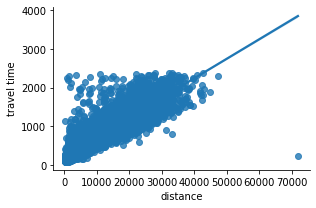

In [6]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)

### Outlier removal

In [7]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
from scipy import stats
df = df[(np.abs(stats.zscore(df['distance'])) < 3)]


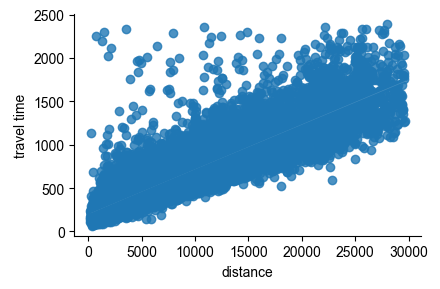

In [8]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)
sns.set(rc={"figure.figsize":(10, 10)}) #width=1, #height=2

In [9]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df['distance']-df['distance'].min())/(df['distance'].max()-df['distance'].min())
normalized_distance22=(dff['distance']-dff['distance'].min())/(dff['distance'].max()-dff['distance'].min())
# normalized_distance2
# from sklearn.preprocessing import StandardScaler
# x = breast_dataset.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [10]:
df['distance'] = normalized_distance2
dff['distance'] = normalized_distance22
df

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


travel time  distance  hour of day   1st ranked    2nd ranked  \
0             1917  0.992498           17      primary  unclassified   
1              766  0.344315           20      primary  unclassified   
2              130  0.018713           18     tertiary   residential   
3              551  0.349947           15      primary  unclassified   
4              962  0.385289           16      primary  unclassified   
...            ...       ...          ...          ...           ...   
16845         1136  0.277049            6     tertiary           NaN   
16846          348  0.069904           20  residential      tertiary   
16847         1243  0.358691            0     tertiary       primary   
16848          125  0.016019            2  residential      tertiary   
16849         1670  0.742826            5      primary     secondary   

        3rd ranked      4d ranked 5th ranked 6th ranked  1st dist  2nd dist  \
0         tertiary  living_street        NaN        NaN  0.959841  0.024320   
1         tertiary    residential        NaN        NaN  0.737798  0.189798   
2              NaN            NaN        NaN        NaN  0.633803  0.366197   
3      residential       tertiary        NaN        NaN  0.726134  0.118816   
4      residential       tertiary        NaN        NaN  0.660599  0.217712   
...            ...            ...        ...        ...       ...       ...   
16845          NaN            NaN        NaN        NaN  1.000000       NaN   
16846          NaN            NaN        NaN        NaN  0.926115  0.073885   
16847  residential            NaN        NaN        NaN  0.510864  0.382161   
16848          NaN            NaN        NaN        NaN  0.752693  0.247307   
16849  residential       tertiary    service        NaN  0.927749  0.033390   

       3rd dist  4rd dist  5th dist  6th dist  
0      0.014853  0.000986       NaN       NaN  
1      0.042312  0.030092       NaN       NaN  
2           NaN       NaN       NaN       NaN  
3      0.113408  0.041643       NaN       NaN  
4      0.083805  0.037885       NaN       NaN  
...         ...       ...       ...       ...  
16845       NaN       NaN       NaN       NaN  
16846       NaN       NaN       NaN       NaN  
16847  0.106975       NaN       NaN       NaN  
16848       NaN       NaN       NaN       NaN  
16849  0.021271  0.013589  0.004002       NaN  

[16658 rows x 15 columns]

In [11]:
dff

travel time  distance  hour of day  living_street  motorway  \
0             1917  0.407941           17         29.014       0.0   
1              766  0.141522           20          0.000       0.0   
2              130  0.007691           18          0.000       0.0   
3              551  0.143836           15          0.000       0.0   
4              962  0.158363           16          0.000       0.0   
...            ...       ...          ...            ...       ...   
16845         1136  0.113874            6          0.000       0.0   
16846          348  0.028732           20          0.000       0.0   
16847         1243  0.147431            0          0.000       0.0   
16848          125  0.006584            2          0.000       0.0   
16849         1670  0.305320            5          0.000       0.0   

       motorway_link    primary  primary_link  residential  road  secondary  \
0                0.0  28244.060           0.0        0.000   0.0      0.000   
1                0.0   7621.231           0.0      310.845   0.0      0.000   
2                0.0      0.000           0.0      269.953   0.0      0.000   
3                0.0   7621.231           0.0     1190.285   0.0      0.000   
4                0.0   7621.231           0.0      966.841   0.0      0.000   
...              ...        ...           ...          ...   ...        ...   
16845            0.0      0.000           0.0        0.000   0.0      0.000   
16846            0.0      0.000           0.0     2079.411   0.0      0.000   
16847            0.0   4109.470           0.0     1150.331   0.0      0.000   
16848            0.0      0.000           0.0      495.142   0.0      0.000   
16849            0.0  20475.622           0.0      469.449   0.0    736.925   

       secondary_link  service  tertiary  track  trunk  trunk_link  \
0                 0.0     0.00   437.068    0.0    0.0         0.0   
1                 0.0     0.00   437.068    0.0    0.0         0.0   
2                 0.0     0.00   467.226    0.0    0.0         0.0   
3                 0.0     0.00   437.068    0.0    0.0         0.0   
4                 0.0     0.00   437.068    0.0    0.0         0.0   
...               ...      ...       ...    ...    ...         ...   
16845             0.0     0.00  8347.999    0.0    0.0         0.0   
16846             0.0     0.00   165.895    0.0    0.0         0.0   
16847             0.0     0.00  5493.447    0.0    0.0         0.0   
16848             0.0     0.00   162.685    0.0    0.0         0.0   
16849             0.0    88.32   299.909    0.0    0.0         0.0   

       unclassified  others  
0           715.641     0.0  
1          1960.558     0.0  
2             0.000     0.0  
3          1247.044     0.0  
4          2511.705     0.0  
...             ...     ...  
16845         0.000     0.0  
16846         0.000     0.0  
16847         0.000     0.0  
16848         0.000     0.0  
16849         0.000     0.0  

[16850 rows x 19 columns]

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [13]:
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))
df = df.iloc[:,[0,1,2,15,16,3,4,5,6,7,8,9,10,11,12,13,14]] # change the column order to put "hr_sin" beside the "hour of day"
df.head(4)
df

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


travel time  distance  hour of day    hr_sin        hr_cos  \
0             1917  0.992498           17 -0.965926 -2.588190e-01   
1              766  0.344315           20 -0.866025  5.000000e-01   
2              130  0.018713           18 -1.000000 -1.836970e-16   
3              551  0.349947           15 -0.707107 -7.071068e-01   
4              962  0.385289           16 -0.866025 -5.000000e-01   
...            ...       ...          ...       ...           ...   
16845         1136  0.277049            6  1.000000  6.123234e-17   
16846          348  0.069904           20 -0.866025  5.000000e-01   
16847         1243  0.358691            0  0.000000  1.000000e+00   
16848          125  0.016019            2  0.500000  8.660254e-01   
16849         1670  0.742826            5  0.965926  2.588190e-01   

        1st ranked    2nd ranked   3rd ranked      4d ranked 5th ranked  \
0          primary  unclassified     tertiary  living_street        NaN   
1          primary  unclassified     tertiary    residential        NaN   
2         tertiary   residential          NaN            NaN        NaN   
3          primary  unclassified  residential       tertiary        NaN   
4          primary  unclassified  residential       tertiary        NaN   
...            ...           ...          ...            ...        ...   
16845     tertiary           NaN          NaN            NaN        NaN   
16846  residential      tertiary          NaN            NaN        NaN   
16847     tertiary       primary  residential            NaN        NaN   
16848  residential      tertiary          NaN            NaN        NaN   
16849      primary     secondary  residential       tertiary    service   

      6th ranked  1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0            NaN  0.959841  0.024320  0.014853  0.000986       NaN       NaN  
1            NaN  0.737798  0.189798  0.042312  0.030092       NaN       NaN  
2            NaN  0.633803  0.366197       NaN       NaN       NaN       NaN  
3            NaN  0.726134  0.118816  0.113408  0.041643       NaN       NaN  
4            NaN  0.660599  0.217712  0.083805  0.037885       NaN       NaN  
...          ...       ...       ...       ...       ...       ...       ...  
16845        NaN  1.000000       NaN       NaN       NaN       NaN       NaN  
16846        NaN  0.926115  0.073885       NaN       NaN       NaN       NaN  
16847        NaN  0.510864  0.382161  0.106975       NaN       NaN       NaN  
16848        NaN  0.752693  0.247307       NaN       NaN       NaN       NaN  
16849        NaN  0.927749  0.033390  0.021271  0.013589  0.004002       NaN  

[16658 rows x 17 columns]

In [14]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [15]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))  
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [16]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [17]:
def plotme(model):
    plt.style.use('fivethirtyeight')
    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 5))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend(loc='upper right')
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [44]:
my_df = df[['distance','travel time']]
my_df.head(3)

distance  travel time
0  0.992498         1917
1  0.344315          766
2  0.018713          130

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

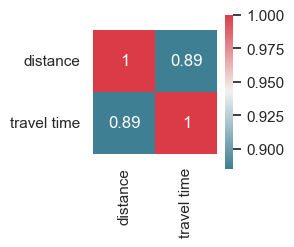

In [45]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [46]:
x = np.array(df[['distance']])
y = np.array(df['travel time'])
# x

In [47]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 1)
(3332, 1)


In [22]:
import math

In [29]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=5)
model1_1

Epoch 1/5
417/417 [==============================] - 0s 791us/step - loss: 562674.1875 - mape: 99.8985 - rmse: 750.1161 - val_loss: 548191.3750 - val_mape: 99.7723 - val_rmse: 740.3995
Epoch 2/5
417/417 [==============================] - 0s 700us/step - loss: 560536.4375 - mape: 99.5822 - rmse: 748.6898 - val_loss: 545399.0000 - val_mape: 99.3505 - val_rmse: 738.5114
Epoch 3/5
417/417 [==============================] - 0s 693us/step - loss: 557045.6250 - mape: 99.0666 - rmse: 746.3549 - val_loss: 541333.1875 - val_mape: 98.7350 - val_rmse: 735.7535
Epoch 4/5
417/417 [==============================] - 0s 725us/step - loss: 552350.6875 - mape: 98.3696 - rmse: 743.2030 - val_loss: 536154.6875 - val_mape: 97.9471 - val_rmse: 732.2258
Epoch 5/5
417/417 [==============================] - 0s 762us/step - loss: 546592.0000 - mape: 97.5191 - rmse: 739.3186 - val_loss: 529998.3750 - val_mape: 97.0050 - val_rmse: 728.0099
minimum training RMSE:  12.321976725260416
minimum training MAPE:  0.975190

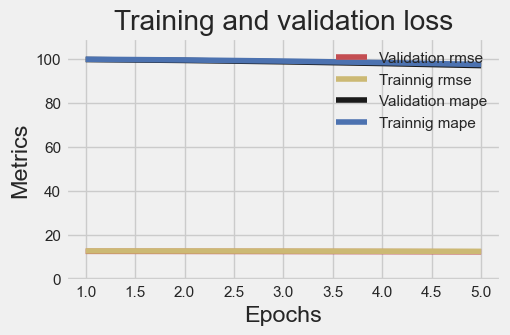

In [30]:
plotme(model1_1)

In [25]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
417/417 [==============================] - 1s 854us/step - loss: 561864.3125 - mape: 99.7901 - rmse: 749.5761 - val_loss: 546204.4375 - val_mape: 99.4914 - val_rmse: 739.0565
Epoch 2/500
417/417 [==============================] - 0s 723us/step - loss: 556420.2500 - mape: 98.9989 - rmse: 745.9359 - val_loss: 538799.1875 - val_mape: 98.3818 - val_rmse: 734.0294
Epoch 3/500
417/417 [==============================] - 0s 706us/step - loss: 546960.3750 - mape: 97.6130 - rmse: 739.5677 - val_loss: 527672.0000 - val_mape: 96.6927 - val_rmse: 726.4103
Epoch 4/500
417/417 [==============================] - 0s 686us/step - loss: 534077.7500 - mape: 95.6772 - rmse: 730.8062 - val_loss: 513489.3750 - val_mape: 94.5057 - val_rmse: 716.5817
Epoch 5/500
417/417 [==============================] - 0s 692us/step - loss: 518369.1250 - mape: 93.2885 - rmse: 719.9786 - val_loss: 496790.4062 - val_mape: 91.8825 - val_rmse: 704.8336
Epoch 6/500
417/417 [==============================] - 0s 697us/s

Epoch 45/500
417/417 [==============================] - 0s 756us/step - loss: 57970.0273 - mape: 44.2742 - rmse: 240.7697 - val_loss: 55371.4688 - val_mape: 44.7104 - val_rmse: 235.3114
Epoch 46/500
417/417 [==============================] - 0s 708us/step - loss: 56428.8359 - mape: 43.6004 - rmse: 237.5475 - val_loss: 53886.2773 - val_mape: 43.9807 - val_rmse: 232.1342
Epoch 47/500
417/417 [==============================] - 0s 822us/step - loss: 54922.6523 - mape: 42.9283 - rmse: 234.3558 - val_loss: 52416.4570 - val_mape: 43.1315 - val_rmse: 228.9464
Epoch 48/500
417/417 [==============================] - 0s 817us/step - loss: 53440.6758 - mape: 42.0021 - rmse: 231.1724 - val_loss: 50977.1602 - val_mape: 42.4252 - val_rmse: 225.7812
Epoch 49/500
417/417 [==============================] - 0s 719us/step - loss: 51986.4531 - mape: 41.2809 - rmse: 228.0054 - val_loss: 49577.4922 - val_mape: 41.6796 - val_rmse: 222.6600
Epoch 50/500
417/417 [==============================] - 0s 789us/step 

417/417 [==============================] - 0s 674us/step - loss: 32101.2832 - mape: 23.7227 - rmse: 179.1683 - val_loss: 30407.5508 - val_mape: 24.2026 - val_rmse: 174.3776
Epoch 90/500
417/417 [==============================] - 0s 695us/step - loss: 32091.9160 - mape: 23.7006 - rmse: 179.1422 - val_loss: 30393.2734 - val_mape: 24.1052 - val_rmse: 174.3367
Epoch 91/500
417/417 [==============================] - 0s 671us/step - loss: 32085.9375 - mape: 23.5977 - rmse: 179.1255 - val_loss: 30385.5840 - val_mape: 24.0693 - val_rmse: 174.3146
Epoch 92/500
417/417 [==============================] - 0s 711us/step - loss: 32079.6660 - mape: 23.5774 - rmse: 179.1080 - val_loss: 30376.3672 - val_mape: 24.0052 - val_rmse: 174.2882
Epoch 93/500
417/417 [==============================] - 0s 724us/step - loss: 32074.1074 - mape: 23.5381 - rmse: 179.0925 - val_loss: 30370.4082 - val_mape: 23.9712 - val_rmse: 174.2711
Epoch 94/500
417/417 [==============================] - 0s 707us/step - loss: 32069

Epoch 133/500
417/417 [==============================] - 0s 725us/step - loss: 32054.4258 - mape: 23.1172 - rmse: 179.0375 - val_loss: 30327.6445 - val_mape: 23.5505 - val_rmse: 174.1483
Epoch 134/500
417/417 [==============================] - 0s 755us/step - loss: 32053.3887 - mape: 23.1656 - rmse: 179.0346 - val_loss: 30328.9336 - val_mape: 23.5727 - val_rmse: 174.1520
Epoch 135/500
417/417 [==============================] - 0s 706us/step - loss: 32052.5957 - mape: 23.0828 - rmse: 179.0324 - val_loss: 30336.1367 - val_mape: 23.6662 - val_rmse: 174.1727
Epoch 136/500
417/417 [==============================] - 0s 751us/step - loss: 32053.8672 - mape: 23.1403 - rmse: 179.0359 - val_loss: 30337.5684 - val_mape: 23.6806 - val_rmse: 174.1768
Epoch 137/500
417/417 [==============================] - 0s 711us/step - loss: 32056.1582 - mape: 23.1819 - rmse: 179.0423 - val_loss: 30333.5938 - val_mape: 23.6368 - val_rmse: 174.1654
Epoch 138/500
417/417 [==============================] - 0s 716us

Epoch 177/500
417/417 [==============================] - 0s 755us/step - loss: 32054.1191 - mape: 23.1416 - rmse: 179.0366 - val_loss: 30335.8574 - val_mape: 23.6612 - val_rmse: 174.1719
Epoch 178/500
417/417 [==============================] - 0s 695us/step - loss: 32053.4844 - mape: 23.1419 - rmse: 179.0349 - val_loss: 30333.5117 - val_mape: 23.6344 - val_rmse: 174.1652
Epoch 179/500
417/417 [==============================] - 0s 724us/step - loss: 32053.3281 - mape: 23.2002 - rmse: 179.0344 - val_loss: 30332.0547 - val_mape: 23.6154 - val_rmse: 174.1610
Epoch 180/500
417/417 [==============================] - 0s 681us/step - loss: 32053.8594 - mape: 23.1221 - rmse: 179.0359 - val_loss: 30333.3789 - val_mape: 23.6316 - val_rmse: 174.1648
Epoch 181/500
417/417 [==============================] - 0s 760us/step - loss: 32054.4141 - mape: 23.1498 - rmse: 179.0375 - val_loss: 30331.9141 - val_mape: 23.6143 - val_rmse: 174.1606
Epoch 182/500
417/417 [==============================] - 0s 679us

Epoch 221/500
417/417 [==============================] - 0s 685us/step - loss: 32053.9883 - mape: 23.1448 - rmse: 179.0363 - val_loss: 30334.2168 - val_mape: 23.6426 - val_rmse: 174.1672
Epoch 222/500
417/417 [==============================] - 0s 723us/step - loss: 32053.4590 - mape: 23.1423 - rmse: 179.0348 - val_loss: 30334.4688 - val_mape: 23.6449 - val_rmse: 174.1679
Epoch 223/500
417/417 [==============================] - 0s 690us/step - loss: 32054.0703 - mape: 23.1864 - rmse: 179.0365 - val_loss: 30329.8672 - val_mape: 23.5859 - val_rmse: 174.1547
Epoch 224/500
417/417 [==============================] - 0s 719us/step - loss: 32053.8711 - mape: 23.1284 - rmse: 179.0359 - val_loss: 30332.7734 - val_mape: 23.6246 - val_rmse: 174.1631
Epoch 225/500
417/417 [==============================] - 0s 742us/step - loss: 32053.9121 - mape: 23.1292 - rmse: 179.0361 - val_loss: 30330.6074 - val_mape: 23.5966 - val_rmse: 174.1568
Epoch 226/500
417/417 [==============================] - 0s 667us

Epoch 265/500
417/417 [==============================] - 0s 687us/step - loss: 32054.0371 - mape: 23.1606 - rmse: 179.0364 - val_loss: 30333.1406 - val_mape: 23.6289 - val_rmse: 174.1641
Epoch 266/500
417/417 [==============================] - 0s 709us/step - loss: 32054.4688 - mape: 23.1545 - rmse: 179.0376 - val_loss: 30332.9727 - val_mape: 23.6268 - val_rmse: 174.1636
Epoch 267/500
417/417 [==============================] - 0s 684us/step - loss: 32054.0918 - mape: 23.1310 - rmse: 179.0366 - val_loss: 30332.9141 - val_mape: 23.6261 - val_rmse: 174.1635
Epoch 268/500
417/417 [==============================] - 0s 705us/step - loss: 32052.8164 - mape: 23.1110 - rmse: 179.0330 - val_loss: 30336.1992 - val_mape: 23.6628 - val_rmse: 174.1729
Epoch 269/500
417/417 [==============================] - 0s 663us/step - loss: 32053.7539 - mape: 23.1448 - rmse: 179.0356 - val_loss: 30333.1191 - val_mape: 23.6286 - val_rmse: 174.1641
Epoch 270/500
417/417 [==============================] - 0s 734us

Epoch 309/500
417/417 [==============================] - 0s 783us/step - loss: 32054.3906 - mape: 23.1155 - rmse: 179.0374 - val_loss: 30334.1445 - val_mape: 23.6416 - val_rmse: 174.1670
Epoch 310/500
417/417 [==============================] - 0s 781us/step - loss: 32054.5195 - mape: 23.1734 - rmse: 179.0378 - val_loss: 30331.1348 - val_mape: 23.6045 - val_rmse: 174.1584
Epoch 311/500
417/417 [==============================] - 0s 721us/step - loss: 32053.9375 - mape: 23.1317 - rmse: 179.0361 - val_loss: 30333.5742 - val_mape: 23.6341 - val_rmse: 174.1654
Epoch 312/500
417/417 [==============================] - 0s 698us/step - loss: 32054.4277 - mape: 23.1534 - rmse: 179.0375 - val_loss: 30330.9082 - val_mape: 23.6015 - val_rmse: 174.1577
Epoch 313/500
417/417 [==============================] - 0s 775us/step - loss: 32055.1797 - mape: 23.1352 - rmse: 179.0396 - val_loss: 30333.2500 - val_mape: 23.6311 - val_rmse: 174.1644
Epoch 314/500
417/417 [==============================] - 0s 706us

Epoch 353/500
417/417 [==============================] - 0s 725us/step - loss: 32053.5352 - mape: 23.1953 - rmse: 179.0350 - val_loss: 30330.8887 - val_mape: 23.6005 - val_rmse: 174.1577
Epoch 354/500
417/417 [==============================] - 0s 697us/step - loss: 32053.1484 - mape: 23.1202 - rmse: 179.0339 - val_loss: 30333.1602 - val_mape: 23.6298 - val_rmse: 174.1642
Epoch 355/500
417/417 [==============================] - 0s 711us/step - loss: 32053.9648 - mape: 23.1415 - rmse: 179.0362 - val_loss: 30333.9141 - val_mape: 23.6378 - val_rmse: 174.1663
Epoch 356/500
417/417 [==============================] - 0s 692us/step - loss: 32053.9434 - mape: 23.1423 - rmse: 179.0361 - val_loss: 30333.4414 - val_mape: 23.6328 - val_rmse: 174.1650
Epoch 357/500
417/417 [==============================] - 0s 756us/step - loss: 32054.4570 - mape: 23.1216 - rmse: 179.0376 - val_loss: 30332.6035 - val_mape: 23.6219 - val_rmse: 174.1626
Epoch 358/500
417/417 [==============================] - 0s 787us

Epoch 397/500
417/417 [==============================] - 0s 705us/step - loss: 32053.6523 - mape: 23.1135 - rmse: 179.0353 - val_loss: 30335.4668 - val_mape: 23.6568 - val_rmse: 174.1708
Epoch 398/500
417/417 [==============================] - 0s 703us/step - loss: 32054.3594 - mape: 23.2150 - rmse: 179.0373 - val_loss: 30330.4258 - val_mape: 23.5943 - val_rmse: 174.1563
Epoch 399/500
417/417 [==============================] - 0s 668us/step - loss: 32054.7598 - mape: 23.1351 - rmse: 179.0384 - val_loss: 30330.1465 - val_mape: 23.5904 - val_rmse: 174.1555
Epoch 400/500
417/417 [==============================] - 0s 707us/step - loss: 32052.9004 - mape: 23.0757 - rmse: 179.0332 - val_loss: 30336.5762 - val_mape: 23.6684 - val_rmse: 174.1740
Epoch 401/500
417/417 [==============================] - 0s 698us/step - loss: 32054.5215 - mape: 23.1837 - rmse: 179.0378 - val_loss: 30332.5137 - val_mape: 23.6222 - val_rmse: 174.1623
Epoch 402/500
417/417 [==============================] - 0s 697us

Epoch 441/500
417/417 [==============================] - 0s 718us/step - loss: 32053.0840 - mape: 23.0943 - rmse: 179.0338 - val_loss: 30336.1055 - val_mape: 23.6638 - val_rmse: 174.1726
Epoch 442/500
417/417 [==============================] - 0s 694us/step - loss: 32054.1504 - mape: 23.2044 - rmse: 179.0367 - val_loss: 30332.2344 - val_mape: 23.6181 - val_rmse: 174.1615
Epoch 443/500
417/417 [==============================] - 0s 703us/step - loss: 32053.6797 - mape: 23.1325 - rmse: 179.0354 - val_loss: 30333.6191 - val_mape: 23.6350 - val_rmse: 174.1655
Epoch 444/500
417/417 [==============================] - 0s 712us/step - loss: 32052.7129 - mape: 23.1816 - rmse: 179.0327 - val_loss: 30328.4160 - val_mape: 23.5641 - val_rmse: 174.1506
Epoch 445/500
417/417 [==============================] - 0s 725us/step - loss: 32055.9863 - mape: 23.1654 - rmse: 179.0419 - val_loss: 30326.1602 - val_mape: 23.5222 - val_rmse: 174.1441
Epoch 446/500
417/417 [==============================] - 0s 658us

Epoch 485/500
417/417 [==============================] - 0s 715us/step - loss: 32053.3086 - mape: 23.1361 - rmse: 179.0344 - val_loss: 30332.9727 - val_mape: 23.6261 - val_rmse: 174.1636
Epoch 486/500
417/417 [==============================] - 0s 683us/step - loss: 32054.0137 - mape: 23.1561 - rmse: 179.0363 - val_loss: 30331.5273 - val_mape: 23.6085 - val_rmse: 174.1595
Epoch 487/500
417/417 [==============================] - 0s 715us/step - loss: 32053.8418 - mape: 23.1514 - rmse: 179.0359 - val_loss: 30329.3262 - val_mape: 23.5776 - val_rmse: 174.1532
Epoch 488/500
417/417 [==============================] - 0s 757us/step - loss: 32053.4824 - mape: 23.0988 - rmse: 179.0349 - val_loss: 30330.2637 - val_mape: 23.5918 - val_rmse: 174.1559
Epoch 489/500
417/417 [==============================] - 0s 700us/step - loss: 32054.4355 - mape: 23.1673 - rmse: 179.0375 - val_loss: 30328.6211 - val_mape: 23.5673 - val_rmse: 174.1511
Epoch 490/500
417/417 [==============================] - 0s 749us

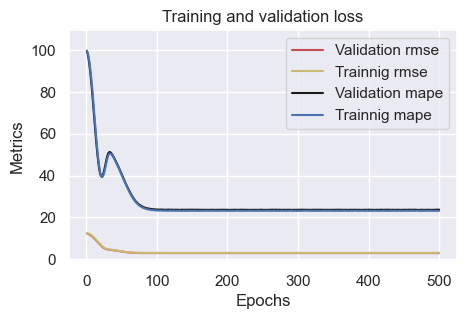

In [26]:
plotme(model1_2)

In [27]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
417/417 [==============================] - 0s 838us/step - loss: 561734.5000 - mape: 99.7742 - rmse: 749.4895 - val_loss: 545657.0625 - val_mape: 99.4153 - val_rmse: 738.6860
Epoch 2/500
417/417 [==============================] - 0s 707us/step - loss: 554887.7500 - mape: 98.7827 - rmse: 744.9079 - val_loss: 536105.2500 - val_mape: 97.9883 - val_rmse: 732.1921
Epoch 3/500
417/417 [==============================] - 0s 705us/step - loss: 542576.2500 - mape: 96.9717 - rmse: 736.5978 - val_loss: 521083.6250 - val_mape: 95.7107 - val_rmse: 721.8612
Epoch 4/500
417/417 [==============================] - 0s 683us/step - loss: 523528.3125 - mape: 94.1131 - rmse: 723.5526 - val_loss: 498895.3125 - val_mape: 92.2669 - val_rmse: 706.3252
Epoch 5/500
417/417 [==============================] - 0s 705us/step - loss: 498938.9375 - mape: 90.3204 - rmse: 706.3561 - val_loss: 472887.7500 - val_mape: 88.1009 - val_rmse: 687.6683
Epoch 6/500
417/417 [==============================] - 0s 707us/s

Epoch 45/500
417/417 [==============================] - 0s 676us/step - loss: 41872.7305 - mape: 35.0272 - rmse: 204.6283 - val_loss: 39678.6523 - val_mape: 35.2311 - val_rmse: 199.1950
Epoch 46/500
417/417 [==============================] - 0s 689us/step - loss: 40644.2227 - mape: 34.1300 - rmse: 201.6041 - val_loss: 38510.2070 - val_mape: 34.3180 - val_rmse: 196.2402
Epoch 47/500
417/417 [==============================] - 0s 697us/step - loss: 39515.9883 - mape: 33.2188 - rmse: 198.7863 - val_loss: 37439.0547 - val_mape: 33.4287 - val_rmse: 193.4917
Epoch 48/500
417/417 [==============================] - 0s 706us/step - loss: 38483.8750 - mape: 32.3267 - rmse: 196.1731 - val_loss: 36463.1328 - val_mape: 32.6155 - val_rmse: 190.9532
Epoch 49/500
417/417 [==============================] - 0s 730us/step - loss: 37554.9648 - mape: 31.5077 - rmse: 193.7910 - val_loss: 35586.0312 - val_mape: 31.7905 - val_rmse: 188.6426
Epoch 50/500
417/417 [==============================] - 0s 727us/step 

417/417 [==============================] - 0s 767us/step - loss: 32053.6055 - mape: 23.1729 - rmse: 179.0352 - val_loss: 30337.6562 - val_mape: 23.6927 - val_rmse: 174.1771
Epoch 90/500
417/417 [==============================] - 0s 764us/step - loss: 32054.8145 - mape: 23.1648 - rmse: 179.0386 - val_loss: 30340.1660 - val_mape: 23.7186 - val_rmse: 174.1843
Epoch 91/500
417/417 [==============================] - 0s 759us/step - loss: 32055.9316 - mape: 23.2002 - rmse: 179.0417 - val_loss: 30333.1875 - val_mape: 23.6371 - val_rmse: 174.1643
Epoch 92/500
417/417 [==============================] - 0s 747us/step - loss: 32055.8379 - mape: 23.1501 - rmse: 179.0414 - val_loss: 30341.4375 - val_mape: 23.7286 - val_rmse: 174.1879
Epoch 93/500
417/417 [==============================] - 0s 705us/step - loss: 32053.5469 - mape: 23.1986 - rmse: 179.0350 - val_loss: 30334.2812 - val_mape: 23.6504 - val_rmse: 174.1674
Epoch 94/500
417/417 [==============================] - 0s 772us/step - loss: 32054

Epoch 133/500
417/417 [==============================] - 0s 706us/step - loss: 32054.9766 - mape: 23.1412 - rmse: 179.0390 - val_loss: 30332.2227 - val_mape: 23.6181 - val_rmse: 174.1615
Epoch 134/500
417/417 [==============================] - 0s 719us/step - loss: 32055.3711 - mape: 23.1553 - rmse: 179.0401 - val_loss: 30327.8652 - val_mape: 23.5548 - val_rmse: 174.1490
Epoch 135/500
417/417 [==============================] - 0s 717us/step - loss: 32057.4414 - mape: 23.1238 - rmse: 179.0459 - val_loss: 30330.6602 - val_mape: 23.5975 - val_rmse: 174.1570
Epoch 136/500
417/417 [==============================] - 0s 688us/step - loss: 32053.9570 - mape: 23.1614 - rmse: 179.0362 - val_loss: 30328.6992 - val_mape: 23.5686 - val_rmse: 174.1514
Epoch 137/500
417/417 [==============================] - 0s 708us/step - loss: 32053.8418 - mape: 23.1668 - rmse: 179.0359 - val_loss: 30327.9805 - val_mape: 23.5568 - val_rmse: 174.1493
Epoch 138/500
417/417 [==============================] - 0s 679us

Epoch 177/500
417/417 [==============================] - 0s 715us/step - loss: 32054.5020 - mape: 23.1390 - rmse: 179.0377 - val_loss: 30332.8281 - val_mape: 23.6252 - val_rmse: 174.1632
Epoch 178/500
417/417 [==============================] - 0s 710us/step - loss: 32055.8906 - mape: 23.1718 - rmse: 179.0416 - val_loss: 30327.5898 - val_mape: 23.5503 - val_rmse: 174.1482
Epoch 179/500
417/417 [==============================] - 0s 739us/step - loss: 32055.0664 - mape: 23.1252 - rmse: 179.0393 - val_loss: 30330.5195 - val_mape: 23.5955 - val_rmse: 174.1566
Epoch 180/500
417/417 [==============================] - 0s 697us/step - loss: 32054.5625 - mape: 23.1509 - rmse: 179.0379 - val_loss: 30327.6406 - val_mape: 23.5512 - val_rmse: 174.1483
Epoch 181/500
417/417 [==============================] - 0s 755us/step - loss: 32055.7734 - mape: 23.1940 - rmse: 179.0413 - val_loss: 30327.0430 - val_mape: 23.5400 - val_rmse: 174.1466
Epoch 182/500
417/417 [==============================] - 0s 723us

Epoch 221/500
417/417 [==============================] - 0s 724us/step - loss: 32055.8066 - mape: 23.1659 - rmse: 179.0414 - val_loss: 30335.2852 - val_mape: 23.6531 - val_rmse: 174.1703
Epoch 222/500
417/417 [==============================] - 0s 728us/step - loss: 32054.9766 - mape: 23.1620 - rmse: 179.0390 - val_loss: 30332.9766 - val_mape: 23.6267 - val_rmse: 174.1637
Epoch 223/500
417/417 [==============================] - 0s 678us/step - loss: 32055.0664 - mape: 23.1440 - rmse: 179.0393 - val_loss: 30330.6816 - val_mape: 23.5974 - val_rmse: 174.1571
Epoch 224/500
417/417 [==============================] - 0s 679us/step - loss: 32054.6934 - mape: 23.1272 - rmse: 179.0382 - val_loss: 30334.2949 - val_mape: 23.6416 - val_rmse: 174.1674
Epoch 225/500
417/417 [==============================] - 0s 704us/step - loss: 32054.7324 - mape: 23.1713 - rmse: 179.0384 - val_loss: 30326.8379 - val_mape: 23.5363 - val_rmse: 174.1460
Epoch 226/500
417/417 [==============================] - 0s 703us

Epoch 265/500
417/417 [==============================] - 0s 738us/step - loss: 32056.7598 - mape: 23.1956 - rmse: 179.0440 - val_loss: 30336.4805 - val_mape: 23.6651 - val_rmse: 174.1737
Epoch 266/500
417/417 [==============================] - 0s 702us/step - loss: 32053.2109 - mape: 23.2028 - rmse: 179.0341 - val_loss: 30328.4102 - val_mape: 23.5636 - val_rmse: 174.1505
Epoch 267/500
417/417 [==============================] - 0s 682us/step - loss: 32054.5547 - mape: 23.0975 - rmse: 179.0379 - val_loss: 30331.7031 - val_mape: 23.6109 - val_rmse: 174.1600
Epoch 268/500
417/417 [==============================] - 0s 738us/step - loss: 32055.2324 - mape: 23.1242 - rmse: 179.0397 - val_loss: 30333.4121 - val_mape: 23.6334 - val_rmse: 174.1649
Epoch 269/500
417/417 [==============================] - 0s 749us/step - loss: 32054.6953 - mape: 23.1665 - rmse: 179.0383 - val_loss: 30331.0820 - val_mape: 23.6039 - val_rmse: 174.1582
Epoch 270/500
417/417 [==============================] - 0s 676us

Epoch 309/500
417/417 [==============================] - 0s 697us/step - loss: 32057.1758 - mape: 23.1489 - rmse: 179.0452 - val_loss: 30334.1055 - val_mape: 23.6409 - val_rmse: 174.1669
Epoch 310/500
417/417 [==============================] - 0s 745us/step - loss: 32053.7988 - mape: 23.1815 - rmse: 179.0358 - val_loss: 30327.0469 - val_mape: 23.5405 - val_rmse: 174.1466
Epoch 311/500
417/417 [==============================] - 0s 738us/step - loss: 32056.4746 - mape: 23.1541 - rmse: 179.0432 - val_loss: 30327.4336 - val_mape: 23.5473 - val_rmse: 174.1477
Epoch 312/500
417/417 [==============================] - 0s 708us/step - loss: 32054.2148 - mape: 23.0953 - rmse: 179.0369 - val_loss: 30336.6523 - val_mape: 23.6678 - val_rmse: 174.1742
Epoch 313/500
417/417 [==============================] - 0s 718us/step - loss: 32055.6738 - mape: 23.1580 - rmse: 179.0410 - val_loss: 30329.7930 - val_mape: 23.5852 - val_rmse: 174.1545
Epoch 314/500
417/417 [==============================] - 0s 733us

Epoch 353/500
417/417 [==============================] - 0s 744us/step - loss: 32055.3105 - mape: 23.1488 - rmse: 179.0400 - val_loss: 30332.9551 - val_mape: 23.6272 - val_rmse: 174.1636
Epoch 354/500
417/417 [==============================] - 0s 668us/step - loss: 32051.7734 - mape: 23.0784 - rmse: 179.0301 - val_loss: 30348.2656 - val_mape: 23.7715 - val_rmse: 174.2075
Epoch 355/500
417/417 [==============================] - 0s 705us/step - loss: 32057.2910 - mape: 23.1992 - rmse: 179.0455 - val_loss: 30337.6680 - val_mape: 23.6790 - val_rmse: 174.1771
Epoch 356/500
417/417 [==============================] - 0s 685us/step - loss: 32055.2598 - mape: 23.1811 - rmse: 179.0398 - val_loss: 30330.8887 - val_mape: 23.6003 - val_rmse: 174.1577
Epoch 357/500
417/417 [==============================] - 0s 716us/step - loss: 32054.1211 - mape: 23.1087 - rmse: 179.0367 - val_loss: 30332.8496 - val_mape: 23.6276 - val_rmse: 174.1633
Epoch 358/500
417/417 [==============================] - 0s 683us

Epoch 397/500
417/417 [==============================] - 0s 722us/step - loss: 32055.4609 - mape: 23.1321 - rmse: 179.0404 - val_loss: 30329.9668 - val_mape: 23.5883 - val_rmse: 174.1550
Epoch 398/500
417/417 [==============================] - 0s 724us/step - loss: 32051.9473 - mape: 23.0717 - rmse: 179.0306 - val_loss: 30340.3262 - val_mape: 23.7052 - val_rmse: 174.1848
Epoch 399/500
417/417 [==============================] - 0s 727us/step - loss: 32054.7109 - mape: 23.2226 - rmse: 179.0383 - val_loss: 30329.3496 - val_mape: 23.5791 - val_rmse: 174.1532
Epoch 400/500
417/417 [==============================] - 0s 700us/step - loss: 32053.0879 - mape: 23.0804 - rmse: 179.0338 - val_loss: 30338.7051 - val_mape: 23.6891 - val_rmse: 174.1801
Epoch 401/500
417/417 [==============================] - 0s 732us/step - loss: 32055.0391 - mape: 23.1694 - rmse: 179.0392 - val_loss: 30332.7422 - val_mape: 23.6240 - val_rmse: 174.1630
Epoch 402/500
417/417 [==============================] - 0s 698us

Epoch 441/500
417/417 [==============================] - 0s 702us/step - loss: 32054.4375 - mape: 23.1378 - rmse: 179.0375 - val_loss: 30333.7988 - val_mape: 23.6361 - val_rmse: 174.1660
Epoch 442/500
417/417 [==============================] - 0s 722us/step - loss: 32054.6406 - mape: 23.0850 - rmse: 179.0381 - val_loss: 30334.7871 - val_mape: 23.6482 - val_rmse: 174.1689
Epoch 443/500
417/417 [==============================] - 0s 684us/step - loss: 32052.9727 - mape: 23.2214 - rmse: 179.0334 - val_loss: 30327.2969 - val_mape: 23.5451 - val_rmse: 174.1473
Epoch 444/500
417/417 [==============================] - 0s 716us/step - loss: 32053.3301 - mape: 23.0543 - rmse: 179.0344 - val_loss: 30339.1738 - val_mape: 23.6932 - val_rmse: 174.1814
Epoch 445/500
417/417 [==============================] - 0s 758us/step - loss: 32056.1543 - mape: 23.1824 - rmse: 179.0423 - val_loss: 30336.1855 - val_mape: 23.6617 - val_rmse: 174.1729
Epoch 446/500
417/417 [==============================] - 0s 810us

Epoch 485/500
417/417 [==============================] - 0s 850us/step - loss: 32055.1328 - mape: 23.0882 - rmse: 179.0395 - val_loss: 30335.8398 - val_mape: 23.6592 - val_rmse: 174.1719
Epoch 486/500
417/417 [==============================] - 0s 764us/step - loss: 32055.0137 - mape: 23.1390 - rmse: 179.0391 - val_loss: 30335.5625 - val_mape: 23.6558 - val_rmse: 174.1711
Epoch 487/500
417/417 [==============================] - 0s 738us/step - loss: 32054.4473 - mape: 23.1354 - rmse: 179.0376 - val_loss: 30339.8340 - val_mape: 23.6994 - val_rmse: 174.1833
Epoch 488/500
417/417 [==============================] - 0s 788us/step - loss: 32054.0586 - mape: 23.1755 - rmse: 179.0365 - val_loss: 30332.6895 - val_mape: 23.6236 - val_rmse: 174.1628
Epoch 489/500
417/417 [==============================] - 0s 710us/step - loss: 32052.3809 - mape: 23.1798 - rmse: 179.0318 - val_loss: 30328.5234 - val_mape: 23.5655 - val_rmse: 174.1509
Epoch 490/500
417/417 [==============================] - 0s 754us

In [28]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
417/417 [==============================] - 1s 850us/step - loss: 563144.6875 - mape: 99.9547 - rmse: 750.4297 - val_loss: 549201.1875 - val_mape: 99.9059 - val_rmse: 741.0811
Epoch 2/500
417/417 [==============================] - 0s 751us/step - loss: 562592.4375 - mape: 99.8609 - rmse: 750.0616 - val_loss: 548672.0000 - val_mape: 99.8120 - val_rmse: 740.7240
Epoch 3/500
417/417 [==============================] - 0s 747us/step - loss: 562057.9375 - mape: 99.7680 - rmse: 749.7053 - val_loss: 548143.6875 - val_mape: 99.7182 - val_rmse: 740.3672
Epoch 4/500
417/417 [==============================] - 0s 720us/step - loss: 561524.3125 - mape: 99.6751 - rmse: 749.3492 - val_loss: 547615.6250 - val_mape: 99.6244 - val_rmse: 740.0106
Epoch 5/500
417/417 [==============================] - 0s 745us/step - loss: 560991.0625 - mape: 99.5822 - rmse: 748.9933 - val_loss: 547089.2500 - val_mape: 99.5309 - val_rmse: 739.6548
Epoch 6/500
417/417 [==============================] - 0s 811us/s

Epoch 45/500
417/417 [==============================] - 0s 780us/step - loss: 539969.8125 - mape: 95.8780 - rmse: 734.8264 - val_loss: 526303.5625 - val_mape: 95.7864 - val_rmse: 725.4678
Epoch 46/500
417/417 [==============================] - 0s 716us/step - loss: 539450.8125 - mape: 95.7857 - rmse: 734.4731 - val_loss: 525790.8125 - val_mape: 95.6927 - val_rmse: 725.1143
Epoch 47/500
417/417 [==============================] - 0s 760us/step - loss: 538932.6250 - mape: 95.6928 - rmse: 734.1203 - val_loss: 525278.6875 - val_mape: 95.5992 - val_rmse: 724.7611
Epoch 48/500
417/417 [==============================] - 0s 749us/step - loss: 538415.1875 - mape: 95.5999 - rmse: 733.7678 - val_loss: 524767.2500 - val_mape: 95.5057 - val_rmse: 724.4082
Epoch 49/500
417/417 [==============================] - 0s 725us/step - loss: 537898.0000 - mape: 95.5074 - rmse: 733.4153 - val_loss: 524256.3438 - val_mape: 95.4121 - val_rmse: 724.0555
Epoch 50/500
417/417 [==============================] - 0s 7

417/417 [==============================] - 0s 708us/step - loss: 496654.5938 - mape: 87.9182 - rmse: 704.7372 - val_loss: 483496.2188 - val_mape: 87.7406 - val_rmse: 695.3389
Epoch 132/500
417/417 [==============================] - 0s 700us/step - loss: 496165.8750 - mape: 87.8251 - rmse: 704.3904 - val_loss: 483013.8438 - val_mape: 87.6471 - val_rmse: 694.9919
Epoch 133/500
417/417 [==============================] - 0s 717us/step - loss: 495677.7188 - mape: 87.7329 - rmse: 704.0438 - val_loss: 482531.1562 - val_mape: 87.5536 - val_rmse: 694.6447
Epoch 134/500
417/417 [==============================] - 0s 685us/step - loss: 495189.6562 - mape: 87.6409 - rmse: 703.6971 - val_loss: 482048.9688 - val_mape: 87.4600 - val_rmse: 694.2975
Epoch 135/500
417/417 [==============================] - 0s 751us/step - loss: 494701.7188 - mape: 87.5485 - rmse: 703.3503 - val_loss: 481567.1250 - val_mape: 87.3665 - val_rmse: 693.9504
Epoch 136/500
417/417 [==============================] - 0s 765us/ste

417/417 [==============================] - 0s 770us/step - loss: 455901.1250 - mape: 79.9764 - rmse: 675.2045 - val_loss: 443250.2188 - val_mape: 79.7231 - val_rmse: 665.7704
Epoch 218/500
417/417 [==============================] - 0s 761us/step - loss: 455441.7500 - mape: 79.8844 - rmse: 674.8643 - val_loss: 442797.2500 - val_mape: 79.6308 - val_rmse: 665.4301
Epoch 219/500
417/417 [==============================] - 0s 924us/step - loss: 454983.3750 - mape: 79.7929 - rmse: 674.5245 - val_loss: 442344.2500 - val_mape: 79.5387 - val_rmse: 665.0897
Epoch 220/500
417/417 [==============================] - 0s 817us/step - loss: 454525.0625 - mape: 79.7012 - rmse: 674.1848 - val_loss: 441892.0000 - val_mape: 79.4468 - val_rmse: 664.7496
Epoch 221/500
417/417 [==============================] - 0s 754us/step - loss: 454067.2812 - mape: 79.6097 - rmse: 673.8452 - val_loss: 441439.9688 - val_mape: 79.3548 - val_rmse: 664.4095
Epoch 222/500
417/417 [==============================] - 0s 793us/ste

417/417 [==============================] - 0s 740us/step - loss: 417712.9688 - mape: 72.2931 - rmse: 646.3072 - val_loss: 405568.7188 - val_mape: 72.0425 - val_rmse: 636.8428
Epoch 304/500
417/417 [==============================] - 0s 741us/step - loss: 417283.5312 - mape: 72.2077 - rmse: 645.9749 - val_loss: 405145.6875 - val_mape: 71.9581 - val_rmse: 636.5106
Epoch 305/500
417/417 [==============================] - 0s 718us/step - loss: 416854.6875 - mape: 72.1227 - rmse: 645.6428 - val_loss: 404722.9062 - val_mape: 71.8738 - val_rmse: 636.1783
Epoch 306/500
417/417 [==============================] - 0s 748us/step - loss: 416426.0000 - mape: 72.0379 - rmse: 645.3108 - val_loss: 404300.0625 - val_mape: 71.7895 - val_rmse: 635.8459
Epoch 307/500
417/417 [==============================] - 0s 762us/step - loss: 415998.2812 - mape: 71.9530 - rmse: 644.9793 - val_loss: 403878.1562 - val_mape: 71.7053 - val_rmse: 635.5141
Epoch 308/500
417/417 [==============================] - 0s 848us/ste

417/417 [==============================] - 0s 771us/step - loss: 382096.1250 - mape: 65.4575 - rmse: 618.1392 - val_loss: 370459.1562 - val_mape: 65.2487 - val_rmse: 608.6536
Epoch 390/500
417/417 [==============================] - 0s 784us/step - loss: 381697.4062 - mape: 65.3843 - rmse: 617.8167 - val_loss: 370065.7500 - val_mape: 65.1756 - val_rmse: 608.3303
Epoch 391/500
417/417 [==============================] - 0s 787us/step - loss: 381298.5312 - mape: 65.3109 - rmse: 617.4938 - val_loss: 369672.5312 - val_mape: 65.1026 - val_rmse: 608.0070
Epoch 392/500
417/417 [==============================] - 0s 829us/step - loss: 380900.4062 - mape: 65.2385 - rmse: 617.1713 - val_loss: 369280.7188 - val_mape: 65.0297 - val_rmse: 607.6847
Epoch 393/500
417/417 [==============================] - 0s 848us/step - loss: 380502.5312 - mape: 65.1656 - rmse: 616.8489 - val_loss: 368888.5938 - val_mape: 64.9574 - val_rmse: 607.3620
Epoch 394/500
417/417 [==============================] - 0s 782us/ste

417/417 [==============================] - 0s 741us/step - loss: 349045.0312 - mape: 59.7049 - rmse: 590.8004 - val_loss: 337912.8125 - val_mape: 59.5801 - val_rmse: 581.3027
Epoch 476/500
417/417 [==============================] - 0s 713us/step - loss: 348675.4688 - mape: 59.6448 - rmse: 590.4875 - val_loss: 337549.4062 - val_mape: 59.5206 - val_rmse: 580.9901
Epoch 477/500
417/417 [==============================] - 0s 769us/step - loss: 348306.1250 - mape: 59.5841 - rmse: 590.1747 - val_loss: 337186.2812 - val_mape: 59.4611 - val_rmse: 580.6774
Epoch 478/500
417/417 [==============================] - 0s 739us/step - loss: 347937.6250 - mape: 59.5242 - rmse: 589.8624 - val_loss: 336823.6250 - val_mape: 59.4021 - val_rmse: 580.3651
Epoch 479/500
417/417 [==============================] - 0s 750us/step - loss: 347569.3125 - mape: 59.4637 - rmse: 589.5501 - val_loss: 336461.0312 - val_mape: 59.3431 - val_rmse: 580.0526
Epoch 480/500
417/417 [==============================] - 0s 727us/ste

In [29]:
# plotme(model1_4)

In [30]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
417/417 [==============================] - 1s 887us/step - loss: 555441.0625 - mape: 98.8626 - rmse: 745.2792 - val_loss: 520912.0312 - val_mape: 95.7469 - val_rmse: 721.7424
Epoch 2/500
417/417 [==============================] - 0s 765us/step - loss: 468346.4062 - mape: 85.4259 - rmse: 684.3584 - val_loss: 368297.2812 - val_mape: 70.2393 - val_rmse: 606.8750
Epoch 3/500
417/417 [==============================] - 0s 728us/step - loss: 271388.1562 - mape: 53.0521 - rmse: 520.9493 - val_loss: 165661.6406 - val_mape: 40.3135 - val_rmse: 407.0155
Epoch 4/500
417/417 [==============================] - 0s 752us/step - loss: 117793.4844 - mape: 40.7725 - rmse: 343.2105 - val_loss: 82171.8125 - val_mape: 45.1539 - val_rmse: 286.6562
Epoch 5/500
417/417 [==============================] - 0s 745us/step - loss: 77927.7109 - mape: 48.3389 - rmse: 279.1554 - val_loss: 71187.9375 - val_mape: 50.8595 - val_rmse: 266.8107
Epoch 6/500
417/417 [==============================] - 0s 732us/step

417/417 [==============================] - 0s 756us/step - loss: 32072.7500 - mape: 23.1554 - rmse: 179.0887 - val_loss: 30330.9570 - val_mape: 23.6005 - val_rmse: 174.1579
Epoch 46/500
417/417 [==============================] - 0s 755us/step - loss: 32066.6914 - mape: 23.1455 - rmse: 179.0717 - val_loss: 30377.7500 - val_mape: 23.9186 - val_rmse: 174.2921
Epoch 47/500
417/417 [==============================] - 0s 749us/step - loss: 32074.1328 - mape: 23.2076 - rmse: 179.0925 - val_loss: 30323.9062 - val_mape: 23.4603 - val_rmse: 174.1376
Epoch 48/500
417/417 [==============================] - 0s 806us/step - loss: 32078.4512 - mape: 23.1398 - rmse: 179.1046 - val_loss: 30345.6113 - val_mape: 23.7368 - val_rmse: 174.1999
Epoch 49/500
417/417 [==============================] - 0s 722us/step - loss: 32077.6387 - mape: 23.1498 - rmse: 179.1023 - val_loss: 30325.5176 - val_mape: 23.5065 - val_rmse: 174.1422
Epoch 50/500
417/417 [==============================] - 0s 754us/step - loss: 32058

Epoch 133/500
417/417 [==============================] - 0s 725us/step - loss: 32068.1191 - mape: 23.0844 - rmse: 179.0757 - val_loss: 30325.3203 - val_mape: 23.5055 - val_rmse: 174.1417
Epoch 134/500
417/417 [==============================] - 0s 709us/step - loss: 32079.1719 - mape: 23.1330 - rmse: 179.1066 - val_loss: 30327.4727 - val_mape: 23.5355 - val_rmse: 174.1478
Epoch 135/500
417/417 [==============================] - 0s 732us/step - loss: 32074.5391 - mape: 23.1272 - rmse: 179.0937 - val_loss: 30345.6543 - val_mape: 23.7641 - val_rmse: 174.2000
Epoch 136/500
417/417 [==============================] - 0s 783us/step - loss: 32067.8516 - mape: 23.1594 - rmse: 179.0750 - val_loss: 30349.7285 - val_mape: 23.7856 - val_rmse: 174.2117
Epoch 137/500
417/417 [==============================] - 0s 805us/step - loss: 32072.2031 - mape: 23.1580 - rmse: 179.0871 - val_loss: 30332.2852 - val_mape: 23.6232 - val_rmse: 174.1617
Epoch 138/500
417/417 [==============================] - 0s 743us

Epoch 177/500
417/417 [==============================] - 0s 750us/step - loss: 32077.2402 - mape: 23.1975 - rmse: 179.1012 - val_loss: 30328.6895 - val_mape: 23.5632 - val_rmse: 174.1513
Epoch 178/500
417/417 [==============================] - 0s 816us/step - loss: 32071.9746 - mape: 23.0933 - rmse: 179.0865 - val_loss: 30326.2168 - val_mape: 23.4485 - val_rmse: 174.1442
Epoch 179/500
417/417 [==============================] - 0s 789us/step - loss: 32075.6641 - mape: 23.1511 - rmse: 179.0968 - val_loss: 30337.3828 - val_mape: 23.6743 - val_rmse: 174.1763
Epoch 180/500
417/417 [==============================] - 0s 738us/step - loss: 32063.0156 - mape: 23.1518 - rmse: 179.0615 - val_loss: 30365.1035 - val_mape: 23.8830 - val_rmse: 174.2559
Epoch 181/500
417/417 [==============================] - 0s 759us/step - loss: 32080.5312 - mape: 23.1510 - rmse: 179.1104 - val_loss: 30348.8145 - val_mape: 23.7710 - val_rmse: 174.2091
Epoch 182/500
417/417 [==============================] - 0s 716us

Epoch 221/500
417/417 [==============================] - 0s 733us/step - loss: 32080.4082 - mape: 23.1620 - rmse: 179.1100 - val_loss: 30327.3496 - val_mape: 23.5281 - val_rmse: 174.1475
Epoch 222/500
417/417 [==============================] - 0s 765us/step - loss: 32067.9102 - mape: 23.1995 - rmse: 179.0751 - val_loss: 30327.3340 - val_mape: 23.5450 - val_rmse: 174.1474
Epoch 223/500
417/417 [==============================] - 0s 718us/step - loss: 32074.3379 - mape: 23.1553 - rmse: 179.0931 - val_loss: 30357.9414 - val_mape: 23.8099 - val_rmse: 174.2353
Epoch 224/500
417/417 [==============================] - 0s 726us/step - loss: 32075.6465 - mape: 23.1427 - rmse: 179.0968 - val_loss: 30392.2266 - val_mape: 23.9880 - val_rmse: 174.3337
Epoch 225/500
417/417 [==============================] - 0s 747us/step - loss: 32079.9727 - mape: 23.1851 - rmse: 179.1088 - val_loss: 30325.9863 - val_mape: 23.5209 - val_rmse: 174.1436
Epoch 226/500
417/417 [==============================] - 0s 720us

Epoch 265/500
417/417 [==============================] - 0s 749us/step - loss: 32069.4453 - mape: 23.1599 - rmse: 179.0794 - val_loss: 30323.8555 - val_mape: 23.4267 - val_rmse: 174.1375
Epoch 266/500
417/417 [==============================] - 0s 739us/step - loss: 32071.2715 - mape: 23.1242 - rmse: 179.0845 - val_loss: 30342.5742 - val_mape: 23.7315 - val_rmse: 174.1912
Epoch 267/500
417/417 [==============================] - 0s 756us/step - loss: 32068.6016 - mape: 23.1568 - rmse: 179.0771 - val_loss: 30367.4766 - val_mape: 23.8909 - val_rmse: 174.2627
Epoch 268/500
417/417 [==============================] - 0s 727us/step - loss: 32081.3379 - mape: 23.1960 - rmse: 179.1126 - val_loss: 30326.3789 - val_mape: 23.3122 - val_rmse: 174.1447
Epoch 269/500
417/417 [==============================] - 0s 761us/step - loss: 32060.8438 - mape: 23.0876 - rmse: 179.0554 - val_loss: 30437.2637 - val_mape: 24.1876 - val_rmse: 174.4628
Epoch 270/500
417/417 [==============================] - 0s 744us

Epoch 309/500
417/417 [==============================] - 0s 761us/step - loss: 32082.6250 - mape: 23.0882 - rmse: 179.1162 - val_loss: 30335.6758 - val_mape: 23.6511 - val_rmse: 174.1714
Epoch 310/500
417/417 [==============================] - 0s 730us/step - loss: 32063.1699 - mape: 23.1193 - rmse: 179.0619 - val_loss: 30325.9805 - val_mape: 23.4840 - val_rmse: 174.1436
Epoch 311/500
417/417 [==============================] - 0s 735us/step - loss: 32075.6895 - mape: 23.1175 - rmse: 179.0969 - val_loss: 30353.5723 - val_mape: 23.8202 - val_rmse: 174.2228
Epoch 312/500
417/417 [==============================] - 0s 715us/step - loss: 32075.8770 - mape: 23.1392 - rmse: 179.0974 - val_loss: 30336.9004 - val_mape: 23.6809 - val_rmse: 174.1749
Epoch 313/500
417/417 [==============================] - 0s 716us/step - loss: 32069.1699 - mape: 23.1513 - rmse: 179.0787 - val_loss: 30371.4961 - val_mape: 23.9289 - val_rmse: 174.2742
Epoch 314/500
417/417 [==============================] - 0s 758us

Epoch 353/500
417/417 [==============================] - 0s 752us/step - loss: 32066.7812 - mape: 23.1740 - rmse: 179.0720 - val_loss: 30332.7012 - val_mape: 23.6045 - val_rmse: 174.1629
Epoch 354/500
417/417 [==============================] - 0s 729us/step - loss: 32077.7930 - mape: 23.1200 - rmse: 179.1027 - val_loss: 30340.0176 - val_mape: 23.6831 - val_rmse: 174.1839
Epoch 355/500
417/417 [==============================] - 0s 763us/step - loss: 32080.9746 - mape: 23.1557 - rmse: 179.1116 - val_loss: 30348.4707 - val_mape: 23.7569 - val_rmse: 174.2081
Epoch 356/500
417/417 [==============================] - 0s 750us/step - loss: 32074.0156 - mape: 23.1345 - rmse: 179.0922 - val_loss: 30328.0000 - val_mape: 23.5571 - val_rmse: 174.1494
Epoch 357/500
417/417 [==============================] - 0s 739us/step - loss: 32063.5742 - mape: 23.0845 - rmse: 179.0630 - val_loss: 30354.9297 - val_mape: 23.8240 - val_rmse: 174.2267
Epoch 358/500
417/417 [==============================] - 0s 727us

Epoch 397/500
417/417 [==============================] - 0s 739us/step - loss: 32074.6328 - mape: 23.1340 - rmse: 179.0939 - val_loss: 30331.8359 - val_mape: 23.6169 - val_rmse: 174.1604
Epoch 398/500
417/417 [==============================] - 0s 733us/step - loss: 32066.8574 - mape: 23.1739 - rmse: 179.0722 - val_loss: 30332.7715 - val_mape: 23.6231 - val_rmse: 174.1631
Epoch 399/500
417/417 [==============================] - 0s 719us/step - loss: 32075.0508 - mape: 23.1554 - rmse: 179.0951 - val_loss: 30327.4727 - val_mape: 23.3201 - val_rmse: 174.1478
Epoch 400/500
417/417 [==============================] - 0s 763us/step - loss: 32075.0117 - mape: 23.1237 - rmse: 179.0950 - val_loss: 30333.6973 - val_mape: 23.6374 - val_rmse: 174.1657
Epoch 401/500
417/417 [==============================] - 0s 762us/step - loss: 32073.1074 - mape: 23.1718 - rmse: 179.0897 - val_loss: 30340.1699 - val_mape: 23.6995 - val_rmse: 174.1843
Epoch 402/500
417/417 [==============================] - 0s 803us

Epoch 441/500
417/417 [==============================] - 0s 740us/step - loss: 32084.2148 - mape: 23.1362 - rmse: 179.1207 - val_loss: 30325.2500 - val_mape: 23.3274 - val_rmse: 174.1415
Epoch 442/500
417/417 [==============================] - 0s 717us/step - loss: 32070.5684 - mape: 23.1188 - rmse: 179.0826 - val_loss: 30325.0957 - val_mape: 23.4976 - val_rmse: 174.1410
Epoch 443/500
417/417 [==============================] - 0s 721us/step - loss: 32059.0645 - mape: 23.1408 - rmse: 179.0504 - val_loss: 30348.8730 - val_mape: 23.7620 - val_rmse: 174.2093
Epoch 444/500
417/417 [==============================] - 0s 751us/step - loss: 32071.0664 - mape: 23.1340 - rmse: 179.0840 - val_loss: 30358.5547 - val_mape: 23.8345 - val_rmse: 174.2371
Epoch 445/500
417/417 [==============================] - 0s 753us/step - loss: 32084.1543 - mape: 23.1633 - rmse: 179.1205 - val_loss: 30331.1934 - val_mape: 23.6050 - val_rmse: 174.1585
Epoch 446/500
417/417 [==============================] - 0s 710us

Epoch 485/500
417/417 [==============================] - 0s 754us/step - loss: 32074.4219 - mape: 23.1216 - rmse: 179.0933 - val_loss: 30340.1289 - val_mape: 23.7113 - val_rmse: 174.1842
Epoch 486/500
417/417 [==============================] - 0s 718us/step - loss: 32051.1270 - mape: 23.1889 - rmse: 179.0283 - val_loss: 30342.9980 - val_mape: 23.7214 - val_rmse: 174.1924
Epoch 487/500
417/417 [==============================] - 0s 750us/step - loss: 32073.2598 - mape: 23.1570 - rmse: 179.0901 - val_loss: 30327.3691 - val_mape: 23.5461 - val_rmse: 174.1476
Epoch 488/500
417/417 [==============================] - 0s 743us/step - loss: 32062.8770 - mape: 23.1143 - rmse: 179.0611 - val_loss: 30334.5430 - val_mape: 23.2716 - val_rmse: 174.1682
Epoch 489/500
417/417 [==============================] - 0s 717us/step - loss: 32069.2812 - mape: 23.1851 - rmse: 179.0790 - val_loss: 30341.7148 - val_mape: 23.1981 - val_rmse: 174.1887
Epoch 490/500
417/417 [==============================] - 0s 714us

In [31]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
417/417 [==============================] - 0s 800us/step - loss: 561866.5625 - mape: 99.8164 - rmse: 749.5776 - val_loss: 547085.2500 - val_mape: 99.6441 - val_rmse: 739.6521
Epoch 2/500
417/417 [==============================] - 0s 720us/step - loss: 559157.5000 - mape: 99.4235 - rmse: 747.7684 - val_loss: 543823.8125 - val_mape: 99.1574 - val_rmse: 737.4441
Epoch 3/500
417/417 [==============================] - 0s 724us/step - loss: 555261.6875 - mape: 98.8515 - rmse: 745.1588 - val_loss: 539409.0625 - val_mape: 98.4948 - val_rmse: 734.4447
Epoch 4/500
417/417 [==============================] - 0s 701us/step - loss: 550232.4375 - mape: 98.1141 - rmse: 741.7766 - val_loss: 533919.0625 - val_mape: 97.6651 - val_rmse: 730.6976
Epoch 5/500
417/417 [==============================] - 0s 678us/step - loss: 544181.8125 - mape: 97.2157 - rmse: 737.6868 - val_loss: 527503.3125 - val_mape: 96.6875 - val_rmse: 726.2943
Epoch 6/500
417/417 [==============================] - 0s 738us/s

Epoch 45/500
417/417 [==============================] - 0s 736us/step - loss: 105066.3516 - mape: 41.6938 - rmse: 324.1394 - val_loss: 98181.6172 - val_mape: 42.6142 - val_rmse: 313.3394
Epoch 46/500
417/417 [==============================] - 0s 717us/step - loss: 100111.3594 - mape: 42.6211 - rmse: 316.4038 - val_loss: 93812.2656 - val_mape: 43.6279 - val_rmse: 306.2879
Epoch 47/500
417/417 [==============================] - 0s 739us/step - loss: 95803.5625 - mape: 43.6281 - rmse: 309.5215 - val_loss: 90077.9141 - val_mape: 44.7008 - val_rmse: 300.1298
Epoch 48/500
417/417 [==============================] - 0s 677us/step - loss: 92138.8359 - mape: 44.7076 - rmse: 303.5438 - val_loss: 86921.2422 - val_mape: 45.8326 - val_rmse: 294.8241
Epoch 49/500
417/417 [==============================] - 0s 711us/step - loss: 89066.3203 - mape: 45.7725 - rmse: 298.4398 - val_loss: 84339.7422 - val_mape: 46.9464 - val_rmse: 290.4131
Epoch 50/500
417/417 [==============================] - 0s 754us/ste

417/417 [==============================] - 0s 763us/step - loss: 47599.2383 - mape: 38.8141 - rmse: 218.1725 - val_loss: 45592.3008 - val_mape: 39.2883 - val_rmse: 213.5235
Epoch 90/500
417/417 [==============================] - 0s 678us/step - loss: 46855.5820 - mape: 38.3544 - rmse: 216.4615 - val_loss: 44867.6992 - val_mape: 38.8268 - val_rmse: 211.8200
Epoch 91/500
417/417 [==============================] - 0s 709us/step - loss: 46125.0156 - mape: 37.8846 - rmse: 214.7673 - val_loss: 44158.7188 - val_mape: 38.4063 - val_rmse: 210.1398
Epoch 92/500
417/417 [==============================] - 0s 737us/step - loss: 45414.1445 - mape: 37.4495 - rmse: 213.1059 - val_loss: 43467.9219 - val_mape: 37.9159 - val_rmse: 208.4896
Epoch 93/500
417/417 [==============================] - 0s 685us/step - loss: 44722.0742 - mape: 36.9501 - rmse: 211.4759 - val_loss: 42791.5547 - val_mape: 37.4983 - val_rmse: 206.8612
Epoch 94/500
417/417 [==============================] - 0s 712us/step - loss: 44040

Epoch 133/500
417/417 [==============================] - 0s 704us/step - loss: 32463.6855 - mape: 24.9673 - rmse: 180.1768 - val_loss: 30808.1426 - val_mape: 25.4950 - val_rmse: 175.5225
Epoch 134/500
417/417 [==============================] - 0s 738us/step - loss: 32419.4102 - mape: 24.8722 - rmse: 180.0539 - val_loss: 30761.7480 - val_mape: 25.3639 - val_rmse: 175.3903
Epoch 135/500
417/417 [==============================] - 0s 720us/step - loss: 32380.4805 - mape: 24.7821 - rmse: 179.9458 - val_loss: 30719.6758 - val_mape: 25.2517 - val_rmse: 175.2703
Epoch 136/500
417/417 [==============================] - 0s 752us/step - loss: 32345.8926 - mape: 24.7028 - rmse: 179.8496 - val_loss: 30680.8262 - val_mape: 25.1271 - val_rmse: 175.1594
Epoch 137/500
417/417 [==============================] - 0s 773us/step - loss: 32314.3164 - mape: 24.6179 - rmse: 179.7618 - val_loss: 30647.2324 - val_mape: 25.0142 - val_rmse: 175.0635
Epoch 138/500
417/417 [==============================] - 0s 817us

Epoch 177/500
417/417 [==============================] - 0s 723us/step - loss: 32054.3242 - mape: 23.2324 - rmse: 179.0372 - val_loss: 30343.4551 - val_mape: 23.7652 - val_rmse: 174.1937
Epoch 178/500
417/417 [==============================] - 0s 721us/step - loss: 32054.6035 - mape: 23.2689 - rmse: 179.0380 - val_loss: 30341.3906 - val_mape: 23.7410 - val_rmse: 174.1878
Epoch 179/500
417/417 [==============================] - 0s 783us/step - loss: 32054.9727 - mape: 23.2286 - rmse: 179.0390 - val_loss: 30341.8652 - val_mape: 23.7472 - val_rmse: 174.1892
Epoch 180/500
417/417 [==============================] - 0s 685us/step - loss: 32054.0137 - mape: 23.2740 - rmse: 179.0363 - val_loss: 30339.4062 - val_mape: 23.7175 - val_rmse: 174.1821
Epoch 181/500
417/417 [==============================] - 0s 724us/step - loss: 32053.3340 - mape: 23.2358 - rmse: 179.0345 - val_loss: 30338.2578 - val_mape: 23.7035 - val_rmse: 174.1788
Epoch 182/500
417/417 [==============================] - 0s 754us

Epoch 221/500
417/417 [==============================] - 0s 785us/step - loss: 32052.3555 - mape: 23.1264 - rmse: 179.0317 - val_loss: 30331.2051 - val_mape: 23.6063 - val_rmse: 174.1586
Epoch 222/500
417/417 [==============================] - 0s 715us/step - loss: 32052.9062 - mape: 23.1300 - rmse: 179.0332 - val_loss: 30331.6953 - val_mape: 23.6133 - val_rmse: 174.1600
Epoch 223/500
417/417 [==============================] - 0s 746us/step - loss: 32052.1758 - mape: 23.1445 - rmse: 179.0312 - val_loss: 30333.4316 - val_mape: 23.6348 - val_rmse: 174.1650
Epoch 224/500
417/417 [==============================] - 0s 718us/step - loss: 32051.7852 - mape: 23.1472 - rmse: 179.0301 - val_loss: 30332.7227 - val_mape: 23.6258 - val_rmse: 174.1629
Epoch 225/500
417/417 [==============================] - 0s 762us/step - loss: 32052.4062 - mape: 23.1521 - rmse: 179.0319 - val_loss: 30332.4062 - val_mape: 23.6219 - val_rmse: 174.1620
Epoch 226/500
417/417 [==============================] - 0s 678us

Epoch 265/500
417/417 [==============================] - 0s 682us/step - loss: 32052.7539 - mape: 23.1252 - rmse: 179.0328 - val_loss: 30331.2246 - val_mape: 23.6049 - val_rmse: 174.1586
Epoch 266/500
417/417 [==============================] - 0s 716us/step - loss: 32052.5449 - mape: 23.1418 - rmse: 179.0322 - val_loss: 30330.9863 - val_mape: 23.6017 - val_rmse: 174.1579
Epoch 267/500
417/417 [==============================] - 0s 678us/step - loss: 32053.2734 - mape: 23.1322 - rmse: 179.0343 - val_loss: 30330.8613 - val_mape: 23.5999 - val_rmse: 174.1576
Epoch 268/500
417/417 [==============================] - 0s 717us/step - loss: 32052.4922 - mape: 23.1308 - rmse: 179.0321 - val_loss: 30331.6367 - val_mape: 23.6107 - val_rmse: 174.1598
Epoch 269/500
417/417 [==============================] - 0s 688us/step - loss: 32051.6504 - mape: 23.1210 - rmse: 179.0298 - val_loss: 30332.5352 - val_mape: 23.6220 - val_rmse: 174.1624
Epoch 270/500
417/417 [==============================] - 0s 786us

Epoch 309/500
417/417 [==============================] - 0s 724us/step - loss: 32052.2715 - mape: 23.1643 - rmse: 179.0315 - val_loss: 30329.4863 - val_mape: 23.5807 - val_rmse: 174.1536
Epoch 310/500
417/417 [==============================] - 0s 734us/step - loss: 32052.3633 - mape: 23.0813 - rmse: 179.0317 - val_loss: 30331.9375 - val_mape: 23.6143 - val_rmse: 174.1607
Epoch 311/500
417/417 [==============================] - 0s 736us/step - loss: 32052.4746 - mape: 23.1354 - rmse: 179.0320 - val_loss: 30333.2734 - val_mape: 23.6310 - val_rmse: 174.1645
Epoch 312/500
417/417 [==============================] - 0s 683us/step - loss: 32052.7051 - mape: 23.1296 - rmse: 179.0327 - val_loss: 30334.7812 - val_mape: 23.6483 - val_rmse: 174.1688
Epoch 313/500
417/417 [==============================] - 0s 710us/step - loss: 32052.2305 - mape: 23.1776 - rmse: 179.0314 - val_loss: 30330.8887 - val_mape: 23.6009 - val_rmse: 174.1577
Epoch 314/500
417/417 [==============================] - 0s 721us

Epoch 353/500
417/417 [==============================] - 0s 693us/step - loss: 32051.9453 - mape: 23.1668 - rmse: 179.0306 - val_loss: 30333.1719 - val_mape: 23.6294 - val_rmse: 174.1642
Epoch 354/500
417/417 [==============================] - 0s 684us/step - loss: 32052.4238 - mape: 23.1525 - rmse: 179.0319 - val_loss: 30331.8398 - val_mape: 23.6134 - val_rmse: 174.1604
Epoch 355/500
417/417 [==============================] - 0s 709us/step - loss: 32051.9238 - mape: 23.1393 - rmse: 179.0305 - val_loss: 30331.6641 - val_mape: 23.6108 - val_rmse: 174.1599
Epoch 356/500
417/417 [==============================] - 0s 678us/step - loss: 32052.4590 - mape: 23.2034 - rmse: 179.0320 - val_loss: 30328.6680 - val_mape: 23.5681 - val_rmse: 174.1513
Epoch 357/500
417/417 [==============================] - 0s 698us/step - loss: 32052.9746 - mape: 23.1132 - rmse: 179.0334 - val_loss: 30330.3320 - val_mape: 23.5930 - val_rmse: 174.1561
Epoch 358/500
417/417 [==============================] - 0s 713us

Epoch 397/500
417/417 [==============================] - 0s 748us/step - loss: 32052.3418 - mape: 23.1554 - rmse: 179.0317 - val_loss: 30331.0078 - val_mape: 23.6026 - val_rmse: 174.1580
Epoch 398/500
417/417 [==============================] - 0s 668us/step - loss: 32053.6738 - mape: 23.1055 - rmse: 179.0354 - val_loss: 30331.7832 - val_mape: 23.6133 - val_rmse: 174.1602
Epoch 399/500
417/417 [==============================] - 0s 670us/step - loss: 32052.1641 - mape: 23.1861 - rmse: 179.0312 - val_loss: 30329.4336 - val_mape: 23.5802 - val_rmse: 174.1535
Epoch 400/500
417/417 [==============================] - 0s 708us/step - loss: 32052.3145 - mape: 23.1242 - rmse: 179.0316 - val_loss: 30330.6406 - val_mape: 23.5976 - val_rmse: 174.1569
Epoch 401/500
417/417 [==============================] - 0s 715us/step - loss: 32052.7539 - mape: 23.1379 - rmse: 179.0328 - val_loss: 30330.0508 - val_mape: 23.5892 - val_rmse: 174.1552
Epoch 402/500
417/417 [==============================] - 0s 716us

Epoch 441/500
417/417 [==============================] - 0s 688us/step - loss: 32052.5352 - mape: 23.1639 - rmse: 179.0322 - val_loss: 30328.4844 - val_mape: 23.5653 - val_rmse: 174.1508
Epoch 442/500
417/417 [==============================] - 0s 686us/step - loss: 32051.7109 - mape: 23.1246 - rmse: 179.0299 - val_loss: 30330.9453 - val_mape: 23.6013 - val_rmse: 174.1578
Epoch 443/500
417/417 [==============================] - 0s 729us/step - loss: 32052.7051 - mape: 23.1069 - rmse: 179.0327 - val_loss: 30333.4805 - val_mape: 23.6331 - val_rmse: 174.1651
Epoch 444/500
417/417 [==============================] - 0s 710us/step - loss: 32053.1211 - mape: 23.1654 - rmse: 179.0339 - val_loss: 30332.2109 - val_mape: 23.6179 - val_rmse: 174.1615
Epoch 445/500
417/417 [==============================] - 0s 698us/step - loss: 32051.7129 - mape: 23.1261 - rmse: 179.0299 - val_loss: 30330.9746 - val_mape: 23.6022 - val_rmse: 174.1579
Epoch 446/500
417/417 [==============================] - 0s 710us

Epoch 485/500
417/417 [==============================] - 0s 739us/step - loss: 32052.8906 - mape: 23.1468 - rmse: 179.0332 - val_loss: 30331.2285 - val_mape: 23.6060 - val_rmse: 174.1586
Epoch 486/500
417/417 [==============================] - 0s 825us/step - loss: 32053.0977 - mape: 23.1483 - rmse: 179.0338 - val_loss: 30330.7090 - val_mape: 23.5987 - val_rmse: 174.1571
Epoch 487/500
417/417 [==============================] - 0s 730us/step - loss: 32051.7461 - mape: 23.1112 - rmse: 179.0300 - val_loss: 30332.1973 - val_mape: 23.6185 - val_rmse: 174.1614
Epoch 488/500
417/417 [==============================] - 0s 673us/step - loss: 32052.7402 - mape: 23.1185 - rmse: 179.0328 - val_loss: 30335.1172 - val_mape: 23.6526 - val_rmse: 174.1698
Epoch 489/500
417/417 [==============================] - 0s 720us/step - loss: 32052.8848 - mape: 23.1675 - rmse: 179.0332 - val_loss: 30332.7734 - val_mape: 23.6257 - val_rmse: 174.1631
Epoch 490/500
417/417 [==============================] - 0s 710us

In [30]:
# plotme(model1_6)

# sub-problem 2:     ******* input: distance & hour *********

In [32]:
df.shape

(16658, 17)

In [33]:
df.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         1917  0.992498           17 -0.965926 -2.588190e-01    primary   
1          766  0.344315           20 -0.866025  5.000000e-01    primary   
2          130  0.018713           18 -1.000000 -1.836970e-16   tertiary   
3          551  0.349947           15 -0.707107 -7.071068e-01    primary   
4          962  0.385289           16 -0.866025 -5.000000e-01    primary   

     2nd ranked   3rd ranked      4d ranked 5th ranked 6th ranked  1st dist  \
0  unclassified     tertiary  living_street        NaN        NaN  0.959841   
1  unclassified     tertiary    residential        NaN        NaN  0.737798   
2   residential          NaN            NaN        NaN        NaN  0.633803   
3  unclassified  residential       tertiary        NaN        NaN  0.726134   
4  unclassified  residential       tertiary        NaN        NaN  0.660599   

   2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0  0.024320  0.014853  0.000986       NaN       NaN  
1  0.189798  0.042312  0.030092       NaN       NaN  
2  0.366197       NaN       NaN       NaN       NaN  
3  0.118816  0.113408  0.041643       NaN       NaN  
4  0.217712  0.083805  0.037885       NaN       NaN

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

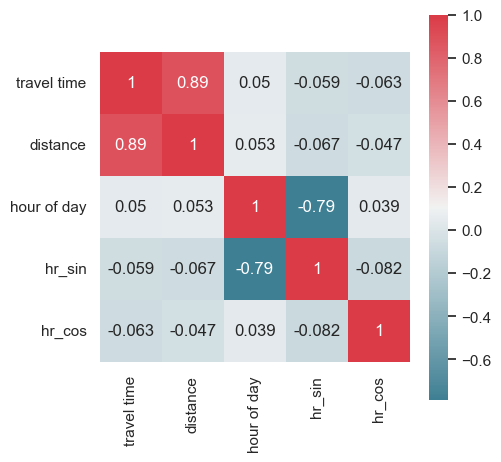

In [34]:
# run correlation matrix and plot
my_df = df[['travel time','distance','hour of day','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [35]:
x = np.array(df[['distance','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 9.92498195e-01, -9.65925826e-01, -2.58819045e-01],
       [ 3.44314517e-01, -8.66025404e-01,  5.00000000e-01],
       [ 1.87127960e-02, -1.00000000e+00, -1.83697020e-16],
       ...,
       [ 3.58691059e-01,  0.00000000e+00,  1.00000000e+00],
       [ 1.60193287e-02,  5.00000000e-01,  8.66025404e-01],
       [ 7.42826410e-01,  9.65925826e-01,  2.58819045e-01]])

In [36]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 3)
(3332, 3)


In [38]:
# inputs: distance + hour
model2_0 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_0

Epoch 1/500
417/417 [==============================] - 1s 925us/step - loss: 561092.8125 - mape: 99.6795 - rmse: 749.0613 - val_loss: 544908.8125 - val_mape: 99.2920 - val_rmse: 738.1794
Epoch 2/500
417/417 [==============================] - 0s 794us/step - loss: 554196.9375 - mape: 98.6771 - rmse: 744.4440 - val_loss: 535389.5625 - val_mape: 97.8866 - val_rmse: 731.7032
Epoch 3/500
417/417 [==============================] - 0s 744us/step - loss: 540901.4375 - mape: 96.7621 - rmse: 735.4600 - val_loss: 519016.4375 - val_mape: 95.4298 - val_rmse: 720.4280
Epoch 4/500
417/417 [==============================] - 0s 751us/step - loss: 521747.0938 - mape: 93.9363 - rmse: 722.3206 - val_loss: 498075.6250 - val_mape: 92.1954 - val_rmse: 705.7448
Epoch 5/500
417/417 [==============================] - 0s 756us/step - loss: 498714.5000 - mape: 90.4080 - rmse: 706.1972 - val_loss: 473992.4375 - val_mape: 88.3509 - val_rmse: 688.4711
Epoch 6/500
417/417 [==============================] - 0s 718us/s

Epoch 45/500
417/417 [==============================] - 0s 711us/step - loss: 48630.9531 - mape: 39.3413 - rmse: 220.5243 - val_loss: 46316.5664 - val_mape: 39.7223 - val_rmse: 215.2128
Epoch 46/500
417/417 [==============================] - 0s 698us/step - loss: 47158.6602 - mape: 38.5878 - rmse: 217.1604 - val_loss: 44892.4180 - val_mape: 38.7487 - val_rmse: 211.8783
Epoch 47/500
417/417 [==============================] - 0s 763us/step - loss: 45754.0430 - mape: 37.6231 - rmse: 213.9019 - val_loss: 43538.2070 - val_mape: 37.9471 - val_rmse: 208.6581
Epoch 48/500
417/417 [==============================] - 0s 774us/step - loss: 44417.2500 - mape: 36.7818 - rmse: 210.7540 - val_loss: 42256.9414 - val_mape: 37.1205 - val_rmse: 205.5649
Epoch 49/500
417/417 [==============================] - 0s 742us/step - loss: 43159.2734 - mape: 35.9079 - rmse: 207.7481 - val_loss: 41053.2148 - val_mape: 36.3135 - val_rmse: 202.6159
Epoch 50/500
417/417 [==============================] - 0s 727us/step 

417/417 [==============================] - 0s 769us/step - loss: 31984.6387 - mape: 23.3039 - rmse: 178.8425 - val_loss: 30300.1992 - val_mape: 23.7272 - val_rmse: 174.0695
Epoch 90/500
417/417 [==============================] - 0s 764us/step - loss: 31986.5645 - mape: 23.2612 - rmse: 178.8479 - val_loss: 30299.9863 - val_mape: 23.6774 - val_rmse: 174.0689
Epoch 91/500
417/417 [==============================] - 0s 764us/step - loss: 31982.8613 - mape: 23.1737 - rmse: 178.8375 - val_loss: 30312.5938 - val_mape: 23.7855 - val_rmse: 174.1051
Epoch 92/500
417/417 [==============================] - 0s 730us/step - loss: 31982.9727 - mape: 23.2463 - rmse: 178.8378 - val_loss: 30309.6270 - val_mape: 23.7618 - val_rmse: 174.0966
Epoch 93/500
417/417 [==============================] - 0s 717us/step - loss: 31986.5000 - mape: 23.2149 - rmse: 178.8477 - val_loss: 30308.7363 - val_mape: 23.7394 - val_rmse: 174.0940
Epoch 94/500
417/417 [==============================] - 0s 735us/step - loss: 31982

Epoch 133/500
417/417 [==============================] - 0s 839us/step - loss: 31981.7910 - mape: 23.1786 - rmse: 178.8345 - val_loss: 30287.2852 - val_mape: 23.5817 - val_rmse: 174.0324
Epoch 134/500
417/417 [==============================] - 0s 722us/step - loss: 31982.4395 - mape: 23.1352 - rmse: 178.8363 - val_loss: 30289.0664 - val_mape: 23.5627 - val_rmse: 174.0375
Epoch 135/500
417/417 [==============================] - 0s 720us/step - loss: 31981.3867 - mape: 23.0962 - rmse: 178.8334 - val_loss: 30290.2695 - val_mape: 23.6056 - val_rmse: 174.0410
Epoch 136/500
417/417 [==============================] - 0s 732us/step - loss: 31981.3418 - mape: 23.1404 - rmse: 178.8333 - val_loss: 30288.4473 - val_mape: 23.5802 - val_rmse: 174.0358
Epoch 137/500
417/417 [==============================] - 0s 711us/step - loss: 31981.8262 - mape: 23.0750 - rmse: 178.8346 - val_loss: 30294.0723 - val_mape: 23.6391 - val_rmse: 174.0519
Epoch 138/500
417/417 [==============================] - 0s 749us

Epoch 177/500
417/417 [==============================] - 0s 719us/step - loss: 31981.2930 - mape: 23.1090 - rmse: 178.8331 - val_loss: 30293.3516 - val_mape: 23.6322 - val_rmse: 174.0499
Epoch 178/500
417/417 [==============================] - 0s 795us/step - loss: 31981.0820 - mape: 23.0885 - rmse: 178.8326 - val_loss: 30299.9727 - val_mape: 23.6681 - val_rmse: 174.0689
Epoch 179/500
417/417 [==============================] - 0s 752us/step - loss: 31982.0078 - mape: 23.1352 - rmse: 178.8351 - val_loss: 30298.5527 - val_mape: 23.6376 - val_rmse: 174.0648
Epoch 180/500
417/417 [==============================] - 0s 727us/step - loss: 31981.7207 - mape: 23.1465 - rmse: 178.8343 - val_loss: 30294.2910 - val_mape: 23.6132 - val_rmse: 174.0526
Epoch 181/500
417/417 [==============================] - 0s 739us/step - loss: 31979.8848 - mape: 23.1593 - rmse: 178.8292 - val_loss: 30289.3086 - val_mape: 23.5293 - val_rmse: 174.0382
Epoch 182/500
417/417 [==============================] - 0s 713us

Epoch 221/500
417/417 [==============================] - 0s 707us/step - loss: 31984.1152 - mape: 23.1539 - rmse: 178.8410 - val_loss: 30296.6777 - val_mape: 23.6288 - val_rmse: 174.0594
Epoch 222/500
417/417 [==============================] - 0s 702us/step - loss: 31983.1406 - mape: 23.0838 - rmse: 178.8383 - val_loss: 30300.4785 - val_mape: 23.6564 - val_rmse: 174.0703
Epoch 223/500
417/417 [==============================] - 0s 688us/step - loss: 31979.3027 - mape: 23.2045 - rmse: 178.8276 - val_loss: 30287.8828 - val_mape: 23.5503 - val_rmse: 174.0341
Epoch 224/500
417/417 [==============================] - 0s 692us/step - loss: 31981.5527 - mape: 23.0366 - rmse: 178.8339 - val_loss: 30297.5801 - val_mape: 23.6225 - val_rmse: 174.0620
Epoch 225/500
417/417 [==============================] - 0s 725us/step - loss: 31983.0996 - mape: 23.1259 - rmse: 178.8382 - val_loss: 30299.5469 - val_mape: 23.6288 - val_rmse: 174.0677
Epoch 226/500
417/417 [==============================] - 0s 691us

Epoch 265/500
417/417 [==============================] - 0s 688us/step - loss: 31982.2559 - mape: 23.1313 - rmse: 178.8358 - val_loss: 30298.4805 - val_mape: 23.6505 - val_rmse: 174.0646
Epoch 266/500
417/417 [==============================] - 0s 697us/step - loss: 31981.9043 - mape: 23.1028 - rmse: 178.8349 - val_loss: 30302.0605 - val_mape: 23.6584 - val_rmse: 174.0749
Epoch 267/500
417/417 [==============================] - 0s 745us/step - loss: 31983.0898 - mape: 23.1335 - rmse: 178.8382 - val_loss: 30296.6367 - val_mape: 23.6398 - val_rmse: 174.0593
Epoch 268/500
417/417 [==============================] - 0s 710us/step - loss: 31982.7793 - mape: 23.1392 - rmse: 178.8373 - val_loss: 30295.3945 - val_mape: 23.6136 - val_rmse: 174.0557
Epoch 269/500
417/417 [==============================] - 0s 713us/step - loss: 31983.3516 - mape: 23.1269 - rmse: 178.8389 - val_loss: 30295.9336 - val_mape: 23.6120 - val_rmse: 174.0573
Epoch 270/500
417/417 [==============================] - 0s 700us

Epoch 309/500
417/417 [==============================] - 0s 740us/step - loss: 31982.0391 - mape: 23.1316 - rmse: 178.8352 - val_loss: 30293.2891 - val_mape: 23.6283 - val_rmse: 174.0497
Epoch 310/500
417/417 [==============================] - 0s 721us/step - loss: 31981.9180 - mape: 23.1258 - rmse: 178.8349 - val_loss: 30291.8809 - val_mape: 23.5891 - val_rmse: 174.0456
Epoch 311/500
417/417 [==============================] - 0s 721us/step - loss: 31982.9180 - mape: 23.1174 - rmse: 178.8377 - val_loss: 30289.7832 - val_mape: 23.5936 - val_rmse: 174.0396
Epoch 312/500
417/417 [==============================] - 0s 702us/step - loss: 31982.2617 - mape: 23.1204 - rmse: 178.8358 - val_loss: 30290.7422 - val_mape: 23.6190 - val_rmse: 174.0424
Epoch 313/500
417/417 [==============================] - 0s 691us/step - loss: 31981.2441 - mape: 23.1007 - rmse: 178.8330 - val_loss: 30292.7617 - val_mape: 23.5974 - val_rmse: 174.0482
Epoch 314/500
417/417 [==============================] - 0s 697us

Epoch 353/500
417/417 [==============================] - 0s 741us/step - loss: 31982.8379 - mape: 23.0929 - rmse: 178.8375 - val_loss: 30298.4531 - val_mape: 23.6530 - val_rmse: 174.0645
Epoch 354/500
417/417 [==============================] - 0s 743us/step - loss: 31982.3574 - mape: 23.1496 - rmse: 178.8361 - val_loss: 30297.6621 - val_mape: 23.6341 - val_rmse: 174.0622
Epoch 355/500
417/417 [==============================] - 0s 748us/step - loss: 31982.0020 - mape: 23.0957 - rmse: 178.8351 - val_loss: 30295.6973 - val_mape: 23.6150 - val_rmse: 174.0566
Epoch 356/500
417/417 [==============================] - 0s 753us/step - loss: 31979.1836 - mape: 23.2013 - rmse: 178.8272 - val_loss: 30284.3418 - val_mape: 23.5044 - val_rmse: 174.0240
Epoch 357/500
417/417 [==============================] - 0s 689us/step - loss: 31983.0273 - mape: 23.1054 - rmse: 178.8380 - val_loss: 30284.9355 - val_mape: 23.5160 - val_rmse: 174.0257
Epoch 358/500
417/417 [==============================] - 0s 734us

Epoch 397/500
417/417 [==============================] - 0s 712us/step - loss: 31982.9297 - mape: 23.0952 - rmse: 178.8377 - val_loss: 30293.5059 - val_mape: 23.6080 - val_rmse: 174.0503
Epoch 398/500
417/417 [==============================] - 0s 787us/step - loss: 31982.7051 - mape: 23.1317 - rmse: 178.8371 - val_loss: 30288.0078 - val_mape: 23.5525 - val_rmse: 174.0345
Epoch 399/500
417/417 [==============================] - 0s 748us/step - loss: 31981.1621 - mape: 23.1324 - rmse: 178.8328 - val_loss: 30285.9785 - val_mape: 23.5434 - val_rmse: 174.0287
Epoch 400/500
417/417 [==============================] - 0s 704us/step - loss: 31982.5371 - mape: 23.0865 - rmse: 178.8366 - val_loss: 30290.8965 - val_mape: 23.5663 - val_rmse: 174.0428
Epoch 401/500
417/417 [==============================] - 0s 714us/step - loss: 31982.0547 - mape: 23.0958 - rmse: 178.8353 - val_loss: 30293.3828 - val_mape: 23.6106 - val_rmse: 174.0499
Epoch 402/500
417/417 [==============================] - 0s 719us

Epoch 441/500
417/417 [==============================] - 0s 762us/step - loss: 31981.6523 - mape: 23.1089 - rmse: 178.8342 - val_loss: 30289.3809 - val_mape: 23.5808 - val_rmse: 174.0385
Epoch 442/500
417/417 [==============================] - 0s 731us/step - loss: 31980.9844 - mape: 23.1224 - rmse: 178.8323 - val_loss: 30295.1113 - val_mape: 23.5807 - val_rmse: 174.0549
Epoch 443/500
417/417 [==============================] - 0s 703us/step - loss: 31982.2227 - mape: 23.0877 - rmse: 178.8357 - val_loss: 30298.5156 - val_mape: 23.6392 - val_rmse: 174.0647
Epoch 444/500
417/417 [==============================] - 0s 728us/step - loss: 31983.9707 - mape: 23.1554 - rmse: 178.8406 - val_loss: 30288.0137 - val_mape: 23.5562 - val_rmse: 174.0345
Epoch 445/500
417/417 [==============================] - 0s 746us/step - loss: 31982.1660 - mape: 23.0954 - rmse: 178.8356 - val_loss: 30295.9961 - val_mape: 23.6228 - val_rmse: 174.0574
Epoch 446/500
417/417 [==============================] - 0s 727us

Epoch 485/500
417/417 [==============================] - 0s 716us/step - loss: 31982.3965 - mape: 23.1062 - rmse: 178.8362 - val_loss: 30293.8926 - val_mape: 23.6406 - val_rmse: 174.0514
Epoch 486/500
417/417 [==============================] - 0s 692us/step - loss: 31982.1895 - mape: 23.1355 - rmse: 178.8356 - val_loss: 30293.2012 - val_mape: 23.6255 - val_rmse: 174.0494
Epoch 487/500
417/417 [==============================] - 0s 703us/step - loss: 31983.1523 - mape: 23.1449 - rmse: 178.8383 - val_loss: 30288.9141 - val_mape: 23.5697 - val_rmse: 174.0371
Epoch 488/500
417/417 [==============================] - 0s 735us/step - loss: 31981.5391 - mape: 23.0916 - rmse: 178.8338 - val_loss: 30290.1602 - val_mape: 23.5883 - val_rmse: 174.0407
Epoch 489/500
417/417 [==============================] - 0s 747us/step - loss: 31982.9668 - mape: 23.1106 - rmse: 178.8378 - val_loss: 30290.2910 - val_mape: 23.5902 - val_rmse: 174.0411
Epoch 490/500
417/417 [==============================] - 0s 703us

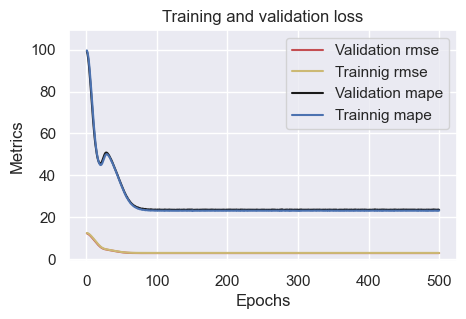

In [39]:
plotme(model2_0)

In [40]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
417/417 [==============================] - 1s 853us/step - loss: 559841.1250 - mape: 99.4527 - rmse: 748.2253 - val_loss: 540033.4375 - val_mape: 98.5132 - val_rmse: 734.8697
Epoch 2/500
417/417 [==============================] - 0s 715us/step - loss: 540676.1250 - mape: 96.6226 - rmse: 735.3068 - val_loss: 511834.1562 - val_mape: 94.2364 - val_rmse: 715.4258
Epoch 3/500
417/417 [==============================] - 0s 767us/step - loss: 504456.8125 - mape: 91.1501 - rmse: 710.2512 - val_loss: 469955.1875 - val_mape: 87.5867 - val_rmse: 685.5328
Epoch 4/500
417/417 [==============================] - 0s 690us/step - loss: 457427.0625 - mape: 83.7156 - rmse: 676.3336 - val_loss: 420435.6250 - val_mape: 79.2948 - val_rmse: 648.4101
Epoch 5/500
417/417 [==============================] - 0s 739us/step - loss: 405235.4375 - mape: 75.0065 - rmse: 636.5811 - val_loss: 368290.3438 - val_mape: 70.4837 - val_rmse: 606.8693
Epoch 6/500
417/417 [==============================] - 0s 719us/s

Epoch 45/500
417/417 [==============================] - 0s 706us/step - loss: 31885.6035 - mape: 23.0580 - rmse: 178.5654 - val_loss: 30352.9863 - val_mape: 23.3557 - val_rmse: 174.2211
Epoch 46/500
417/417 [==============================] - 0s 718us/step - loss: 31884.6230 - mape: 22.8938 - rmse: 178.5627 - val_loss: 30393.3594 - val_mape: 23.6627 - val_rmse: 174.3369
Epoch 47/500
417/417 [==============================] - 0s 732us/step - loss: 31887.1250 - mape: 23.0562 - rmse: 178.5697 - val_loss: 30363.2363 - val_mape: 23.3628 - val_rmse: 174.2505
Epoch 48/500
417/417 [==============================] - 0s 697us/step - loss: 31889.6406 - mape: 22.9411 - rmse: 178.5767 - val_loss: 30356.0938 - val_mape: 23.4437 - val_rmse: 174.2300
Epoch 49/500
417/417 [==============================] - 0s 758us/step - loss: 31886.7754 - mape: 23.0380 - rmse: 178.5687 - val_loss: 30339.1406 - val_mape: 23.2188 - val_rmse: 174.1814
Epoch 50/500
417/417 [==============================] - 0s 727us/step 

417/417 [==============================] - 0s 697us/step - loss: 31877.1270 - mape: 22.9090 - rmse: 178.5417 - val_loss: 30341.5938 - val_mape: 23.4947 - val_rmse: 174.1884
Epoch 90/500
417/417 [==============================] - 0s 732us/step - loss: 31866.9805 - mape: 23.0510 - rmse: 178.5132 - val_loss: 30310.7344 - val_mape: 23.0524 - val_rmse: 174.0998
Epoch 91/500
417/417 [==============================] - 0s 713us/step - loss: 31882.3926 - mape: 22.8382 - rmse: 178.5564 - val_loss: 30316.2305 - val_mape: 23.3741 - val_rmse: 174.1156
Epoch 92/500
417/417 [==============================] - 0s 736us/step - loss: 31878.8340 - mape: 22.9152 - rmse: 178.5464 - val_loss: 30329.5645 - val_mape: 23.5235 - val_rmse: 174.1539
Epoch 93/500
417/417 [==============================] - 0s 717us/step - loss: 31877.2402 - mape: 22.9359 - rmse: 178.5420 - val_loss: 30330.2617 - val_mape: 23.5031 - val_rmse: 174.1559
Epoch 94/500
417/417 [==============================] - 0s 752us/step - loss: 31884

Epoch 133/500
417/417 [==============================] - 0s 691us/step - loss: 31876.4863 - mape: 23.0046 - rmse: 178.5399 - val_loss: 30301.4629 - val_mape: 23.2762 - val_rmse: 174.0732
Epoch 134/500
417/417 [==============================] - 0s 737us/step - loss: 31873.3691 - mape: 22.9106 - rmse: 178.5311 - val_loss: 30329.9785 - val_mape: 23.5818 - val_rmse: 174.1550
Epoch 135/500
417/417 [==============================] - 0s 694us/step - loss: 31878.1113 - mape: 22.9749 - rmse: 178.5444 - val_loss: 30305.8418 - val_mape: 23.3165 - val_rmse: 174.0857
Epoch 136/500
417/417 [==============================] - 0s 713us/step - loss: 31876.5977 - mape: 22.8948 - rmse: 178.5402 - val_loss: 30340.6582 - val_mape: 23.6116 - val_rmse: 174.1857
Epoch 137/500
417/417 [==============================] - 0s 697us/step - loss: 31875.7344 - mape: 22.9824 - rmse: 178.5378 - val_loss: 30337.5527 - val_mape: 23.5016 - val_rmse: 174.1768
Epoch 138/500
417/417 [==============================] - 0s 730us

Epoch 177/500
417/417 [==============================] - 0s 701us/step - loss: 31873.3418 - mape: 22.9381 - rmse: 178.5311 - val_loss: 30334.7520 - val_mape: 23.5679 - val_rmse: 174.1687
Epoch 178/500
417/417 [==============================] - 0s 745us/step - loss: 31872.4609 - mape: 22.9992 - rmse: 178.5286 - val_loss: 30305.0332 - val_mape: 23.3324 - val_rmse: 174.0834
Epoch 179/500
417/417 [==============================] - 0s 716us/step - loss: 31872.0039 - mape: 22.9099 - rmse: 178.5273 - val_loss: 30320.7266 - val_mape: 23.4578 - val_rmse: 174.1285
Epoch 180/500
417/417 [==============================] - 0s 723us/step - loss: 31868.0352 - mape: 22.8814 - rmse: 178.5162 - val_loss: 30344.7539 - val_mape: 23.7126 - val_rmse: 174.1975
Epoch 181/500
417/417 [==============================] - 0s 715us/step - loss: 31878.4844 - mape: 22.9876 - rmse: 178.5455 - val_loss: 30313.2949 - val_mape: 23.5142 - val_rmse: 174.1071
Epoch 182/500
417/417 [==============================] - 0s 732us

Epoch 221/500
417/417 [==============================] - 0s 708us/step - loss: 31866.0254 - mape: 23.0527 - rmse: 178.5106 - val_loss: 30297.0020 - val_mape: 23.1974 - val_rmse: 174.0603
Epoch 222/500
417/417 [==============================] - 0s 760us/step - loss: 31875.0488 - mape: 22.8186 - rmse: 178.5358 - val_loss: 30318.6797 - val_mape: 23.5730 - val_rmse: 174.1226
Epoch 223/500
417/417 [==============================] - 0s 695us/step - loss: 31871.8223 - mape: 22.9793 - rmse: 178.5268 - val_loss: 30307.1211 - val_mape: 23.4096 - val_rmse: 174.0894
Epoch 224/500
417/417 [==============================] - 0s 726us/step - loss: 31870.6582 - mape: 22.8739 - rmse: 178.5235 - val_loss: 30313.4453 - val_mape: 23.5660 - val_rmse: 174.1076
Epoch 225/500
417/417 [==============================] - 0s 743us/step - loss: 31873.1230 - mape: 23.0086 - rmse: 178.5305 - val_loss: 30295.1836 - val_mape: 23.3659 - val_rmse: 174.0551
Epoch 226/500
417/417 [==============================] - 0s 729us

Epoch 265/500
417/417 [==============================] - 0s 745us/step - loss: 31867.6387 - mape: 22.8498 - rmse: 178.5151 - val_loss: 30358.4180 - val_mape: 23.7949 - val_rmse: 174.2367
Epoch 266/500
417/417 [==============================] - 0s 768us/step - loss: 31873.8691 - mape: 22.9928 - rmse: 178.5325 - val_loss: 30327.1328 - val_mape: 23.5944 - val_rmse: 174.1469
Epoch 267/500
417/417 [==============================] - 0s 687us/step - loss: 31875.8789 - mape: 22.9775 - rmse: 178.5382 - val_loss: 30289.9805 - val_mape: 23.3696 - val_rmse: 174.0402
Epoch 268/500
417/417 [==============================] - 0s 756us/step - loss: 31874.8711 - mape: 22.9647 - rmse: 178.5354 - val_loss: 30299.1035 - val_mape: 23.4512 - val_rmse: 174.0664
Epoch 269/500
417/417 [==============================] - 0s 712us/step - loss: 31870.6777 - mape: 22.9200 - rmse: 178.5236 - val_loss: 30303.4199 - val_mape: 23.4384 - val_rmse: 174.0788
Epoch 270/500
417/417 [==============================] - 0s 741us

Epoch 309/500
417/417 [==============================] - 0s 714us/step - loss: 31869.7266 - mape: 22.9311 - rmse: 178.5209 - val_loss: 30285.5508 - val_mape: 23.3788 - val_rmse: 174.0274
Epoch 310/500
417/417 [==============================] - 0s 734us/step - loss: 31870.7090 - mape: 22.8823 - rmse: 178.5237 - val_loss: 30334.8652 - val_mape: 23.6701 - val_rmse: 174.1691
Epoch 311/500
417/417 [==============================] - 0s 725us/step - loss: 31867.4707 - mape: 22.9863 - rmse: 178.5146 - val_loss: 30289.9473 - val_mape: 23.3906 - val_rmse: 174.0401
Epoch 312/500
417/417 [==============================] - 0s 697us/step - loss: 31868.6406 - mape: 22.9174 - rmse: 178.5179 - val_loss: 30290.2207 - val_mape: 23.3919 - val_rmse: 174.0409
Epoch 313/500
417/417 [==============================] - 0s 701us/step - loss: 31868.3164 - mape: 22.9681 - rmse: 178.5170 - val_loss: 30285.0645 - val_mape: 23.3434 - val_rmse: 174.0260
Epoch 314/500
417/417 [==============================] - 0s 707us

Epoch 353/500
417/417 [==============================] - 0s 691us/step - loss: 31860.7949 - mape: 22.8748 - rmse: 178.4959 - val_loss: 30295.2461 - val_mape: 23.4251 - val_rmse: 174.0553
Epoch 354/500
417/417 [==============================] - 0s 692us/step - loss: 31858.9473 - mape: 22.9051 - rmse: 178.4908 - val_loss: 30286.9863 - val_mape: 23.3769 - val_rmse: 174.0316
Epoch 355/500
417/417 [==============================] - 0s 702us/step - loss: 31862.1543 - mape: 22.9277 - rmse: 178.4997 - val_loss: 30282.5059 - val_mape: 23.3391 - val_rmse: 174.0187
Epoch 356/500
417/417 [==============================] - 0s 726us/step - loss: 31864.4902 - mape: 22.9426 - rmse: 178.5063 - val_loss: 30290.0859 - val_mape: 23.3089 - val_rmse: 174.0405
Epoch 357/500
417/417 [==============================] - 0s 724us/step - loss: 31859.0879 - mape: 22.8552 - rmse: 178.4911 - val_loss: 30313.2441 - val_mape: 23.5386 - val_rmse: 174.1070
Epoch 358/500
417/417 [==============================] - 0s 687us

Epoch 397/500
417/417 [==============================] - 0s 713us/step - loss: 31843.8711 - mape: 22.9941 - rmse: 178.4485 - val_loss: 30259.9277 - val_mape: 23.1663 - val_rmse: 173.9538
Epoch 398/500
417/417 [==============================] - 0s 704us/step - loss: 31848.5078 - mape: 22.8016 - rmse: 178.4615 - val_loss: 30281.1602 - val_mape: 23.3839 - val_rmse: 174.0148
Epoch 399/500
417/417 [==============================] - 0s 741us/step - loss: 31843.6699 - mape: 22.8836 - rmse: 178.4480 - val_loss: 30264.1816 - val_mape: 23.2384 - val_rmse: 173.9660
Epoch 400/500
417/417 [==============================] - 0s 751us/step - loss: 31845.0195 - mape: 22.8435 - rmse: 178.4517 - val_loss: 30270.0508 - val_mape: 23.2546 - val_rmse: 173.9829
Epoch 401/500
417/417 [==============================] - 0s 706us/step - loss: 31842.6504 - mape: 22.8311 - rmse: 178.4451 - val_loss: 30284.5566 - val_mape: 23.3794 - val_rmse: 174.0246
Epoch 402/500
417/417 [==============================] - 0s 707us

Epoch 441/500
417/417 [==============================] - 0s 731us/step - loss: 31786.2930 - mape: 22.7318 - rmse: 178.2871 - val_loss: 30187.4941 - val_mape: 23.0769 - val_rmse: 173.7455
Epoch 442/500
417/417 [==============================] - 0s 721us/step - loss: 31785.2168 - mape: 22.6917 - rmse: 178.2841 - val_loss: 30208.7363 - val_mape: 23.2338 - val_rmse: 173.8066
Epoch 443/500
417/417 [==============================] - 0s 735us/step - loss: 31786.0078 - mape: 22.6985 - rmse: 178.2863 - val_loss: 30223.2051 - val_mape: 23.4170 - val_rmse: 173.8482
Epoch 444/500
417/417 [==============================] - 0s 711us/step - loss: 31784.0352 - mape: 22.7302 - rmse: 178.2808 - val_loss: 30202.8359 - val_mape: 23.2931 - val_rmse: 173.7896
Epoch 445/500
417/417 [==============================] - 0s 693us/step - loss: 31779.6289 - mape: 22.7022 - rmse: 178.2684 - val_loss: 30223.1113 - val_mape: 23.4286 - val_rmse: 173.8480
Epoch 446/500
417/417 [==============================] - 0s 726us

Epoch 485/500
417/417 [==============================] - 0s 742us/step - loss: 31764.6367 - mape: 22.6901 - rmse: 178.2264 - val_loss: 30159.0254 - val_mape: 23.1737 - val_rmse: 173.6635
Epoch 486/500
417/417 [==============================] - 0s 704us/step - loss: 31755.6973 - mape: 22.6701 - rmse: 178.2013 - val_loss: 30158.8066 - val_mape: 23.0427 - val_rmse: 173.6629
Epoch 487/500
417/417 [==============================] - 0s 734us/step - loss: 31757.6348 - mape: 22.6248 - rmse: 178.2067 - val_loss: 30161.8770 - val_mape: 23.0907 - val_rmse: 173.6718
Epoch 488/500
417/417 [==============================] - 0s 693us/step - loss: 31753.6504 - mape: 22.6232 - rmse: 178.1955 - val_loss: 30154.4102 - val_mape: 23.0547 - val_rmse: 173.6503
Epoch 489/500
417/417 [==============================] - 0s 760us/step - loss: 31754.1074 - mape: 22.6192 - rmse: 178.1968 - val_loss: 30160.9238 - val_mape: 23.1778 - val_rmse: 173.6690
Epoch 490/500
417/417 [==============================] - 0s 819us

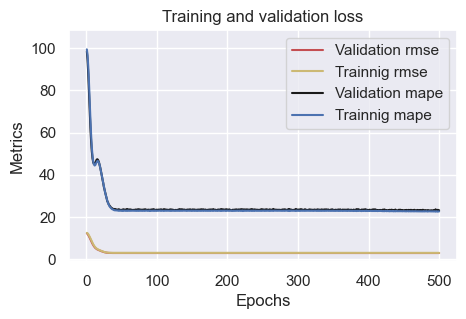

In [41]:
plotme(model2_1)

In [42]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
417/417 [==============================] - 1s 1ms/step - loss: 555715.7500 - mape: 98.8198 - rmse: 745.4634 - val_loss: 526936.8125 - val_mape: 96.4912 - val_rmse: 725.9041
Epoch 2/1000
417/417 [==============================] - 0s 1ms/step - loss: 508444.6562 - mape: 91.6772 - rmse: 713.0530 - val_loss: 458630.0000 - val_mape: 85.6459 - val_rmse: 677.2223
Epoch 3/1000
417/417 [==============================] - 0s 875us/step - loss: 426912.7500 - mape: 78.5049 - rmse: 653.3856 - val_loss: 370925.0625 - val_mape: 70.7764 - val_rmse: 609.0362
Epoch 4/1000
417/417 [==============================] - 0s 1ms/step - loss: 336372.8438 - mape: 64.0233 - rmse: 579.9766 - val_loss: 284248.7812 - val_mape: 57.7311 - val_rmse: 533.1498
Epoch 5/1000
417/417 [==============================] - 1s 1ms/step - loss: 254129.2031 - mape: 52.8711 - rmse: 504.1123 - val_loss: 211717.2656 - val_mape: 49.3829 - val_rmse: 460.1274
Epoch 6/1000
417/417 [==============================] - 1s 1ms/step 

417/417 [==============================] - 0s 746us/step - loss: 31880.9082 - mape: 23.0291 - rmse: 178.5523 - val_loss: 30305.7285 - val_mape: 23.1577 - val_rmse: 174.0854
Epoch 90/1000
417/417 [==============================] - 0s 725us/step - loss: 31883.1992 - mape: 22.9197 - rmse: 178.5587 - val_loss: 30294.8730 - val_mape: 23.2630 - val_rmse: 174.0542
Epoch 91/1000
417/417 [==============================] - 0s 727us/step - loss: 31877.8848 - mape: 22.9256 - rmse: 178.5438 - val_loss: 30324.4043 - val_mape: 23.5283 - val_rmse: 174.1390
Epoch 92/1000
417/417 [==============================] - 0s 715us/step - loss: 31887.4531 - mape: 22.9023 - rmse: 178.5706 - val_loss: 30299.2910 - val_mape: 23.4379 - val_rmse: 174.0669
Epoch 93/1000
417/417 [==============================] - 0s 761us/step - loss: 31886.1152 - mape: 22.9887 - rmse: 178.5668 - val_loss: 30323.8125 - val_mape: 23.4426 - val_rmse: 174.1373
Epoch 94/1000
417/417 [==============================] - 0s 718us/step - loss: 

Epoch 133/1000
417/417 [==============================] - 0s 743us/step - loss: 31880.2891 - mape: 22.9871 - rmse: 178.5505 - val_loss: 30296.2227 - val_mape: 23.4127 - val_rmse: 174.0581
Epoch 134/1000
417/417 [==============================] - 0s 705us/step - loss: 31878.8145 - mape: 22.9063 - rmse: 178.5464 - val_loss: 30329.0566 - val_mape: 23.7166 - val_rmse: 174.1524
Epoch 135/1000
417/417 [==============================] - 0s 737us/step - loss: 31878.8262 - mape: 22.9813 - rmse: 178.5464 - val_loss: 30302.2656 - val_mape: 23.4239 - val_rmse: 174.0755
Epoch 136/1000
417/417 [==============================] - 0s 732us/step - loss: 31879.7012 - mape: 22.9104 - rmse: 178.5489 - val_loss: 30346.4082 - val_mape: 23.7222 - val_rmse: 174.2022
Epoch 137/1000
417/417 [==============================] - 0s 745us/step - loss: 31881.3750 - mape: 22.9750 - rmse: 178.5536 - val_loss: 30335.2168 - val_mape: 23.4890 - val_rmse: 174.1701
Epoch 138/1000
417/417 [==============================] - 0s

Epoch 220/1000
417/417 [==============================] - 0s 728us/step - loss: 31883.7578 - mape: 22.8627 - rmse: 178.5602 - val_loss: 30305.6836 - val_mape: 23.4865 - val_rmse: 174.0853
Epoch 221/1000
417/417 [==============================] - 0s 725us/step - loss: 31870.9648 - mape: 23.0297 - rmse: 178.5244 - val_loss: 30273.5996 - val_mape: 23.0211 - val_rmse: 173.9931
Epoch 222/1000
417/417 [==============================] - 0s 746us/step - loss: 31881.5254 - mape: 22.8357 - rmse: 178.5540 - val_loss: 30307.5293 - val_mape: 23.5950 - val_rmse: 174.0906
Epoch 223/1000
417/417 [==============================] - 0s 749us/step - loss: 31878.3379 - mape: 23.0026 - rmse: 178.5451 - val_loss: 30293.9180 - val_mape: 23.2418 - val_rmse: 174.0515
Epoch 224/1000
417/417 [==============================] - 0s 722us/step - loss: 31880.6641 - mape: 22.9187 - rmse: 178.5516 - val_loss: 30291.9395 - val_mape: 23.2749 - val_rmse: 174.0458
Epoch 225/1000
417/417 [==============================] - 0s

Epoch 307/1000
417/417 [==============================] - 0s 724us/step - loss: 31810.3340 - mape: 22.7447 - rmse: 178.3545 - val_loss: 30226.3320 - val_mape: 23.4582 - val_rmse: 173.8572
Epoch 308/1000
417/417 [==============================] - 0s 758us/step - loss: 31816.0547 - mape: 22.8202 - rmse: 178.3706 - val_loss: 30242.6270 - val_mape: 23.4277 - val_rmse: 173.9041
Epoch 309/1000
417/417 [==============================] - 0s 723us/step - loss: 31816.5469 - mape: 22.8525 - rmse: 178.3719 - val_loss: 30230.9316 - val_mape: 23.2687 - val_rmse: 173.8704
Epoch 310/1000
417/417 [==============================] - 0s 762us/step - loss: 31817.5840 - mape: 22.7839 - rmse: 178.3748 - val_loss: 30236.6367 - val_mape: 23.4224 - val_rmse: 173.8869
Epoch 311/1000
417/417 [==============================] - 0s 730us/step - loss: 31807.1562 - mape: 22.8276 - rmse: 178.3456 - val_loss: 30230.7441 - val_mape: 23.3989 - val_rmse: 173.8699
Epoch 312/1000
417/417 [==============================] - 0s

Epoch 394/1000
417/417 [==============================] - 0s 734us/step - loss: 31711.9336 - mape: 22.5001 - rmse: 178.0784 - val_loss: 30143.2441 - val_mape: 23.2101 - val_rmse: 173.6181
Epoch 395/1000
417/417 [==============================] - 0s 715us/step - loss: 31720.8145 - mape: 22.5576 - rmse: 178.1034 - val_loss: 30145.9238 - val_mape: 23.1421 - val_rmse: 173.6258
Epoch 396/1000
417/417 [==============================] - 0s 766us/step - loss: 31712.5332 - mape: 22.5288 - rmse: 178.0801 - val_loss: 30129.0879 - val_mape: 23.0189 - val_rmse: 173.5773
Epoch 397/1000
417/417 [==============================] - 0s 744us/step - loss: 31720.6973 - mape: 22.4727 - rmse: 178.1031 - val_loss: 30147.8359 - val_mape: 23.1343 - val_rmse: 173.6313
Epoch 398/1000
417/417 [==============================] - 0s 709us/step - loss: 31710.6953 - mape: 22.5904 - rmse: 178.0750 - val_loss: 30126.5684 - val_mape: 22.8548 - val_rmse: 173.5701
Epoch 399/1000
417/417 [==============================] - 0s

Epoch 481/1000
417/417 [==============================] - 0s 721us/step - loss: 31643.4551 - mape: 22.2763 - rmse: 177.8861 - val_loss: 30053.9551 - val_mape: 22.7029 - val_rmse: 173.3608
Epoch 482/1000
417/417 [==============================] - 0s 730us/step - loss: 31644.7012 - mape: 22.2051 - rmse: 177.8896 - val_loss: 30074.1738 - val_mape: 22.8776 - val_rmse: 173.4191
Epoch 483/1000
417/417 [==============================] - 0s 730us/step - loss: 31647.5117 - mape: 22.2630 - rmse: 177.8975 - val_loss: 30078.5566 - val_mape: 22.8459 - val_rmse: 173.4317
Epoch 484/1000
417/417 [==============================] - 0s 736us/step - loss: 31647.8105 - mape: 22.3229 - rmse: 177.8983 - val_loss: 30058.4727 - val_mape: 22.7513 - val_rmse: 173.3738
Epoch 485/1000
417/417 [==============================] - 0s 714us/step - loss: 31646.3223 - mape: 22.2615 - rmse: 177.8941 - val_loss: 30035.4629 - val_mape: 22.6768 - val_rmse: 173.3074
Epoch 486/1000
417/417 [==============================] - 0s

Epoch 568/1000
417/417 [==============================] - 0s 726us/step - loss: 31618.6602 - mape: 22.1454 - rmse: 177.8164 - val_loss: 30006.8926 - val_mape: 22.3100 - val_rmse: 173.2250
Epoch 569/1000
417/417 [==============================] - 0s 741us/step - loss: 31621.7363 - mape: 22.0463 - rmse: 177.8250 - val_loss: 30014.6426 - val_mape: 22.4067 - val_rmse: 173.2473
Epoch 570/1000
417/417 [==============================] - 0s 751us/step - loss: 31621.8730 - mape: 22.1075 - rmse: 177.8254 - val_loss: 30016.1914 - val_mape: 22.4623 - val_rmse: 173.2518
Epoch 571/1000
417/417 [==============================] - 0s 731us/step - loss: 31618.0703 - mape: 22.0745 - rmse: 177.8147 - val_loss: 30012.1699 - val_mape: 22.6291 - val_rmse: 173.2402
Epoch 572/1000
417/417 [==============================] - 0s 722us/step - loss: 31622.1777 - mape: 22.1192 - rmse: 177.8263 - val_loss: 30024.7031 - val_mape: 22.5368 - val_rmse: 173.2764
Epoch 573/1000
417/417 [==============================] - 0s

Epoch 655/1000
417/417 [==============================] - 0s 750us/step - loss: 31611.7422 - mape: 21.9881 - rmse: 177.7969 - val_loss: 29995.4355 - val_mape: 22.4020 - val_rmse: 173.1919
Epoch 656/1000
417/417 [==============================] - 0s 735us/step - loss: 31615.1543 - mape: 22.0331 - rmse: 177.8065 - val_loss: 30013.2734 - val_mape: 22.4337 - val_rmse: 173.2434
Epoch 657/1000
417/417 [==============================] - 0s 719us/step - loss: 31616.0000 - mape: 22.0205 - rmse: 177.8089 - val_loss: 29995.5566 - val_mape: 22.4874 - val_rmse: 173.1923
Epoch 658/1000
417/417 [==============================] - 0s 772us/step - loss: 31612.4414 - mape: 22.0512 - rmse: 177.7989 - val_loss: 30005.9238 - val_mape: 22.2296 - val_rmse: 173.2222
Epoch 659/1000
417/417 [==============================] - 0s 717us/step - loss: 31617.5078 - mape: 21.9478 - rmse: 177.8131 - val_loss: 30058.7148 - val_mape: 22.7563 - val_rmse: 173.3745
Epoch 660/1000
417/417 [==============================] - 0s

Epoch 742/1000
417/417 [==============================] - 0s 706us/step - loss: 31607.7988 - mape: 21.9778 - rmse: 177.7858 - val_loss: 29987.6367 - val_mape: 22.2889 - val_rmse: 173.1694
Epoch 743/1000
417/417 [==============================] - 0s 739us/step - loss: 31610.4453 - mape: 21.9954 - rmse: 177.7933 - val_loss: 30021.1133 - val_mape: 22.4614 - val_rmse: 173.2660
Epoch 744/1000
417/417 [==============================] - 0s 737us/step - loss: 31612.8477 - mape: 22.0282 - rmse: 177.8000 - val_loss: 29994.7188 - val_mape: 22.2113 - val_rmse: 173.1898
Epoch 745/1000
417/417 [==============================] - 0s 766us/step - loss: 31607.1602 - mape: 22.0067 - rmse: 177.7840 - val_loss: 29986.6289 - val_mape: 22.1107 - val_rmse: 173.1665
Epoch 746/1000
417/417 [==============================] - 0s 740us/step - loss: 31607.2832 - mape: 21.9603 - rmse: 177.7844 - val_loss: 29979.9414 - val_mape: 22.2077 - val_rmse: 173.1472
Epoch 747/1000
417/417 [==============================] - 0s

Epoch 829/1000
417/417 [==============================] - 0s 760us/step - loss: 31613.2656 - mape: 21.9647 - rmse: 177.8012 - val_loss: 29995.3945 - val_mape: 22.5084 - val_rmse: 173.1918
Epoch 830/1000
417/417 [==============================] - 0s 704us/step - loss: 31614.8086 - mape: 22.0473 - rmse: 177.8055 - val_loss: 29991.9336 - val_mape: 22.3571 - val_rmse: 173.1818
Epoch 831/1000
417/417 [==============================] - 0s 749us/step - loss: 31613.0059 - mape: 22.0062 - rmse: 177.8005 - val_loss: 29983.4102 - val_mape: 22.3138 - val_rmse: 173.1572
Epoch 832/1000
417/417 [==============================] - 0s 754us/step - loss: 31611.0723 - mape: 21.9396 - rmse: 177.7950 - val_loss: 30002.7500 - val_mape: 22.5036 - val_rmse: 173.2130
Epoch 833/1000
417/417 [==============================] - 0s 756us/step - loss: 31602.9512 - mape: 22.0101 - rmse: 177.7722 - val_loss: 29951.8613 - val_mape: 22.2064 - val_rmse: 173.0661
Epoch 834/1000
417/417 [==============================] - 0s

Epoch 916/1000
417/417 [==============================] - 0s 739us/step - loss: 31606.9316 - mape: 22.0755 - rmse: 177.7834 - val_loss: 29969.2461 - val_mape: 22.1123 - val_rmse: 173.1163
Epoch 917/1000
417/417 [==============================] - 0s 714us/step - loss: 31618.0703 - mape: 21.9296 - rmse: 177.8147 - val_loss: 29974.4570 - val_mape: 22.3773 - val_rmse: 173.1313
Epoch 918/1000
417/417 [==============================] - 0s 727us/step - loss: 31608.6836 - mape: 21.9790 - rmse: 177.7883 - val_loss: 29957.8633 - val_mape: 22.1462 - val_rmse: 173.0834
Epoch 919/1000
417/417 [==============================] - 0s 743us/step - loss: 31614.6074 - mape: 21.9914 - rmse: 177.8050 - val_loss: 29958.7930 - val_mape: 22.1202 - val_rmse: 173.0861
Epoch 920/1000
417/417 [==============================] - 0s 728us/step - loss: 31608.3164 - mape: 21.8997 - rmse: 177.7873 - val_loss: 30010.7832 - val_mape: 22.5602 - val_rmse: 173.2362
Epoch 921/1000
417/417 [==============================] - 0s

In [43]:
# plotme(model2_2)

In [44]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
417/417 [==============================] - 1s 903us/step - loss: 547534.3750 - mape: 97.6316 - rmse: 739.9556 - val_loss: 501218.1562 - val_mape: 92.5667 - val_rmse: 707.9677
Epoch 2/500
417/417 [==============================] - 0s 789us/step - loss: 451945.5938 - mape: 82.7877 - rmse: 672.2690 - val_loss: 372069.8750 - val_mape: 71.0930 - val_rmse: 609.9753
Epoch 3/500
417/417 [==============================] - 0s 805us/step - loss: 313030.5938 - mape: 61.1865 - rmse: 559.4914 - val_loss: 241442.2031 - val_mape: 52.7876 - val_rmse: 491.3677
Epoch 4/500
417/417 [==============================] - 0s 777us/step - loss: 199654.1250 - mape: 47.9240 - rmse: 446.8267 - val_loss: 153221.9844 - val_mape: 45.6128 - val_rmse: 391.4358
Epoch 5/500
417/417 [==============================] - 0s 804us/step - loss: 130948.9766 - mape: 44.3447 - rmse: 361.8687 - val_loss: 105500.8750 - val_mape: 45.0360 - val_rmse: 324.8090
Epoch 6/500
417/417 [==============================] - 0s 751us/s

417/417 [==============================] - 0s 811us/step - loss: 31885.1875 - mape: 22.9510 - rmse: 178.5642 - val_loss: 30316.7461 - val_mape: 23.4500 - val_rmse: 174.1171
Epoch 46/500
417/417 [==============================] - 0s 775us/step - loss: 31881.8535 - mape: 22.9671 - rmse: 178.5549 - val_loss: 30325.9199 - val_mape: 23.3244 - val_rmse: 174.1434
Epoch 47/500
417/417 [==============================] - 0s 797us/step - loss: 31884.9043 - mape: 22.8887 - rmse: 178.5634 - val_loss: 30387.8574 - val_mape: 23.7008 - val_rmse: 174.3211
Epoch 48/500
417/417 [==============================] - 0s 791us/step - loss: 31883.5820 - mape: 23.0315 - rmse: 178.5597 - val_loss: 30314.4629 - val_mape: 23.2738 - val_rmse: 174.1105
Epoch 49/500
417/417 [==============================] - 0s 806us/step - loss: 31883.8789 - mape: 22.9140 - rmse: 178.5606 - val_loss: 30332.8301 - val_mape: 23.2520 - val_rmse: 174.1632
Epoch 50/500
417/417 [==============================] - 0s 790us/step - loss: 31892

Epoch 133/500
417/417 [==============================] - 0s 798us/step - loss: 31875.7266 - mape: 22.9757 - rmse: 178.5378 - val_loss: 30264.9414 - val_mape: 23.1902 - val_rmse: 173.9682
Epoch 134/500
417/417 [==============================] - 0s 761us/step - loss: 31876.9668 - mape: 22.9098 - rmse: 178.5412 - val_loss: 30290.1797 - val_mape: 23.0980 - val_rmse: 174.0407
Epoch 135/500
417/417 [==============================] - 0s 797us/step - loss: 31877.4512 - mape: 22.9298 - rmse: 178.5426 - val_loss: 30285.2637 - val_mape: 23.0733 - val_rmse: 174.0266
Epoch 136/500
417/417 [==============================] - 0s 809us/step - loss: 31878.5742 - mape: 22.8647 - rmse: 178.5457 - val_loss: 30325.4434 - val_mape: 23.5616 - val_rmse: 174.1420
Epoch 137/500
417/417 [==============================] - 0s 827us/step - loss: 31877.5957 - mape: 22.9190 - rmse: 178.5430 - val_loss: 30346.6953 - val_mape: 23.6266 - val_rmse: 174.2030
Epoch 138/500
417/417 [==============================] - 0s 807us

Epoch 177/500
417/417 [==============================] - 0s 807us/step - loss: 31858.7500 - mape: 22.8822 - rmse: 178.4902 - val_loss: 30358.6270 - val_mape: 23.8098 - val_rmse: 174.2373
Epoch 178/500
417/417 [==============================] - 0s 784us/step - loss: 31848.3184 - mape: 22.9425 - rmse: 178.4610 - val_loss: 30306.3789 - val_mape: 23.6005 - val_rmse: 174.0873
Epoch 179/500
417/417 [==============================] - 0s 804us/step - loss: 31865.9805 - mape: 22.8995 - rmse: 178.5105 - val_loss: 30359.8984 - val_mape: 23.8121 - val_rmse: 174.2409
Epoch 180/500
417/417 [==============================] - 0s 808us/step - loss: 31856.0273 - mape: 22.9026 - rmse: 178.4826 - val_loss: 30346.1777 - val_mape: 23.6354 - val_rmse: 174.2015
Epoch 181/500
417/417 [==============================] - 0s 826us/step - loss: 31862.2031 - mape: 22.9424 - rmse: 178.4999 - val_loss: 30324.7090 - val_mape: 23.3832 - val_rmse: 174.1399
Epoch 182/500
417/417 [==============================] - 0s 758us

Epoch 221/500
417/417 [==============================] - 0s 783us/step - loss: 31791.2148 - mape: 22.7919 - rmse: 178.3009 - val_loss: 30309.0703 - val_mape: 23.6966 - val_rmse: 174.0950
Epoch 222/500
417/417 [==============================] - 0s 820us/step - loss: 31806.4629 - mape: 22.8145 - rmse: 178.3437 - val_loss: 30221.8457 - val_mape: 23.0173 - val_rmse: 173.8443
Epoch 223/500
417/417 [==============================] - 0s 801us/step - loss: 31808.1113 - mape: 22.7311 - rmse: 178.3483 - val_loss: 30208.7578 - val_mape: 23.2004 - val_rmse: 173.8067
Epoch 224/500
417/417 [==============================] - 0s 804us/step - loss: 31795.6543 - mape: 22.7879 - rmse: 178.3134 - val_loss: 30216.3594 - val_mape: 23.2620 - val_rmse: 173.8285
Epoch 225/500
417/417 [==============================] - 0s 804us/step - loss: 31803.2266 - mape: 22.7629 - rmse: 178.3346 - val_loss: 30228.9492 - val_mape: 23.1853 - val_rmse: 173.8647
Epoch 226/500
417/417 [==============================] - 0s 817us

Epoch 265/500
417/417 [==============================] - 0s 789us/step - loss: 31734.2910 - mape: 22.5201 - rmse: 178.1412 - val_loss: 30131.3086 - val_mape: 23.0973 - val_rmse: 173.5837
Epoch 266/500
417/417 [==============================] - 0s 784us/step - loss: 31726.4746 - mape: 22.5674 - rmse: 178.1193 - val_loss: 30136.2344 - val_mape: 23.0732 - val_rmse: 173.5979
Epoch 267/500
417/417 [==============================] - 0s 810us/step - loss: 31723.1680 - mape: 22.5751 - rmse: 178.1100 - val_loss: 30100.2383 - val_mape: 22.8368 - val_rmse: 173.4942
Epoch 268/500
417/417 [==============================] - 0s 791us/step - loss: 31724.1719 - mape: 22.5714 - rmse: 178.1128 - val_loss: 30175.1348 - val_mape: 23.3294 - val_rmse: 173.7099
Epoch 269/500
417/417 [==============================] - 0s 779us/step - loss: 31719.5117 - mape: 22.5712 - rmse: 178.0997 - val_loss: 30161.8867 - val_mape: 23.1968 - val_rmse: 173.6718
Epoch 270/500
417/417 [==============================] - 0s 813us

Epoch 309/500
417/417 [==============================] - 0s 791us/step - loss: 31666.0527 - mape: 22.4146 - rmse: 177.9496 - val_loss: 30049.5410 - val_mape: 22.5616 - val_rmse: 173.3480
Epoch 310/500
417/417 [==============================] - 0s 812us/step - loss: 31655.6152 - mape: 22.3333 - rmse: 177.9202 - val_loss: 30092.4941 - val_mape: 23.0007 - val_rmse: 173.4719
Epoch 311/500
417/417 [==============================] - 0s 805us/step - loss: 31664.1348 - mape: 22.3818 - rmse: 177.9442 - val_loss: 30094.4121 - val_mape: 22.9663 - val_rmse: 173.4774
Epoch 312/500
417/417 [==============================] - 0s 776us/step - loss: 31664.2637 - mape: 22.3562 - rmse: 177.9445 - val_loss: 30066.7617 - val_mape: 22.9224 - val_rmse: 173.3977
Epoch 313/500
417/417 [==============================] - 0s 820us/step - loss: 31657.7148 - mape: 22.4459 - rmse: 177.9261 - val_loss: 30048.5527 - val_mape: 22.2179 - val_rmse: 173.3452
Epoch 314/500
417/417 [==============================] - 0s 825us

Epoch 353/500
417/417 [==============================] - 0s 812us/step - loss: 31619.9375 - mape: 22.2299 - rmse: 177.8200 - val_loss: 30025.2480 - val_mape: 22.7638 - val_rmse: 173.2780
Epoch 354/500
417/417 [==============================] - 0s 798us/step - loss: 31622.9316 - mape: 22.2560 - rmse: 177.8284 - val_loss: 30029.7578 - val_mape: 22.2519 - val_rmse: 173.2910
Epoch 355/500
417/417 [==============================] - 0s 718us/step - loss: 31615.3633 - mape: 22.2240 - rmse: 177.8071 - val_loss: 30010.6660 - val_mape: 22.3852 - val_rmse: 173.2359
Epoch 356/500
417/417 [==============================] - 0s 736us/step - loss: 31622.5117 - mape: 22.1923 - rmse: 177.8272 - val_loss: 30036.9355 - val_mape: 22.6196 - val_rmse: 173.3117
Epoch 357/500
417/417 [==============================] - 0s 778us/step - loss: 31623.1270 - mape: 22.2083 - rmse: 177.8289 - val_loss: 30024.8887 - val_mape: 22.6116 - val_rmse: 173.2769
Epoch 358/500
417/417 [==============================] - 0s 785us

Epoch 397/500
417/417 [==============================] - 0s 833us/step - loss: 31598.6641 - mape: 22.0510 - rmse: 177.7601 - val_loss: 29982.3867 - val_mape: 22.6958 - val_rmse: 173.1542
Epoch 398/500
417/417 [==============================] - 0s 776us/step - loss: 31594.1113 - mape: 22.1762 - rmse: 177.7473 - val_loss: 29956.1172 - val_mape: 22.4493 - val_rmse: 173.0784
Epoch 399/500
417/417 [==============================] - 0s 804us/step - loss: 31591.4219 - mape: 22.1077 - rmse: 177.7398 - val_loss: 30023.0371 - val_mape: 22.7117 - val_rmse: 173.2716
Epoch 400/500
417/417 [==============================] - 0s 830us/step - loss: 31593.3906 - mape: 22.1333 - rmse: 177.7453 - val_loss: 29978.2852 - val_mape: 22.5071 - val_rmse: 173.1424
Epoch 401/500
417/417 [==============================] - 0s 801us/step - loss: 31588.8340 - mape: 22.0526 - rmse: 177.7325 - val_loss: 30013.7344 - val_mape: 22.6221 - val_rmse: 173.2447
Epoch 402/500
417/417 [==============================] - 0s 779us

Epoch 441/500
417/417 [==============================] - 0s 789us/step - loss: 31583.2051 - mape: 22.0410 - rmse: 177.7166 - val_loss: 29991.2441 - val_mape: 22.6665 - val_rmse: 173.1798
Epoch 442/500
417/417 [==============================] - 0s 817us/step - loss: 31586.7402 - mape: 22.0368 - rmse: 177.7266 - val_loss: 29972.4727 - val_mape: 22.5007 - val_rmse: 173.1256
Epoch 443/500
417/417 [==============================] - 0s 789us/step - loss: 31590.3848 - mape: 22.0584 - rmse: 177.7368 - val_loss: 29958.1074 - val_mape: 22.3543 - val_rmse: 173.0841
Epoch 444/500
417/417 [==============================] - 0s 803us/step - loss: 31577.6914 - mape: 22.0764 - rmse: 177.7011 - val_loss: 30004.5547 - val_mape: 22.1541 - val_rmse: 173.2182
Epoch 445/500
417/417 [==============================] - 0s 774us/step - loss: 31585.8242 - mape: 21.9953 - rmse: 177.7240 - val_loss: 29992.3945 - val_mape: 22.5470 - val_rmse: 173.1831
Epoch 446/500
417/417 [==============================] - 0s 802us

Epoch 485/500
417/417 [==============================] - 0s 787us/step - loss: 31577.4922 - mape: 21.9632 - rmse: 177.7006 - val_loss: 30010.0410 - val_mape: 22.8250 - val_rmse: 173.2341
Epoch 486/500
417/417 [==============================] - 0s 800us/step - loss: 31575.7930 - mape: 21.9854 - rmse: 177.6958 - val_loss: 30010.6152 - val_mape: 22.8925 - val_rmse: 173.2357
Epoch 487/500
417/417 [==============================] - 0s 798us/step - loss: 31578.3184 - mape: 22.0716 - rmse: 177.7029 - val_loss: 29951.7988 - val_mape: 22.4771 - val_rmse: 173.0659
Epoch 488/500
417/417 [==============================] - 0s 807us/step - loss: 31577.2422 - mape: 22.0114 - rmse: 177.6999 - val_loss: 29959.3379 - val_mape: 22.3064 - val_rmse: 173.0877
Epoch 489/500
417/417 [==============================] - 0s 795us/step - loss: 31569.5801 - mape: 21.9754 - rmse: 177.6783 - val_loss: 30034.9492 - val_mape: 22.8610 - val_rmse: 173.3059
Epoch 490/500
417/417 [==============================] - 0s 793us

In [45]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
417/417 [==============================] - 1s 913us/step - loss: 340935.1250 - mape: 70.6879 - rmse: 583.8965 - val_loss: 82512.7109 - val_mape: 52.7345 - val_rmse: 287.2502
Epoch 2/500
417/417 [==============================] - 0s 774us/step - loss: 67850.5234 - mape: 48.9824 - rmse: 260.4813 - val_loss: 53264.9375 - val_mape: 44.2214 - val_rmse: 230.7920
Epoch 3/500
417/417 [==============================] - 0s 773us/step - loss: 45357.0039 - mape: 37.8471 - rmse: 212.9718 - val_loss: 36464.8711 - val_mape: 33.9520 - val_rmse: 190.9578
Epoch 4/500
417/417 [==============================] - 0s 779us/step - loss: 34582.7461 - mape: 28.6699 - rmse: 185.9644 - val_loss: 31312.0957 - val_mape: 26.7758 - val_rmse: 176.9522
Epoch 5/500
417/417 [==============================] - 0s 815us/step - loss: 32411.0098 - mape: 24.7858 - rmse: 180.0306 - val_loss: 30645.2383 - val_mape: 24.6095 - val_rmse: 175.0578
Epoch 6/500
417/417 [==============================] - 0s 794us/step - los

417/417 [==============================] - 0s 758us/step - loss: 31928.1191 - mape: 22.8430 - rmse: 178.6844 - val_loss: 30160.6484 - val_mape: 22.5696 - val_rmse: 173.6682
Epoch 90/500
417/417 [==============================] - 0s 800us/step - loss: 31919.8438 - mape: 22.7188 - rmse: 178.6613 - val_loss: 30184.6484 - val_mape: 22.6042 - val_rmse: 173.7373
Epoch 91/500
417/417 [==============================] - 0s 771us/step - loss: 31941.8320 - mape: 22.7842 - rmse: 178.7228 - val_loss: 30201.8105 - val_mape: 23.1654 - val_rmse: 173.7867
Epoch 92/500
417/417 [==============================] - 0s 790us/step - loss: 31927.7715 - mape: 22.8140 - rmse: 178.6834 - val_loss: 30166.2637 - val_mape: 23.0250 - val_rmse: 173.6844
Epoch 93/500
417/417 [==============================] - 0s 794us/step - loss: 31913.9902 - mape: 22.6845 - rmse: 178.6449 - val_loss: 30281.0723 - val_mape: 23.7583 - val_rmse: 174.0146
Epoch 94/500
417/417 [==============================] - 0s 772us/step - loss: 31926

Epoch 133/500
417/417 [==============================] - 0s 748us/step - loss: 31755.7480 - mape: 22.0070 - rmse: 178.2014 - val_loss: 30052.9180 - val_mape: 22.8365 - val_rmse: 173.3578
Epoch 134/500
417/417 [==============================] - 0s 752us/step - loss: 31746.6035 - mape: 22.1404 - rmse: 178.1758 - val_loss: 29943.2383 - val_mape: 21.9425 - val_rmse: 173.0412
Epoch 135/500
417/417 [==============================] - 0s 782us/step - loss: 31750.7949 - mape: 21.9935 - rmse: 178.1875 - val_loss: 30049.9375 - val_mape: 22.8050 - val_rmse: 173.3492
Epoch 136/500
417/417 [==============================] - 0s 786us/step - loss: 31755.9277 - mape: 22.1871 - rmse: 178.2019 - val_loss: 29980.0957 - val_mape: 21.9194 - val_rmse: 173.1476
Epoch 137/500
417/417 [==============================] - 0s 765us/step - loss: 31774.0117 - mape: 22.1057 - rmse: 178.2527 - val_loss: 29999.5605 - val_mape: 21.6974 - val_rmse: 173.2038
Epoch 138/500
417/417 [==============================] - 0s 784us

Epoch 177/500
417/417 [==============================] - 0s 786us/step - loss: 31765.8379 - mape: 22.0692 - rmse: 178.2297 - val_loss: 29976.1250 - val_mape: 22.0971 - val_rmse: 173.1361
Epoch 178/500
417/417 [==============================] - 0s 754us/step - loss: 31780.5430 - mape: 22.0181 - rmse: 178.2710 - val_loss: 29959.8750 - val_mape: 22.1460 - val_rmse: 173.0892
Epoch 179/500
417/417 [==============================] - 0s 767us/step - loss: 31748.0664 - mape: 22.0236 - rmse: 178.1799 - val_loss: 30153.8750 - val_mape: 23.4333 - val_rmse: 173.6487
Epoch 180/500
417/417 [==============================] - 0s 763us/step - loss: 31742.9844 - mape: 22.0924 - rmse: 178.1656 - val_loss: 29972.3652 - val_mape: 22.5641 - val_rmse: 173.1253
Epoch 181/500
417/417 [==============================] - 0s 757us/step - loss: 31774.8105 - mape: 22.1178 - rmse: 178.2549 - val_loss: 30012.3164 - val_mape: 22.3103 - val_rmse: 173.2406
Epoch 182/500
417/417 [==============================] - 0s 787us

Epoch 221/500
417/417 [==============================] - 0s 814us/step - loss: 31709.5371 - mape: 22.0090 - rmse: 178.0717 - val_loss: 30039.3184 - val_mape: 22.3707 - val_rmse: 173.3185
Epoch 222/500
417/417 [==============================] - 0s 780us/step - loss: 31761.1172 - mape: 22.0089 - rmse: 178.2165 - val_loss: 29930.6172 - val_mape: 22.0690 - val_rmse: 173.0047
Epoch 223/500
417/417 [==============================] - 0s 761us/step - loss: 31724.2402 - mape: 22.0656 - rmse: 178.1130 - val_loss: 30168.0820 - val_mape: 23.1038 - val_rmse: 173.6896
Epoch 224/500
417/417 [==============================] - 0s 772us/step - loss: 31758.1875 - mape: 22.1091 - rmse: 178.2083 - val_loss: 29964.6797 - val_mape: 21.9742 - val_rmse: 173.1031
Epoch 225/500
417/417 [==============================] - 0s 769us/step - loss: 31735.5684 - mape: 22.0303 - rmse: 178.1448 - val_loss: 30394.8984 - val_mape: 23.5236 - val_rmse: 174.3413
Epoch 226/500
417/417 [==============================] - 0s 772us

Epoch 265/500
417/417 [==============================] - 0s 802us/step - loss: 31735.3535 - mape: 22.0398 - rmse: 178.1442 - val_loss: 30059.7891 - val_mape: 23.0845 - val_rmse: 173.3776
Epoch 266/500
417/417 [==============================] - 0s 767us/step - loss: 31779.7031 - mape: 22.0649 - rmse: 178.2686 - val_loss: 30016.2969 - val_mape: 22.3580 - val_rmse: 173.2521
Epoch 267/500
417/417 [==============================] - 0s 782us/step - loss: 31747.3887 - mape: 22.1243 - rmse: 178.1780 - val_loss: 30188.4395 - val_mape: 22.9979 - val_rmse: 173.7482
Epoch 268/500
417/417 [==============================] - 0s 792us/step - loss: 31712.6172 - mape: 21.9590 - rmse: 178.0804 - val_loss: 30091.0508 - val_mape: 23.1365 - val_rmse: 173.4677
Epoch 269/500
417/417 [==============================] - 0s 760us/step - loss: 31704.6777 - mape: 22.0729 - rmse: 178.0581 - val_loss: 29990.1562 - val_mape: 22.1618 - val_rmse: 173.1767
Epoch 270/500
417/417 [==============================] - 0s 779us

Epoch 309/500
417/417 [==============================] - 0s 779us/step - loss: 31709.3633 - mape: 22.0118 - rmse: 178.0712 - val_loss: 30008.3750 - val_mape: 22.7395 - val_rmse: 173.2292
Epoch 310/500
417/417 [==============================] - 0s 759us/step - loss: 31735.0312 - mape: 22.0629 - rmse: 178.1433 - val_loss: 29924.4648 - val_mape: 22.0179 - val_rmse: 172.9869
Epoch 311/500
417/417 [==============================] - 0s 808us/step - loss: 31718.4648 - mape: 22.0669 - rmse: 178.0968 - val_loss: 30117.8652 - val_mape: 22.5707 - val_rmse: 173.5450
Epoch 312/500
417/417 [==============================] - 0s 784us/step - loss: 31729.2969 - mape: 22.0081 - rmse: 178.1272 - val_loss: 29996.0723 - val_mape: 22.7629 - val_rmse: 173.1937
Epoch 313/500
417/417 [==============================] - 0s 759us/step - loss: 31730.0957 - mape: 22.0525 - rmse: 178.1294 - val_loss: 29897.7559 - val_mape: 21.9249 - val_rmse: 172.9097
Epoch 314/500
417/417 [==============================] - 0s 752us

Epoch 353/500
417/417 [==============================] - 0s 811us/step - loss: 31757.1094 - mape: 22.0735 - rmse: 178.2052 - val_loss: 30137.7109 - val_mape: 22.7140 - val_rmse: 173.6022
Epoch 354/500
417/417 [==============================] - 0s 806us/step - loss: 31762.8359 - mape: 22.0302 - rmse: 178.2213 - val_loss: 30035.7910 - val_mape: 22.9748 - val_rmse: 173.3084
Epoch 355/500
417/417 [==============================] - 0s 800us/step - loss: 31731.5332 - mape: 22.0634 - rmse: 178.1335 - val_loss: 30172.5781 - val_mape: 22.9818 - val_rmse: 173.7026
Epoch 356/500
417/417 [==============================] - 0s 783us/step - loss: 31760.6191 - mape: 22.0064 - rmse: 178.2151 - val_loss: 30131.3828 - val_mape: 23.3154 - val_rmse: 173.5839
Epoch 357/500
417/417 [==============================] - 0s 764us/step - loss: 31759.7266 - mape: 22.0380 - rmse: 178.2126 - val_loss: 29908.8711 - val_mape: 22.3148 - val_rmse: 172.9418
Epoch 358/500
417/417 [==============================] - 0s 783us

Epoch 397/500
417/417 [==============================] - 0s 777us/step - loss: 31764.0273 - mape: 21.9869 - rmse: 178.2247 - val_loss: 29998.2656 - val_mape: 22.1646 - val_rmse: 173.2001
Epoch 398/500
417/417 [==============================] - 0s 755us/step - loss: 31750.4668 - mape: 22.0593 - rmse: 178.1866 - val_loss: 29901.7461 - val_mape: 21.7771 - val_rmse: 172.9212
Epoch 399/500
417/417 [==============================] - 0s 774us/step - loss: 31719.7363 - mape: 22.0095 - rmse: 178.1004 - val_loss: 30328.4102 - val_mape: 23.6178 - val_rmse: 174.1505
Epoch 400/500
417/417 [==============================] - 0s 791us/step - loss: 31716.3008 - mape: 22.0644 - rmse: 178.0907 - val_loss: 29920.6113 - val_mape: 22.5683 - val_rmse: 172.9758
Epoch 401/500
417/417 [==============================] - 0s 741us/step - loss: 31767.0488 - mape: 22.0600 - rmse: 178.2331 - val_loss: 29929.1582 - val_mape: 22.2664 - val_rmse: 173.0005
Epoch 402/500
417/417 [==============================] - 0s 768us

Epoch 441/500
417/417 [==============================] - 0s 774us/step - loss: 31725.0918 - mape: 21.9349 - rmse: 178.1154 - val_loss: 29944.8262 - val_mape: 22.7454 - val_rmse: 173.0457
Epoch 442/500
417/417 [==============================] - 0s 811us/step - loss: 31686.7617 - mape: 22.0864 - rmse: 178.0078 - val_loss: 29943.6543 - val_mape: 22.0612 - val_rmse: 173.0423
Epoch 443/500
417/417 [==============================] - 0s 774us/step - loss: 31732.3711 - mape: 22.0097 - rmse: 178.1358 - val_loss: 29878.0977 - val_mape: 22.3853 - val_rmse: 172.8528
Epoch 444/500
417/417 [==============================] - 0s 755us/step - loss: 31732.7910 - mape: 21.9747 - rmse: 178.1370 - val_loss: 29937.9707 - val_mape: 21.9822 - val_rmse: 173.0259
Epoch 445/500
417/417 [==============================] - 0s 788us/step - loss: 31749.8535 - mape: 21.9816 - rmse: 178.1849 - val_loss: 29946.8613 - val_mape: 22.2353 - val_rmse: 173.0516
Epoch 446/500
417/417 [==============================] - 0s 813us

Epoch 485/500
417/417 [==============================] - 0s 743us/step - loss: 31724.7129 - mape: 21.9099 - rmse: 178.1143 - val_loss: 30034.4902 - val_mape: 22.9727 - val_rmse: 173.3046
Epoch 486/500
417/417 [==============================] - 0s 814us/step - loss: 31724.7480 - mape: 22.0722 - rmse: 178.1144 - val_loss: 29988.6465 - val_mape: 22.9881 - val_rmse: 173.1723
Epoch 487/500
417/417 [==============================] - 0s 761us/step - loss: 31727.6562 - mape: 22.0288 - rmse: 178.1226 - val_loss: 30140.0273 - val_mape: 21.3615 - val_rmse: 173.6088
Epoch 488/500
417/417 [==============================] - 0s 784us/step - loss: 31789.7676 - mape: 22.0473 - rmse: 178.2969 - val_loss: 29885.2285 - val_mape: 22.1756 - val_rmse: 172.8734
Epoch 489/500
417/417 [==============================] - 0s 796us/step - loss: 31748.7754 - mape: 21.9817 - rmse: 178.1819 - val_loss: 29945.8730 - val_mape: 22.1361 - val_rmse: 173.0488
Epoch 490/500
417/417 [==============================] - 0s 773us

In [46]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 238383.2969 - mape: 63.8974 - rmse: 488.2451 - val_loss: 63183.1797 - val_mape: 49.1114 - val_rmse: 251.3626
Epoch 2/500
417/417 [==============================] - 0s 867us/step - loss: 47831.6523 - mape: 39.1506 - rmse: 218.7045 - val_loss: 34663.3359 - val_mape: 29.6567 - val_rmse: 186.1809
Epoch 3/500
417/417 [==============================] - 0s 872us/step - loss: 33221.4609 - mape: 26.4951 - rmse: 182.2675 - val_loss: 30653.7266 - val_mape: 24.0677 - val_rmse: 175.0821
Epoch 4/500
417/417 [==============================] - 0s 848us/step - loss: 32217.8438 - mape: 23.8107 - rmse: 179.4933 - val_loss: 30350.5332 - val_mape: 23.6482 - val_rmse: 174.2141
Epoch 5/500
417/417 [==============================] - 0s 887us/step - loss: 32185.5137 - mape: 23.3187 - rmse: 179.4032 - val_loss: 30666.0801 - val_mape: 24.7750 - val_rmse: 175.1173
Epoch 6/500
417/417 [==============================] - 0s 861us/step - loss:

417/417 [==============================] - 0s 869us/step - loss: 32165.3281 - mape: 23.2062 - rmse: 179.3470 - val_loss: 30338.3184 - val_mape: 23.2046 - val_rmse: 174.1790
Epoch 90/500
417/417 [==============================] - 0s 855us/step - loss: 32138.2324 - mape: 23.2272 - rmse: 179.2714 - val_loss: 30348.4941 - val_mape: 23.5676 - val_rmse: 174.2082
Epoch 91/500
417/417 [==============================] - 0s 836us/step - loss: 32118.0195 - mape: 23.2163 - rmse: 179.2150 - val_loss: 30232.3496 - val_mape: 23.2799 - val_rmse: 173.8745
Epoch 92/500
417/417 [==============================] - 0s 845us/step - loss: 32189.5996 - mape: 23.2236 - rmse: 179.4146 - val_loss: 30406.3262 - val_mape: 23.7212 - val_rmse: 174.3741
Epoch 93/500
417/417 [==============================] - 0s 853us/step - loss: 32135.1484 - mape: 23.1365 - rmse: 179.2628 - val_loss: 30292.3066 - val_mape: 23.1063 - val_rmse: 174.0468
Epoch 94/500
417/417 [==============================] - 0s 862us/step - loss: 32128

Epoch 133/500
417/417 [==============================] - 0s 871us/step - loss: 32138.1387 - mape: 23.2727 - rmse: 179.2711 - val_loss: 30422.7715 - val_mape: 24.1519 - val_rmse: 174.4212
Epoch 134/500
417/417 [==============================] - 0s 846us/step - loss: 32225.8945 - mape: 23.2370 - rmse: 179.5157 - val_loss: 30278.6035 - val_mape: 23.6047 - val_rmse: 174.0075
Epoch 135/500
417/417 [==============================] - 0s 849us/step - loss: 32122.7031 - mape: 23.0710 - rmse: 179.2281 - val_loss: 30372.6875 - val_mape: 23.4115 - val_rmse: 174.2776
Epoch 136/500
417/417 [==============================] - 0s 841us/step - loss: 32105.3320 - mape: 23.2134 - rmse: 179.1796 - val_loss: 30475.7715 - val_mape: 24.4250 - val_rmse: 174.5731
Epoch 137/500
417/417 [==============================] - 0s 880us/step - loss: 32154.9355 - mape: 23.1712 - rmse: 179.3180 - val_loss: 31205.3320 - val_mape: 25.6504 - val_rmse: 176.6503
Epoch 138/500
417/417 [==============================] - 0s 834us

Epoch 177/500
417/417 [==============================] - 0s 826us/step - loss: 32117.9004 - mape: 23.0985 - rmse: 179.2147 - val_loss: 30369.8496 - val_mape: 24.0197 - val_rmse: 174.2695
Epoch 178/500
417/417 [==============================] - 0s 837us/step - loss: 32130.2324 - mape: 23.2578 - rmse: 179.2491 - val_loss: 30477.5254 - val_mape: 23.1358 - val_rmse: 174.5781
Epoch 179/500
417/417 [==============================] - 0s 883us/step - loss: 32151.3418 - mape: 23.2219 - rmse: 179.3080 - val_loss: 30777.8203 - val_mape: 24.4331 - val_rmse: 175.4361
Epoch 180/500
417/417 [==============================] - 0s 848us/step - loss: 32143.3965 - mape: 23.1568 - rmse: 179.2858 - val_loss: 30423.1016 - val_mape: 24.0917 - val_rmse: 174.4222
Epoch 181/500
417/417 [==============================] - 0s 846us/step - loss: 32134.5684 - mape: 23.0742 - rmse: 179.2612 - val_loss: 30442.5840 - val_mape: 23.0477 - val_rmse: 174.4780
Epoch 182/500
417/417 [==============================] - 0s 848us

Epoch 221/500
417/417 [==============================] - 0s 839us/step - loss: 32093.2441 - mape: 23.0461 - rmse: 179.1459 - val_loss: 30345.4160 - val_mape: 23.4351 - val_rmse: 174.1994
Epoch 222/500
417/417 [==============================] - 0s 881us/step - loss: 32095.6895 - mape: 23.1902 - rmse: 179.1527 - val_loss: 30488.7656 - val_mape: 22.7634 - val_rmse: 174.6103
Epoch 223/500
417/417 [==============================] - 0s 861us/step - loss: 32164.2656 - mape: 23.1996 - rmse: 179.3440 - val_loss: 30297.7207 - val_mape: 23.8032 - val_rmse: 174.0624
Epoch 224/500
417/417 [==============================] - 0s 830us/step - loss: 32164.6855 - mape: 23.1583 - rmse: 179.3452 - val_loss: 30353.5430 - val_mape: 23.5871 - val_rmse: 174.2227
Epoch 225/500
417/417 [==============================] - 0s 860us/step - loss: 32099.1309 - mape: 23.1952 - rmse: 179.1623 - val_loss: 30524.1641 - val_mape: 23.0386 - val_rmse: 174.7117
Epoch 226/500
417/417 [==============================] - 0s 830us

Epoch 265/500
417/417 [==============================] - 0s 855us/step - loss: 32122.7480 - mape: 23.1800 - rmse: 179.2282 - val_loss: 30390.6465 - val_mape: 23.1020 - val_rmse: 174.3291
Epoch 266/500
417/417 [==============================] - 0s 874us/step - loss: 32154.7266 - mape: 23.2443 - rmse: 179.3174 - val_loss: 30395.9727 - val_mape: 23.8049 - val_rmse: 174.3444
Epoch 267/500
417/417 [==============================] - 0s 841us/step - loss: 32105.3691 - mape: 23.1589 - rmse: 179.1797 - val_loss: 30274.7109 - val_mape: 23.2247 - val_rmse: 173.9963
Epoch 268/500
417/417 [==============================] - 0s 884us/step - loss: 32173.5527 - mape: 23.1760 - rmse: 179.3699 - val_loss: 30390.9336 - val_mape: 23.9799 - val_rmse: 174.3300
Epoch 269/500
417/417 [==============================] - 0s 868us/step - loss: 32159.9238 - mape: 23.2272 - rmse: 179.3319 - val_loss: 30300.3633 - val_mape: 23.1721 - val_rmse: 174.0700
Epoch 270/500
417/417 [==============================] - 0s 867us

Epoch 309/500
417/417 [==============================] - 0s 847us/step - loss: 32117.2285 - mape: 23.1591 - rmse: 179.2128 - val_loss: 30380.7812 - val_mape: 24.2602 - val_rmse: 174.3008
Epoch 310/500
417/417 [==============================] - 0s 883us/step - loss: 32100.5332 - mape: 23.1755 - rmse: 179.1662 - val_loss: 30383.0449 - val_mape: 23.0021 - val_rmse: 174.3073
Epoch 311/500
417/417 [==============================] - 0s 841us/step - loss: 32118.5332 - mape: 23.2442 - rmse: 179.2164 - val_loss: 30441.8672 - val_mape: 22.6162 - val_rmse: 174.4760
Epoch 312/500
417/417 [==============================] - 0s 853us/step - loss: 32192.3887 - mape: 23.0492 - rmse: 179.4224 - val_loss: 30347.5996 - val_mape: 23.1930 - val_rmse: 174.2056
Epoch 313/500
417/417 [==============================] - 0s 882us/step - loss: 32156.2754 - mape: 23.3110 - rmse: 179.3217 - val_loss: 30333.6680 - val_mape: 22.8782 - val_rmse: 174.1656
Epoch 314/500
417/417 [==============================] - 0s 840us

Epoch 353/500
417/417 [==============================] - 0s 909us/step - loss: 32163.0645 - mape: 23.1174 - rmse: 179.3406 - val_loss: 30308.4531 - val_mape: 23.5785 - val_rmse: 174.0932
Epoch 354/500
417/417 [==============================] - 0s 833us/step - loss: 32140.2617 - mape: 23.2046 - rmse: 179.2771 - val_loss: 30373.9922 - val_mape: 23.7261 - val_rmse: 174.2814
Epoch 355/500
417/417 [==============================] - 0s 855us/step - loss: 32106.2969 - mape: 23.2845 - rmse: 179.1823 - val_loss: 30405.2793 - val_mape: 24.1303 - val_rmse: 174.3711
Epoch 356/500
417/417 [==============================] - 0s 904us/step - loss: 32113.9473 - mape: 23.1420 - rmse: 179.2036 - val_loss: 30506.6094 - val_mape: 22.9296 - val_rmse: 174.6614
Epoch 357/500
417/417 [==============================] - 0s 845us/step - loss: 32137.4609 - mape: 23.1850 - rmse: 179.2692 - val_loss: 30330.9863 - val_mape: 23.3864 - val_rmse: 174.1579
Epoch 358/500
417/417 [==============================] - 0s 825us

Epoch 397/500
417/417 [==============================] - 0s 842us/step - loss: 32156.7168 - mape: 23.1536 - rmse: 179.3229 - val_loss: 30219.9082 - val_mape: 23.6599 - val_rmse: 173.8387
Epoch 398/500
417/417 [==============================] - 0s 866us/step - loss: 32040.5527 - mape: 23.0208 - rmse: 178.9987 - val_loss: 30253.7559 - val_mape: 23.8418 - val_rmse: 173.9361
Epoch 399/500
417/417 [==============================] - 0s 821us/step - loss: 32033.9805 - mape: 23.0652 - rmse: 178.9804 - val_loss: 30264.8672 - val_mape: 23.0781 - val_rmse: 173.9680
Epoch 400/500
417/417 [==============================] - 0s 847us/step - loss: 31995.4609 - mape: 23.1646 - rmse: 178.8728 - val_loss: 30374.0859 - val_mape: 23.6009 - val_rmse: 174.2816
Epoch 401/500
417/417 [==============================] - 0s 842us/step - loss: 31998.8066 - mape: 22.9853 - rmse: 178.8821 - val_loss: 30430.6797 - val_mape: 24.1396 - val_rmse: 174.4439
Epoch 402/500
417/417 [==============================] - 0s 868us

Epoch 441/500
417/417 [==============================] - 0s 856us/step - loss: 31975.9883 - mape: 22.7729 - rmse: 178.8183 - val_loss: 30412.9746 - val_mape: 24.1504 - val_rmse: 174.3932
Epoch 442/500
417/417 [==============================] - 0s 837us/step - loss: 31962.4668 - mape: 22.8851 - rmse: 178.7805 - val_loss: 30520.4785 - val_mape: 24.1076 - val_rmse: 174.7011
Epoch 443/500
417/417 [==============================] - 0s 850us/step - loss: 32006.8203 - mape: 22.8303 - rmse: 178.9045 - val_loss: 30214.7344 - val_mape: 22.5471 - val_rmse: 173.8239
Epoch 444/500
417/417 [==============================] - 0s 856us/step - loss: 31988.6738 - mape: 22.7152 - rmse: 178.8538 - val_loss: 30241.5176 - val_mape: 23.2668 - val_rmse: 173.9009
Epoch 445/500
417/417 [==============================] - 0s 843us/step - loss: 31953.3418 - mape: 22.8337 - rmse: 178.7550 - val_loss: 30118.0527 - val_mape: 23.0160 - val_rmse: 173.5455
Epoch 446/500
417/417 [==============================] - 0s 858us

Epoch 485/500
417/417 [==============================] - 0s 865us/step - loss: 31877.8809 - mape: 22.6275 - rmse: 178.5438 - val_loss: 30388.9766 - val_mape: 22.3785 - val_rmse: 174.3243
Epoch 486/500
417/417 [==============================] - 0s 879us/step - loss: 31936.1152 - mape: 22.5940 - rmse: 178.7068 - val_loss: 30400.4434 - val_mape: 23.8125 - val_rmse: 174.3572
Epoch 487/500
417/417 [==============================] - 0s 848us/step - loss: 31918.5332 - mape: 22.6411 - rmse: 178.6576 - val_loss: 30235.6230 - val_mape: 22.8531 - val_rmse: 173.8839
Epoch 488/500
417/417 [==============================] - 0s 838us/step - loss: 31928.8711 - mape: 22.5272 - rmse: 178.6865 - val_loss: 30350.1953 - val_mape: 23.8705 - val_rmse: 174.2131
Epoch 489/500
417/417 [==============================] - 0s 875us/step - loss: 31888.8789 - mape: 22.5918 - rmse: 178.5746 - val_loss: 30212.0488 - val_mape: 22.1588 - val_rmse: 173.8161
Epoch 490/500
417/417 [==============================] - 0s 837us

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [49]:
df1 = df.iloc[:,0:6].copy()
df1 = df1.drop('hr_sin',axis=1)
df1 = df1.drop('hr_cos',axis=1)
df1.head()

travel time  distance  hour of day 1st ranked
0         1917  0.992498           17    primary
1          766  0.344315           20    primary
2          130  0.018713           18   tertiary
3          551  0.349947           15    primary
4          962  0.385289           16    primary

In [50]:
df1['1st ranked'].isna().sum()

0

In [51]:
summar1 = df.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
living_street        1
motorway           221
primary           4947
residential       4770
secondary         4014
secondary_link       3
service             92
tertiary          2168
track               10
unclassified       432
Name: travel time, dtype: int64

In [52]:
option = ['residential','tertiary','primary','secondary']
df1.loc[~df1['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df1.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         759
primary        4947
residential    4770
secondary      4014
tertiary       2168
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [53]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [54]:
dummy_ = pd.get_dummies(df1['1st ranked'], prefix='dominant_')
df1 = pd.merge(
    left=df1,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [55]:
df1 = df1.drop(columns = ['1st ranked'])
df1.head()

travel time  distance  hour of day  dominant__others1  dominant__primary  \
0         1917  0.992498           17                  0                  1   
1          766  0.344315           20                  0                  1   
2          130  0.018713           18                  0                  0   
3          551  0.349947           15                  0                  1   
4          962  0.385289           16                  0                  1   

   dominant__residential  dominant__secondary  dominant__tertiary  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   1  
3                      0                    0                   0  
4                      0                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

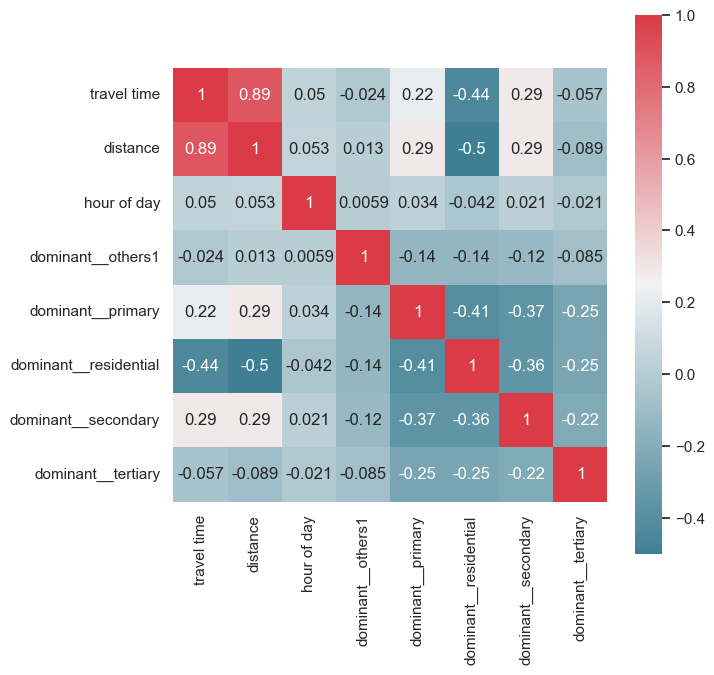

In [56]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df1.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [57]:
x = np.array(df1[['distance','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df1['travel time'])
x

array([[0.9924982 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.34431452, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.0187128 , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.35869106, 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.01601933, 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.74282641, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [56]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 6)
(3332, 6)


In [58]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
417/417 [==============================] - 1s 943us/step - loss: 550676.8125 - mape: 97.9959 - rmse: 742.0760 - val_loss: 511927.7812 - val_mape: 93.8583 - val_rmse: 715.4913
Epoch 2/500
417/417 [==============================] - 0s 822us/step - loss: 475505.5000 - mape: 85.5588 - rmse: 689.5691 - val_loss: 404545.6250 - val_mape: 74.7136 - val_rmse: 636.0390
Epoch 3/500
417/417 [==============================] - 0s 825us/step - loss: 351133.0938 - mape: 63.3508 - rmse: 592.5648 - val_loss: 277739.9375 - val_mape: 52.8345 - val_rmse: 527.0104
Epoch 4/500
417/417 [==============================] - 0s 803us/step - loss: 232779.8125 - mape: 46.2780 - rmse: 482.4726 - val_loss: 177532.8750 - val_mape: 42.2740 - val_rmse: 421.3465
Epoch 5/500
417/417 [==============================] - 0s 834us/step - loss: 151534.5625 - mape: 41.7507 - rmse: 389.2744 - val_loss: 119353.5859 - val_mape: 43.0032 - val_rmse: 345.4759
Epoch 6/500
417/417 [==============================] - 0s 794us/s

417/417 [==============================] - 0s 819us/step - loss: 30877.1777 - mape: 22.7876 - rmse: 175.7190 - val_loss: 29028.5430 - val_mape: 23.3833 - val_rmse: 170.3777
Epoch 46/500
417/417 [==============================] - 0s 792us/step - loss: 30850.0117 - mape: 22.8149 - rmse: 175.6417 - val_loss: 28986.5332 - val_mape: 23.1511 - val_rmse: 170.2543
Epoch 47/500
417/417 [==============================] - 0s 800us/step - loss: 30819.0781 - mape: 22.7346 - rmse: 175.5536 - val_loss: 28963.3574 - val_mape: 23.2412 - val_rmse: 170.1862
Epoch 48/500
417/417 [==============================] - 0s 798us/step - loss: 30805.2500 - mape: 22.7794 - rmse: 175.5143 - val_loss: 28933.6016 - val_mape: 23.0617 - val_rmse: 170.0988
Epoch 49/500
417/417 [==============================] - 0s 821us/step - loss: 30782.2227 - mape: 22.7492 - rmse: 175.4486 - val_loss: 28916.7539 - val_mape: 23.1374 - val_rmse: 170.0493
Epoch 50/500
417/417 [==============================] - 0s 837us/step - loss: 30774

Epoch 133/500
417/417 [==============================] - 0s 834us/step - loss: 30510.8945 - mape: 22.5512 - rmse: 174.6737 - val_loss: 28560.6426 - val_mape: 23.0946 - val_rmse: 168.9989
Epoch 134/500
417/417 [==============================] - 0s 804us/step - loss: 30513.0762 - mape: 22.5578 - rmse: 174.6799 - val_loss: 28567.1934 - val_mape: 23.0702 - val_rmse: 169.0183
Epoch 135/500
417/417 [==============================] - 0s 802us/step - loss: 30509.0918 - mape: 22.5492 - rmse: 174.6685 - val_loss: 28583.7070 - val_mape: 23.1737 - val_rmse: 169.0672
Epoch 136/500
417/417 [==============================] - 0s 842us/step - loss: 30509.5742 - mape: 22.6356 - rmse: 174.6699 - val_loss: 28580.5410 - val_mape: 23.1827 - val_rmse: 169.0578
Epoch 137/500
417/417 [==============================] - 0s 809us/step - loss: 30508.0586 - mape: 22.5652 - rmse: 174.6656 - val_loss: 28563.7871 - val_mape: 22.9957 - val_rmse: 169.0082
Epoch 138/500
417/417 [==============================] - 0s 823us

Epoch 177/500
417/417 [==============================] - 0s 848us/step - loss: 30489.0488 - mape: 22.6182 - rmse: 174.6111 - val_loss: 28544.4961 - val_mape: 22.8533 - val_rmse: 168.9512
Epoch 178/500
417/417 [==============================] - 0s 856us/step - loss: 30497.7891 - mape: 22.4582 - rmse: 174.6362 - val_loss: 28644.1348 - val_mape: 23.6745 - val_rmse: 169.2458
Epoch 179/500
417/417 [==============================] - 0s 830us/step - loss: 30501.8223 - mape: 22.6604 - rmse: 174.6477 - val_loss: 28565.4648 - val_mape: 23.2421 - val_rmse: 169.0132
Epoch 180/500
417/417 [==============================] - 0s 826us/step - loss: 30495.1523 - mape: 22.6054 - rmse: 174.6286 - val_loss: 28539.3262 - val_mape: 22.8508 - val_rmse: 168.9359
Epoch 181/500
417/417 [==============================] - 0s 849us/step - loss: 30495.0723 - mape: 22.5048 - rmse: 174.6284 - val_loss: 28584.5469 - val_mape: 23.3617 - val_rmse: 169.0697
Epoch 182/500
417/417 [==============================] - 0s 798us

Epoch 221/500
417/417 [==============================] - 0s 820us/step - loss: 30493.1836 - mape: 22.5449 - rmse: 174.6230 - val_loss: 28556.1914 - val_mape: 23.1485 - val_rmse: 168.9858
Epoch 222/500
417/417 [==============================] - 0s 828us/step - loss: 30488.5840 - mape: 22.5800 - rmse: 174.6098 - val_loss: 28560.1895 - val_mape: 23.2463 - val_rmse: 168.9976
Epoch 223/500
417/417 [==============================] - 0s 776us/step - loss: 30490.2090 - mape: 22.6169 - rmse: 174.6145 - val_loss: 28539.2363 - val_mape: 22.7059 - val_rmse: 168.9356
Epoch 224/500
417/417 [==============================] - 0s 808us/step - loss: 30486.8633 - mape: 22.5564 - rmse: 174.6049 - val_loss: 28534.1855 - val_mape: 22.8096 - val_rmse: 168.9207
Epoch 225/500
417/417 [==============================] - 0s 865us/step - loss: 30490.7012 - mape: 22.4859 - rmse: 174.6159 - val_loss: 28551.4355 - val_mape: 23.1467 - val_rmse: 168.9717
Epoch 226/500
417/417 [==============================] - 0s 835us

Epoch 265/500
417/417 [==============================] - 0s 816us/step - loss: 30495.2578 - mape: 22.5963 - rmse: 174.6289 - val_loss: 28562.2383 - val_mape: 23.1143 - val_rmse: 169.0037
Epoch 266/500
417/417 [==============================] - 0s 732us/step - loss: 30475.9043 - mape: 22.5215 - rmse: 174.5735 - val_loss: 28577.7676 - val_mape: 23.2683 - val_rmse: 169.0496
Epoch 267/500
417/417 [==============================] - 0s 796us/step - loss: 30484.4336 - mape: 22.5643 - rmse: 174.5979 - val_loss: 28542.2207 - val_mape: 23.0950 - val_rmse: 168.9444
Epoch 268/500
417/417 [==============================] - 0s 831us/step - loss: 30482.9395 - mape: 22.5589 - rmse: 174.5936 - val_loss: 28550.4102 - val_mape: 23.1154 - val_rmse: 168.9687
Epoch 269/500
417/417 [==============================] - 0s 838us/step - loss: 30481.3594 - mape: 22.5627 - rmse: 174.5891 - val_loss: 28585.6953 - val_mape: 23.3097 - val_rmse: 169.0730
Epoch 270/500
417/417 [==============================] - 0s 834us

Epoch 309/500
417/417 [==============================] - 0s 837us/step - loss: 30484.3887 - mape: 22.5533 - rmse: 174.5978 - val_loss: 28553.0547 - val_mape: 23.1822 - val_rmse: 168.9765
Epoch 310/500
417/417 [==============================] - 0s 816us/step - loss: 30464.0605 - mape: 22.5140 - rmse: 174.5396 - val_loss: 28643.8359 - val_mape: 23.6458 - val_rmse: 169.2449
Epoch 311/500
417/417 [==============================] - 0s 849us/step - loss: 30486.0586 - mape: 22.6038 - rmse: 174.6026 - val_loss: 28553.2559 - val_mape: 23.1618 - val_rmse: 168.9771
Epoch 312/500
417/417 [==============================] - 0s 817us/step - loss: 30482.5234 - mape: 22.6328 - rmse: 174.5925 - val_loss: 28574.2832 - val_mape: 23.1882 - val_rmse: 169.0393
Epoch 313/500
417/417 [==============================] - 0s 817us/step - loss: 30468.4668 - mape: 22.5805 - rmse: 174.5522 - val_loss: 28541.5742 - val_mape: 22.9844 - val_rmse: 168.9425
Epoch 314/500
417/417 [==============================] - 0s 835us

Epoch 353/500
417/417 [==============================] - 0s 803us/step - loss: 30475.5312 - mape: 22.6118 - rmse: 174.5724 - val_loss: 28536.7246 - val_mape: 22.8773 - val_rmse: 168.9282
Epoch 354/500
417/417 [==============================] - 0s 820us/step - loss: 30476.0020 - mape: 22.5363 - rmse: 174.5738 - val_loss: 28585.9805 - val_mape: 23.2635 - val_rmse: 169.0739
Epoch 355/500
417/417 [==============================] - 0s 803us/step - loss: 30475.6680 - mape: 22.5374 - rmse: 174.5728 - val_loss: 28566.1914 - val_mape: 23.2325 - val_rmse: 169.0154
Epoch 356/500
417/417 [==============================] - 0s 802us/step - loss: 30477.6133 - mape: 22.5580 - rmse: 174.5784 - val_loss: 28545.2559 - val_mape: 23.1153 - val_rmse: 168.9534
Epoch 357/500
417/417 [==============================] - 0s 821us/step - loss: 30481.5625 - mape: 22.5768 - rmse: 174.5897 - val_loss: 28559.0078 - val_mape: 23.2025 - val_rmse: 168.9941
Epoch 358/500
417/417 [==============================] - 0s 824us

Epoch 397/500
417/417 [==============================] - 0s 834us/step - loss: 30472.3262 - mape: 22.5400 - rmse: 174.5632 - val_loss: 28558.3965 - val_mape: 23.1865 - val_rmse: 168.9923
Epoch 398/500
417/417 [==============================] - 0s 837us/step - loss: 30473.6230 - mape: 22.5805 - rmse: 174.5670 - val_loss: 28565.7461 - val_mape: 23.1876 - val_rmse: 169.0140
Epoch 399/500
417/417 [==============================] - 0s 789us/step - loss: 30475.6582 - mape: 22.5459 - rmse: 174.5728 - val_loss: 28556.0117 - val_mape: 23.1474 - val_rmse: 168.9852
Epoch 400/500
417/417 [==============================] - 0s 876us/step - loss: 30471.8652 - mape: 22.6037 - rmse: 174.5619 - val_loss: 28538.2129 - val_mape: 22.6912 - val_rmse: 168.9326
Epoch 401/500
417/417 [==============================] - 0s 835us/step - loss: 30470.4375 - mape: 22.4578 - rmse: 174.5578 - val_loss: 28585.5039 - val_mape: 23.4170 - val_rmse: 169.0725
Epoch 402/500
417/417 [==============================] - 0s 860us

Epoch 441/500
417/417 [==============================] - 0s 835us/step - loss: 30473.4375 - mape: 22.5483 - rmse: 174.5664 - val_loss: 28553.1387 - val_mape: 23.1492 - val_rmse: 168.9767
Epoch 442/500
417/417 [==============================] - 0s 841us/step - loss: 30477.5176 - mape: 22.5509 - rmse: 174.5781 - val_loss: 28549.0586 - val_mape: 23.2070 - val_rmse: 168.9647
Epoch 443/500
417/417 [==============================] - 0s 840us/step - loss: 30473.8906 - mape: 22.5689 - rmse: 174.5677 - val_loss: 28543.6875 - val_mape: 23.0710 - val_rmse: 168.9488
Epoch 444/500
417/417 [==============================] - 0s 816us/step - loss: 30472.1602 - mape: 22.5918 - rmse: 174.5628 - val_loss: 28543.2188 - val_mape: 23.0517 - val_rmse: 168.9474
Epoch 445/500
417/417 [==============================] - 0s 805us/step - loss: 30479.0781 - mape: 22.5377 - rmse: 174.5826 - val_loss: 28556.5977 - val_mape: 23.1653 - val_rmse: 168.9870
Epoch 446/500
417/417 [==============================] - 0s 828us

Epoch 485/500
417/417 [==============================] - 0s 834us/step - loss: 30479.5918 - mape: 22.5215 - rmse: 174.5841 - val_loss: 28556.6348 - val_mape: 23.1608 - val_rmse: 168.9871
Epoch 486/500
417/417 [==============================] - 0s 823us/step - loss: 30475.2051 - mape: 22.5657 - rmse: 174.5715 - val_loss: 28571.5156 - val_mape: 23.3303 - val_rmse: 169.0311
Epoch 487/500
417/417 [==============================] - 0s 820us/step - loss: 30474.6973 - mape: 22.5654 - rmse: 174.5700 - val_loss: 28551.3066 - val_mape: 23.1701 - val_rmse: 168.9713
Epoch 488/500
417/417 [==============================] - 0s 870us/step - loss: 30456.2129 - mape: 22.5058 - rmse: 174.5171 - val_loss: 28670.1641 - val_mape: 23.6927 - val_rmse: 169.3227
Epoch 489/500
417/417 [==============================] - 0s 804us/step - loss: 30467.1465 - mape: 22.6732 - rmse: 174.5484 - val_loss: 28537.0488 - val_mape: 22.7108 - val_rmse: 168.9291
Epoch 490/500
417/417 [==============================] - 0s 847us

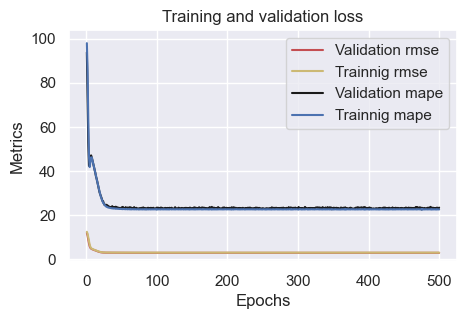

In [59]:
plotme(model3_1_1)


In [60]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 538516.2500 - mape: 96.0336 - rmse: 733.8367 - val_loss: 474545.0312 - val_mape: 87.4548 - val_rmse: 688.8723
Epoch 2/500
417/417 [==============================] - 0s 774us/step - loss: 402906.0938 - mape: 72.4870 - rmse: 634.7488 - val_loss: 303770.0000 - val_mape: 56.7855 - val_rmse: 551.1533
Epoch 3/500
417/417 [==============================] - 0s 758us/step - loss: 237078.4219 - mape: 47.1596 - rmse: 486.9070 - val_loss: 165340.9219 - val_mape: 41.8472 - val_rmse: 406.6213
Epoch 4/500
417/417 [==============================] - 0s 715us/step - loss: 134053.5625 - mape: 42.4760 - rmse: 366.1333 - val_loss: 102272.2422 - val_mape: 44.7736 - val_rmse: 319.8003
Epoch 5/500
417/417 [==============================] - 0s 747us/step - loss: 93771.9141 - mape: 45.7285 - rmse: 306.2220 - val_loss: 81390.6328 - val_mape: 47.0939 - val_rmse: 285.2904
Epoch 6/500
417/417 [==============================] - 0s 760us/step 

417/417 [==============================] - 0s 737us/step - loss: 30779.5098 - mape: 22.7043 - rmse: 175.4409 - val_loss: 28941.8008 - val_mape: 23.6706 - val_rmse: 170.1229
Epoch 46/500
417/417 [==============================] - 0s 709us/step - loss: 30758.6855 - mape: 22.7360 - rmse: 175.3815 - val_loss: 28891.0605 - val_mape: 23.3800 - val_rmse: 169.9737
Epoch 47/500
417/417 [==============================] - 0s 709us/step - loss: 30740.7363 - mape: 22.7562 - rmse: 175.3304 - val_loss: 28848.2793 - val_mape: 23.0276 - val_rmse: 169.8478
Epoch 48/500
417/417 [==============================] - 0s 716us/step - loss: 30722.7090 - mape: 22.6897 - rmse: 175.2789 - val_loss: 28830.0547 - val_mape: 22.9619 - val_rmse: 169.7942
Epoch 49/500
417/417 [==============================] - 0s 730us/step - loss: 30717.9805 - mape: 22.6668 - rmse: 175.2655 - val_loss: 28823.3223 - val_mape: 23.0551 - val_rmse: 169.7743
Epoch 50/500
417/417 [==============================] - 0s 750us/step - loss: 30699

Epoch 133/500
417/417 [==============================] - 0s 739us/step - loss: 30541.1504 - mape: 22.6210 - rmse: 174.7603 - val_loss: 28624.3535 - val_mape: 23.2015 - val_rmse: 169.1873
Epoch 134/500
417/417 [==============================] - 0s 695us/step - loss: 30537.4785 - mape: 22.5702 - rmse: 174.7498 - val_loss: 28601.0879 - val_mape: 23.1274 - val_rmse: 169.1186
Epoch 135/500
417/417 [==============================] - 0s 716us/step - loss: 30549.6484 - mape: 22.6557 - rmse: 174.7846 - val_loss: 28589.5898 - val_mape: 22.6649 - val_rmse: 169.0846
Epoch 136/500
417/417 [==============================] - 0s 722us/step - loss: 30547.5801 - mape: 22.5906 - rmse: 174.7787 - val_loss: 28588.3027 - val_mape: 22.8801 - val_rmse: 169.0808
Epoch 137/500
417/417 [==============================] - 0s 738us/step - loss: 30542.4297 - mape: 22.5432 - rmse: 174.7639 - val_loss: 28600.1582 - val_mape: 23.1773 - val_rmse: 169.1158
Epoch 138/500
417/417 [==============================] - 0s 738us

Epoch 177/500
417/417 [==============================] - 0s 736us/step - loss: 30515.0684 - mape: 22.6246 - rmse: 174.6856 - val_loss: 28565.5918 - val_mape: 22.8001 - val_rmse: 169.0136
Epoch 178/500
417/417 [==============================] - 0s 727us/step - loss: 30523.0898 - mape: 22.5509 - rmse: 174.7086 - val_loss: 28563.9160 - val_mape: 22.8136 - val_rmse: 169.0086
Epoch 179/500
417/417 [==============================] - 0s 746us/step - loss: 30521.8379 - mape: 22.5493 - rmse: 174.7050 - val_loss: 28571.4336 - val_mape: 23.1222 - val_rmse: 169.0309
Epoch 180/500
417/417 [==============================] - 0s 738us/step - loss: 30523.1406 - mape: 22.6380 - rmse: 174.7087 - val_loss: 28570.0234 - val_mape: 22.7980 - val_rmse: 169.0267
Epoch 181/500
417/417 [==============================] - 0s 724us/step - loss: 30522.6816 - mape: 22.5688 - rmse: 174.7074 - val_loss: 28569.6113 - val_mape: 22.8841 - val_rmse: 169.0255
Epoch 182/500
417/417 [==============================] - 0s 728us

Epoch 221/500
417/417 [==============================] - 0s 721us/step - loss: 30496.0723 - mape: 22.4352 - rmse: 174.6312 - val_loss: 28675.5176 - val_mape: 23.7750 - val_rmse: 169.3385
Epoch 222/500
417/417 [==============================] - 0s 768us/step - loss: 30506.7656 - mape: 22.6688 - rmse: 174.6619 - val_loss: 28565.7598 - val_mape: 23.1389 - val_rmse: 169.0141
Epoch 223/500
417/417 [==============================] - 0s 713us/step - loss: 30500.1875 - mape: 22.6348 - rmse: 174.6430 - val_loss: 28553.8887 - val_mape: 22.7599 - val_rmse: 168.9790
Epoch 224/500
417/417 [==============================] - 0s 737us/step - loss: 30500.9980 - mape: 22.4628 - rmse: 174.6454 - val_loss: 28571.1523 - val_mape: 23.2747 - val_rmse: 169.0300
Epoch 225/500
417/417 [==============================] - 0s 732us/step - loss: 30506.9434 - mape: 22.6239 - rmse: 174.6624 - val_loss: 28609.5605 - val_mape: 23.4193 - val_rmse: 169.1436
Epoch 226/500
417/417 [==============================] - 0s 716us

Epoch 265/500
417/417 [==============================] - 0s 725us/step - loss: 30498.3398 - mape: 22.5546 - rmse: 174.6377 - val_loss: 28545.3203 - val_mape: 22.9036 - val_rmse: 168.9536
Epoch 266/500
417/417 [==============================] - 0s 729us/step - loss: 30494.5527 - mape: 22.5483 - rmse: 174.6269 - val_loss: 28538.4785 - val_mape: 22.9289 - val_rmse: 168.9333
Epoch 267/500
417/417 [==============================] - 0s 718us/step - loss: 30496.5312 - mape: 22.5646 - rmse: 174.6326 - val_loss: 28544.1992 - val_mape: 23.0648 - val_rmse: 168.9503
Epoch 268/500
417/417 [==============================] - 0s 786us/step - loss: 30505.1074 - mape: 22.5668 - rmse: 174.6571 - val_loss: 28561.5117 - val_mape: 23.1064 - val_rmse: 169.0015
Epoch 269/500
417/417 [==============================] - 0s 744us/step - loss: 30506.2734 - mape: 22.5775 - rmse: 174.6604 - val_loss: 28552.6387 - val_mape: 23.1755 - val_rmse: 168.9753
Epoch 270/500
417/417 [==============================] - 0s 734us

Epoch 309/500
417/417 [==============================] - 0s 708us/step - loss: 30490.3906 - mape: 22.6425 - rmse: 174.6150 - val_loss: 28550.6152 - val_mape: 22.5930 - val_rmse: 168.9693
Epoch 310/500
417/417 [==============================] - 0s 771us/step - loss: 30490.2324 - mape: 22.4968 - rmse: 174.6145 - val_loss: 28537.7285 - val_mape: 22.8944 - val_rmse: 168.9311
Epoch 311/500
417/417 [==============================] - 0s 731us/step - loss: 30479.5586 - mape: 22.6125 - rmse: 174.5840 - val_loss: 28528.5195 - val_mape: 22.8141 - val_rmse: 168.9039
Epoch 312/500
417/417 [==============================] - 0s 739us/step - loss: 30484.0664 - mape: 22.5572 - rmse: 174.5969 - val_loss: 28546.5215 - val_mape: 22.9557 - val_rmse: 168.9572
Epoch 313/500
417/417 [==============================] - 0s 733us/step - loss: 30501.5801 - mape: 22.5529 - rmse: 174.6470 - val_loss: 28549.9648 - val_mape: 23.0767 - val_rmse: 168.9673
Epoch 314/500
417/417 [==============================] - 0s 761us

Epoch 353/500
417/417 [==============================] - 0s 696us/step - loss: 30495.0918 - mape: 22.5156 - rmse: 174.6284 - val_loss: 28556.7363 - val_mape: 23.0818 - val_rmse: 168.9874
Epoch 354/500
417/417 [==============================] - 0s 735us/step - loss: 30489.3730 - mape: 22.6180 - rmse: 174.6121 - val_loss: 28550.8496 - val_mape: 23.0199 - val_rmse: 168.9700
Epoch 355/500
417/417 [==============================] - 0s 756us/step - loss: 30486.0352 - mape: 22.5739 - rmse: 174.6025 - val_loss: 28556.1699 - val_mape: 23.1295 - val_rmse: 168.9857
Epoch 356/500
417/417 [==============================] - 0s 704us/step - loss: 30477.7598 - mape: 22.5369 - rmse: 174.5788 - val_loss: 28579.1484 - val_mape: 23.2655 - val_rmse: 169.0537
Epoch 357/500
417/417 [==============================] - 0s 731us/step - loss: 30485.2637 - mape: 22.5787 - rmse: 174.6003 - val_loss: 28548.7500 - val_mape: 23.1743 - val_rmse: 168.9638
Epoch 358/500
417/417 [==============================] - 0s 743us

Epoch 397/500
417/417 [==============================] - 0s 734us/step - loss: 30475.6113 - mape: 22.4816 - rmse: 174.5726 - val_loss: 28654.0918 - val_mape: 23.7072 - val_rmse: 169.2752
Epoch 398/500
417/417 [==============================] - 0s 753us/step - loss: 30478.3398 - mape: 22.6363 - rmse: 174.5805 - val_loss: 28535.7480 - val_mape: 23.0113 - val_rmse: 168.9253
Epoch 399/500
417/417 [==============================] - 0s 728us/step - loss: 30483.8027 - mape: 22.5350 - rmse: 174.5961 - val_loss: 28546.6055 - val_mape: 23.0926 - val_rmse: 168.9574
Epoch 400/500
417/417 [==============================] - 0s 758us/step - loss: 30491.9258 - mape: 22.5642 - rmse: 174.6194 - val_loss: 28535.5215 - val_mape: 22.9573 - val_rmse: 168.9246
Epoch 401/500
417/417 [==============================] - 0s 725us/step - loss: 30484.2559 - mape: 22.5792 - rmse: 174.5974 - val_loss: 28551.4414 - val_mape: 23.0240 - val_rmse: 168.9717
Epoch 402/500
417/417 [==============================] - 0s 767us

Epoch 441/500
417/417 [==============================] - 0s 731us/step - loss: 30480.8750 - mape: 22.5951 - rmse: 174.5877 - val_loss: 28536.5352 - val_mape: 22.7365 - val_rmse: 168.9276
Epoch 442/500
417/417 [==============================] - 0s 746us/step - loss: 30476.8809 - mape: 22.5430 - rmse: 174.5763 - val_loss: 28538.4062 - val_mape: 22.7470 - val_rmse: 168.9331
Epoch 443/500
417/417 [==============================] - 0s 727us/step - loss: 30478.8984 - mape: 22.4971 - rmse: 174.5821 - val_loss: 28584.1270 - val_mape: 23.3449 - val_rmse: 169.0684
Epoch 444/500
417/417 [==============================] - 0s 730us/step - loss: 30483.5137 - mape: 22.6450 - rmse: 174.5953 - val_loss: 28564.9707 - val_mape: 23.1718 - val_rmse: 169.0117
Epoch 445/500
417/417 [==============================] - 0s 731us/step - loss: 30484.5430 - mape: 22.4720 - rmse: 174.5982 - val_loss: 28607.8848 - val_mape: 23.5536 - val_rmse: 169.1387
Epoch 446/500
417/417 [==============================] - 0s 729us

Epoch 485/500
417/417 [==============================] - 0s 751us/step - loss: 30470.6660 - mape: 22.5536 - rmse: 174.5585 - val_loss: 28562.9004 - val_mape: 23.1597 - val_rmse: 169.0056
Epoch 486/500
417/417 [==============================] - 0s 725us/step - loss: 30467.6504 - mape: 22.5051 - rmse: 174.5499 - val_loss: 28567.1484 - val_mape: 23.2804 - val_rmse: 169.0182
Epoch 487/500
417/417 [==============================] - 0s 744us/step - loss: 30468.5488 - mape: 22.4961 - rmse: 174.5524 - val_loss: 28644.8457 - val_mape: 23.7018 - val_rmse: 169.2479
Epoch 488/500
417/417 [==============================] - 0s 707us/step - loss: 30483.3027 - mape: 22.6548 - rmse: 174.5947 - val_loss: 28542.4473 - val_mape: 23.0411 - val_rmse: 168.9451
Epoch 489/500
417/417 [==============================] - 0s 735us/step - loss: 30475.3125 - mape: 22.5367 - rmse: 174.5718 - val_loss: 28540.1797 - val_mape: 22.8091 - val_rmse: 168.9384
Epoch 490/500
417/417 [==============================] - 0s 737us

In [61]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
417/417 [==============================] - 1s 892us/step - loss: 514624.4375 - mape: 91.8006 - rmse: 717.3733 - val_loss: 405853.4688 - val_mape: 74.8624 - val_rmse: 637.0663
Epoch 2/500
417/417 [==============================] - 0s 754us/step - loss: 289166.2812 - mape: 54.8731 - rmse: 537.7418 - val_loss: 171862.1719 - val_mape: 42.0769 - val_rmse: 414.5626
Epoch 3/500
417/417 [==============================] - 0s 762us/step - loss: 126101.0391 - mape: 43.2815 - rmse: 355.1071 - val_loss: 90762.3594 - val_mape: 46.6112 - val_rmse: 301.2679
Epoch 4/500
417/417 [==============================] - 0s 786us/step - loss: 84202.1250 - mape: 46.6990 - rmse: 290.1760 - val_loss: 74910.0000 - val_mape: 47.3015 - val_rmse: 273.6969
Epoch 5/500
417/417 [==============================] - 0s 747us/step - loss: 73166.5547 - mape: 45.0175 - rmse: 270.4932 - val_loss: 67532.9688 - val_mape: 43.9788 - val_rmse: 259.8711
Epoch 6/500
417/417 [==============================] - 0s 774us/step -

417/417 [==============================] - 0s 758us/step - loss: 30604.7598 - mape: 22.5747 - rmse: 174.9422 - val_loss: 28689.2148 - val_mape: 23.3335 - val_rmse: 169.3789
Epoch 46/500
417/417 [==============================] - 0s 762us/step - loss: 30599.8789 - mape: 22.6052 - rmse: 174.9282 - val_loss: 28656.6074 - val_mape: 23.1420 - val_rmse: 169.2826
Epoch 47/500
417/417 [==============================] - 0s 787us/step - loss: 30598.3848 - mape: 22.5862 - rmse: 174.9239 - val_loss: 28730.0547 - val_mape: 23.6213 - val_rmse: 169.4994
Epoch 48/500
417/417 [==============================] - 0s 750us/step - loss: 30581.8496 - mape: 22.6010 - rmse: 174.8767 - val_loss: 28709.1758 - val_mape: 23.4056 - val_rmse: 169.4378
Epoch 49/500
417/417 [==============================] - 0s 746us/step - loss: 30589.1035 - mape: 22.6213 - rmse: 174.8974 - val_loss: 28638.0918 - val_mape: 22.8773 - val_rmse: 169.2279
Epoch 50/500
417/417 [==============================] - 0s 777us/step - loss: 30578

Epoch 133/500
417/417 [==============================] - 0s 747us/step - loss: 30509.4062 - mape: 22.5548 - rmse: 174.6694 - val_loss: 28564.1387 - val_mape: 22.9856 - val_rmse: 169.0093
Epoch 134/500
417/417 [==============================] - 0s 759us/step - loss: 30496.6465 - mape: 22.5208 - rmse: 174.6329 - val_loss: 28627.4590 - val_mape: 23.6006 - val_rmse: 169.1965
Epoch 135/500
417/417 [==============================] - 0s 754us/step - loss: 30512.9492 - mape: 22.6052 - rmse: 174.6796 - val_loss: 28566.6680 - val_mape: 23.3239 - val_rmse: 169.0168
Epoch 136/500
417/417 [==============================] - 0s 770us/step - loss: 30512.9707 - mape: 22.6642 - rmse: 174.6796 - val_loss: 28560.7812 - val_mape: 22.6233 - val_rmse: 168.9994
Epoch 137/500
417/417 [==============================] - 0s 757us/step - loss: 30510.8262 - mape: 22.5479 - rmse: 174.6735 - val_loss: 28587.4863 - val_mape: 23.2921 - val_rmse: 169.0783
Epoch 138/500
417/417 [==============================] - 0s 776us

Epoch 177/500
417/417 [==============================] - 0s 727us/step - loss: 30521.3066 - mape: 22.6137 - rmse: 174.7035 - val_loss: 28541.4023 - val_mape: 22.9648 - val_rmse: 168.9420
Epoch 178/500
417/417 [==============================] - 0s 717us/step - loss: 30494.1602 - mape: 22.5780 - rmse: 174.6258 - val_loss: 28536.0762 - val_mape: 22.8858 - val_rmse: 168.9262
Epoch 179/500
417/417 [==============================] - 0s 769us/step - loss: 30508.6699 - mape: 22.5380 - rmse: 174.6673 - val_loss: 28552.4941 - val_mape: 23.0898 - val_rmse: 168.9748
Epoch 180/500
417/417 [==============================] - 0s 756us/step - loss: 30501.7793 - mape: 22.6289 - rmse: 174.6476 - val_loss: 28585.0371 - val_mape: 23.1674 - val_rmse: 169.0711
Epoch 181/500
417/417 [==============================] - 0s 765us/step - loss: 30484.7969 - mape: 22.5476 - rmse: 174.5990 - val_loss: 28631.5352 - val_mape: 23.4919 - val_rmse: 169.2086
Epoch 182/500
417/417 [==============================] - 0s 729us

Epoch 221/500
417/417 [==============================] - 0s 760us/step - loss: 30480.8496 - mape: 22.5092 - rmse: 174.5877 - val_loss: 28575.2910 - val_mape: 23.3011 - val_rmse: 169.0423
Epoch 222/500
417/417 [==============================] - 0s 760us/step - loss: 30495.1836 - mape: 22.6275 - rmse: 174.6287 - val_loss: 28571.1758 - val_mape: 23.2144 - val_rmse: 169.0301
Epoch 223/500
417/417 [==============================] - 0s 761us/step - loss: 30500.6738 - mape: 22.6280 - rmse: 174.6444 - val_loss: 28534.9707 - val_mape: 22.8904 - val_rmse: 168.9230
Epoch 224/500
417/417 [==============================] - 0s 728us/step - loss: 30490.6719 - mape: 22.5052 - rmse: 174.6158 - val_loss: 28603.7500 - val_mape: 23.6532 - val_rmse: 169.1264
Epoch 225/500
417/417 [==============================] - 0s 781us/step - loss: 30488.3945 - mape: 22.5532 - rmse: 174.6093 - val_loss: 28573.2734 - val_mape: 23.4068 - val_rmse: 169.0363
Epoch 226/500
417/417 [==============================] - 0s 751us

Epoch 265/500
417/417 [==============================] - 0s 752us/step - loss: 30483.9883 - mape: 22.5514 - rmse: 174.5966 - val_loss: 28573.1582 - val_mape: 23.3288 - val_rmse: 169.0360
Epoch 266/500
417/417 [==============================] - 0s 735us/step - loss: 30480.6191 - mape: 22.5343 - rmse: 174.5870 - val_loss: 28536.6680 - val_mape: 23.0343 - val_rmse: 168.9280
Epoch 267/500
417/417 [==============================] - 0s 774us/step - loss: 30487.3242 - mape: 22.5835 - rmse: 174.6062 - val_loss: 28577.8887 - val_mape: 23.3516 - val_rmse: 169.0500
Epoch 268/500
417/417 [==============================] - 0s 764us/step - loss: 30491.9043 - mape: 22.6307 - rmse: 174.6193 - val_loss: 28535.7207 - val_mape: 22.9588 - val_rmse: 168.9252
Epoch 269/500
417/417 [==============================] - 0s 722us/step - loss: 30488.3301 - mape: 22.5429 - rmse: 174.6091 - val_loss: 28555.7910 - val_mape: 23.1517 - val_rmse: 168.9846
Epoch 270/500
417/417 [==============================] - 0s 752us

Epoch 309/500
417/417 [==============================] - 0s 757us/step - loss: 30472.0430 - mape: 22.5857 - rmse: 174.5624 - val_loss: 28562.1152 - val_mape: 23.2242 - val_rmse: 169.0033
Epoch 310/500
417/417 [==============================] - 0s 740us/step - loss: 30469.3652 - mape: 22.5722 - rmse: 174.5548 - val_loss: 28561.3887 - val_mape: 23.2612 - val_rmse: 169.0011
Epoch 311/500
417/417 [==============================] - 0s 752us/step - loss: 30468.7949 - mape: 22.5699 - rmse: 174.5531 - val_loss: 28553.8711 - val_mape: 23.0891 - val_rmse: 168.9789
Epoch 312/500
417/417 [==============================] - 0s 748us/step - loss: 30481.1641 - mape: 22.5367 - rmse: 174.5886 - val_loss: 28563.7793 - val_mape: 23.2297 - val_rmse: 169.0082
Epoch 313/500
417/417 [==============================] - 0s 726us/step - loss: 30481.3086 - mape: 22.5845 - rmse: 174.5890 - val_loss: 28569.1758 - val_mape: 23.2176 - val_rmse: 169.0242
Epoch 314/500
417/417 [==============================] - 0s 762us

Epoch 353/500
417/417 [==============================] - 0s 728us/step - loss: 30484.7305 - mape: 22.6292 - rmse: 174.5988 - val_loss: 28559.1230 - val_mape: 23.0714 - val_rmse: 168.9944
Epoch 354/500
417/417 [==============================] - 0s 767us/step - loss: 30477.2266 - mape: 22.5406 - rmse: 174.5773 - val_loss: 28564.4473 - val_mape: 23.0923 - val_rmse: 169.0102
Epoch 355/500
417/417 [==============================] - 0s 747us/step - loss: 30477.6992 - mape: 22.5266 - rmse: 174.5786 - val_loss: 28555.8770 - val_mape: 23.2106 - val_rmse: 168.9848
Epoch 356/500
417/417 [==============================] - 0s 768us/step - loss: 30474.7754 - mape: 22.5699 - rmse: 174.5703 - val_loss: 28537.3184 - val_mape: 22.7906 - val_rmse: 168.9299
Epoch 357/500
417/417 [==============================] - 0s 758us/step - loss: 30483.5488 - mape: 22.5040 - rmse: 174.5954 - val_loss: 28570.7363 - val_mape: 23.4016 - val_rmse: 169.0288
Epoch 358/500
417/417 [==============================] - 0s 757us

Epoch 397/500
417/417 [==============================] - 0s 743us/step - loss: 30469.0723 - mape: 22.5202 - rmse: 174.5539 - val_loss: 28540.1582 - val_mape: 22.9109 - val_rmse: 168.9383
Epoch 398/500
417/417 [==============================] - 0s 815us/step - loss: 30482.1230 - mape: 22.5464 - rmse: 174.5913 - val_loss: 28554.0547 - val_mape: 23.1830 - val_rmse: 168.9794
Epoch 399/500
417/417 [==============================] - 0s 769us/step - loss: 30473.6836 - mape: 22.6066 - rmse: 174.5671 - val_loss: 28548.9609 - val_mape: 23.0756 - val_rmse: 168.9644
Epoch 400/500
417/417 [==============================] - 0s 758us/step - loss: 30481.3691 - mape: 22.5810 - rmse: 174.5891 - val_loss: 28542.6934 - val_mape: 22.9597 - val_rmse: 168.9458
Epoch 401/500
417/417 [==============================] - 0s 789us/step - loss: 30482.1777 - mape: 22.5719 - rmse: 174.5915 - val_loss: 28539.1699 - val_mape: 22.9102 - val_rmse: 168.9354
Epoch 402/500
417/417 [==============================] - 0s 730us

Epoch 441/500
417/417 [==============================] - 0s 759us/step - loss: 30465.2383 - mape: 22.5846 - rmse: 174.5429 - val_loss: 28546.1914 - val_mape: 22.8285 - val_rmse: 168.9562
Epoch 442/500
417/417 [==============================] - 0s 772us/step - loss: 30466.0078 - mape: 22.5641 - rmse: 174.5452 - val_loss: 28533.1875 - val_mape: 22.6980 - val_rmse: 168.9177
Epoch 443/500
417/417 [==============================] - 0s 755us/step - loss: 30492.7852 - mape: 22.4668 - rmse: 174.6218 - val_loss: 28560.4531 - val_mape: 23.2709 - val_rmse: 168.9984
Epoch 444/500
417/417 [==============================] - 0s 776us/step - loss: 30474.8730 - mape: 22.6274 - rmse: 174.5705 - val_loss: 28549.1641 - val_mape: 22.5654 - val_rmse: 168.9650
Epoch 445/500
417/417 [==============================] - 0s 751us/step - loss: 30471.0332 - mape: 22.5483 - rmse: 174.5595 - val_loss: 28535.1797 - val_mape: 23.0120 - val_rmse: 168.9236
Epoch 446/500
417/417 [==============================] - 0s 754us

Epoch 485/500
417/417 [==============================] - 0s 744us/step - loss: 30475.9707 - mape: 22.6100 - rmse: 174.5737 - val_loss: 28531.8984 - val_mape: 22.8780 - val_rmse: 168.9139
Epoch 486/500
417/417 [==============================] - 0s 773us/step - loss: 30467.9980 - mape: 22.5564 - rmse: 174.5508 - val_loss: 28546.0508 - val_mape: 22.6825 - val_rmse: 168.9558
Epoch 487/500
417/417 [==============================] - 0s 758us/step - loss: 30475.2695 - mape: 22.5605 - rmse: 174.5717 - val_loss: 28613.7109 - val_mape: 23.4513 - val_rmse: 169.1559
Epoch 488/500
417/417 [==============================] - 0s 749us/step - loss: 30471.7930 - mape: 22.5127 - rmse: 174.5617 - val_loss: 28609.5703 - val_mape: 23.4700 - val_rmse: 169.1436
Epoch 489/500
417/417 [==============================] - 0s 757us/step - loss: 30483.1621 - mape: 22.5827 - rmse: 174.5943 - val_loss: 28560.3320 - val_mape: 23.2128 - val_rmse: 168.9980
Epoch 490/500
417/417 [==============================] - 0s 741us

In [62]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
417/417 [==============================] - 1s 909us/step - loss: 305702.7188 - mape: 68.1030 - rmse: 552.9039 - val_loss: 77136.2656 - val_mape: 50.3571 - val_rmse: 277.7342
Epoch 2/500
417/417 [==============================] - 0s 763us/step - loss: 68927.6172 - mape: 44.5814 - rmse: 262.5407 - val_loss: 59157.4062 - val_mape: 42.4218 - val_rmse: 243.2230
Epoch 3/500
417/417 [==============================] - 0s 823us/step - loss: 52737.9180 - mape: 37.8088 - rmse: 229.6474 - val_loss: 43799.9180 - val_mape: 34.4938 - val_rmse: 209.2843
Epoch 4/500
417/417 [==============================] - 0s 774us/step - loss: 39349.0195 - mape: 30.8854 - rmse: 198.3659 - val_loss: 33229.1289 - val_mape: 28.3140 - val_rmse: 182.2886
Epoch 5/500
417/417 [==============================] - 0s 786us/step - loss: 32857.3164 - mape: 25.8114 - rmse: 181.2659 - val_loss: 30070.5664 - val_mape: 24.9212 - val_rmse: 173.4087
Epoch 6/500
417/417 [==============================] - 0s 759us/step - los

417/417 [==============================] - 0s 816us/step - loss: 30653.0684 - mape: 22.6844 - rmse: 175.0802 - val_loss: 28494.5469 - val_mape: 23.2212 - val_rmse: 168.8033
Epoch 90/500
417/417 [==============================] - 0s 766us/step - loss: 30653.2715 - mape: 22.7574 - rmse: 175.0807 - val_loss: 28455.2266 - val_mape: 22.7904 - val_rmse: 168.6868
Epoch 91/500
417/417 [==============================] - 0s 808us/step - loss: 30616.6348 - mape: 22.6180 - rmse: 174.9761 - val_loss: 28528.3984 - val_mape: 22.6062 - val_rmse: 168.9035
Epoch 92/500
417/417 [==============================] - 0s 807us/step - loss: 30630.8984 - mape: 22.6755 - rmse: 175.0168 - val_loss: 28460.9414 - val_mape: 23.0642 - val_rmse: 168.7037
Epoch 93/500
417/417 [==============================] - 0s 826us/step - loss: 30625.8027 - mape: 22.7440 - rmse: 175.0023 - val_loss: 28481.1191 - val_mape: 23.0746 - val_rmse: 168.7635
Epoch 94/500
417/417 [==============================] - 0s 775us/step - loss: 30577

Epoch 133/500
417/417 [==============================] - 0s 762us/step - loss: 30653.5645 - mape: 22.7114 - rmse: 175.0816 - val_loss: 28605.1660 - val_mape: 23.7197 - val_rmse: 169.1306
Epoch 134/500
417/417 [==============================] - 0s 822us/step - loss: 30650.8203 - mape: 22.6541 - rmse: 175.0738 - val_loss: 28565.8574 - val_mape: 23.7136 - val_rmse: 169.0144
Epoch 135/500
417/417 [==============================] - 0s 791us/step - loss: 30669.0312 - mape: 22.6939 - rmse: 175.1258 - val_loss: 28606.5117 - val_mape: 22.7449 - val_rmse: 169.1346
Epoch 136/500
417/417 [==============================] - 0s 790us/step - loss: 30662.1777 - mape: 22.7308 - rmse: 175.1062 - val_loss: 28463.1973 - val_mape: 22.7009 - val_rmse: 168.7104
Epoch 137/500
417/417 [==============================] - 0s 798us/step - loss: 30616.0645 - mape: 22.7280 - rmse: 174.9745 - val_loss: 28491.5391 - val_mape: 22.9656 - val_rmse: 168.7944
Epoch 138/500
417/417 [==============================] - 0s 782us

Epoch 177/500
417/417 [==============================] - 0s 842us/step - loss: 30721.9590 - mape: 22.7315 - rmse: 175.2768 - val_loss: 28538.2070 - val_mape: 23.7380 - val_rmse: 168.9326
Epoch 178/500
417/417 [==============================] - 0s 831us/step - loss: 30614.1289 - mape: 22.7266 - rmse: 174.9689 - val_loss: 28518.7891 - val_mape: 22.8447 - val_rmse: 168.8751
Epoch 179/500
417/417 [==============================] - 0s 798us/step - loss: 30628.3926 - mape: 22.7283 - rmse: 175.0097 - val_loss: 28594.0137 - val_mape: 22.7794 - val_rmse: 169.0976
Epoch 180/500
417/417 [==============================] - 0s 802us/step - loss: 30628.3418 - mape: 22.7023 - rmse: 175.0096 - val_loss: 28481.1016 - val_mape: 22.5373 - val_rmse: 168.7634
Epoch 181/500
417/417 [==============================] - 0s 810us/step - loss: 30653.3770 - mape: 22.6843 - rmse: 175.0811 - val_loss: 28615.3945 - val_mape: 23.6457 - val_rmse: 169.1609
Epoch 182/500
417/417 [==============================] - 0s 823us

Epoch 221/500
417/417 [==============================] - 0s 816us/step - loss: 30661.8848 - mape: 22.7315 - rmse: 175.1053 - val_loss: 28440.3809 - val_mape: 22.9264 - val_rmse: 168.6428
Epoch 222/500
417/417 [==============================] - 0s 778us/step - loss: 30630.5176 - mape: 22.6792 - rmse: 175.0158 - val_loss: 28480.1816 - val_mape: 23.0248 - val_rmse: 168.7607
Epoch 223/500
417/417 [==============================] - 0s 773us/step - loss: 30644.2402 - mape: 22.6683 - rmse: 175.0550 - val_loss: 28488.1055 - val_mape: 23.4177 - val_rmse: 168.7842
Epoch 224/500
417/417 [==============================] - 0s 799us/step - loss: 30609.6562 - mape: 22.7477 - rmse: 174.9562 - val_loss: 28557.6348 - val_mape: 23.1311 - val_rmse: 168.9900
Epoch 225/500
417/417 [==============================] - 0s 797us/step - loss: 30614.9883 - mape: 22.6758 - rmse: 174.9714 - val_loss: 28703.3320 - val_mape: 23.8552 - val_rmse: 169.4206
Epoch 226/500
417/417 [==============================] - 0s 779us

Epoch 265/500
417/417 [==============================] - 0s 800us/step - loss: 30625.0859 - mape: 22.6057 - rmse: 175.0002 - val_loss: 28621.5566 - val_mape: 23.6996 - val_rmse: 169.1791
Epoch 266/500
417/417 [==============================] - 0s 786us/step - loss: 30640.0605 - mape: 22.7438 - rmse: 175.0430 - val_loss: 28534.7949 - val_mape: 23.3513 - val_rmse: 168.9225
Epoch 267/500
417/417 [==============================] - 0s 778us/step - loss: 30606.4316 - mape: 22.6684 - rmse: 174.9469 - val_loss: 28606.4570 - val_mape: 22.2129 - val_rmse: 169.1344
Epoch 268/500
417/417 [==============================] - 0s 826us/step - loss: 30580.1777 - mape: 22.6645 - rmse: 174.8719 - val_loss: 28617.4199 - val_mape: 23.9155 - val_rmse: 169.1668
Epoch 269/500
417/417 [==============================] - 0s 795us/step - loss: 30636.2520 - mape: 22.7303 - rmse: 175.0322 - val_loss: 28487.3086 - val_mape: 22.9274 - val_rmse: 168.7818
Epoch 270/500
417/417 [==============================] - 0s 797us

Epoch 309/500
417/417 [==============================] - 0s 820us/step - loss: 30633.6152 - mape: 22.6521 - rmse: 175.0246 - val_loss: 28476.3496 - val_mape: 23.3900 - val_rmse: 168.7494
Epoch 310/500
417/417 [==============================] - 0s 783us/step - loss: 30639.4492 - mape: 22.7473 - rmse: 175.0413 - val_loss: 28654.0840 - val_mape: 22.1237 - val_rmse: 169.2752
Epoch 311/500
417/417 [==============================] - 0s 769us/step - loss: 30648.5840 - mape: 22.7106 - rmse: 175.0674 - val_loss: 28484.3457 - val_mape: 22.5095 - val_rmse: 168.7731
Epoch 312/500
417/417 [==============================] - 0s 789us/step - loss: 30625.1328 - mape: 22.6269 - rmse: 175.0004 - val_loss: 28473.8750 - val_mape: 22.8852 - val_rmse: 168.7420
Epoch 313/500
417/417 [==============================] - 0s 782us/step - loss: 30650.7285 - mape: 22.7322 - rmse: 175.0735 - val_loss: 28532.1953 - val_mape: 22.4668 - val_rmse: 168.9148
Epoch 314/500
417/417 [==============================] - 0s 829us

Epoch 353/500
417/417 [==============================] - 0s 762us/step - loss: 30589.7910 - mape: 22.7111 - rmse: 174.8994 - val_loss: 28581.4805 - val_mape: 23.3477 - val_rmse: 169.0606
Epoch 354/500
417/417 [==============================] - 0s 807us/step - loss: 30672.6699 - mape: 22.6063 - rmse: 175.1362 - val_loss: 28540.8730 - val_mape: 23.4503 - val_rmse: 168.9404
Epoch 355/500
417/417 [==============================] - 0s 825us/step - loss: 30639.6133 - mape: 22.6399 - rmse: 175.0417 - val_loss: 28489.2754 - val_mape: 23.4668 - val_rmse: 168.7877
Epoch 356/500
417/417 [==============================] - 0s 796us/step - loss: 30618.6406 - mape: 22.7826 - rmse: 174.9818 - val_loss: 28448.6660 - val_mape: 22.8699 - val_rmse: 168.6673
Epoch 357/500
417/417 [==============================] - 0s 789us/step - loss: 30604.9316 - mape: 22.6895 - rmse: 174.9427 - val_loss: 28533.7422 - val_mape: 23.3488 - val_rmse: 168.9193
Epoch 358/500
417/417 [==============================] - 0s 769us

Epoch 397/500
417/417 [==============================] - 0s 784us/step - loss: 30675.6719 - mape: 22.6611 - rmse: 175.1447 - val_loss: 28926.7188 - val_mape: 24.7245 - val_rmse: 170.0786
Epoch 398/500
417/417 [==============================] - 0s 808us/step - loss: 30671.4941 - mape: 22.7655 - rmse: 175.1328 - val_loss: 28496.1367 - val_mape: 23.2552 - val_rmse: 168.8080
Epoch 399/500
417/417 [==============================] - 0s 791us/step - loss: 30615.9434 - mape: 22.6445 - rmse: 174.9741 - val_loss: 28465.0820 - val_mape: 23.0079 - val_rmse: 168.7160
Epoch 400/500
417/417 [==============================] - 0s 797us/step - loss: 30629.4414 - mape: 22.6604 - rmse: 175.0127 - val_loss: 28669.8320 - val_mape: 23.6485 - val_rmse: 169.3217
Epoch 401/500
417/417 [==============================] - 0s 801us/step - loss: 30625.4043 - mape: 22.6867 - rmse: 175.0012 - val_loss: 28467.6660 - val_mape: 23.1769 - val_rmse: 168.7236
Epoch 402/500
417/417 [==============================] - 0s 823us

Epoch 441/500
417/417 [==============================] - 0s 815us/step - loss: 30662.3203 - mape: 22.6809 - rmse: 175.1066 - val_loss: 28498.2754 - val_mape: 22.5952 - val_rmse: 168.8143
Epoch 442/500
417/417 [==============================] - 0s 793us/step - loss: 30607.3809 - mape: 22.6652 - rmse: 174.9496 - val_loss: 28458.6309 - val_mape: 23.0595 - val_rmse: 168.6969
Epoch 443/500
417/417 [==============================] - 0s 850us/step - loss: 30632.4160 - mape: 22.7053 - rmse: 175.0212 - val_loss: 28505.6621 - val_mape: 23.3099 - val_rmse: 168.8362
Epoch 444/500
417/417 [==============================] - 0s 765us/step - loss: 30667.6191 - mape: 22.7115 - rmse: 175.1217 - val_loss: 28471.3379 - val_mape: 22.6419 - val_rmse: 168.7345
Epoch 445/500
417/417 [==============================] - 0s 873us/step - loss: 30617.2949 - mape: 22.6295 - rmse: 174.9780 - val_loss: 28551.0977 - val_mape: 23.6246 - val_rmse: 168.9707
Epoch 446/500
417/417 [==============================] - 0s 809us

Epoch 485/500
417/417 [==============================] - 0s 796us/step - loss: 30627.0410 - mape: 22.6208 - rmse: 175.0058 - val_loss: 28530.8379 - val_mape: 22.5587 - val_rmse: 168.9107
Epoch 486/500
417/417 [==============================] - 0s 792us/step - loss: 30624.5957 - mape: 22.7975 - rmse: 174.9988 - val_loss: 28590.4395 - val_mape: 23.2048 - val_rmse: 169.0871
Epoch 487/500
417/417 [==============================] - 0s 839us/step - loss: 30615.6055 - mape: 22.6489 - rmse: 174.9732 - val_loss: 28493.7812 - val_mape: 23.1522 - val_rmse: 168.8010
Epoch 488/500
417/417 [==============================] - 0s 771us/step - loss: 30625.7305 - mape: 22.7739 - rmse: 175.0021 - val_loss: 28522.3047 - val_mape: 22.1552 - val_rmse: 168.8855
Epoch 489/500
417/417 [==============================] - 0s 833us/step - loss: 30628.7676 - mape: 22.6757 - rmse: 175.0108 - val_loss: 28482.7754 - val_mape: 23.1254 - val_rmse: 168.7684
Epoch 490/500
417/417 [==============================] - 0s 777us

In [63]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 231332.1562 - mape: 61.4218 - rmse: 480.9700 - val_loss: 65197.0508 - val_mape: 44.1304 - val_rmse: 255.3371
Epoch 2/500
417/417 [==============================] - 0s 911us/step - loss: 55066.2266 - mape: 38.7277 - rmse: 234.6619 - val_loss: 42162.4648 - val_mape: 34.0443 - val_rmse: 205.3350
Epoch 3/500
417/417 [==============================] - 0s 888us/step - loss: 36507.8203 - mape: 28.8489 - rmse: 191.0702 - val_loss: 30764.4180 - val_mape: 25.7405 - val_rmse: 175.3979
Epoch 4/500
417/417 [==============================] - 0s 932us/step - loss: 31827.6328 - mape: 24.1521 - rmse: 178.4030 - val_loss: 29842.9395 - val_mape: 22.7671 - val_rmse: 172.7511
Epoch 5/500
417/417 [==============================] - 0s 963us/step - loss: 31403.8008 - mape: 23.3345 - rmse: 177.2112 - val_loss: 29348.5996 - val_mape: 23.2068 - val_rmse: 171.3143
Epoch 6/500
417/417 [==============================] - 0s 966us/step - loss:

417/417 [==============================] - 0s 885us/step - loss: 30718.2754 - mape: 22.6990 - rmse: 175.2663 - val_loss: 28659.3594 - val_mape: 24.1995 - val_rmse: 169.2908
Epoch 90/500
417/417 [==============================] - 0s 896us/step - loss: 30669.1836 - mape: 22.6861 - rmse: 175.1262 - val_loss: 28527.7969 - val_mape: 23.0228 - val_rmse: 168.9017
Epoch 91/500
417/417 [==============================] - 0s 882us/step - loss: 30643.9062 - mape: 22.6934 - rmse: 175.0540 - val_loss: 28688.2266 - val_mape: 24.3939 - val_rmse: 169.3760
Epoch 92/500
417/417 [==============================] - 0s 893us/step - loss: 30705.2441 - mape: 22.7645 - rmse: 175.2291 - val_loss: 28573.3848 - val_mape: 23.3390 - val_rmse: 169.0366
Epoch 93/500
417/417 [==============================] - 0s 898us/step - loss: 30738.9395 - mape: 22.7321 - rmse: 175.3252 - val_loss: 28645.4043 - val_mape: 23.9528 - val_rmse: 169.2495
Epoch 94/500
417/417 [==============================] - 0s 877us/step - loss: 30659

Epoch 133/500
417/417 [==============================] - 0s 871us/step - loss: 30634.9883 - mape: 22.6390 - rmse: 175.0285 - val_loss: 28768.9629 - val_mape: 22.1790 - val_rmse: 169.6142
Epoch 134/500
417/417 [==============================] - 0s 899us/step - loss: 30713.4922 - mape: 22.7837 - rmse: 175.2527 - val_loss: 28461.0820 - val_mape: 22.5490 - val_rmse: 168.7041
Epoch 135/500
417/417 [==============================] - 0s 874us/step - loss: 30692.9355 - mape: 22.6632 - rmse: 175.1940 - val_loss: 28648.2422 - val_mape: 23.2957 - val_rmse: 169.2579
Epoch 136/500
417/417 [==============================] - 0s 877us/step - loss: 30719.4180 - mape: 22.7525 - rmse: 175.2696 - val_loss: 28489.8340 - val_mape: 23.0109 - val_rmse: 168.7893
Epoch 137/500
417/417 [==============================] - 0s 910us/step - loss: 30717.8223 - mape: 22.7460 - rmse: 175.2650 - val_loss: 28610.8477 - val_mape: 23.2515 - val_rmse: 169.1474
Epoch 138/500
417/417 [==============================] - 0s 865us

Epoch 177/500
417/417 [==============================] - 0s 954us/step - loss: 30674.6074 - mape: 22.6706 - rmse: 175.1417 - val_loss: 28497.5820 - val_mape: 23.0009 - val_rmse: 168.8123
Epoch 178/500
417/417 [==============================] - 0s 900us/step - loss: 30683.8418 - mape: 22.8166 - rmse: 175.1680 - val_loss: 28532.3965 - val_mape: 22.9924 - val_rmse: 168.9154
Epoch 179/500
417/417 [==============================] - 0s 872us/step - loss: 30661.9648 - mape: 22.6055 - rmse: 175.1056 - val_loss: 28684.6719 - val_mape: 22.8516 - val_rmse: 169.3655
Epoch 180/500
417/417 [==============================] - 0s 877us/step - loss: 30707.6328 - mape: 22.7785 - rmse: 175.2359 - val_loss: 28476.2969 - val_mape: 22.8124 - val_rmse: 168.7492
Epoch 181/500
417/417 [==============================] - 0s 878us/step - loss: 30697.6504 - mape: 22.7215 - rmse: 175.2074 - val_loss: 28523.0898 - val_mape: 22.9593 - val_rmse: 168.8878
Epoch 182/500
417/417 [==============================] - 0s 850us

Epoch 221/500
417/417 [==============================] - 0s 886us/step - loss: 30687.7363 - mape: 22.7943 - rmse: 175.1792 - val_loss: 28578.1641 - val_mape: 22.5215 - val_rmse: 169.0508
Epoch 222/500
417/417 [==============================] - 0s 868us/step - loss: 30636.4922 - mape: 22.7014 - rmse: 175.0328 - val_loss: 28878.1152 - val_mape: 24.2058 - val_rmse: 169.9356
Epoch 223/500
417/417 [==============================] - 0s 855us/step - loss: 30647.4707 - mape: 22.6816 - rmse: 175.0642 - val_loss: 28512.0645 - val_mape: 22.8391 - val_rmse: 168.8552
Epoch 224/500
417/417 [==============================] - 0s 868us/step - loss: 30646.3770 - mape: 22.6389 - rmse: 175.0611 - val_loss: 29528.6055 - val_mape: 25.8660 - val_rmse: 171.8389
Epoch 225/500
417/417 [==============================] - 0s 877us/step - loss: 30718.8066 - mape: 22.8150 - rmse: 175.2678 - val_loss: 28505.5469 - val_mape: 22.2428 - val_rmse: 168.8359
Epoch 226/500
417/417 [==============================] - 0s 864us

Epoch 265/500
417/417 [==============================] - 0s 1ms/step - loss: 30677.6230 - mape: 22.7510 - rmse: 175.1503 - val_loss: 28690.7266 - val_mape: 23.7907 - val_rmse: 169.3834
Epoch 266/500
417/417 [==============================] - 0s 1ms/step - loss: 30706.2676 - mape: 22.7540 - rmse: 175.2320 - val_loss: 28460.8613 - val_mape: 22.6694 - val_rmse: 168.7035
Epoch 267/500
417/417 [==============================] - 0s 953us/step - loss: 30639.0488 - mape: 22.6774 - rmse: 175.0401 - val_loss: 28493.0996 - val_mape: 22.4528 - val_rmse: 168.7990
Epoch 268/500
417/417 [==============================] - 0s 903us/step - loss: 30662.7051 - mape: 22.6645 - rmse: 175.1077 - val_loss: 28884.1602 - val_mape: 24.4878 - val_rmse: 169.9534
Epoch 269/500
417/417 [==============================] - 0s 890us/step - loss: 30675.0215 - mape: 22.7012 - rmse: 175.1429 - val_loss: 28568.4883 - val_mape: 23.0698 - val_rmse: 169.0222
Epoch 270/500
417/417 [==============================] - 0s 866us/ste

Epoch 309/500
417/417 [==============================] - 0s 840us/step - loss: 30669.7480 - mape: 22.7311 - rmse: 175.1278 - val_loss: 28799.3086 - val_mape: 24.0641 - val_rmse: 169.7036
Epoch 310/500
417/417 [==============================] - 0s 850us/step - loss: 30651.9512 - mape: 22.6389 - rmse: 175.0770 - val_loss: 28803.7969 - val_mape: 24.1100 - val_rmse: 169.7168
Epoch 311/500
417/417 [==============================] - 0s 838us/step - loss: 30668.9590 - mape: 22.7243 - rmse: 175.1255 - val_loss: 28766.8262 - val_mape: 24.3423 - val_rmse: 169.6079
Epoch 312/500
417/417 [==============================] - 0s 839us/step - loss: 30666.5176 - mape: 22.7623 - rmse: 175.1186 - val_loss: 28545.1582 - val_mape: 22.5104 - val_rmse: 168.9531
Epoch 313/500
417/417 [==============================] - 0s 849us/step - loss: 30654.9551 - mape: 22.6599 - rmse: 175.0856 - val_loss: 28503.5000 - val_mape: 22.3993 - val_rmse: 168.8298
Epoch 314/500
417/417 [==============================] - 0s 827us

Epoch 353/500
417/417 [==============================] - 0s 981us/step - loss: 30692.9062 - mape: 22.6958 - rmse: 175.1939 - val_loss: 28501.2051 - val_mape: 22.2360 - val_rmse: 168.8230
Epoch 354/500
417/417 [==============================] - 0s 1ms/step - loss: 30732.5898 - mape: 22.7796 - rmse: 175.3071 - val_loss: 28495.0137 - val_mape: 22.8047 - val_rmse: 168.8047
Epoch 355/500
417/417 [==============================] - 0s 1ms/step - loss: 30673.0039 - mape: 22.7092 - rmse: 175.1371 - val_loss: 28584.7129 - val_mape: 23.0803 - val_rmse: 169.0701
Epoch 356/500
417/417 [==============================] - 0s 965us/step - loss: 30680.0918 - mape: 22.7641 - rmse: 175.1573 - val_loss: 28502.6797 - val_mape: 22.2850 - val_rmse: 168.8274
Epoch 357/500
417/417 [==============================] - 0s 1ms/step - loss: 30670.8145 - mape: 22.6625 - rmse: 175.1308 - val_loss: 28644.6719 - val_mape: 21.9380 - val_rmse: 169.2474
Epoch 358/500
417/417 [==============================] - 0s 1ms/step - 

Epoch 441/500
417/417 [==============================] - 0s 903us/step - loss: 30655.4277 - mape: 22.7023 - rmse: 175.0869 - val_loss: 28558.2129 - val_mape: 22.7150 - val_rmse: 168.9918
Epoch 442/500
417/417 [==============================] - 0s 898us/step - loss: 30665.8809 - mape: 22.8016 - rmse: 175.1168 - val_loss: 28478.6562 - val_mape: 22.8121 - val_rmse: 168.7562
Epoch 443/500
417/417 [==============================] - 0s 1ms/step - loss: 30633.5215 - mape: 22.6888 - rmse: 175.0244 - val_loss: 28437.9609 - val_mape: 22.7328 - val_rmse: 168.6356
Epoch 444/500
417/417 [==============================] - 0s 999us/step - loss: 30660.4512 - mape: 22.5661 - rmse: 175.1013 - val_loss: 28520.7969 - val_mape: 23.5871 - val_rmse: 168.8810
Epoch 445/500
417/417 [==============================] - 0s 926us/step - loss: 30657.0371 - mape: 22.7628 - rmse: 175.0915 - val_loss: 29099.8730 - val_mape: 24.2544 - val_rmse: 170.5869
Epoch 446/500
417/417 [==============================] - 0s 913us/s

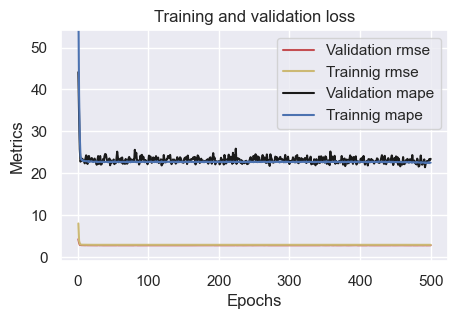

In [64]:
plotme(model3_1_5)

#### 2. Target (mean) encoding of dominated roadtype

In [58]:
df2 = df.iloc[:,0:6].copy()
df2 = df2.drop('hour of day',axis=1)
df2.head()

travel time  distance    hr_sin        hr_cos 1st ranked
0         1917  0.992498 -0.965926 -2.588190e-01    primary
1          766  0.344315 -0.866025  5.000000e-01    primary
2          130  0.018713 -1.000000 -1.836970e-16   tertiary
3          551  0.349947 -0.707107 -7.071068e-01    primary
4          962  0.385289 -0.866025 -5.000000e-01    primary

In [59]:
te = TargetEncoder()
df2['1st ranked'] = te.fit_transform(df2['1st ranked'],df2['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [67]:
df2.head()

travel time  distance    hr_sin        hr_cos  1st ranked
0         1917  0.992498 -0.965926 -2.588190e-01  771.171821
1          766  0.344315 -0.866025  5.000000e-01  771.171821
2          130  0.018713 -1.000000 -1.836970e-16  586.901753
3          551  0.349947 -0.707107 -7.071068e-01  771.171821
4          962  0.385289 -0.866025 -5.000000e-01  771.171821

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

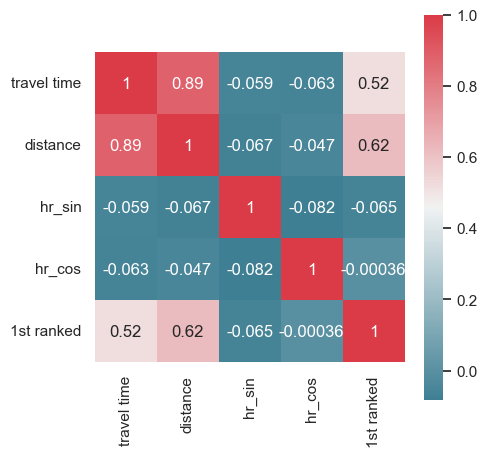

In [68]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df2.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [60]:
x = np.array(df2[['distance','hr_sin','hr_cos','1st ranked']])
y = np.array(df2['travel time'])
x

array([[ 9.92498195e-01, -9.65925826e-01, -2.58819045e-01,
         7.71171821e+02],
       [ 3.44314517e-01, -8.66025404e-01,  5.00000000e-01,
         7.71171821e+02],
       [ 1.87127960e-02, -1.00000000e+00, -1.83697020e-16,
         5.86901753e+02],
       ...,
       [ 3.58691059e-01,  0.00000000e+00,  1.00000000e+00,
         5.86901753e+02],
       [ 1.60193287e-02,  5.00000000e-01,  8.66025404e-01,
         3.80014885e+02],
       [ 7.42826410e-01,  9.65925826e-01,  2.58819045e-01,
         7.71171821e+02]])

In [70]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 4)
(3332, 4)


In [72]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
417/417 [==============================] - 1s 847us/step - loss: 158023.9219 - mape: 52.8732 - rmse: 397.5222 - val_loss: 105489.3828 - val_mape: 52.8303 - val_rmse: 324.7913
Epoch 2/500
417/417 [==============================] - 0s 730us/step - loss: 107542.3203 - mape: 52.5977 - rmse: 327.9365 - val_loss: 105384.7266 - val_mape: 53.2347 - val_rmse: 324.6301
Epoch 3/500
417/417 [==============================] - 0s 718us/step - loss: 107358.3047 - mape: 52.6512 - rmse: 327.6558 - val_loss: 105256.5391 - val_mape: 51.6928 - val_rmse: 324.4326
Epoch 4/500
417/417 [==============================] - 0s 732us/step - loss: 107291.2500 - mape: 52.4647 - rmse: 327.5534 - val_loss: 105155.3203 - val_mape: 53.7069 - val_rmse: 324.2766
Epoch 5/500
417/417 [==============================] - 0s 770us/step - loss: 107156.6484 - mape: 52.5464 - rmse: 327.3479 - val_loss: 105028.6094 - val_mape: 53.8633 - val_rmse: 324.0812
Epoch 6/500
417/417 [==============================] - 0s 718us/s

Epoch 45/500
417/417 [==============================] - 0s 709us/step - loss: 83758.8359 - mape: 45.9247 - rmse: 289.4112 - val_loss: 81095.0703 - val_mape: 45.4138 - val_rmse: 284.7720
Epoch 46/500
417/417 [==============================] - 0s 713us/step - loss: 82289.9766 - mape: 45.3842 - rmse: 286.8623 - val_loss: 80037.2109 - val_mape: 46.7840 - val_rmse: 282.9085
Epoch 47/500
417/417 [==============================] - 0s 702us/step - loss: 81118.0625 - mape: 45.0965 - rmse: 284.8123 - val_loss: 78452.2109 - val_mape: 45.0875 - val_rmse: 280.0932
Epoch 48/500
417/417 [==============================] - 0s 713us/step - loss: 79505.7188 - mape: 44.5726 - rmse: 281.9676 - val_loss: 77051.2500 - val_mape: 44.1017 - val_rmse: 277.5811
Epoch 49/500
417/417 [==============================] - 0s 695us/step - loss: 78181.0391 - mape: 44.1435 - rmse: 279.6087 - val_loss: 75623.2188 - val_mape: 44.1242 - val_rmse: 274.9968
Epoch 50/500
417/417 [==============================] - 0s 720us/step 

417/417 [==============================] - 0s 720us/step - loss: 33501.0977 - mape: 23.5452 - rmse: 183.0331 - val_loss: 31637.7461 - val_mape: 25.1303 - val_rmse: 177.8700
Epoch 90/500
417/417 [==============================] - 0s 717us/step - loss: 33288.0820 - mape: 23.5058 - rmse: 182.4502 - val_loss: 32332.3965 - val_mape: 26.4454 - val_rmse: 179.8121
Epoch 91/500
417/417 [==============================] - 0s 722us/step - loss: 33084.5977 - mape: 23.3879 - rmse: 181.8917 - val_loss: 30996.2832 - val_mape: 22.8959 - val_rmse: 176.0576
Epoch 92/500
417/417 [==============================] - 0s 726us/step - loss: 33048.9531 - mape: 23.2607 - rmse: 181.7937 - val_loss: 31178.1445 - val_mape: 22.0535 - val_rmse: 176.5733
Epoch 93/500
417/417 [==============================] - 0s 700us/step - loss: 32994.2266 - mape: 23.2176 - rmse: 181.6431 - val_loss: 31793.5898 - val_mape: 25.8550 - val_rmse: 178.3076
Epoch 94/500
417/417 [==============================] - 0s 695us/step - loss: 32984

Epoch 133/500
417/417 [==============================] - 0s 708us/step - loss: 32425.3516 - mape: 23.2637 - rmse: 180.0704 - val_loss: 30282.4941 - val_mape: 22.3732 - val_rmse: 174.0187
Epoch 134/500
417/417 [==============================] - 0s 704us/step - loss: 32299.0527 - mape: 23.2293 - rmse: 179.7194 - val_loss: 30622.8926 - val_mape: 25.2242 - val_rmse: 174.9940
Epoch 135/500
417/417 [==============================] - 0s 721us/step - loss: 32544.9023 - mape: 23.3942 - rmse: 180.4021 - val_loss: 30390.9922 - val_mape: 24.7335 - val_rmse: 174.3301
Epoch 136/500
417/417 [==============================] - 0s 722us/step - loss: 32351.7148 - mape: 23.2709 - rmse: 179.8658 - val_loss: 30325.5059 - val_mape: 24.5979 - val_rmse: 174.1422
Epoch 137/500
417/417 [==============================] - 0s 721us/step - loss: 32275.3301 - mape: 23.2855 - rmse: 179.6534 - val_loss: 31410.9395 - val_mape: 26.5383 - val_rmse: 177.2313
Epoch 138/500
417/417 [==============================] - 0s 713us

Epoch 177/500
417/417 [==============================] - 0s 803us/step - loss: 32326.8926 - mape: 23.4434 - rmse: 179.7968 - val_loss: 30106.3691 - val_mape: 22.9436 - val_rmse: 173.5119
Epoch 178/500
417/417 [==============================] - 0s 801us/step - loss: 32118.4590 - mape: 23.3473 - rmse: 179.2162 - val_loss: 30093.4023 - val_mape: 23.9028 - val_rmse: 173.4745
Epoch 179/500
417/417 [==============================] - 0s 787us/step - loss: 32317.6992 - mape: 23.4933 - rmse: 179.7712 - val_loss: 30353.7988 - val_mape: 22.4416 - val_rmse: 174.2234
Epoch 180/500
417/417 [==============================] - 0s 799us/step - loss: 32362.6074 - mape: 23.4247 - rmse: 179.8961 - val_loss: 32242.4844 - val_mape: 27.7676 - val_rmse: 179.5619
Epoch 181/500
417/417 [==============================] - 0s 819us/step - loss: 32224.2422 - mape: 23.3930 - rmse: 179.5111 - val_loss: 30055.5156 - val_mape: 23.3985 - val_rmse: 173.3653
Epoch 182/500
417/417 [==============================] - 0s 786us

Epoch 221/500
417/417 [==============================] - 0s 710us/step - loss: 32304.0527 - mape: 23.4582 - rmse: 179.7333 - val_loss: 30118.6621 - val_mape: 24.0345 - val_rmse: 173.5473
Epoch 222/500
417/417 [==============================] - 0s 719us/step - loss: 32215.7031 - mape: 23.4267 - rmse: 179.4873 - val_loss: 30057.7578 - val_mape: 23.3579 - val_rmse: 173.3717
Epoch 223/500
417/417 [==============================] - 0s 718us/step - loss: 32489.3867 - mape: 23.5344 - rmse: 180.2481 - val_loss: 30123.3828 - val_mape: 24.0633 - val_rmse: 173.5609
Epoch 224/500
417/417 [==============================] - 0s 709us/step - loss: 32319.5566 - mape: 23.4732 - rmse: 179.7764 - val_loss: 30078.4961 - val_mape: 23.0970 - val_rmse: 173.4315
Epoch 225/500
417/417 [==============================] - 0s 714us/step - loss: 32375.7715 - mape: 23.4947 - rmse: 179.9327 - val_loss: 30156.6250 - val_mape: 24.1941 - val_rmse: 173.6566
Epoch 226/500
417/417 [==============================] - 0s 700us

Epoch 265/500
417/417 [==============================] - 0s 713us/step - loss: 32305.5840 - mape: 23.4027 - rmse: 179.7375 - val_loss: 30937.3652 - val_mape: 21.8794 - val_rmse: 175.8902
Epoch 266/500
417/417 [==============================] - 0s 712us/step - loss: 32401.7656 - mape: 23.4656 - rmse: 180.0049 - val_loss: 30069.1523 - val_mape: 23.1921 - val_rmse: 173.4046
Epoch 267/500
417/417 [==============================] - 0s 716us/step - loss: 32298.3320 - mape: 23.4286 - rmse: 179.7174 - val_loss: 30330.2578 - val_mape: 24.7594 - val_rmse: 174.1558
Epoch 268/500
417/417 [==============================] - 0s 713us/step - loss: 32300.4004 - mape: 23.4636 - rmse: 179.7231 - val_loss: 30458.9121 - val_mape: 22.2515 - val_rmse: 174.5248
Epoch 269/500
417/417 [==============================] - 0s 717us/step - loss: 32492.3086 - mape: 23.6358 - rmse: 180.2562 - val_loss: 32001.8398 - val_mape: 21.5166 - val_rmse: 178.8906
Epoch 270/500
417/417 [==============================] - 0s 708us

Epoch 309/500
417/417 [==============================] - 0s 697us/step - loss: 32421.5039 - mape: 23.5056 - rmse: 180.0597 - val_loss: 30062.6914 - val_mape: 23.2392 - val_rmse: 173.3860
Epoch 310/500
417/417 [==============================] - 0s 699us/step - loss: 32570.4727 - mape: 23.6515 - rmse: 180.4729 - val_loss: 33024.9727 - val_mape: 28.7098 - val_rmse: 181.7277
Epoch 311/500
417/417 [==============================] - 0s 706us/step - loss: 32484.8887 - mape: 23.6027 - rmse: 180.2356 - val_loss: 31214.6660 - val_mape: 21.7547 - val_rmse: 176.6767
Epoch 312/500
417/417 [==============================] - 0s 713us/step - loss: 31988.4023 - mape: 23.3532 - rmse: 178.8530 - val_loss: 30767.8008 - val_mape: 21.9778 - val_rmse: 175.4075
Epoch 313/500
417/417 [==============================] - 0s 708us/step - loss: 32549.7949 - mape: 23.5209 - rmse: 180.4156 - val_loss: 30088.2520 - val_mape: 23.1475 - val_rmse: 173.4597
Epoch 314/500
417/417 [==============================] - 0s 709us

Epoch 353/500
417/417 [==============================] - 0s 704us/step - loss: 32415.0273 - mape: 23.4341 - rmse: 180.0417 - val_loss: 32543.6621 - val_mape: 28.1655 - val_rmse: 180.3986
Epoch 354/500
417/417 [==============================] - 0s 712us/step - loss: 32221.7363 - mape: 23.3807 - rmse: 179.5041 - val_loss: 30073.6348 - val_mape: 23.2182 - val_rmse: 173.4175
Epoch 355/500
417/417 [==============================] - 0s 717us/step - loss: 32269.1562 - mape: 23.4205 - rmse: 179.6362 - val_loss: 30245.1172 - val_mape: 22.5716 - val_rmse: 173.9112
Epoch 356/500
417/417 [==============================] - 0s 714us/step - loss: 32206.8242 - mape: 23.3766 - rmse: 179.4626 - val_loss: 30231.5352 - val_mape: 24.4737 - val_rmse: 173.8722
Epoch 357/500
417/417 [==============================] - 0s 694us/step - loss: 32465.4961 - mape: 23.4369 - rmse: 180.1818 - val_loss: 30168.6152 - val_mape: 24.2917 - val_rmse: 173.6911
Epoch 358/500
417/417 [==============================] - 0s 728us

Epoch 397/500
417/417 [==============================] - 0s 717us/step - loss: 32280.8008 - mape: 23.4789 - rmse: 179.6686 - val_loss: 30065.9121 - val_mape: 23.6717 - val_rmse: 173.3952
Epoch 398/500
417/417 [==============================] - 0s 714us/step - loss: 32353.9297 - mape: 23.4700 - rmse: 179.8720 - val_loss: 32417.8965 - val_mape: 28.0060 - val_rmse: 180.0497
Epoch 399/500
417/417 [==============================] - 0s 720us/step - loss: 32354.2188 - mape: 23.4813 - rmse: 179.8728 - val_loss: 30784.4609 - val_mape: 25.7157 - val_rmse: 175.4550
Epoch 400/500
417/417 [==============================] - 0s 715us/step - loss: 32380.3086 - mape: 23.4520 - rmse: 179.9453 - val_loss: 30947.7617 - val_mape: 21.8872 - val_rmse: 175.9198
Epoch 401/500
417/417 [==============================] - 0s 709us/step - loss: 32608.5215 - mape: 23.5297 - rmse: 180.5783 - val_loss: 32602.7051 - val_mape: 28.2651 - val_rmse: 180.5622
Epoch 402/500
417/417 [==============================] - 0s 715us

Epoch 441/500
417/417 [==============================] - 0s 715us/step - loss: 32062.2305 - mape: 23.3321 - rmse: 179.0593 - val_loss: 31023.5840 - val_mape: 21.8345 - val_rmse: 176.1351
Epoch 442/500
417/417 [==============================] - 0s 705us/step - loss: 32500.4160 - mape: 23.4159 - rmse: 180.2787 - val_loss: 30098.8887 - val_mape: 22.9955 - val_rmse: 173.4903
Epoch 443/500
417/417 [==============================] - 0s 712us/step - loss: 32408.0234 - mape: 23.4241 - rmse: 180.0223 - val_loss: 30112.1328 - val_mape: 22.9343 - val_rmse: 173.5285
Epoch 444/500
417/417 [==============================] - 0s 704us/step - loss: 32334.1992 - mape: 23.4619 - rmse: 179.8171 - val_loss: 30155.0996 - val_mape: 22.8219 - val_rmse: 173.6522
Epoch 445/500
417/417 [==============================] - 0s 723us/step - loss: 32306.2363 - mape: 23.3458 - rmse: 179.7393 - val_loss: 30064.3047 - val_mape: 23.1741 - val_rmse: 173.3906
Epoch 446/500
417/417 [==============================] - 0s 717us

Epoch 485/500
417/417 [==============================] - 0s 707us/step - loss: 32269.5957 - mape: 23.3917 - rmse: 179.6374 - val_loss: 30128.0293 - val_mape: 24.1124 - val_rmse: 173.5743
Epoch 486/500
417/417 [==============================] - 0s 711us/step - loss: 32310.2051 - mape: 23.4581 - rmse: 179.7504 - val_loss: 30568.9238 - val_mape: 22.2039 - val_rmse: 174.8397
Epoch 487/500
417/417 [==============================] - 0s 709us/step - loss: 32470.2227 - mape: 23.4926 - rmse: 180.1950 - val_loss: 30122.0820 - val_mape: 24.0782 - val_rmse: 173.5571
Epoch 488/500
417/417 [==============================] - 0s 707us/step - loss: 32423.4727 - mape: 23.4494 - rmse: 180.0652 - val_loss: 30258.1738 - val_mape: 24.5763 - val_rmse: 173.9488
Epoch 489/500
417/417 [==============================] - 0s 716us/step - loss: 32285.4844 - mape: 23.4279 - rmse: 179.6816 - val_loss: 31133.6152 - val_mape: 21.8653 - val_rmse: 176.4472
Epoch 490/500
417/417 [==============================] - 0s 735us

In [73]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
417/417 [==============================] - 1s 882us/step - loss: 126716.0625 - mape: 52.0358 - rmse: 355.9720 - val_loss: 105552.5312 - val_mape: 53.7542 - val_rmse: 324.8885
Epoch 2/500
417/417 [==============================] - 0s 737us/step - loss: 107487.4922 - mape: 52.6374 - rmse: 327.8528 - val_loss: 105556.7266 - val_mape: 54.4849 - val_rmse: 324.8950
Epoch 3/500
417/417 [==============================] - 0s 744us/step - loss: 107394.1094 - mape: 52.5784 - rmse: 327.7104 - val_loss: 104965.0703 - val_mape: 52.0057 - val_rmse: 323.9831
Epoch 4/500
417/417 [==============================] - 0s 740us/step - loss: 107192.4219 - mape: 52.5579 - rmse: 327.4025 - val_loss: 104721.8906 - val_mape: 53.0680 - val_rmse: 323.6076
Epoch 5/500
417/417 [==============================] - 0s 806us/step - loss: 106736.5078 - mape: 52.4143 - rmse: 326.7055 - val_loss: 104411.7266 - val_mape: 51.9188 - val_rmse: 323.1280
Epoch 6/500
417/417 [==============================] - 0s 805us/s

Epoch 45/500
417/417 [==============================] - 0s 736us/step - loss: 42221.3984 - mape: 29.6290 - rmse: 205.4785 - val_loss: 41022.2227 - val_mape: 26.0357 - val_rmse: 202.5394
Epoch 46/500
417/417 [==============================] - 0s 763us/step - loss: 41064.7930 - mape: 28.8341 - rmse: 202.6445 - val_loss: 38104.2188 - val_mape: 29.0916 - val_rmse: 195.2030
Epoch 47/500
417/417 [==============================] - 0s 730us/step - loss: 39915.0820 - mape: 28.2756 - rmse: 199.7876 - val_loss: 39729.7969 - val_mape: 24.1596 - val_rmse: 199.3233
Epoch 48/500
417/417 [==============================] - 0s 734us/step - loss: 38597.3008 - mape: 27.5209 - rmse: 196.4620 - val_loss: 36100.3281 - val_mape: 28.3238 - val_rmse: 190.0009
Epoch 49/500
417/417 [==============================] - 0s 723us/step - loss: 37454.9023 - mape: 26.7436 - rmse: 193.5327 - val_loss: 35004.6836 - val_mape: 25.5801 - val_rmse: 187.0954
Epoch 50/500
417/417 [==============================] - 0s 733us/step 

417/417 [==============================] - 0s 729us/step - loss: 32410.8691 - mape: 23.3213 - rmse: 180.0302 - val_loss: 30098.1055 - val_mape: 23.3272 - val_rmse: 173.4881
Epoch 90/500
417/417 [==============================] - 0s 734us/step - loss: 32551.7090 - mape: 23.4980 - rmse: 180.4209 - val_loss: 30689.4668 - val_mape: 25.3616 - val_rmse: 175.1841
Epoch 91/500
417/417 [==============================] - 0s 741us/step - loss: 32423.9746 - mape: 23.4056 - rmse: 180.0666 - val_loss: 30080.5859 - val_mape: 23.0371 - val_rmse: 173.4376
Epoch 92/500
417/417 [==============================] - 0s 741us/step - loss: 32752.7617 - mape: 23.5008 - rmse: 180.9772 - val_loss: 30213.3574 - val_mape: 24.2474 - val_rmse: 173.8199
Epoch 93/500
417/417 [==============================] - 0s 735us/step - loss: 32680.4336 - mape: 23.4300 - rmse: 180.7773 - val_loss: 30921.8242 - val_mape: 25.8314 - val_rmse: 175.8460
Epoch 94/500
417/417 [==============================] - 0s 736us/step - loss: 32539

Epoch 133/500
417/417 [==============================] - 0s 745us/step - loss: 32648.4141 - mape: 23.5700 - rmse: 180.6887 - val_loss: 33954.8711 - val_mape: 21.3661 - val_rmse: 184.2685
Epoch 134/500
417/417 [==============================] - 0s 731us/step - loss: 32900.3086 - mape: 23.7791 - rmse: 181.3844 - val_loss: 30344.0742 - val_mape: 24.8586 - val_rmse: 174.1955
Epoch 135/500
417/417 [==============================] - 0s 753us/step - loss: 32721.5879 - mape: 23.6902 - rmse: 180.8911 - val_loss: 30309.5293 - val_mape: 22.8235 - val_rmse: 174.0963
Epoch 136/500
417/417 [==============================] - 0s 736us/step - loss: 32527.7168 - mape: 23.5281 - rmse: 180.3544 - val_loss: 31676.5957 - val_mape: 21.6035 - val_rmse: 177.9792
Epoch 137/500
417/417 [==============================] - 0s 741us/step - loss: 32841.2656 - mape: 23.6964 - rmse: 181.2216 - val_loss: 31561.2168 - val_mape: 21.6791 - val_rmse: 177.6548
Epoch 138/500
417/417 [==============================] - 0s 734us

Epoch 177/500
417/417 [==============================] - 0s 803us/step - loss: 32485.6484 - mape: 23.5374 - rmse: 180.2378 - val_loss: 30469.1328 - val_mape: 25.0850 - val_rmse: 174.5541
Epoch 178/500
417/417 [==============================] - 0s 810us/step - loss: 32456.2168 - mape: 23.5529 - rmse: 180.1561 - val_loss: 31152.4395 - val_mape: 21.8625 - val_rmse: 176.5005
Epoch 179/500
417/417 [==============================] - 0s 804us/step - loss: 32817.9844 - mape: 23.7106 - rmse: 181.1573 - val_loss: 31764.4102 - val_mape: 21.5522 - val_rmse: 178.2257
Epoch 180/500
417/417 [==============================] - 0s 822us/step - loss: 32612.5449 - mape: 23.6001 - rmse: 180.5894 - val_loss: 30362.9844 - val_mape: 24.8963 - val_rmse: 174.2498
Epoch 181/500
417/417 [==============================] - 0s 818us/step - loss: 32589.1738 - mape: 23.6197 - rmse: 180.5247 - val_loss: 30602.3242 - val_mape: 22.1810 - val_rmse: 174.9352
Epoch 182/500
417/417 [==============================] - 0s 799us

Epoch 221/500
417/417 [==============================] - 0s 771us/step - loss: 32419.6328 - mape: 23.4341 - rmse: 180.0545 - val_loss: 30320.4844 - val_mape: 24.7359 - val_rmse: 174.1278
Epoch 222/500
417/417 [==============================] - 0s 744us/step - loss: 32686.6719 - mape: 23.6885 - rmse: 180.7946 - val_loss: 30137.6113 - val_mape: 24.1499 - val_rmse: 173.6019
Epoch 223/500
417/417 [==============================] - 0s 754us/step - loss: 32539.8691 - mape: 23.5237 - rmse: 180.3881 - val_loss: 30312.8066 - val_mape: 24.7779 - val_rmse: 174.1057
Epoch 224/500
417/417 [==============================] - 0s 753us/step - loss: 32603.7578 - mape: 23.6371 - rmse: 180.5651 - val_loss: 30243.9375 - val_mape: 22.6507 - val_rmse: 173.9078
Epoch 225/500
417/417 [==============================] - 0s 762us/step - loss: 32709.0820 - mape: 23.6880 - rmse: 180.8565 - val_loss: 33934.0781 - val_mape: 29.6618 - val_rmse: 184.2121
Epoch 226/500
417/417 [==============================] - 0s 756us

Epoch 265/500
417/417 [==============================] - 0s 738us/step - loss: 32595.4629 - mape: 23.5542 - rmse: 180.5421 - val_loss: 30059.9766 - val_mape: 23.5748 - val_rmse: 173.3781
Epoch 266/500
417/417 [==============================] - 0s 783us/step - loss: 32552.4961 - mape: 23.5631 - rmse: 180.4231 - val_loss: 32698.0020 - val_mape: 28.3523 - val_rmse: 180.8259
Epoch 267/500
417/417 [==============================] - 0s 803us/step - loss: 32580.1328 - mape: 23.6325 - rmse: 180.4997 - val_loss: 31148.4512 - val_mape: 26.3152 - val_rmse: 176.4892
Epoch 268/500
417/417 [==============================] - 0s 805us/step - loss: 32623.6973 - mape: 23.6818 - rmse: 180.6203 - val_loss: 31007.4688 - val_mape: 21.8639 - val_rmse: 176.0894
Epoch 269/500
417/417 [==============================] - 0s 811us/step - loss: 32428.2031 - mape: 23.5920 - rmse: 180.0783 - val_loss: 31901.0918 - val_mape: 21.5468 - val_rmse: 178.6088
Epoch 270/500
417/417 [==============================] - 0s 813us

Epoch 309/500
417/417 [==============================] - 0s 740us/step - loss: 32760.3379 - mape: 23.7065 - rmse: 180.9982 - val_loss: 30084.3789 - val_mape: 23.8452 - val_rmse: 173.4485
Epoch 310/500
417/417 [==============================] - 0s 730us/step - loss: 32638.6484 - mape: 23.6580 - rmse: 180.6617 - val_loss: 30060.7539 - val_mape: 23.3533 - val_rmse: 173.3804
Epoch 311/500
417/417 [==============================] - 0s 736us/step - loss: 32646.4238 - mape: 23.5907 - rmse: 180.6832 - val_loss: 30096.4824 - val_mape: 23.0217 - val_rmse: 173.4834
Epoch 312/500
417/417 [==============================] - 0s 744us/step - loss: 32427.7832 - mape: 23.5615 - rmse: 180.0772 - val_loss: 30064.9824 - val_mape: 23.2223 - val_rmse: 173.3926
Epoch 313/500
417/417 [==============================] - 0s 746us/step - loss: 32737.1211 - mape: 23.6143 - rmse: 180.9340 - val_loss: 31382.6348 - val_mape: 26.6861 - val_rmse: 177.1514
Epoch 314/500
417/417 [==============================] - 0s 746us

Epoch 353/500
417/417 [==============================] - 0s 735us/step - loss: 32501.9199 - mape: 23.5224 - rmse: 180.2829 - val_loss: 30238.1328 - val_mape: 24.5016 - val_rmse: 173.8912
Epoch 354/500
417/417 [==============================] - 0s 732us/step - loss: 32444.2305 - mape: 23.5434 - rmse: 180.1228 - val_loss: 31027.4570 - val_mape: 21.8369 - val_rmse: 176.1461
Epoch 355/500
417/417 [==============================] - 0s 727us/step - loss: 32469.0879 - mape: 23.4036 - rmse: 180.1918 - val_loss: 31244.7988 - val_mape: 21.7334 - val_rmse: 176.7620
Epoch 356/500
417/417 [==============================] - 0s 736us/step - loss: 32370.1074 - mape: 23.4630 - rmse: 179.9169 - val_loss: 31617.2363 - val_mape: 21.6024 - val_rmse: 177.8124
Epoch 357/500
417/417 [==============================] - 0s 740us/step - loss: 32556.1836 - mape: 23.5353 - rmse: 180.4333 - val_loss: 30065.7988 - val_mape: 23.4162 - val_rmse: 173.3949
Epoch 358/500
417/417 [==============================] - 0s 804us

Epoch 397/500
417/417 [==============================] - 0s 806us/step - loss: 32363.7715 - mape: 23.5549 - rmse: 179.8993 - val_loss: 32178.9434 - val_mape: 21.4764 - val_rmse: 179.3849
Epoch 398/500
417/417 [==============================] - 0s 754us/step - loss: 32616.9473 - mape: 23.5922 - rmse: 180.6016 - val_loss: 30669.8457 - val_mape: 22.1887 - val_rmse: 175.1281
Epoch 399/500
417/417 [==============================] - 0s 741us/step - loss: 32596.2266 - mape: 23.5814 - rmse: 180.5443 - val_loss: 30137.4062 - val_mape: 22.8961 - val_rmse: 173.6013
Epoch 400/500
417/417 [==============================] - 0s 724us/step - loss: 32859.0469 - mape: 23.7605 - rmse: 181.2706 - val_loss: 30329.1621 - val_mape: 22.4634 - val_rmse: 174.1527
Epoch 401/500
417/417 [==============================] - 0s 745us/step - loss: 32613.7988 - mape: 23.5559 - rmse: 180.5929 - val_loss: 30054.3945 - val_mape: 23.5564 - val_rmse: 173.3620
Epoch 402/500
417/417 [==============================] - 0s 814us

Epoch 441/500
417/417 [==============================] - 0s 732us/step - loss: 32602.9355 - mape: 23.6023 - rmse: 180.5628 - val_loss: 30071.7266 - val_mape: 23.7535 - val_rmse: 173.4120
Epoch 442/500
417/417 [==============================] - 0s 752us/step - loss: 32575.8027 - mape: 23.6150 - rmse: 180.4877 - val_loss: 30117.5625 - val_mape: 22.9290 - val_rmse: 173.5441
Epoch 443/500
417/417 [==============================] - 0s 735us/step - loss: 32507.7520 - mape: 23.4306 - rmse: 180.2991 - val_loss: 30114.9355 - val_mape: 22.9589 - val_rmse: 173.5366
Epoch 444/500
417/417 [==============================] - 0s 738us/step - loss: 32542.0508 - mape: 23.4482 - rmse: 180.3941 - val_loss: 30322.4395 - val_mape: 24.7524 - val_rmse: 174.1334
Epoch 445/500
417/417 [==============================] - 0s 747us/step - loss: 32455.9199 - mape: 23.5600 - rmse: 180.1553 - val_loss: 30397.8008 - val_mape: 22.4487 - val_rmse: 174.3497
Epoch 446/500
417/417 [==============================] - 0s 741us

Epoch 485/500
417/417 [==============================] - 0s 728us/step - loss: 32683.0820 - mape: 23.7529 - rmse: 180.7846 - val_loss: 30130.5508 - val_mape: 24.0886 - val_rmse: 173.5815
Epoch 486/500
417/417 [==============================] - 0s 837us/step - loss: 32457.9277 - mape: 23.4944 - rmse: 180.1608 - val_loss: 30219.1016 - val_mape: 24.4322 - val_rmse: 173.8364
Epoch 487/500
417/417 [==============================] - 0s 800us/step - loss: 32557.7500 - mape: 23.5025 - rmse: 180.4377 - val_loss: 30068.4277 - val_mape: 23.6912 - val_rmse: 173.4025
Epoch 488/500
417/417 [==============================] - 0s 803us/step - loss: 32614.9688 - mape: 23.7342 - rmse: 180.5961 - val_loss: 32373.9980 - val_mape: 27.9749 - val_rmse: 179.9278
Epoch 489/500
417/417 [==============================] - 0s 801us/step - loss: 32280.5156 - mape: 23.4270 - rmse: 179.6678 - val_loss: 30812.8965 - val_mape: 25.8300 - val_rmse: 175.5360
Epoch 490/500
417/417 [==============================] - 0s 811us

In [74]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
417/417 [==============================] - 1s 922us/step - loss: 125879.7109 - mape: 53.2360 - rmse: 354.7953 - val_loss: 105489.1875 - val_mape: 54.0588 - val_rmse: 324.7910
Epoch 2/500
417/417 [==============================] - 0s 781us/step - loss: 107451.7031 - mape: 52.5529 - rmse: 327.7983 - val_loss: 105879.6484 - val_mape: 55.7636 - val_rmse: 325.3915
Epoch 3/500
417/417 [==============================] - 0s 784us/step - loss: 107072.1328 - mape: 52.4835 - rmse: 327.2188 - val_loss: 104789.0703 - val_mape: 54.3198 - val_rmse: 323.7114
Epoch 4/500
417/417 [==============================] - 0s 863us/step - loss: 106533.1797 - mape: 52.3648 - rmse: 326.3942 - val_loss: 104046.2812 - val_mape: 53.3905 - val_rmse: 322.5621
Epoch 5/500
417/417 [==============================] - 0s 897us/step - loss: 106202.1094 - mape: 52.2313 - rmse: 325.8867 - val_loss: 103853.2344 - val_mape: 54.4316 - val_rmse: 322.2627
Epoch 6/500
417/417 [==============================] - 0s 883us/s

Epoch 45/500
417/417 [==============================] - 0s 885us/step - loss: 33482.3906 - mape: 23.7063 - rmse: 182.9819 - val_loss: 30226.9531 - val_mape: 23.7858 - val_rmse: 173.8590
Epoch 46/500
417/417 [==============================] - 0s 905us/step - loss: 33221.2539 - mape: 23.5966 - rmse: 182.2670 - val_loss: 31107.1094 - val_mape: 21.5491 - val_rmse: 176.3721
Epoch 47/500
417/417 [==============================] - 0s 891us/step - loss: 32865.3750 - mape: 23.4477 - rmse: 181.2881 - val_loss: 30179.1836 - val_mape: 23.8051 - val_rmse: 173.7216
Epoch 48/500
417/417 [==============================] - 0s 889us/step - loss: 32898.4688 - mape: 23.5101 - rmse: 181.3793 - val_loss: 31017.3828 - val_mape: 21.6711 - val_rmse: 176.1175
Epoch 49/500
417/417 [==============================] - 0s 883us/step - loss: 33043.2188 - mape: 23.5783 - rmse: 181.7779 - val_loss: 33298.2891 - val_mape: 21.1417 - val_rmse: 182.4782
Epoch 50/500
417/417 [==============================] - 0s 896us/step 

417/417 [==============================] - 0s 792us/step - loss: 33030.8086 - mape: 23.7872 - rmse: 181.7438 - val_loss: 30143.7500 - val_mape: 24.1194 - val_rmse: 173.6196
Epoch 90/500
417/417 [==============================] - 0s 784us/step - loss: 32906.1562 - mape: 23.7961 - rmse: 181.4005 - val_loss: 31691.5039 - val_mape: 27.1110 - val_rmse: 178.0211
Epoch 91/500
417/417 [==============================] - 0s 784us/step - loss: 32924.6797 - mape: 23.8872 - rmse: 181.4516 - val_loss: 30519.9824 - val_mape: 25.1940 - val_rmse: 174.6997
Epoch 92/500
417/417 [==============================] - 0s 885us/step - loss: 33181.1914 - mape: 23.9117 - rmse: 182.1571 - val_loss: 33459.2617 - val_mape: 21.3463 - val_rmse: 182.9187
Epoch 93/500
417/417 [==============================] - 0s 788us/step - loss: 33217.9727 - mape: 23.9341 - rmse: 182.2580 - val_loss: 31108.7266 - val_mape: 26.3024 - val_rmse: 176.3767
Epoch 94/500
417/417 [==============================] - 0s 789us/step - loss: 33546

Epoch 133/500
417/417 [==============================] - 0s 780us/step - loss: 32647.6074 - mape: 23.5734 - rmse: 180.6865 - val_loss: 30326.1445 - val_mape: 24.7411 - val_rmse: 174.1440
Epoch 134/500
417/417 [==============================] - 0s 795us/step - loss: 32718.1914 - mape: 23.6817 - rmse: 180.8817 - val_loss: 30178.0547 - val_mape: 22.7692 - val_rmse: 173.7183
Epoch 135/500
417/417 [==============================] - 0s 777us/step - loss: 32683.6172 - mape: 23.5929 - rmse: 180.7861 - val_loss: 30447.5195 - val_mape: 25.0427 - val_rmse: 174.4922
Epoch 136/500
417/417 [==============================] - 0s 774us/step - loss: 33664.2773 - mape: 24.1574 - rmse: 183.4783 - val_loss: 32882.5273 - val_mape: 21.3932 - val_rmse: 181.3354
Epoch 137/500
417/417 [==============================] - 0s 787us/step - loss: 33249.0938 - mape: 24.0699 - rmse: 182.3433 - val_loss: 32343.2031 - val_mape: 27.9510 - val_rmse: 179.8422
Epoch 138/500
417/417 [==============================] - 0s 793us

Epoch 177/500
417/417 [==============================] - 0s 789us/step - loss: 33058.6641 - mape: 23.9055 - rmse: 181.8204 - val_loss: 31208.9316 - val_mape: 26.4795 - val_rmse: 176.6605
Epoch 178/500
417/417 [==============================] - 0s 777us/step - loss: 33189.2344 - mape: 23.9157 - rmse: 182.1791 - val_loss: 32556.8828 - val_mape: 28.1775 - val_rmse: 180.4353
Epoch 179/500
417/417 [==============================] - 0s 792us/step - loss: 32916.0938 - mape: 23.5533 - rmse: 181.4279 - val_loss: 32153.7207 - val_mape: 27.7406 - val_rmse: 179.3146
Epoch 180/500
417/417 [==============================] - 0s 777us/step - loss: 33232.0586 - mape: 24.0318 - rmse: 182.2966 - val_loss: 30044.6113 - val_mape: 23.3016 - val_rmse: 173.3338
Epoch 181/500
417/417 [==============================] - 0s 783us/step - loss: 32779.0156 - mape: 23.6508 - rmse: 181.0498 - val_loss: 32167.5957 - val_mape: 27.7386 - val_rmse: 179.3533
Epoch 182/500
417/417 [==============================] - 0s 773us

Epoch 221/500
417/417 [==============================] - 0s 791us/step - loss: 32650.4355 - mape: 23.5113 - rmse: 180.6943 - val_loss: 34588.3203 - val_mape: 30.4110 - val_rmse: 185.9794
Epoch 222/500
417/417 [==============================] - 0s 799us/step - loss: 33125.3945 - mape: 23.9617 - rmse: 182.0038 - val_loss: 30653.3789 - val_mape: 25.5079 - val_rmse: 175.0811
Epoch 223/500
417/417 [==============================] - 0s 796us/step - loss: 32617.7871 - mape: 23.6061 - rmse: 180.6040 - val_loss: 32680.5996 - val_mape: 28.2923 - val_rmse: 180.7778
Epoch 224/500
417/417 [==============================] - 0s 791us/step - loss: 32607.1445 - mape: 23.6385 - rmse: 180.5745 - val_loss: 30174.1152 - val_mape: 22.6055 - val_rmse: 173.7070
Epoch 225/500
417/417 [==============================] - 0s 798us/step - loss: 33160.7852 - mape: 23.8328 - rmse: 182.1010 - val_loss: 31182.6387 - val_mape: 26.4261 - val_rmse: 176.5861
Epoch 226/500
417/417 [==============================] - 0s 788us

Epoch 265/500
417/417 [==============================] - 0s 786us/step - loss: 32522.6641 - mape: 23.5631 - rmse: 180.3404 - val_loss: 30662.9336 - val_mape: 25.4490 - val_rmse: 175.1084
Epoch 266/500
417/417 [==============================] - 0s 784us/step - loss: 32888.2852 - mape: 23.7885 - rmse: 181.3513 - val_loss: 30182.8242 - val_mape: 22.6041 - val_rmse: 173.7320
Epoch 267/500
417/417 [==============================] - 0s 781us/step - loss: 33048.5117 - mape: 23.8532 - rmse: 181.7925 - val_loss: 31857.0020 - val_mape: 21.5242 - val_rmse: 178.4853
Epoch 268/500
417/417 [==============================] - 0s 784us/step - loss: 32692.0195 - mape: 23.6675 - rmse: 180.8093 - val_loss: 30340.3340 - val_mape: 22.3677 - val_rmse: 174.1848
Epoch 269/500
417/417 [==============================] - 0s 784us/step - loss: 32864.6211 - mape: 23.6851 - rmse: 181.2860 - val_loss: 30107.0566 - val_mape: 23.3110 - val_rmse: 173.5139
Epoch 270/500
417/417 [==============================] - 0s 789us

Epoch 309/500
417/417 [==============================] - 0s 776us/step - loss: 32717.8672 - mape: 23.6446 - rmse: 180.8808 - val_loss: 30742.7852 - val_mape: 25.6333 - val_rmse: 175.3362
Epoch 310/500
417/417 [==============================] - 0s 790us/step - loss: 32743.6953 - mape: 23.7260 - rmse: 180.9522 - val_loss: 30917.5000 - val_mape: 25.9533 - val_rmse: 175.8337
Epoch 311/500
417/417 [==============================] - 0s 787us/step - loss: 32430.1387 - mape: 23.5179 - rmse: 180.0837 - val_loss: 31748.2090 - val_mape: 21.5035 - val_rmse: 178.1803
Epoch 312/500
417/417 [==============================] - 0s 786us/step - loss: 32574.0703 - mape: 23.6285 - rmse: 180.4829 - val_loss: 30060.0625 - val_mape: 23.6135 - val_rmse: 173.3784
Epoch 313/500
417/417 [==============================] - 0s 787us/step - loss: 32874.2031 - mape: 23.7647 - rmse: 181.3124 - val_loss: 30472.0645 - val_mape: 22.3241 - val_rmse: 174.5625
Epoch 314/500
417/417 [==============================] - 0s 782us

Epoch 353/500
417/417 [==============================] - 0s 782us/step - loss: 32903.5195 - mape: 23.7827 - rmse: 181.3933 - val_loss: 30717.6621 - val_mape: 21.9623 - val_rmse: 175.2645
Epoch 354/500
417/417 [==============================] - 0s 784us/step - loss: 32804.0234 - mape: 23.6835 - rmse: 181.1188 - val_loss: 33483.4375 - val_mape: 29.2274 - val_rmse: 182.9848
Epoch 355/500
417/417 [==============================] - 0s 783us/step - loss: 32842.2773 - mape: 23.7084 - rmse: 181.2244 - val_loss: 30975.1758 - val_mape: 21.7488 - val_rmse: 175.9977
Epoch 356/500
417/417 [==============================] - 0s 785us/step - loss: 32657.8809 - mape: 23.6048 - rmse: 180.7149 - val_loss: 30689.9980 - val_mape: 25.5227 - val_rmse: 175.1856
Epoch 357/500
417/417 [==============================] - 0s 784us/step - loss: 32462.6094 - mape: 23.4616 - rmse: 180.1738 - val_loss: 30042.1914 - val_mape: 22.8757 - val_rmse: 173.3268
Epoch 358/500
417/417 [==============================] - 0s 786us

Epoch 397/500
417/417 [==============================] - 0s 785us/step - loss: 32859.1523 - mape: 23.6280 - rmse: 181.2709 - val_loss: 30472.4512 - val_mape: 22.3115 - val_rmse: 174.5636
Epoch 398/500
417/417 [==============================] - 0s 788us/step - loss: 32981.0781 - mape: 23.8261 - rmse: 181.6069 - val_loss: 30791.2246 - val_mape: 22.2203 - val_rmse: 175.4743
Epoch 399/500
417/417 [==============================] - 0s 780us/step - loss: 32736.2344 - mape: 23.7721 - rmse: 180.9316 - val_loss: 30081.4902 - val_mape: 23.5913 - val_rmse: 173.4402
Epoch 400/500
417/417 [==============================] - 0s 784us/step - loss: 32840.4453 - mape: 23.7559 - rmse: 181.2193 - val_loss: 30006.6914 - val_mape: 23.3970 - val_rmse: 173.2244
Epoch 401/500
417/417 [==============================] - 0s 780us/step - loss: 32665.4883 - mape: 23.6498 - rmse: 180.7360 - val_loss: 30476.0293 - val_mape: 22.1532 - val_rmse: 174.5739
Epoch 402/500
417/417 [==============================] - 0s 780us

Epoch 441/500
417/417 [==============================] - 0s 780us/step - loss: 32580.4863 - mape: 23.5670 - rmse: 180.5007 - val_loss: 30798.3770 - val_mape: 21.8739 - val_rmse: 175.4947
Epoch 442/500
417/417 [==============================] - 0s 783us/step - loss: 32864.5273 - mape: 23.7392 - rmse: 181.2858 - val_loss: 34019.9766 - val_mape: 21.3385 - val_rmse: 184.4451
Epoch 443/500
417/417 [==============================] - 0s 788us/step - loss: 32913.7969 - mape: 23.7217 - rmse: 181.4216 - val_loss: 30471.5605 - val_mape: 25.1619 - val_rmse: 174.5611
Epoch 444/500
417/417 [==============================] - 0s 792us/step - loss: 32952.0938 - mape: 23.6757 - rmse: 181.5271 - val_loss: 32992.2383 - val_mape: 28.7554 - val_rmse: 181.6376
Epoch 445/500
417/417 [==============================] - 0s 783us/step - loss: 32337.4336 - mape: 23.6030 - rmse: 179.8261 - val_loss: 30596.1543 - val_mape: 25.3997 - val_rmse: 174.9176
Epoch 446/500
417/417 [==============================] - 0s 789us

Epoch 485/500
417/417 [==============================] - 0s 776us/step - loss: 33100.9180 - mape: 24.0402 - rmse: 181.9366 - val_loss: 30109.9492 - val_mape: 22.8288 - val_rmse: 173.5222
Epoch 486/500
417/417 [==============================] - 0s 793us/step - loss: 32487.1914 - mape: 23.5701 - rmse: 180.2420 - val_loss: 30336.1191 - val_mape: 24.7767 - val_rmse: 174.1727
Epoch 487/500
417/417 [==============================] - 0s 778us/step - loss: 32611.5664 - mape: 23.6942 - rmse: 180.5867 - val_loss: 33079.8359 - val_mape: 21.3611 - val_rmse: 181.8786
Epoch 488/500
417/417 [==============================] - 0s 780us/step - loss: 32600.9375 - mape: 23.5489 - rmse: 180.5573 - val_loss: 30171.7559 - val_mape: 24.3679 - val_rmse: 173.7002
Epoch 489/500
417/417 [==============================] - 0s 792us/step - loss: 32660.6133 - mape: 23.6979 - rmse: 180.7225 - val_loss: 30555.8242 - val_mape: 25.2762 - val_rmse: 174.8022
Epoch 490/500
417/417 [==============================] - 0s 784us

In [75]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
417/417 [==============================] - 1s 938us/step - loss: 120167.2578 - mape: 53.1056 - rmse: 346.6515 - val_loss: 105402.4297 - val_mape: 52.7137 - val_rmse: 324.6574
Epoch 2/500
417/417 [==============================] - 0s 798us/step - loss: 107690.3984 - mape: 52.6840 - rmse: 328.1621 - val_loss: 105835.0078 - val_mape: 50.0473 - val_rmse: 325.3229
Epoch 3/500
417/417 [==============================] - 0s 792us/step - loss: 107525.7031 - mape: 52.5135 - rmse: 327.9111 - val_loss: 105385.3125 - val_mape: 50.2433 - val_rmse: 324.6310
Epoch 4/500
417/417 [==============================] - 0s 796us/step - loss: 107485.6250 - mape: 52.3885 - rmse: 327.8500 - val_loss: 104480.8359 - val_mape: 52.1143 - val_rmse: 323.2350
Epoch 5/500
417/417 [==============================] - 0s 790us/step - loss: 106750.7891 - mape: 52.3839 - rmse: 326.7274 - val_loss: 104236.7188 - val_mape: 53.8408 - val_rmse: 322.8571
Epoch 6/500
417/417 [==============================] - 0s 794us/s

417/417 [==============================] - 0s 789us/step - loss: 33704.9453 - mape: 24.2337 - rmse: 183.5891 - val_loss: 32561.8418 - val_mape: 21.3820 - val_rmse: 180.4490
Epoch 46/500
417/417 [==============================] - 0s 803us/step - loss: 33852.0273 - mape: 24.3030 - rmse: 183.9892 - val_loss: 36057.1836 - val_mape: 31.7615 - val_rmse: 189.8873
Epoch 47/500
417/417 [==============================] - 0s 793us/step - loss: 33731.1133 - mape: 24.1378 - rmse: 183.6603 - val_loss: 31038.6191 - val_mape: 21.8777 - val_rmse: 176.1778
Epoch 48/500
417/417 [==============================] - 0s 787us/step - loss: 33488.5117 - mape: 24.1813 - rmse: 182.9987 - val_loss: 33816.5430 - val_mape: 21.4767 - val_rmse: 183.8927
Epoch 49/500
417/417 [==============================] - 0s 790us/step - loss: 33959.2656 - mape: 24.4576 - rmse: 184.2804 - val_loss: 35452.6016 - val_mape: 31.4204 - val_rmse: 188.2886
Epoch 50/500
417/417 [==============================] - 0s 785us/step - loss: 33469

Epoch 133/500
417/417 [==============================] - 0s 771us/step - loss: 33465.1172 - mape: 24.1661 - rmse: 182.9347 - val_loss: 31317.4727 - val_mape: 26.5790 - val_rmse: 176.9674
Epoch 134/500
417/417 [==============================] - 0s 783us/step - loss: 33350.7539 - mape: 24.0012 - rmse: 182.6219 - val_loss: 30742.2578 - val_mape: 25.7295 - val_rmse: 175.3347
Epoch 135/500
417/417 [==============================] - 0s 782us/step - loss: 33657.5664 - mape: 24.3645 - rmse: 183.4600 - val_loss: 33359.2188 - val_mape: 21.4899 - val_rmse: 182.6451
Epoch 136/500
417/417 [==============================] - 0s 778us/step - loss: 32933.6250 - mape: 23.8971 - rmse: 181.4762 - val_loss: 30168.7656 - val_mape: 22.7550 - val_rmse: 173.6916
Epoch 137/500
417/417 [==============================] - 0s 771us/step - loss: 33285.7539 - mape: 23.9782 - rmse: 182.4438 - val_loss: 30712.9199 - val_mape: 25.6212 - val_rmse: 175.2510
Epoch 138/500
417/417 [==============================] - 0s 779us

Epoch 177/500
417/417 [==============================] - 0s 780us/step - loss: 33372.2266 - mape: 23.9585 - rmse: 182.6807 - val_loss: 30725.6836 - val_mape: 25.6395 - val_rmse: 175.2874
Epoch 178/500
417/417 [==============================] - 0s 775us/step - loss: 32962.7578 - mape: 23.8995 - rmse: 181.5565 - val_loss: 31511.6895 - val_mape: 21.6637 - val_rmse: 177.5153
Epoch 179/500
417/417 [==============================] - 0s 781us/step - loss: 32969.9609 - mape: 23.9502 - rmse: 181.5763 - val_loss: 30458.0352 - val_mape: 22.2922 - val_rmse: 174.5223
Epoch 180/500
417/417 [==============================] - 0s 772us/step - loss: 33032.5859 - mape: 23.9356 - rmse: 181.7487 - val_loss: 30105.3477 - val_mape: 24.0748 - val_rmse: 173.5089
Epoch 181/500
417/417 [==============================] - 0s 885us/step - loss: 33178.7500 - mape: 23.8099 - rmse: 182.1503 - val_loss: 30785.5430 - val_mape: 25.7297 - val_rmse: 175.4581
Epoch 182/500
417/417 [==============================] - 0s 832us

Epoch 221/500
417/417 [==============================] - 0s 786us/step - loss: 33043.0156 - mape: 23.8603 - rmse: 181.7774 - val_loss: 33691.1758 - val_mape: 21.3898 - val_rmse: 183.5516
Epoch 222/500
417/417 [==============================] - 0s 788us/step - loss: 32956.4141 - mape: 23.7807 - rmse: 181.5390 - val_loss: 31578.3477 - val_mape: 26.9741 - val_rmse: 177.7030
Epoch 223/500
417/417 [==============================] - 0s 786us/step - loss: 32900.2070 - mape: 23.7736 - rmse: 181.3841 - val_loss: 31074.0176 - val_mape: 26.1421 - val_rmse: 176.2782
Epoch 224/500
417/417 [==============================] - 0s 788us/step - loss: 33194.5938 - mape: 23.9902 - rmse: 182.1938 - val_loss: 30073.9336 - val_mape: 23.2259 - val_rmse: 173.4184
Epoch 225/500
417/417 [==============================] - 0s 788us/step - loss: 32939.3789 - mape: 23.7736 - rmse: 181.4921 - val_loss: 30675.8945 - val_mape: 22.1060 - val_rmse: 175.1454
Epoch 226/500
417/417 [==============================] - 0s 787us

Epoch 265/500
417/417 [==============================] - 0s 792us/step - loss: 32624.5781 - mape: 23.6792 - rmse: 180.6228 - val_loss: 30974.6738 - val_mape: 26.0771 - val_rmse: 175.9962
Epoch 266/500
417/417 [==============================] - 0s 792us/step - loss: 32842.6094 - mape: 23.9043 - rmse: 181.2253 - val_loss: 30096.0020 - val_mape: 24.0449 - val_rmse: 173.4820
Epoch 267/500
417/417 [==============================] - 0s 788us/step - loss: 32747.0488 - mape: 23.6747 - rmse: 180.9615 - val_loss: 30502.0000 - val_mape: 25.1526 - val_rmse: 174.6482
Epoch 268/500
417/417 [==============================] - 0s 800us/step - loss: 33355.1719 - mape: 23.8250 - rmse: 182.6340 - val_loss: 32816.1016 - val_mape: 28.4981 - val_rmse: 181.1521
Epoch 269/500
417/417 [==============================] - 0s 787us/step - loss: 32557.5312 - mape: 23.4950 - rmse: 180.4371 - val_loss: 30650.6895 - val_mape: 22.0791 - val_rmse: 175.0734
Epoch 270/500
417/417 [==============================] - 0s 793us

Epoch 309/500
417/417 [==============================] - 0s 784us/step - loss: 33060.9844 - mape: 23.8057 - rmse: 181.8268 - val_loss: 30171.5703 - val_mape: 22.6370 - val_rmse: 173.6997
Epoch 310/500
417/417 [==============================] - 0s 797us/step - loss: 32647.5059 - mape: 23.5807 - rmse: 180.6862 - val_loss: 34163.7031 - val_mape: 21.3747 - val_rmse: 184.8343
Epoch 311/500
417/417 [==============================] - 0s 786us/step - loss: 32702.8594 - mape: 23.6657 - rmse: 180.8393 - val_loss: 30145.5391 - val_mape: 24.1299 - val_rmse: 173.6247
Epoch 312/500
417/417 [==============================] - 0s 786us/step - loss: 32632.7090 - mape: 23.5876 - rmse: 180.6453 - val_loss: 30055.1758 - val_mape: 23.8060 - val_rmse: 173.3643
Epoch 313/500
417/417 [==============================] - 0s 800us/step - loss: 33191.6211 - mape: 23.8523 - rmse: 182.1857 - val_loss: 31969.7969 - val_mape: 27.6610 - val_rmse: 178.8010
Epoch 314/500
417/417 [==============================] - 0s 782us

Epoch 353/500
417/417 [==============================] - 0s 776us/step - loss: 32727.6152 - mape: 23.6013 - rmse: 180.9078 - val_loss: 31676.1992 - val_mape: 21.6893 - val_rmse: 177.9781
Epoch 354/500
417/417 [==============================] - 0s 782us/step - loss: 32703.9824 - mape: 23.7934 - rmse: 180.8424 - val_loss: 30156.1953 - val_mape: 24.2321 - val_rmse: 173.6554
Epoch 355/500
417/417 [==============================] - 0s 787us/step - loss: 32768.3594 - mape: 23.7377 - rmse: 181.0203 - val_loss: 30633.5273 - val_mape: 22.0085 - val_rmse: 175.0244
Epoch 356/500
417/417 [==============================] - 0s 797us/step - loss: 32596.5137 - mape: 23.6136 - rmse: 180.5450 - val_loss: 30917.6191 - val_mape: 21.9118 - val_rmse: 175.8341
Epoch 357/500
417/417 [==============================] - 0s 774us/step - loss: 32898.7969 - mape: 23.6370 - rmse: 181.3802 - val_loss: 35941.6484 - val_mape: 31.7170 - val_rmse: 189.5828
Epoch 358/500
417/417 [==============================] - 0s 775us

Epoch 397/500
417/417 [==============================] - 0s 777us/step - loss: 33100.4688 - mape: 23.8727 - rmse: 181.9353 - val_loss: 30300.8301 - val_mape: 24.7642 - val_rmse: 174.0713
Epoch 398/500
417/417 [==============================] - 0s 778us/step - loss: 32752.3418 - mape: 23.7198 - rmse: 180.9761 - val_loss: 32079.3281 - val_mape: 21.5485 - val_rmse: 179.1070
Epoch 399/500
417/417 [==============================] - 0s 772us/step - loss: 32931.6250 - mape: 23.7760 - rmse: 181.4707 - val_loss: 31726.0391 - val_mape: 27.0710 - val_rmse: 178.1180
Epoch 400/500
417/417 [==============================] - 0s 778us/step - loss: 32822.5820 - mape: 23.7992 - rmse: 181.1700 - val_loss: 30117.7207 - val_mape: 22.8747 - val_rmse: 173.5446
Epoch 401/500
417/417 [==============================] - 0s 778us/step - loss: 32823.6797 - mape: 23.6459 - rmse: 181.1731 - val_loss: 30206.7012 - val_mape: 24.2049 - val_rmse: 173.8008
Epoch 402/500
417/417 [==============================] - 0s 773us

Epoch 441/500
417/417 [==============================] - 0s 806us/step - loss: 32828.2461 - mape: 23.7097 - rmse: 181.1857 - val_loss: 31408.1016 - val_mape: 26.7856 - val_rmse: 177.2233
Epoch 442/500
417/417 [==============================] - 0s 790us/step - loss: 32616.1953 - mape: 23.6617 - rmse: 180.5995 - val_loss: 30025.6641 - val_mape: 23.6883 - val_rmse: 173.2791
Epoch 443/500
417/417 [==============================] - 0s 775us/step - loss: 32473.3867 - mape: 23.4702 - rmse: 180.2037 - val_loss: 30124.8926 - val_mape: 24.2499 - val_rmse: 173.5652
Epoch 444/500
417/417 [==============================] - 0s 784us/step - loss: 32958.6445 - mape: 23.7635 - rmse: 181.5452 - val_loss: 34221.9570 - val_mape: 21.4010 - val_rmse: 184.9918
Epoch 445/500
417/417 [==============================] - 0s 772us/step - loss: 32794.2344 - mape: 23.7699 - rmse: 181.0918 - val_loss: 30772.0039 - val_mape: 25.7740 - val_rmse: 175.4195
Epoch 446/500
417/417 [==============================] - 0s 786us

Epoch 485/500
417/417 [==============================] - 0s 771us/step - loss: 32923.6836 - mape: 23.7877 - rmse: 181.4489 - val_loss: 30267.8125 - val_mape: 22.5145 - val_rmse: 173.9765
Epoch 486/500
417/417 [==============================] - 0s 775us/step - loss: 32430.8613 - mape: 23.5337 - rmse: 180.0857 - val_loss: 31670.0762 - val_mape: 27.1125 - val_rmse: 177.9609
Epoch 487/500
417/417 [==============================] - 0s 782us/step - loss: 32671.6875 - mape: 23.7462 - rmse: 180.7531 - val_loss: 31111.0488 - val_mape: 21.7693 - val_rmse: 176.3832
Epoch 488/500
417/417 [==============================] - 0s 764us/step - loss: 32747.2266 - mape: 23.7178 - rmse: 180.9619 - val_loss: 31486.1562 - val_mape: 21.6579 - val_rmse: 177.4434
Epoch 489/500
417/417 [==============================] - 0s 778us/step - loss: 32856.8164 - mape: 23.8135 - rmse: 181.2645 - val_loss: 30444.3027 - val_mape: 22.3576 - val_rmse: 174.4830
Epoch 490/500
417/417 [==============================] - 0s 786us

In [76]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 115998.5391 - mape: 53.2923 - rmse: 340.5856 - val_loss: 106801.0547 - val_mape: 56.6224 - val_rmse: 326.8043
Epoch 2/500
417/417 [==============================] - 0s 862us/step - loss: 108121.1719 - mape: 52.7850 - rmse: 328.8178 - val_loss: 105668.5391 - val_mape: 55.2770 - val_rmse: 325.0670
Epoch 3/500
417/417 [==============================] - 0s 862us/step - loss: 107411.1328 - mape: 52.5331 - rmse: 327.7364 - val_loss: 105104.9609 - val_mape: 54.9618 - val_rmse: 324.1989
Epoch 4/500
417/417 [==============================] - 0s 883us/step - loss: 107300.2578 - mape: 52.5405 - rmse: 327.5672 - val_loss: 103900.0312 - val_mape: 52.8525 - val_rmse: 322.3353
Epoch 5/500
417/417 [==============================] - 0s 880us/step - loss: 105949.5234 - mape: 52.1978 - rmse: 325.4989 - val_loss: 102929.8125 - val_mape: 52.9728 - val_rmse: 320.8268
Epoch 6/500
417/417 [==============================] - 0s 880us/ste

417/417 [==============================] - 0s 894us/step - loss: 33996.6953 - mape: 24.5010 - rmse: 184.3819 - val_loss: 30247.5605 - val_mape: 22.8107 - val_rmse: 173.9183
Epoch 46/500
417/417 [==============================] - 0s 927us/step - loss: 34049.0508 - mape: 24.4452 - rmse: 184.5238 - val_loss: 30104.1816 - val_mape: 23.3481 - val_rmse: 173.5056
Epoch 47/500
417/417 [==============================] - 0s 920us/step - loss: 33738.6602 - mape: 24.0530 - rmse: 183.6809 - val_loss: 30341.2129 - val_mape: 22.8578 - val_rmse: 174.1873
Epoch 48/500
417/417 [==============================] - 0s 890us/step - loss: 33652.6172 - mape: 24.2508 - rmse: 183.4465 - val_loss: 30128.1504 - val_mape: 23.4495 - val_rmse: 173.5746
Epoch 49/500
417/417 [==============================] - 0s 897us/step - loss: 34960.8750 - mape: 24.8920 - rmse: 186.9783 - val_loss: 34727.0352 - val_mape: 21.4200 - val_rmse: 186.3519
Epoch 50/500
417/417 [==============================] - 0s 895us/step - loss: 34164

Epoch 133/500
417/417 [==============================] - 0s 887us/step - loss: 33780.2031 - mape: 24.3409 - rmse: 183.7939 - val_loss: 30083.7070 - val_mape: 23.3783 - val_rmse: 173.4465
Epoch 134/500
417/417 [==============================] - 0s 893us/step - loss: 32765.8457 - mape: 23.7730 - rmse: 181.0134 - val_loss: 30479.8398 - val_mape: 22.6861 - val_rmse: 174.5848
Epoch 135/500
417/417 [==============================] - 0s 923us/step - loss: 33328.5508 - mape: 24.0984 - rmse: 182.5611 - val_loss: 30500.0938 - val_mape: 25.1048 - val_rmse: 174.6428
Epoch 136/500
417/417 [==============================] - 0s 909us/step - loss: 33025.5039 - mape: 23.8113 - rmse: 181.7292 - val_loss: 30536.1152 - val_mape: 25.2662 - val_rmse: 174.7459
Epoch 137/500
417/417 [==============================] - 0s 894us/step - loss: 32943.8594 - mape: 23.9157 - rmse: 181.5044 - val_loss: 30039.5781 - val_mape: 23.4100 - val_rmse: 173.3193
Epoch 138/500
417/417 [==============================] - 0s 890us

Epoch 177/500
417/417 [==============================] - 0s 888us/step - loss: 33042.7383 - mape: 23.8348 - rmse: 181.7766 - val_loss: 31456.8691 - val_mape: 26.9132 - val_rmse: 177.3608
Epoch 178/500
417/417 [==============================] - 0s 895us/step - loss: 33405.2695 - mape: 24.2065 - rmse: 182.7711 - val_loss: 33251.8594 - val_mape: 28.9588 - val_rmse: 182.3509
Epoch 179/500
417/417 [==============================] - 0s 940us/step - loss: 33033.4023 - mape: 23.7282 - rmse: 181.7509 - val_loss: 32006.2129 - val_mape: 21.6244 - val_rmse: 178.9028
Epoch 180/500
417/417 [==============================] - 0s 944us/step - loss: 33937.5508 - mape: 24.3060 - rmse: 184.2215 - val_loss: 37987.8711 - val_mape: 33.9090 - val_rmse: 194.9048
Epoch 181/500
417/417 [==============================] - 0s 896us/step - loss: 33435.8516 - mape: 24.0431 - rmse: 182.8547 - val_loss: 32219.2285 - val_mape: 21.4797 - val_rmse: 179.4972
Epoch 182/500
417/417 [==============================] - 0s 962us

Epoch 221/500
417/417 [==============================] - 0s 929us/step - loss: 33194.0820 - mape: 23.8495 - rmse: 182.1924 - val_loss: 37805.0117 - val_mape: 33.1948 - val_rmse: 194.4351
Epoch 222/500
417/417 [==============================] - 0s 899us/step - loss: 33641.6445 - mape: 24.1347 - rmse: 183.4166 - val_loss: 32448.5723 - val_mape: 21.4957 - val_rmse: 180.1349
Epoch 223/500
417/417 [==============================] - 0s 904us/step - loss: 32885.3750 - mape: 23.7839 - rmse: 181.3432 - val_loss: 30148.8203 - val_mape: 24.0857 - val_rmse: 173.6342
Epoch 224/500
417/417 [==============================] - 0s 895us/step - loss: 33336.6680 - mape: 23.8752 - rmse: 182.5833 - val_loss: 30538.9023 - val_mape: 25.3147 - val_rmse: 174.7538
Epoch 225/500
417/417 [==============================] - 0s 917us/step - loss: 33149.3906 - mape: 24.0549 - rmse: 182.0697 - val_loss: 31911.0195 - val_mape: 27.2993 - val_rmse: 178.6366
Epoch 226/500
417/417 [==============================] - 0s 947us

Epoch 265/500
417/417 [==============================] - 0s 930us/step - loss: 33442.6484 - mape: 24.0634 - rmse: 182.8733 - val_loss: 31042.1855 - val_mape: 22.1936 - val_rmse: 176.1879
Epoch 266/500
417/417 [==============================] - 0s 918us/step - loss: 32876.5625 - mape: 23.7809 - rmse: 181.3190 - val_loss: 31915.5723 - val_mape: 27.5146 - val_rmse: 178.6493
Epoch 267/500
417/417 [==============================] - 0s 895us/step - loss: 33324.6680 - mape: 24.1677 - rmse: 182.5505 - val_loss: 30217.8828 - val_mape: 22.7687 - val_rmse: 173.8329
Epoch 268/500
417/417 [==============================] - 0s 893us/step - loss: 33122.1367 - mape: 23.9787 - rmse: 181.9949 - val_loss: 30310.9023 - val_mape: 24.7196 - val_rmse: 174.1003
Epoch 269/500
417/417 [==============================] - 0s 895us/step - loss: 33051.0430 - mape: 24.0131 - rmse: 181.7995 - val_loss: 31703.5410 - val_mape: 27.1295 - val_rmse: 178.0549
Epoch 270/500
417/417 [==============================] - 0s 893us

Epoch 309/500
417/417 [==============================] - 0s 896us/step - loss: 32998.0195 - mape: 23.7729 - rmse: 181.6536 - val_loss: 30288.8477 - val_mape: 23.1759 - val_rmse: 174.0369
Epoch 310/500
417/417 [==============================] - 0s 897us/step - loss: 32984.9141 - mape: 23.8768 - rmse: 181.6175 - val_loss: 32086.6426 - val_mape: 27.5834 - val_rmse: 179.1274
Epoch 311/500
417/417 [==============================] - 0s 899us/step - loss: 32928.6523 - mape: 23.8275 - rmse: 181.4625 - val_loss: 30699.1797 - val_mape: 25.5656 - val_rmse: 175.2118
Epoch 312/500
417/417 [==============================] - 0s 892us/step - loss: 33410.2734 - mape: 23.9432 - rmse: 182.7848 - val_loss: 31878.1484 - val_mape: 21.7092 - val_rmse: 178.5445
Epoch 313/500
417/417 [==============================] - 0s 896us/step - loss: 32641.1426 - mape: 23.7458 - rmse: 180.6686 - val_loss: 30011.7734 - val_mape: 23.3111 - val_rmse: 173.2391
Epoch 314/500
417/417 [==============================] - 0s 894us

Epoch 353/500
417/417 [==============================] - 0s 894us/step - loss: 33277.1992 - mape: 24.0238 - rmse: 182.4204 - val_loss: 30087.2500 - val_mape: 23.6454 - val_rmse: 173.4568
Epoch 354/500
417/417 [==============================] - 0s 895us/step - loss: 32630.9590 - mape: 23.7459 - rmse: 180.6404 - val_loss: 30847.7480 - val_mape: 25.7491 - val_rmse: 175.6353
Epoch 355/500
417/417 [==============================] - 0s 886us/step - loss: 33272.2617 - mape: 24.0633 - rmse: 182.4069 - val_loss: 30554.1172 - val_mape: 22.3105 - val_rmse: 174.7974
Epoch 356/500
417/417 [==============================] - 0s 891us/step - loss: 32826.2109 - mape: 23.7984 - rmse: 181.1801 - val_loss: 30157.3848 - val_mape: 24.1383 - val_rmse: 173.6588
Epoch 357/500
417/417 [==============================] - 0s 893us/step - loss: 33177.7852 - mape: 23.8656 - rmse: 182.1477 - val_loss: 30065.2871 - val_mape: 22.8608 - val_rmse: 173.3934
Epoch 358/500
417/417 [==============================] - 0s 888us

Epoch 397/500
417/417 [==============================] - 0s 888us/step - loss: 32767.8027 - mape: 23.8181 - rmse: 181.0188 - val_loss: 30792.8711 - val_mape: 21.9500 - val_rmse: 175.4790
Epoch 398/500
417/417 [==============================] - 0s 894us/step - loss: 32814.6562 - mape: 23.7890 - rmse: 181.1482 - val_loss: 30110.5137 - val_mape: 24.1632 - val_rmse: 173.5238
Epoch 399/500
417/417 [==============================] - 0s 890us/step - loss: 33216.0898 - mape: 23.9725 - rmse: 182.2528 - val_loss: 33426.8984 - val_mape: 29.2992 - val_rmse: 182.8302
Epoch 400/500
417/417 [==============================] - 0s 899us/step - loss: 33119.0039 - mape: 23.9845 - rmse: 181.9863 - val_loss: 35530.1367 - val_mape: 21.4370 - val_rmse: 188.4944
Epoch 401/500
417/417 [==============================] - 0s 890us/step - loss: 33314.6094 - mape: 24.1073 - rmse: 182.5229 - val_loss: 36504.4336 - val_mape: 32.0221 - val_rmse: 191.0613
Epoch 402/500
417/417 [==============================] - 0s 892us

Epoch 441/500
417/417 [==============================] - 0s 894us/step - loss: 32734.3906 - mape: 23.7652 - rmse: 180.9265 - val_loss: 30424.1895 - val_mape: 22.4127 - val_rmse: 174.4253
Epoch 442/500
417/417 [==============================] - 0s 895us/step - loss: 32933.5273 - mape: 23.7567 - rmse: 181.4760 - val_loss: 32207.4727 - val_mape: 27.8044 - val_rmse: 179.4644
Epoch 443/500
417/417 [==============================] - 0s 889us/step - loss: 32490.9375 - mape: 23.5690 - rmse: 180.2524 - val_loss: 30463.1387 - val_mape: 22.7160 - val_rmse: 174.5369
Epoch 444/500
417/417 [==============================] - 0s 896us/step - loss: 32946.7930 - mape: 23.7743 - rmse: 181.5125 - val_loss: 30564.9043 - val_mape: 22.2752 - val_rmse: 174.8282
Epoch 445/500
417/417 [==============================] - 0s 896us/step - loss: 33120.0234 - mape: 23.8031 - rmse: 181.9891 - val_loss: 30141.7461 - val_mape: 24.2228 - val_rmse: 173.6138
Epoch 446/500
417/417 [==============================] - 0s 886us

Epoch 485/500
417/417 [==============================] - 0s 896us/step - loss: 32810.8203 - mape: 23.6353 - rmse: 181.1376 - val_loss: 32042.6074 - val_mape: 27.4846 - val_rmse: 179.0045
Epoch 486/500
417/417 [==============================] - 0s 878us/step - loss: 32682.8594 - mape: 23.6059 - rmse: 180.7840 - val_loss: 30024.6055 - val_mape: 23.4661 - val_rmse: 173.2761
Epoch 487/500
417/417 [==============================] - 0s 883us/step - loss: 32649.2363 - mape: 23.5975 - rmse: 180.6910 - val_loss: 33658.9141 - val_mape: 21.3452 - val_rmse: 183.4637
Epoch 488/500
417/417 [==============================] - 0s 864us/step - loss: 32835.6094 - mape: 23.8022 - rmse: 181.2060 - val_loss: 30096.0645 - val_mape: 22.6482 - val_rmse: 173.4822
Epoch 489/500
417/417 [==============================] - 0s 858us/step - loss: 32965.0391 - mape: 23.6562 - rmse: 181.5628 - val_loss: 30961.3848 - val_mape: 25.9436 - val_rmse: 175.9585
Epoch 490/500
417/417 [==============================] - 0s 894us

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [61]:
df4 = df.iloc[:,0:8].copy()
df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  distance 1st ranked    2nd ranked   3rd ranked
0         1917  0.992498    primary  unclassified     tertiary
1          766  0.344315    primary  unclassified     tertiary
2          130  0.018713   tertiary   residential          NaN
3          551  0.349947    primary  unclassified  residential
4          962  0.385289    primary  unclassified  residential

In [62]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  distance 1st ranked    2nd ranked   3rd ranked
0         1917  0.992498    primary  unclassified     tertiary
1          766  0.344315    primary  unclassified     tertiary
2          130  0.018713   tertiary   residential         None
3          551  0.349947    primary  unclassified  residential
4          962  0.385289    primary  unclassified  residential

In [63]:
#### column wise count of non missing values 
print('shape of df: ',df.shape)
df.count(axis = 0)

shape of df:  (16658, 17)


travel time    16658
distance       16658
hour of day    16658
hr_sin         16658
hr_cos         16658
1st ranked     16658
2nd ranked     15038
3rd ranked     10195
4d ranked       5613
5th ranked      2556
6th ranked       771
1st dist       16658
2nd dist       15038
3rd dist       10195
4rd dist        5613
5th dist        2556
6th dist         771
dtype: int64

In [50]:
df4['1st ranked'].isna().sum()

0

In [51]:
df4['2nd ranked'].isna().sum()

1620

In [52]:
df4['3rd ranked'].isna().sum()

6463

In [53]:
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
living_street        1
motorway           221
primary           4947
residential       4770
secondary         4014
secondary_link       3
service             92
tertiary          2168
track               10
unclassified       432
Name: travel time, dtype: int64

In [54]:
option = ['residential','tertiary','primary','secondary']
df4.loc[~df4['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         759
primary        4947
residential    4770
secondary      4014
tertiary       2168
Name: travel time, dtype: int64

In [55]:
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
ferry                7
living_street       34
motorway            15
primary           2346
primary_link       134
residential       4361
road                 8
secondary          783
secondary_link      16
service            630
tertiary          3639
track               62
trunk_link           1
unclassified      3002
Name: travel time, dtype: int64

In [56]:
option = ['residential','tertiary','secondary','primary',None]
df4.loc[~df4['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        3909
primary        2346
residential    4361
secondary       783
tertiary       3639
Name: travel time, dtype: int64

In [57]:
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
ferry                2
living_street       61
motorway             1
motorway_link       70
primary           1304
primary_link       739
residential       2925
road                15
secondary          273
secondary_link     135
service           1171
tertiary          1456
track              131
trunk                7
unclassified      1905
Name: travel time, dtype: int64

In [58]:
option = ['residential','primary_link','tertiary','primary','service',None]
df4.loc[~df4['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         2600
primary         1304
primary_link     739
residential     2925
service         1171
tertiary        1456
Name: travel time, dtype: int64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [64]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [65]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [66]:
df4.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked
0         1917  0.992498    0.581711    0.273247    0.515306
1          766  0.344315    0.581711    0.273247    0.515306
2          130  0.018713    0.356151    0.472389    0.000000
3          551  0.349947    0.581711    0.273247    0.489538
4          962  0.385289    0.581711    0.273247    0.489538

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

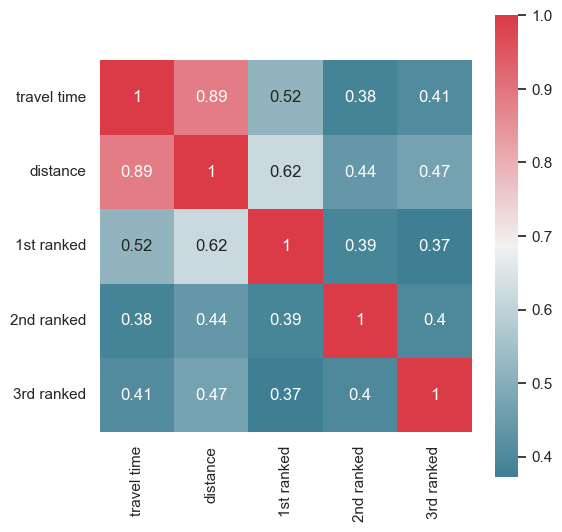

In [67]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [68]:
x = np.array(df4[['distance','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.9924982 , 0.5817108 , 0.2732473 , 0.51530593],
       [0.34431452, 0.5817108 , 0.2732473 , 0.51530593],
       [0.0187128 , 0.35615107, 0.47238947, 0.        ],
       ...,
       [0.35869106, 0.35615107, 0.58491625, 0.48953753],
       [0.01601933, 0.10290675, 0.58468512, 0.        ],
       [0.74282641, 0.5817108 , 0.59642819, 0.48953753]])

In [64]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 4)
(3332, 4)


In [66]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
417/417 [==============================] - 1s 852us/step - loss: 545096.5625 - mape: 97.5984 - rmse: 738.3066 - val_loss: 498486.7500 - val_mape: 93.0049 - val_rmse: 706.0359
Epoch 2/500
417/417 [==============================] - 0s 713us/step - loss: 452439.5938 - mape: 84.4215 - rmse: 672.6363 - val_loss: 374457.8125 - val_mape: 74.1000 - val_rmse: 611.9296
Epoch 3/500
417/417 [==============================] - 0s 710us/step - loss: 316284.1562 - mape: 63.0288 - rmse: 562.3915 - val_loss: 240184.2031 - val_mape: 51.8162 - val_rmse: 490.0859
Epoch 4/500
417/417 [==============================] - 0s 671us/step - loss: 195421.4375 - mape: 44.6608 - rmse: 442.0650 - val_loss: 143258.0781 - val_mape: 38.4061 - val_rmse: 378.4945
Epoch 5/500
417/417 [==============================] - 0s 739us/step - loss: 121420.7969 - mape: 37.9313 - rmse: 348.4549 - val_loss: 96139.2109 - val_mape: 37.4389 - val_rmse: 310.0632
Epoch 6/500
417/417 [==============================] - 0s 704us/st

417/417 [==============================] - 0s 721us/step - loss: 31946.0391 - mape: 23.0454 - rmse: 178.7345 - val_loss: 30290.9980 - val_mape: 23.5142 - val_rmse: 174.0431
Epoch 46/500
417/417 [==============================] - 0s 752us/step - loss: 31940.4082 - mape: 23.0039 - rmse: 178.7188 - val_loss: 30332.5840 - val_mape: 23.8245 - val_rmse: 174.1625
Epoch 47/500
417/417 [==============================] - 0s 705us/step - loss: 31932.7676 - mape: 23.0274 - rmse: 178.6974 - val_loss: 30290.9199 - val_mape: 23.6352 - val_rmse: 174.0429
Epoch 48/500
417/417 [==============================] - 0s 719us/step - loss: 31927.6875 - mape: 23.0096 - rmse: 178.6832 - val_loss: 30261.4590 - val_mape: 23.4380 - val_rmse: 173.9582
Epoch 49/500
417/417 [==============================] - 0s 734us/step - loss: 31914.4219 - mape: 22.9859 - rmse: 178.6461 - val_loss: 30278.8809 - val_mape: 23.6441 - val_rmse: 174.0083
Epoch 50/500
417/417 [==============================] - 0s 719us/step - loss: 31906

Epoch 133/500
417/417 [==============================] - 0s 729us/step - loss: 31474.6074 - mape: 22.4443 - rmse: 177.4108 - val_loss: 29915.5059 - val_mape: 22.6020 - val_rmse: 172.9610
Epoch 134/500
417/417 [==============================] - 0s 699us/step - loss: 31464.2129 - mape: 22.4166 - rmse: 177.3815 - val_loss: 29916.3750 - val_mape: 22.5397 - val_rmse: 172.9635
Epoch 135/500
417/417 [==============================] - 0s 715us/step - loss: 31474.6250 - mape: 22.3270 - rmse: 177.4109 - val_loss: 29922.2891 - val_mape: 22.9990 - val_rmse: 172.9806
Epoch 136/500
417/417 [==============================] - 0s 719us/step - loss: 31457.3691 - mape: 22.4619 - rmse: 177.3623 - val_loss: 29899.4121 - val_mape: 22.6745 - val_rmse: 172.9145
Epoch 137/500
417/417 [==============================] - 0s 721us/step - loss: 31463.3574 - mape: 22.3773 - rmse: 177.3791 - val_loss: 29900.4082 - val_mape: 22.8574 - val_rmse: 172.9173
Epoch 138/500
417/417 [==============================] - 0s 741us

Epoch 177/500
417/417 [==============================] - 0s 740us/step - loss: 31317.5215 - mape: 22.2593 - rmse: 176.9676 - val_loss: 29731.4023 - val_mape: 22.5234 - val_rmse: 172.4280
Epoch 178/500
417/417 [==============================] - 0s 712us/step - loss: 31306.3418 - mape: 22.2557 - rmse: 176.9360 - val_loss: 29730.4609 - val_mape: 22.6121 - val_rmse: 172.4252
Epoch 179/500
417/417 [==============================] - 0s 723us/step - loss: 31316.6426 - mape: 22.2408 - rmse: 176.9651 - val_loss: 29728.6250 - val_mape: 22.6396 - val_rmse: 172.4199
Epoch 180/500
417/417 [==============================] - 0s 720us/step - loss: 31298.9727 - mape: 22.2215 - rmse: 176.9152 - val_loss: 29741.0176 - val_mape: 22.7845 - val_rmse: 172.4558
Epoch 181/500
417/417 [==============================] - 0s 719us/step - loss: 31306.7012 - mape: 22.2370 - rmse: 176.9370 - val_loss: 29729.3340 - val_mape: 22.7052 - val_rmse: 172.4220
Epoch 182/500
417/417 [==============================] - 0s 693us

Epoch 221/500
417/417 [==============================] - 0s 721us/step - loss: 31200.4355 - mape: 22.1269 - rmse: 176.6364 - val_loss: 29599.6250 - val_mape: 22.5246 - val_rmse: 172.0454
Epoch 222/500
417/417 [==============================] - 0s 726us/step - loss: 31193.5039 - mape: 22.0457 - rmse: 176.6168 - val_loss: 29649.6367 - val_mape: 22.9168 - val_rmse: 172.1907
Epoch 223/500
417/417 [==============================] - 0s 719us/step - loss: 31199.0859 - mape: 22.1698 - rmse: 176.6326 - val_loss: 29590.4473 - val_mape: 22.4826 - val_rmse: 172.0187
Epoch 224/500
417/417 [==============================] - 0s 722us/step - loss: 31191.7090 - mape: 22.0906 - rmse: 176.6117 - val_loss: 29603.8047 - val_mape: 22.6680 - val_rmse: 172.0576
Epoch 225/500
417/417 [==============================] - 0s 723us/step - loss: 31184.5312 - mape: 22.1054 - rmse: 176.5914 - val_loss: 29720.9844 - val_mape: 23.1923 - val_rmse: 172.3978
Epoch 226/500
417/417 [==============================] - 0s 731us

Epoch 265/500
417/417 [==============================] - 0s 743us/step - loss: 31117.3535 - mape: 21.9995 - rmse: 176.4011 - val_loss: 29499.9727 - val_mape: 22.5136 - val_rmse: 171.7556
Epoch 266/500
417/417 [==============================] - 0s 720us/step - loss: 31117.3926 - mape: 22.0620 - rmse: 176.4012 - val_loss: 29486.4355 - val_mape: 22.2770 - val_rmse: 171.7161
Epoch 267/500
417/417 [==============================] - 0s 736us/step - loss: 31112.8184 - mape: 22.0552 - rmse: 176.3883 - val_loss: 29490.1816 - val_mape: 22.4254 - val_rmse: 171.7271
Epoch 268/500
417/417 [==============================] - 0s 722us/step - loss: 31110.7051 - mape: 21.9740 - rmse: 176.3823 - val_loss: 29528.8203 - val_mape: 22.7487 - val_rmse: 171.8395
Epoch 269/500
417/417 [==============================] - 0s 689us/step - loss: 31114.4121 - mape: 22.0122 - rmse: 176.3928 - val_loss: 29506.6504 - val_mape: 22.6404 - val_rmse: 171.7750
Epoch 270/500
417/417 [==============================] - 0s 699us

Epoch 309/500
417/417 [==============================] - 0s 705us/step - loss: 31071.4062 - mape: 22.0235 - rmse: 176.2708 - val_loss: 29433.6191 - val_mape: 22.3876 - val_rmse: 171.5623
Epoch 310/500
417/417 [==============================] - 0s 749us/step - loss: 31063.3105 - mape: 21.9775 - rmse: 176.2479 - val_loss: 29437.4277 - val_mape: 22.4498 - val_rmse: 171.5734
Epoch 311/500
417/417 [==============================] - 0s 742us/step - loss: 31058.4590 - mape: 22.0458 - rmse: 176.2341 - val_loss: 29425.1738 - val_mape: 22.2704 - val_rmse: 171.5377
Epoch 312/500
417/417 [==============================] - 0s 751us/step - loss: 31069.3926 - mape: 21.9400 - rmse: 176.2651 - val_loss: 29454.7637 - val_mape: 22.5881 - val_rmse: 171.6239
Epoch 313/500
417/417 [==============================] - 0s 706us/step - loss: 31070.8672 - mape: 22.0342 - rmse: 176.2693 - val_loss: 29425.4375 - val_mape: 22.2979 - val_rmse: 171.5384
Epoch 314/500
417/417 [==============================] - 0s 727us

Epoch 353/500
417/417 [==============================] - 0s 763us/step - loss: 31033.2441 - mape: 21.9893 - rmse: 176.1626 - val_loss: 29391.6973 - val_mape: 22.3220 - val_rmse: 171.4401
Epoch 354/500
417/417 [==============================] - 0s 722us/step - loss: 31030.4180 - mape: 21.9278 - rmse: 176.1545 - val_loss: 29403.0469 - val_mape: 22.4654 - val_rmse: 171.4732
Epoch 355/500
417/417 [==============================] - 0s 718us/step - loss: 31020.2754 - mape: 21.9692 - rmse: 176.1257 - val_loss: 29390.8262 - val_mape: 22.3445 - val_rmse: 171.4375
Epoch 356/500
417/417 [==============================] - 0s 708us/step - loss: 31027.1699 - mape: 21.9230 - rmse: 176.1453 - val_loss: 29403.1836 - val_mape: 22.5085 - val_rmse: 171.4736
Epoch 357/500
417/417 [==============================] - 0s 736us/step - loss: 31030.7617 - mape: 21.9943 - rmse: 176.1555 - val_loss: 29396.2070 - val_mape: 22.4362 - val_rmse: 171.4532
Epoch 358/500
417/417 [==============================] - 0s 718us

Epoch 397/500
417/417 [==============================] - 0s 692us/step - loss: 31000.1543 - mape: 21.9451 - rmse: 176.0686 - val_loss: 29358.4941 - val_mape: 22.3467 - val_rmse: 171.3432
Epoch 398/500
417/417 [==============================] - 0s 730us/step - loss: 31014.0586 - mape: 21.9719 - rmse: 176.1081 - val_loss: 29358.1055 - val_mape: 22.3299 - val_rmse: 171.3421
Epoch 399/500
417/417 [==============================] - 0s 706us/step - loss: 30997.3477 - mape: 21.9096 - rmse: 176.0606 - val_loss: 29381.2598 - val_mape: 22.5627 - val_rmse: 171.4096
Epoch 400/500
417/417 [==============================] - 0s 730us/step - loss: 30995.0957 - mape: 21.9617 - rmse: 176.0542 - val_loss: 29401.1797 - val_mape: 22.6590 - val_rmse: 171.4677
Epoch 401/500
417/417 [==============================] - 0s 758us/step - loss: 31010.0391 - mape: 21.9638 - rmse: 176.0967 - val_loss: 29369.1934 - val_mape: 22.4623 - val_rmse: 171.3744
Epoch 402/500
417/417 [==============================] - 0s 749us

Epoch 441/500
417/417 [==============================] - 0s 732us/step - loss: 30981.5645 - mape: 21.8809 - rmse: 176.0158 - val_loss: 29369.8965 - val_mape: 22.6040 - val_rmse: 171.3765
Epoch 442/500
417/417 [==============================] - 0s 748us/step - loss: 30972.4199 - mape: 21.9354 - rmse: 175.9898 - val_loss: 29397.8848 - val_mape: 22.7453 - val_rmse: 171.4581
Epoch 443/500
417/417 [==============================] - 0s 731us/step - loss: 30960.6816 - mape: 21.9072 - rmse: 175.9565 - val_loss: 29480.3867 - val_mape: 23.0317 - val_rmse: 171.6985
Epoch 444/500
417/417 [==============================] - 0s 726us/step - loss: 30975.7988 - mape: 21.9419 - rmse: 175.9994 - val_loss: 29391.3477 - val_mape: 22.7312 - val_rmse: 171.4391
Epoch 445/500
417/417 [==============================] - 0s 719us/step - loss: 30975.9707 - mape: 21.9754 - rmse: 175.9999 - val_loss: 29329.1738 - val_mape: 22.1892 - val_rmse: 171.2576
Epoch 446/500
417/417 [==============================] - 0s 759us

Epoch 485/500
417/417 [==============================] - 0s 716us/step - loss: 30958.0469 - mape: 21.8982 - rmse: 175.9490 - val_loss: 29311.4473 - val_mape: 22.1806 - val_rmse: 171.2059
Epoch 486/500
417/417 [==============================] - 0s 719us/step - loss: 30956.0195 - mape: 21.8963 - rmse: 175.9432 - val_loss: 29324.7754 - val_mape: 22.4441 - val_rmse: 171.2448
Epoch 487/500
417/417 [==============================] - 0s 721us/step - loss: 30956.3242 - mape: 21.9361 - rmse: 175.9441 - val_loss: 29310.1367 - val_mape: 22.1647 - val_rmse: 171.2020
Epoch 488/500
417/417 [==============================] - 0s 734us/step - loss: 30952.6309 - mape: 21.9048 - rmse: 175.9336 - val_loss: 29310.0098 - val_mape: 22.2107 - val_rmse: 171.2017
Epoch 489/500
417/417 [==============================] - 0s 717us/step - loss: 30945.6133 - mape: 21.8645 - rmse: 175.9137 - val_loss: 29344.7539 - val_mape: 22.5685 - val_rmse: 171.3031
Epoch 490/500
417/417 [==============================] - 0s 762us

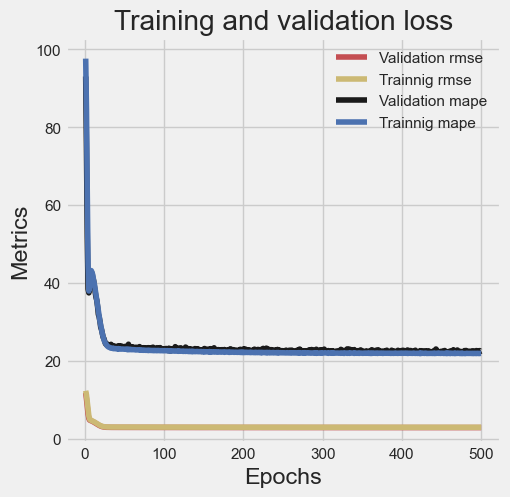

In [67]:
plotme(model4_1_1)

In [98]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
417/417 [==============================] - 1s 882us/step - loss: 528026.5000 - mape: 95.2237 - rmse: 726.6543 - val_loss: 449178.6875 - val_mape: 85.8084 - val_rmse: 670.2079
Epoch 2/500
417/417 [==============================] - 0s 739us/step - loss: 361991.2188 - mape: 70.1594 - rmse: 601.6570 - val_loss: 251309.0469 - val_mape: 53.6219 - val_rmse: 501.3073
Epoch 3/500
417/417 [==============================] - 0s 746us/step - loss: 182531.0781 - mape: 43.6518 - rmse: 427.2366 - val_loss: 117691.3438 - val_mape: 36.9411 - val_rmse: 343.0617
Epoch 4/500
417/417 [==============================] - 0s 745us/step - loss: 99666.1562 - mape: 38.9080 - rmse: 315.6995 - val_loss: 83049.5625 - val_mape: 40.6916 - val_rmse: 288.1832
Epoch 5/500
417/417 [==============================] - 0s 754us/step - loss: 82794.2500 - mape: 42.5370 - rmse: 287.7399 - val_loss: 77762.6797 - val_mape: 43.3075 - val_rmse: 278.8596
Epoch 6/500
417/417 [==============================] - 0s 765us/step 

417/417 [==============================] - 0s 748us/step - loss: 31920.0410 - mape: 23.0330 - rmse: 178.6618 - val_loss: 30252.7812 - val_mape: 23.4760 - val_rmse: 173.9333
Epoch 46/500
417/417 [==============================] - 0s 741us/step - loss: 31917.7734 - mape: 23.0334 - rmse: 178.6555 - val_loss: 30240.6113 - val_mape: 23.4162 - val_rmse: 173.8983
Epoch 47/500
417/417 [==============================] - 0s 733us/step - loss: 31895.1504 - mape: 23.0087 - rmse: 178.5921 - val_loss: 30288.0273 - val_mape: 23.7881 - val_rmse: 174.0346
Epoch 48/500
417/417 [==============================] - 0s 726us/step - loss: 31892.0625 - mape: 22.9783 - rmse: 178.5835 - val_loss: 30244.7188 - val_mape: 23.5798 - val_rmse: 173.9101
Epoch 49/500
417/417 [==============================] - 0s 738us/step - loss: 31856.6211 - mape: 22.9549 - rmse: 178.4842 - val_loss: 30212.7246 - val_mape: 23.2764 - val_rmse: 173.8181
Epoch 50/500
417/417 [==============================] - 0s 737us/step - loss: 31849

Epoch 133/500
417/417 [==============================] - 0s 747us/step - loss: 31399.5039 - mape: 22.4236 - rmse: 177.1991 - val_loss: 29822.1270 - val_mape: 22.6322 - val_rmse: 172.6908
Epoch 134/500
417/417 [==============================] - 0s 730us/step - loss: 31407.2246 - mape: 22.3968 - rmse: 177.2208 - val_loss: 29829.7266 - val_mape: 22.9740 - val_rmse: 172.7128
Epoch 135/500
417/417 [==============================] - 0s 743us/step - loss: 31385.9844 - mape: 22.3866 - rmse: 177.1609 - val_loss: 29871.1035 - val_mape: 23.2607 - val_rmse: 172.8326
Epoch 136/500
417/417 [==============================] - 0s 741us/step - loss: 31391.9277 - mape: 22.4354 - rmse: 177.1777 - val_loss: 29833.0996 - val_mape: 23.0484 - val_rmse: 172.7226
Epoch 137/500
417/417 [==============================] - 0s 741us/step - loss: 31383.7129 - mape: 22.3995 - rmse: 177.1545 - val_loss: 29812.4727 - val_mape: 22.9102 - val_rmse: 172.6629
Epoch 138/500
417/417 [==============================] - 0s 733us

Epoch 177/500
417/417 [==============================] - 0s 742us/step - loss: 31217.7930 - mape: 22.2259 - rmse: 176.6856 - val_loss: 29619.2500 - val_mape: 22.5312 - val_rmse: 172.1024
Epoch 178/500
417/417 [==============================] - 0s 747us/step - loss: 31210.3926 - mape: 22.2583 - rmse: 176.6646 - val_loss: 29639.4492 - val_mape: 22.2529 - val_rmse: 172.1611
Epoch 179/500
417/417 [==============================] - 0s 738us/step - loss: 31227.3008 - mape: 22.1394 - rmse: 176.7125 - val_loss: 29649.8398 - val_mape: 22.9109 - val_rmse: 172.1913
Epoch 180/500
417/417 [==============================] - 0s 739us/step - loss: 31212.7363 - mape: 22.2293 - rmse: 176.6713 - val_loss: 29615.3945 - val_mape: 22.6772 - val_rmse: 172.0912
Epoch 181/500
417/417 [==============================] - 0s 751us/step - loss: 31207.5352 - mape: 22.2026 - rmse: 176.6565 - val_loss: 29647.1973 - val_mape: 22.9103 - val_rmse: 172.1836
Epoch 182/500
417/417 [==============================] - 0s 734us

Epoch 221/500
417/417 [==============================] - 0s 733us/step - loss: 31111.1445 - mape: 22.1094 - rmse: 176.3835 - val_loss: 29530.0664 - val_mape: 22.7832 - val_rmse: 171.8431
Epoch 222/500
417/417 [==============================] - 0s 733us/step - loss: 31112.5098 - mape: 22.0722 - rmse: 176.3874 - val_loss: 29533.4980 - val_mape: 22.8246 - val_rmse: 171.8531
Epoch 223/500
417/417 [==============================] - 0s 727us/step - loss: 31124.1035 - mape: 22.1472 - rmse: 176.4202 - val_loss: 29491.3477 - val_mape: 22.4731 - val_rmse: 171.7305
Epoch 224/500
417/417 [==============================] - 0s 727us/step - loss: 31111.2734 - mape: 22.0979 - rmse: 176.3839 - val_loss: 29531.9160 - val_mape: 22.8552 - val_rmse: 171.8485
Epoch 225/500
417/417 [==============================] - 0s 730us/step - loss: 31099.0605 - mape: 22.1444 - rmse: 176.3493 - val_loss: 29549.2422 - val_mape: 22.8981 - val_rmse: 171.8989
Epoch 226/500
417/417 [==============================] - 0s 737us

Epoch 265/500
417/417 [==============================] - 0s 750us/step - loss: 31052.3652 - mape: 22.0143 - rmse: 176.2168 - val_loss: 29426.4004 - val_mape: 22.5128 - val_rmse: 171.5412
Epoch 266/500
417/417 [==============================] - 0s 749us/step - loss: 31035.3965 - mape: 22.0314 - rmse: 176.1687 - val_loss: 29422.9824 - val_mape: 22.1471 - val_rmse: 171.5313
Epoch 267/500
417/417 [==============================] - 0s 739us/step - loss: 31042.8086 - mape: 22.0479 - rmse: 176.1897 - val_loss: 29412.7617 - val_mape: 22.3402 - val_rmse: 171.5015
Epoch 268/500
417/417 [==============================] - 0s 736us/step - loss: 31031.7305 - mape: 22.0646 - rmse: 176.1582 - val_loss: 29425.0391 - val_mape: 22.5086 - val_rmse: 171.5373
Epoch 269/500
417/417 [==============================] - 0s 739us/step - loss: 31038.9980 - mape: 21.9633 - rmse: 176.1789 - val_loss: 29419.6504 - val_mape: 22.5045 - val_rmse: 171.5216
Epoch 270/500
417/417 [==============================] - 0s 739us

Epoch 309/500
417/417 [==============================] - 0s 736us/step - loss: 30999.6602 - mape: 22.0162 - rmse: 176.0672 - val_loss: 29478.7637 - val_mape: 22.9931 - val_rmse: 171.6938
Epoch 310/500
417/417 [==============================] - 0s 739us/step - loss: 31011.9844 - mape: 22.0666 - rmse: 176.1022 - val_loss: 29412.9492 - val_mape: 22.7134 - val_rmse: 171.5020
Epoch 311/500
417/417 [==============================] - 0s 735us/step - loss: 30994.2891 - mape: 22.0130 - rmse: 176.0520 - val_loss: 29367.2266 - val_mape: 22.1110 - val_rmse: 171.3687
Epoch 312/500
417/417 [==============================] - 0s 729us/step - loss: 31007.7383 - mape: 21.9715 - rmse: 176.0901 - val_loss: 29362.9414 - val_mape: 22.3534 - val_rmse: 171.3562
Epoch 313/500
417/417 [==============================] - 0s 738us/step - loss: 30993.0020 - mape: 21.9859 - rmse: 176.0483 - val_loss: 29525.2246 - val_mape: 23.1331 - val_rmse: 171.8291
Epoch 314/500
417/417 [==============================] - 0s 736us

Epoch 353/500
417/417 [==============================] - 0s 728us/step - loss: 30967.1035 - mape: 21.9817 - rmse: 175.9747 - val_loss: 29375.1797 - val_mape: 22.6976 - val_rmse: 171.3919
Epoch 354/500
417/417 [==============================] - 0s 743us/step - loss: 30973.1465 - mape: 21.9870 - rmse: 175.9919 - val_loss: 29328.2324 - val_mape: 22.2840 - val_rmse: 171.2549
Epoch 355/500
417/417 [==============================] - 0s 738us/step - loss: 30971.3945 - mape: 21.9533 - rmse: 175.9869 - val_loss: 29363.1602 - val_mape: 22.6198 - val_rmse: 171.3568
Epoch 356/500
417/417 [==============================] - 0s 737us/step - loss: 30940.7988 - mape: 22.0000 - rmse: 175.9000 - val_loss: 29325.1816 - val_mape: 22.2400 - val_rmse: 171.2460
Epoch 357/500
417/417 [==============================] - 0s 730us/step - loss: 30967.3906 - mape: 21.8848 - rmse: 175.9755 - val_loss: 29421.7090 - val_mape: 22.9232 - val_rmse: 171.5276
Epoch 358/500
417/417 [==============================] - 0s 741us

Epoch 397/500
417/417 [==============================] - 0s 743us/step - loss: 30948.6992 - mape: 21.9875 - rmse: 175.9224 - val_loss: 29329.9199 - val_mape: 21.9682 - val_rmse: 171.2598
Epoch 398/500
417/417 [==============================] - 0s 733us/step - loss: 30952.7930 - mape: 21.9612 - rmse: 175.9341 - val_loss: 29319.9766 - val_mape: 22.4568 - val_rmse: 171.2308
Epoch 399/500
417/417 [==============================] - 0s 734us/step - loss: 30950.7832 - mape: 21.9630 - rmse: 175.9283 - val_loss: 29385.2285 - val_mape: 22.7861 - val_rmse: 171.4212
Epoch 400/500
417/417 [==============================] - 0s 744us/step - loss: 30946.1484 - mape: 21.9611 - rmse: 175.9152 - val_loss: 29305.8984 - val_mape: 22.1592 - val_rmse: 171.1897
Epoch 401/500
417/417 [==============================] - 0s 739us/step - loss: 30930.5664 - mape: 21.9546 - rmse: 175.8709 - val_loss: 29415.4160 - val_mape: 22.8954 - val_rmse: 171.5092
Epoch 402/500
417/417 [==============================] - 0s 736us

Epoch 441/500
417/417 [==============================] - 0s 727us/step - loss: 30933.1758 - mape: 21.9759 - rmse: 175.8783 - val_loss: 29298.9277 - val_mape: 22.0571 - val_rmse: 171.1693
Epoch 442/500
417/417 [==============================] - 0s 737us/step - loss: 30934.7930 - mape: 21.9463 - rmse: 175.8829 - val_loss: 29294.9297 - val_mape: 22.0963 - val_rmse: 171.1576
Epoch 443/500
417/417 [==============================] - 0s 746us/step - loss: 30928.7832 - mape: 21.9288 - rmse: 175.8658 - val_loss: 29305.5801 - val_mape: 21.9972 - val_rmse: 171.1887
Epoch 444/500
417/417 [==============================] - 0s 731us/step - loss: 30932.8730 - mape: 21.9687 - rmse: 175.8774 - val_loss: 29361.4355 - val_mape: 22.7197 - val_rmse: 171.3518
Epoch 445/500
417/417 [==============================] - 0s 734us/step - loss: 30928.1875 - mape: 21.9374 - rmse: 175.8641 - val_loss: 29302.7871 - val_mape: 22.3793 - val_rmse: 171.1806
Epoch 446/500
417/417 [==============================] - 0s 732us

Epoch 485/500
417/417 [==============================] - 0s 732us/step - loss: 30924.0371 - mape: 21.9483 - rmse: 175.8523 - val_loss: 29292.9043 - val_mape: 22.0670 - val_rmse: 171.1517
Epoch 486/500
417/417 [==============================] - 0s 732us/step - loss: 30897.7051 - mape: 21.9368 - rmse: 175.7774 - val_loss: 29374.8242 - val_mape: 22.8058 - val_rmse: 171.3909
Epoch 487/500
417/417 [==============================] - 0s 731us/step - loss: 30918.0508 - mape: 21.8831 - rmse: 175.8353 - val_loss: 29373.1113 - val_mape: 22.8187 - val_rmse: 171.3858
Epoch 488/500
417/417 [==============================] - 0s 739us/step - loss: 30928.0605 - mape: 21.9437 - rmse: 175.8638 - val_loss: 29349.8867 - val_mape: 22.7449 - val_rmse: 171.3181
Epoch 489/500
417/417 [==============================] - 0s 742us/step - loss: 30917.5840 - mape: 21.9676 - rmse: 175.8340 - val_loss: 29316.7207 - val_mape: 22.5522 - val_rmse: 171.2213
Epoch 490/500
417/417 [==============================] - 0s 744us

In [99]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
417/417 [==============================] - 1s 889us/step - loss: 502461.8750 - mape: 91.3731 - rmse: 708.8455 - val_loss: 376312.1250 - val_mape: 74.3475 - val_rmse: 613.4429
Epoch 2/500
417/417 [==============================] - 0s 765us/step - loss: 249367.2031 - mape: 52.9998 - rmse: 499.3668 - val_loss: 133119.8594 - val_mape: 37.6192 - val_rmse: 364.8560
Epoch 3/500
417/417 [==============================] - 0s 744us/step - loss: 101505.1562 - mape: 39.2085 - rmse: 318.5987 - val_loss: 81106.2500 - val_mape: 41.6608 - val_rmse: 284.7916
Epoch 4/500
417/417 [==============================] - 0s 754us/step - loss: 80756.3672 - mape: 43.0168 - rmse: 284.1766 - val_loss: 75242.0000 - val_mape: 42.8310 - val_rmse: 274.3028
Epoch 5/500
417/417 [==============================] - 0s 746us/step - loss: 74415.7109 - mape: 41.9971 - rmse: 272.7924 - val_loss: 68830.9062 - val_mape: 41.3256 - val_rmse: 262.3564
Epoch 6/500
417/417 [==============================] - 0s 749us/step -

417/417 [==============================] - 0s 752us/step - loss: 31766.1074 - mape: 22.7802 - rmse: 178.2305 - val_loss: 30140.8574 - val_mape: 23.0867 - val_rmse: 173.6112
Epoch 46/500
417/417 [==============================] - 0s 748us/step - loss: 31724.7988 - mape: 22.8136 - rmse: 178.1146 - val_loss: 30135.7930 - val_mape: 22.9273 - val_rmse: 173.5966
Epoch 47/500
417/417 [==============================] - 0s 747us/step - loss: 31715.4355 - mape: 22.7425 - rmse: 178.0883 - val_loss: 30122.8770 - val_mape: 23.0266 - val_rmse: 173.5594
Epoch 48/500
417/417 [==============================] - 0s 749us/step - loss: 31722.8301 - mape: 22.7588 - rmse: 178.1090 - val_loss: 30148.6211 - val_mape: 23.4566 - val_rmse: 173.6336
Epoch 49/500
417/417 [==============================] - 0s 745us/step - loss: 31705.2266 - mape: 22.7677 - rmse: 178.0596 - val_loss: 30108.3457 - val_mape: 23.1915 - val_rmse: 173.5176
Epoch 50/500
417/417 [==============================] - 0s 749us/step - loss: 31706

Epoch 133/500
417/417 [==============================] - 0s 751us/step - loss: 31170.7793 - mape: 22.1470 - rmse: 176.5525 - val_loss: 29543.1133 - val_mape: 22.6755 - val_rmse: 171.8811
Epoch 134/500
417/417 [==============================] - 0s 754us/step - loss: 31160.0859 - mape: 22.1760 - rmse: 176.5222 - val_loss: 29578.6152 - val_mape: 22.8822 - val_rmse: 171.9843
Epoch 135/500
417/417 [==============================] - 0s 754us/step - loss: 31174.7734 - mape: 22.0702 - rmse: 176.5638 - val_loss: 29743.9961 - val_mape: 23.4896 - val_rmse: 172.4645
Epoch 136/500
417/417 [==============================] - 0s 755us/step - loss: 31146.4355 - mape: 22.2117 - rmse: 176.4835 - val_loss: 29602.4082 - val_mape: 21.8400 - val_rmse: 172.0535
Epoch 137/500
417/417 [==============================] - 0s 748us/step - loss: 31150.7402 - mape: 22.0590 - rmse: 176.4957 - val_loss: 29659.5098 - val_mape: 23.2708 - val_rmse: 172.2194
Epoch 138/500
417/417 [==============================] - 0s 751us

Epoch 177/500
417/417 [==============================] - 0s 746us/step - loss: 31032.7246 - mape: 22.0018 - rmse: 176.1611 - val_loss: 29376.1504 - val_mape: 22.0965 - val_rmse: 171.3947
Epoch 178/500
417/417 [==============================] - 0s 779us/step - loss: 31027.9219 - mape: 21.8998 - rmse: 176.1474 - val_loss: 29509.5645 - val_mape: 23.0492 - val_rmse: 171.7835
Epoch 179/500
417/417 [==============================] - 0s 749us/step - loss: 31046.4355 - mape: 21.9537 - rmse: 176.2000 - val_loss: 29464.5723 - val_mape: 22.9324 - val_rmse: 171.6525
Epoch 180/500
417/417 [==============================] - 0s 760us/step - loss: 31033.6523 - mape: 22.0456 - rmse: 176.1637 - val_loss: 29380.9512 - val_mape: 21.9652 - val_rmse: 171.4087
Epoch 181/500
417/417 [==============================] - 0s 741us/step - loss: 31035.6250 - mape: 21.9629 - rmse: 176.1693 - val_loss: 29400.9395 - val_mape: 22.6050 - val_rmse: 171.4670
Epoch 182/500
417/417 [==============================] - 0s 748us

Epoch 221/500
417/417 [==============================] - 0s 749us/step - loss: 30982.7207 - mape: 21.8996 - rmse: 176.0191 - val_loss: 29341.1211 - val_mape: 22.5207 - val_rmse: 171.2925
Epoch 222/500
417/417 [==============================] - 0s 750us/step - loss: 30968.6582 - mape: 21.9512 - rmse: 175.9791 - val_loss: 29307.4316 - val_mape: 22.0508 - val_rmse: 171.1941
Epoch 223/500
417/417 [==============================] - 0s 752us/step - loss: 30975.4180 - mape: 21.8829 - rmse: 175.9984 - val_loss: 29340.9512 - val_mape: 22.5068 - val_rmse: 171.2920
Epoch 224/500
417/417 [==============================] - 0s 754us/step - loss: 30960.9414 - mape: 21.8928 - rmse: 175.9572 - val_loss: 29304.1875 - val_mape: 22.0988 - val_rmse: 171.1847
Epoch 225/500
417/417 [==============================] - 0s 745us/step - loss: 30978.4277 - mape: 21.8812 - rmse: 176.0069 - val_loss: 29350.8516 - val_mape: 22.5871 - val_rmse: 171.3209
Epoch 226/500
417/417 [==============================] - 0s 746us

Epoch 265/500
417/417 [==============================] - 0s 756us/step - loss: 30927.5410 - mape: 21.8399 - rmse: 175.8623 - val_loss: 29269.2559 - val_mape: 22.0553 - val_rmse: 171.0826
Epoch 266/500
417/417 [==============================] - 0s 748us/step - loss: 30905.6035 - mape: 21.8114 - rmse: 175.7999 - val_loss: 29341.8105 - val_mape: 21.5812 - val_rmse: 171.2945
Epoch 267/500
417/417 [==============================] - 0s 754us/step - loss: 30932.2344 - mape: 21.8765 - rmse: 175.8756 - val_loss: 29270.9414 - val_mape: 21.9461 - val_rmse: 171.0875
Epoch 268/500
417/417 [==============================] - 0s 751us/step - loss: 30925.2578 - mape: 21.7816 - rmse: 175.8558 - val_loss: 29267.5742 - val_mape: 22.1863 - val_rmse: 171.0777
Epoch 269/500
417/417 [==============================] - 0s 751us/step - loss: 30893.4805 - mape: 21.8448 - rmse: 175.7654 - val_loss: 29448.2793 - val_mape: 23.0285 - val_rmse: 171.6050
Epoch 270/500
417/417 [==============================] - 0s 745us

Epoch 309/500
417/417 [==============================] - 0s 751us/step - loss: 30888.1836 - mape: 21.7897 - rmse: 175.7504 - val_loss: 29242.9805 - val_mape: 21.9351 - val_rmse: 171.0058
Epoch 310/500
417/417 [==============================] - 0s 749us/step - loss: 30880.8809 - mape: 21.7567 - rmse: 175.7296 - val_loss: 29242.0977 - val_mape: 22.0814 - val_rmse: 171.0032
Epoch 311/500
417/417 [==============================] - 0s 744us/step - loss: 30865.3105 - mape: 21.8347 - rmse: 175.6853 - val_loss: 29315.6152 - val_mape: 21.4696 - val_rmse: 171.2180
Epoch 312/500
417/417 [==============================] - 0s 739us/step - loss: 30885.6895 - mape: 21.7005 - rmse: 175.7433 - val_loss: 29256.9316 - val_mape: 22.2621 - val_rmse: 171.0466
Epoch 313/500
417/417 [==============================] - 0s 746us/step - loss: 30877.6699 - mape: 21.7690 - rmse: 175.7204 - val_loss: 29333.3965 - val_mape: 22.6812 - val_rmse: 171.2700
Epoch 314/500
417/417 [==============================] - 0s 744us

Epoch 353/500
417/417 [==============================] - 0s 744us/step - loss: 30881.9062 - mape: 21.7789 - rmse: 175.7325 - val_loss: 29220.9414 - val_mape: 21.8898 - val_rmse: 170.9413
Epoch 354/500
417/417 [==============================] - 0s 747us/step - loss: 30859.9414 - mape: 21.6635 - rmse: 175.6700 - val_loss: 29269.8887 - val_mape: 22.4623 - val_rmse: 171.0844
Epoch 355/500
417/417 [==============================] - 0s 745us/step - loss: 30855.9316 - mape: 21.7490 - rmse: 175.6586 - val_loss: 29226.2109 - val_mape: 22.1784 - val_rmse: 170.9568
Epoch 356/500
417/417 [==============================] - 0s 750us/step - loss: 30833.6973 - mape: 21.6819 - rmse: 175.5953 - val_loss: 29582.1230 - val_mape: 23.4380 - val_rmse: 171.9945
Epoch 357/500
417/417 [==============================] - 0s 742us/step - loss: 30857.7285 - mape: 21.8139 - rmse: 175.6637 - val_loss: 29235.3340 - val_mape: 22.2730 - val_rmse: 170.9834
Epoch 358/500
417/417 [==============================] - 0s 744us

Epoch 397/500
417/417 [==============================] - 0s 742us/step - loss: 30851.1777 - mape: 21.6782 - rmse: 175.6450 - val_loss: 29205.8848 - val_mape: 22.0031 - val_rmse: 170.8973
Epoch 398/500
417/417 [==============================] - 0s 738us/step - loss: 30835.8535 - mape: 21.6924 - rmse: 175.6014 - val_loss: 29368.8398 - val_mape: 22.8543 - val_rmse: 171.3734
Epoch 399/500
417/417 [==============================] - 0s 741us/step - loss: 30871.5117 - mape: 21.7340 - rmse: 175.7029 - val_loss: 29231.6406 - val_mape: 22.3256 - val_rmse: 170.9726
Epoch 400/500
417/417 [==============================] - 0s 734us/step - loss: 30820.3613 - mape: 21.7481 - rmse: 175.5573 - val_loss: 29202.3789 - val_mape: 22.0201 - val_rmse: 170.8870
Epoch 401/500
417/417 [==============================] - 0s 740us/step - loss: 30827.7793 - mape: 21.7169 - rmse: 175.5784 - val_loss: 29209.3496 - val_mape: 22.0698 - val_rmse: 170.9074
Epoch 402/500
417/417 [==============================] - 0s 738us

Epoch 441/500
417/417 [==============================] - 0s 746us/step - loss: 30818.0684 - mape: 21.6583 - rmse: 175.5508 - val_loss: 29262.7500 - val_mape: 22.5148 - val_rmse: 171.0636
Epoch 442/500
417/417 [==============================] - 0s 746us/step - loss: 30812.4961 - mape: 21.7568 - rmse: 175.5349 - val_loss: 29187.9375 - val_mape: 21.8646 - val_rmse: 170.8448
Epoch 443/500
417/417 [==============================] - 0s 745us/step - loss: 30820.3242 - mape: 21.6588 - rmse: 175.5572 - val_loss: 29192.4824 - val_mape: 22.0779 - val_rmse: 170.8581
Epoch 444/500
417/417 [==============================] - 0s 748us/step - loss: 30807.7500 - mape: 21.6725 - rmse: 175.5214 - val_loss: 29280.9492 - val_mape: 22.6285 - val_rmse: 171.1168
Epoch 445/500
417/417 [==============================] - 0s 744us/step - loss: 30826.2090 - mape: 21.7339 - rmse: 175.5739 - val_loss: 29199.0117 - val_mape: 22.1216 - val_rmse: 170.8772
Epoch 446/500
417/417 [==============================] - 0s 748us

Epoch 485/500
417/417 [==============================] - 0s 750us/step - loss: 30802.4395 - mape: 21.6501 - rmse: 175.5062 - val_loss: 29182.1680 - val_mape: 22.0047 - val_rmse: 170.8279
Epoch 486/500
417/417 [==============================] - 0s 741us/step - loss: 30798.2246 - mape: 21.6744 - rmse: 175.4942 - val_loss: 29229.5176 - val_mape: 22.3526 - val_rmse: 170.9664
Epoch 487/500
417/417 [==============================] - 0s 744us/step - loss: 30805.5137 - mape: 21.6829 - rmse: 175.5150 - val_loss: 29237.8926 - val_mape: 22.3983 - val_rmse: 170.9909
Epoch 488/500
417/417 [==============================] - 0s 749us/step - loss: 30798.9727 - mape: 21.6220 - rmse: 175.4964 - val_loss: 29266.1172 - val_mape: 22.5621 - val_rmse: 171.0734
Epoch 489/500
417/417 [==============================] - 0s 741us/step - loss: 30796.2539 - mape: 21.7273 - rmse: 175.4886 - val_loss: 29183.2168 - val_mape: 22.0354 - val_rmse: 170.8310
Epoch 490/500
417/417 [==============================] - 0s 745us

In [100]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
417/417 [==============================] - 1s 939us/step - loss: 280602.9375 - mape: 63.9822 - rmse: 529.7197 - val_loss: 76983.0781 - val_mape: 45.3232 - val_rmse: 277.4583
Epoch 2/500
417/417 [==============================] - 0s 784us/step - loss: 72197.3828 - mape: 42.3819 - rmse: 268.6957 - val_loss: 62675.7734 - val_mape: 40.0752 - val_rmse: 250.3513
Epoch 3/500
417/417 [==============================] - 0s 786us/step - loss: 56538.6250 - mape: 37.0328 - rmse: 237.7785 - val_loss: 46806.0039 - val_mape: 34.4616 - val_rmse: 216.3470
Epoch 4/500
417/417 [==============================] - 0s 785us/step - loss: 41535.3242 - mape: 30.4659 - rmse: 203.8022 - val_loss: 34737.2227 - val_mape: 28.5352 - val_rmse: 186.3792
Epoch 5/500
417/417 [==============================] - 0s 785us/step - loss: 33647.2812 - mape: 25.1548 - rmse: 183.4319 - val_loss: 30757.4766 - val_mape: 24.5234 - val_rmse: 175.3781
Epoch 6/500
417/417 [==============================] - 0s 795us/step - los

417/417 [==============================] - 0s 787us/step - loss: 31644.0742 - mape: 22.7353 - rmse: 177.8878 - val_loss: 29936.6152 - val_mape: 23.3649 - val_rmse: 173.0220
Epoch 90/500
417/417 [==============================] - 0s 782us/step - loss: 31624.9648 - mape: 22.5667 - rmse: 177.8341 - val_loss: 29909.2676 - val_mape: 22.5417 - val_rmse: 172.9430
Epoch 91/500
417/417 [==============================] - 0s 785us/step - loss: 31564.1113 - mape: 22.6655 - rmse: 177.6629 - val_loss: 29876.0195 - val_mape: 22.5690 - val_rmse: 172.8468
Epoch 92/500
417/417 [==============================] - 0s 787us/step - loss: 31608.7344 - mape: 22.6046 - rmse: 177.7885 - val_loss: 29876.1992 - val_mape: 22.8152 - val_rmse: 172.8473
Epoch 93/500
417/417 [==============================] - 0s 787us/step - loss: 31587.6074 - mape: 22.6064 - rmse: 177.7290 - val_loss: 29952.4727 - val_mape: 22.3495 - val_rmse: 173.0678
Epoch 94/500
417/417 [==============================] - 0s 775us/step - loss: 31558

Epoch 133/500
417/417 [==============================] - 0s 792us/step - loss: 31451.9414 - mape: 22.5578 - rmse: 177.3470 - val_loss: 30093.5469 - val_mape: 24.1566 - val_rmse: 173.4749
Epoch 134/500
417/417 [==============================] - 0s 787us/step - loss: 31425.5391 - mape: 22.5063 - rmse: 177.2725 - val_loss: 29806.7227 - val_mape: 22.3486 - val_rmse: 172.6462
Epoch 135/500
417/417 [==============================] - 0s 784us/step - loss: 31490.8379 - mape: 22.4697 - rmse: 177.4566 - val_loss: 30577.5566 - val_mape: 25.0756 - val_rmse: 174.8644
Epoch 136/500
417/417 [==============================] - 0s 830us/step - loss: 31451.8789 - mape: 22.5258 - rmse: 177.3468 - val_loss: 29886.0312 - val_mape: 23.7324 - val_rmse: 172.8758
Epoch 137/500
417/417 [==============================] - 0s 781us/step - loss: 31412.2129 - mape: 22.5651 - rmse: 177.2349 - val_loss: 29774.1875 - val_mape: 22.9030 - val_rmse: 172.5520
Epoch 138/500
417/417 [==============================] - 0s 784us

Epoch 177/500
417/417 [==============================] - 0s 793us/step - loss: 31295.7949 - mape: 22.4096 - rmse: 176.9062 - val_loss: 29647.8105 - val_mape: 22.7518 - val_rmse: 172.1854
Epoch 178/500
417/417 [==============================] - 0s 781us/step - loss: 31329.9590 - mape: 22.3713 - rmse: 177.0027 - val_loss: 29641.9863 - val_mape: 22.7837 - val_rmse: 172.1685
Epoch 179/500
417/417 [==============================] - 0s 788us/step - loss: 31287.3027 - mape: 22.4704 - rmse: 176.8822 - val_loss: 29954.0449 - val_mape: 21.6718 - val_rmse: 173.0724
Epoch 180/500
417/417 [==============================] - 0s 795us/step - loss: 31375.7676 - mape: 22.4218 - rmse: 177.1321 - val_loss: 29696.7031 - val_mape: 23.0784 - val_rmse: 172.3273
Epoch 181/500
417/417 [==============================] - 0s 781us/step - loss: 31325.1660 - mape: 22.3999 - rmse: 176.9892 - val_loss: 29649.0996 - val_mape: 22.9228 - val_rmse: 172.1891
Epoch 182/500
417/417 [==============================] - 0s 787us

Epoch 221/500
417/417 [==============================] - 0s 780us/step - loss: 31116.5547 - mape: 22.3651 - rmse: 176.3988 - val_loss: 29457.4414 - val_mape: 21.9038 - val_rmse: 171.6317
Epoch 222/500
417/417 [==============================] - 0s 768us/step - loss: 31154.2207 - mape: 22.2381 - rmse: 176.5056 - val_loss: 29379.7793 - val_mape: 22.6771 - val_rmse: 171.4053
Epoch 223/500
417/417 [==============================] - 0s 773us/step - loss: 31149.3906 - mape: 22.2933 - rmse: 176.4919 - val_loss: 29687.3477 - val_mape: 23.7880 - val_rmse: 172.3002
Epoch 224/500
417/417 [==============================] - 0s 778us/step - loss: 31148.8691 - mape: 22.2183 - rmse: 176.4904 - val_loss: 29519.8926 - val_mape: 23.4822 - val_rmse: 171.8135
Epoch 225/500
417/417 [==============================] - 0s 788us/step - loss: 31155.8398 - mape: 22.3382 - rmse: 176.5102 - val_loss: 29652.8867 - val_mape: 21.5167 - val_rmse: 172.2001
Epoch 226/500
417/417 [==============================] - 0s 777us

Epoch 265/500
417/417 [==============================] - 0s 786us/step - loss: 31050.4648 - mape: 22.2265 - rmse: 176.2114 - val_loss: 29234.6426 - val_mape: 22.5229 - val_rmse: 170.9814
Epoch 266/500
417/417 [==============================] - 0s 788us/step - loss: 30999.4336 - mape: 22.1423 - rmse: 176.0666 - val_loss: 29776.5449 - val_mape: 24.3963 - val_rmse: 172.5588
Epoch 267/500
417/417 [==============================] - 0s 785us/step - loss: 31021.0156 - mape: 22.2278 - rmse: 176.1278 - val_loss: 29410.8613 - val_mape: 23.4025 - val_rmse: 171.4960
Epoch 268/500
417/417 [==============================] - 0s 786us/step - loss: 31064.3379 - mape: 22.2023 - rmse: 176.2508 - val_loss: 29536.4004 - val_mape: 23.7725 - val_rmse: 171.8616
Epoch 269/500
417/417 [==============================] - 0s 784us/step - loss: 31024.0078 - mape: 22.1967 - rmse: 176.1363 - val_loss: 29709.2598 - val_mape: 24.0209 - val_rmse: 172.3637
Epoch 270/500
417/417 [==============================] - 0s 788us

Epoch 309/500
417/417 [==============================] - 0s 788us/step - loss: 30997.4609 - mape: 22.1466 - rmse: 176.0610 - val_loss: 29383.8359 - val_mape: 23.2262 - val_rmse: 171.4171
Epoch 310/500
417/417 [==============================] - 0s 784us/step - loss: 30965.4023 - mape: 22.0712 - rmse: 175.9699 - val_loss: 29458.7539 - val_mape: 23.8064 - val_rmse: 171.6355
Epoch 311/500
417/417 [==============================] - 0s 782us/step - loss: 31006.4082 - mape: 22.2851 - rmse: 176.0864 - val_loss: 29355.2559 - val_mape: 23.1345 - val_rmse: 171.3338
Epoch 312/500
417/417 [==============================] - 0s 787us/step - loss: 31001.9727 - mape: 22.1286 - rmse: 176.0738 - val_loss: 29194.8711 - val_mape: 22.0342 - val_rmse: 170.8651
Epoch 313/500
417/417 [==============================] - 0s 786us/step - loss: 30978.3320 - mape: 22.1462 - rmse: 176.0066 - val_loss: 29212.5566 - val_mape: 22.7193 - val_rmse: 170.9168
Epoch 314/500
417/417 [==============================] - 0s 789us

Epoch 353/500
417/417 [==============================] - 0s 791us/step - loss: 31023.1133 - mape: 22.1475 - rmse: 176.1338 - val_loss: 29274.4434 - val_mape: 23.1256 - val_rmse: 171.0978
Epoch 354/500
417/417 [==============================] - 0s 784us/step - loss: 30950.9824 - mape: 22.0810 - rmse: 175.9289 - val_loss: 29559.4551 - val_mape: 23.8596 - val_rmse: 171.9286
Epoch 355/500
417/417 [==============================] - 0s 789us/step - loss: 30944.4414 - mape: 22.1455 - rmse: 175.9103 - val_loss: 29154.6582 - val_mape: 22.6367 - val_rmse: 170.7473
Epoch 356/500
417/417 [==============================] - 0s 783us/step - loss: 31025.0566 - mape: 22.1790 - rmse: 176.1393 - val_loss: 29150.7676 - val_mape: 21.9743 - val_rmse: 170.7360
Epoch 357/500
417/417 [==============================] - 0s 781us/step - loss: 30999.1016 - mape: 22.1274 - rmse: 176.0656 - val_loss: 29315.6738 - val_mape: 23.3510 - val_rmse: 171.2182
Epoch 358/500
417/417 [==============================] - 0s 797us

Epoch 397/500
417/417 [==============================] - 0s 807us/step - loss: 30962.2832 - mape: 22.0652 - rmse: 175.9610 - val_loss: 29148.9355 - val_mape: 22.8028 - val_rmse: 170.7306
Epoch 398/500
417/417 [==============================] - 0s 795us/step - loss: 31023.9082 - mape: 22.1569 - rmse: 176.1360 - val_loss: 29113.7246 - val_mape: 22.3431 - val_rmse: 170.6274
Epoch 399/500
417/417 [==============================] - 0s 796us/step - loss: 30942.6465 - mape: 22.1346 - rmse: 175.9052 - val_loss: 29654.0586 - val_mape: 21.2152 - val_rmse: 172.2035
Epoch 400/500
417/417 [==============================] - 0s 797us/step - loss: 30982.6484 - mape: 22.1308 - rmse: 176.0189 - val_loss: 29168.1465 - val_mape: 22.8964 - val_rmse: 170.7868
Epoch 401/500
417/417 [==============================] - 0s 789us/step - loss: 30973.9102 - mape: 22.1191 - rmse: 175.9941 - val_loss: 29120.3164 - val_mape: 22.3570 - val_rmse: 170.6468
Epoch 402/500
417/417 [==============================] - 0s 788us

Epoch 441/500
417/417 [==============================] - 0s 795us/step - loss: 30941.7676 - mape: 22.0938 - rmse: 175.9027 - val_loss: 29653.3809 - val_mape: 24.0542 - val_rmse: 172.2016
Epoch 442/500
417/417 [==============================] - 0s 783us/step - loss: 30941.3711 - mape: 22.1043 - rmse: 175.9016 - val_loss: 29897.2383 - val_mape: 24.3778 - val_rmse: 172.9082
Epoch 443/500
417/417 [==============================] - 0s 789us/step - loss: 30947.8945 - mape: 22.1056 - rmse: 175.9201 - val_loss: 29235.5000 - val_mape: 23.1369 - val_rmse: 170.9839
Epoch 444/500
417/417 [==============================] - 0s 793us/step - loss: 30908.6621 - mape: 22.1304 - rmse: 175.8086 - val_loss: 29080.7422 - val_mape: 22.1629 - val_rmse: 170.5308
Epoch 445/500
417/417 [==============================] - 0s 786us/step - loss: 30951.3965 - mape: 22.0442 - rmse: 175.9301 - val_loss: 29604.7363 - val_mape: 24.0155 - val_rmse: 172.0603
Epoch 446/500
417/417 [==============================] - 0s 787us

Epoch 485/500
417/417 [==============================] - 0s 779us/step - loss: 30910.1797 - mape: 22.0406 - rmse: 175.8129 - val_loss: 29170.5957 - val_mape: 22.9333 - val_rmse: 170.7940
Epoch 486/500
417/417 [==============================] - 0s 786us/step - loss: 30875.2949 - mape: 21.9903 - rmse: 175.7137 - val_loss: 29304.4961 - val_mape: 23.3300 - val_rmse: 171.1856
Epoch 487/500
417/417 [==============================] - 0s 794us/step - loss: 30908.5996 - mape: 22.0148 - rmse: 175.8084 - val_loss: 29177.7051 - val_mape: 22.9557 - val_rmse: 170.8148
Epoch 488/500
417/417 [==============================] - 0s 798us/step - loss: 30882.4902 - mape: 21.9876 - rmse: 175.7341 - val_loss: 29344.0762 - val_mape: 23.3987 - val_rmse: 171.3011
Epoch 489/500
417/417 [==============================] - 0s 781us/step - loss: 30921.2598 - mape: 22.0525 - rmse: 175.8444 - val_loss: 29134.5234 - val_mape: 21.5240 - val_rmse: 170.6884
Epoch 490/500
417/417 [==============================] - 0s 801us

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 215956.2031 - mape: 57.4302 - rmse: 464.7109 - val_loss: 70658.3359 - val_mape: 42.5688 - val_rmse: 265.8163
Epoch 2/500
417/417 [==============================] - 0s 913us/step - loss: 61587.8867 - mape: 38.8374 - rmse: 248.1691 - val_loss: 48130.7148 - val_mape: 35.1156 - val_rmse: 219.3871
Epoch 3/500
417/417 [==============================] - 0s 909us/step - loss: 40288.5898 - mape: 29.6789 - rmse: 200.7202 - val_loss: 32347.6855 - val_mape: 26.1192 - val_rmse: 179.8546
Epoch 4/500
417/417 [==============================] - 0s 911us/step - loss: 32669.6875 - mape: 24.2089 - rmse: 180.7476 - val_loss: 30587.5488 - val_mape: 24.5808 - val_rmse: 174.8930
Epoch 5/500
417/417 [==============================] - 0s 904us/step - loss: 32219.7656 - mape: 23.3121 - rmse: 179.4987 - val_loss: 30444.7441 - val_mape: 24.1949 - val_rmse: 174.4842
Epoch 6/500
417/417 [==============================] - 0s 904us/step - loss:

417/417 [==============================] - 0s 921us/step - loss: 32230.7520 - mape: 23.0725 - rmse: 179.5293 - val_loss: 30335.1621 - val_mape: 23.5275 - val_rmse: 174.1699
Epoch 90/500
417/417 [==============================] - 0s 913us/step - loss: 32243.5645 - mape: 23.2017 - rmse: 179.5649 - val_loss: 30421.2891 - val_mape: 24.1172 - val_rmse: 174.4170
Epoch 91/500
417/417 [==============================] - 0s 901us/step - loss: 32197.8301 - mape: 23.2812 - rmse: 179.4375 - val_loss: 30443.4844 - val_mape: 24.0837 - val_rmse: 174.4806
Epoch 92/500
417/417 [==============================] - 0s 907us/step - loss: 32182.0312 - mape: 23.1277 - rmse: 179.3935 - val_loss: 30465.1523 - val_mape: 24.3705 - val_rmse: 174.5427
Epoch 93/500
417/417 [==============================] - 0s 910us/step - loss: 32258.4082 - mape: 23.4505 - rmse: 179.6063 - val_loss: 30344.7949 - val_mape: 22.9895 - val_rmse: 174.1976
Epoch 94/500
417/417 [==============================] - 0s 915us/step - loss: 32237

Epoch 133/500
417/417 [==============================] - 0s 899us/step - loss: 32195.1621 - mape: 23.2528 - rmse: 179.4301 - val_loss: 30596.1543 - val_mape: 24.4713 - val_rmse: 174.9176
Epoch 134/500
417/417 [==============================] - 0s 980us/step - loss: 32248.2539 - mape: 23.1552 - rmse: 179.5780 - val_loss: 30425.2871 - val_mape: 24.1561 - val_rmse: 174.4285
Epoch 135/500
417/417 [==============================] - 0s 922us/step - loss: 32187.4512 - mape: 23.2295 - rmse: 179.4086 - val_loss: 30455.1094 - val_mape: 24.2325 - val_rmse: 174.5139
Epoch 136/500
417/417 [==============================] - 0s 913us/step - loss: 32183.4336 - mape: 23.2315 - rmse: 179.3974 - val_loss: 30355.7305 - val_mape: 23.7947 - val_rmse: 174.2290
Epoch 137/500
417/417 [==============================] - 0s 910us/step - loss: 32164.4824 - mape: 23.2163 - rmse: 179.3446 - val_loss: 30642.7812 - val_mape: 24.6671 - val_rmse: 175.0508
Epoch 138/500
417/417 [==============================] - 0s 906us

Epoch 177/500
417/417 [==============================] - 0s 909us/step - loss: 32210.2637 - mape: 23.1364 - rmse: 179.4722 - val_loss: 30342.3418 - val_mape: 23.7303 - val_rmse: 174.1905
Epoch 178/500
417/417 [==============================] - 0s 914us/step - loss: 32193.4199 - mape: 23.2916 - rmse: 179.4252 - val_loss: 30444.6309 - val_mape: 22.6942 - val_rmse: 174.4839
Epoch 179/500
417/417 [==============================] - 0s 916us/step - loss: 32175.9297 - mape: 23.2089 - rmse: 179.3765 - val_loss: 30353.1230 - val_mape: 23.5573 - val_rmse: 174.2215
Epoch 180/500
417/417 [==============================] - 0s 910us/step - loss: 32236.4316 - mape: 23.0915 - rmse: 179.5451 - val_loss: 30331.7285 - val_mape: 23.5871 - val_rmse: 174.1601
Epoch 181/500
417/417 [==============================] - 0s 943us/step - loss: 32221.2168 - mape: 23.1762 - rmse: 179.5027 - val_loss: 30621.5508 - val_mape: 22.6977 - val_rmse: 174.9901
Epoch 182/500
417/417 [==============================] - 0s 944us

Epoch 221/500
417/417 [==============================] - 0s 884us/step - loss: 32094.9746 - mape: 23.2864 - rmse: 179.1507 - val_loss: 30336.9199 - val_mape: 23.5617 - val_rmse: 174.1750
Epoch 222/500
417/417 [==============================] - 0s 926us/step - loss: 32222.0703 - mape: 23.1324 - rmse: 179.5051 - val_loss: 30341.4121 - val_mape: 23.7900 - val_rmse: 174.1879
Epoch 223/500
417/417 [==============================] - 0s 913us/step - loss: 32151.8652 - mape: 23.2247 - rmse: 179.3094 - val_loss: 31307.1172 - val_mape: 25.7507 - val_rmse: 176.9382
Epoch 224/500
417/417 [==============================] - 0s 880us/step - loss: 32331.4590 - mape: 23.2004 - rmse: 179.8095 - val_loss: 30370.2539 - val_mape: 23.9314 - val_rmse: 174.2706
Epoch 225/500
417/417 [==============================] - 0s 869us/step - loss: 32247.7773 - mape: 23.2761 - rmse: 179.5767 - val_loss: 30619.7305 - val_mape: 24.7531 - val_rmse: 174.9849
Epoch 226/500
417/417 [==============================] - 0s 885us

Epoch 265/500
417/417 [==============================] - 0s 894us/step - loss: 32266.0156 - mape: 23.1567 - rmse: 179.6274 - val_loss: 30464.2598 - val_mape: 24.3021 - val_rmse: 174.5401
Epoch 266/500
417/417 [==============================] - 0s 899us/step - loss: 32159.6758 - mape: 23.1602 - rmse: 179.3312 - val_loss: 30360.7363 - val_mape: 23.9230 - val_rmse: 174.2433
Epoch 267/500
417/417 [==============================] - 0s 896us/step - loss: 32159.7109 - mape: 23.2511 - rmse: 179.3313 - val_loss: 30331.3184 - val_mape: 23.5697 - val_rmse: 174.1589
Epoch 268/500
417/417 [==============================] - 0s 898us/step - loss: 32148.5840 - mape: 23.2696 - rmse: 179.3003 - val_loss: 30378.3242 - val_mape: 23.6738 - val_rmse: 174.2938
Epoch 269/500
417/417 [==============================] - 0s 893us/step - loss: 32270.0508 - mape: 23.0978 - rmse: 179.6387 - val_loss: 30407.4746 - val_mape: 24.2973 - val_rmse: 174.3774
Epoch 270/500
417/417 [==============================] - 0s 893us

Epoch 309/500
417/417 [==============================] - 0s 886us/step - loss: 32195.2266 - mape: 23.2162 - rmse: 179.4303 - val_loss: 30392.4746 - val_mape: 23.9409 - val_rmse: 174.3344
Epoch 310/500
417/417 [==============================] - 0s 888us/step - loss: 32190.3750 - mape: 23.2277 - rmse: 179.4168 - val_loss: 30331.3828 - val_mape: 23.4812 - val_rmse: 174.1591
Epoch 311/500
417/417 [==============================] - 0s 888us/step - loss: 32203.6816 - mape: 23.2389 - rmse: 179.4538 - val_loss: 30332.2422 - val_mape: 23.2850 - val_rmse: 174.1615
Epoch 312/500
417/417 [==============================] - 0s 897us/step - loss: 32159.3750 - mape: 23.1264 - rmse: 179.3304 - val_loss: 30419.9590 - val_mape: 24.1454 - val_rmse: 174.4132
Epoch 313/500
417/417 [==============================] - 0s 897us/step - loss: 32201.5625 - mape: 23.2431 - rmse: 179.4479 - val_loss: 30338.3906 - val_mape: 23.6051 - val_rmse: 174.1792
Epoch 314/500
417/417 [==============================] - 0s 890us

Epoch 353/500
417/417 [==============================] - 0s 882us/step - loss: 32234.9395 - mape: 23.1932 - rmse: 179.5409 - val_loss: 30319.1797 - val_mape: 23.4025 - val_rmse: 174.1240
Epoch 354/500
417/417 [==============================] - 0s 878us/step - loss: 32148.9297 - mape: 23.1927 - rmse: 179.3012 - val_loss: 30759.2754 - val_mape: 24.6269 - val_rmse: 175.3832
Epoch 355/500
417/417 [==============================] - 0s 879us/step - loss: 32224.9824 - mape: 23.1826 - rmse: 179.5132 - val_loss: 30323.8398 - val_mape: 23.7097 - val_rmse: 174.1374
Epoch 356/500
417/417 [==============================] - 0s 876us/step - loss: 32175.0898 - mape: 23.1388 - rmse: 179.3742 - val_loss: 30409.2109 - val_mape: 22.9442 - val_rmse: 174.3824
Epoch 357/500
417/417 [==============================] - 0s 883us/step - loss: 32151.7344 - mape: 23.0521 - rmse: 179.3091 - val_loss: 30347.3926 - val_mape: 24.0156 - val_rmse: 174.2050
Epoch 358/500
417/417 [==============================] - 0s 891us

Epoch 397/500
417/417 [==============================] - 0s 887us/step - loss: 31817.6074 - mape: 22.8173 - rmse: 178.3749 - val_loss: 30078.0840 - val_mape: 22.6609 - val_rmse: 173.4303
Epoch 398/500
417/417 [==============================] - 0s 885us/step - loss: 31768.5098 - mape: 22.7812 - rmse: 178.2372 - val_loss: 30040.1152 - val_mape: 23.0357 - val_rmse: 173.3208
Epoch 399/500
417/417 [==============================] - 0s 899us/step - loss: 31722.1914 - mape: 22.5821 - rmse: 178.1073 - val_loss: 30212.6602 - val_mape: 22.6758 - val_rmse: 173.8179
Epoch 400/500
417/417 [==============================] - 0s 895us/step - loss: 31795.3594 - mape: 22.8095 - rmse: 178.3125 - val_loss: 30075.4492 - val_mape: 23.4692 - val_rmse: 173.4227
Epoch 401/500
417/417 [==============================] - 0s 886us/step - loss: 31825.5918 - mape: 22.6780 - rmse: 178.3973 - val_loss: 30110.0410 - val_mape: 23.6504 - val_rmse: 173.5224
Epoch 402/500
417/417 [==============================] - 0s 894us

Epoch 441/500
417/417 [==============================] - 0s 894us/step - loss: 31245.9492 - mape: 22.4249 - rmse: 176.7652 - val_loss: 29462.3105 - val_mape: 22.3762 - val_rmse: 171.6459
Epoch 442/500
417/417 [==============================] - 0s 889us/step - loss: 31158.1348 - mape: 22.3403 - rmse: 176.5167 - val_loss: 29444.8203 - val_mape: 23.2188 - val_rmse: 171.5949
Epoch 443/500
417/417 [==============================] - 0s 901us/step - loss: 31140.5957 - mape: 22.3936 - rmse: 176.4670 - val_loss: 29380.7227 - val_mape: 22.4780 - val_rmse: 171.4081
Epoch 444/500
417/417 [==============================] - 0s 896us/step - loss: 31133.0156 - mape: 22.3476 - rmse: 176.4455 - val_loss: 29344.0352 - val_mape: 22.9182 - val_rmse: 171.3010
Epoch 445/500
417/417 [==============================] - 0s 882us/step - loss: 31216.0449 - mape: 22.4227 - rmse: 176.6806 - val_loss: 29640.7246 - val_mape: 23.7244 - val_rmse: 172.1648
Epoch 446/500
417/417 [==============================] - 0s 922us

Epoch 485/500
417/417 [==============================] - 0s 890us/step - loss: 30938.9863 - mape: 22.2691 - rmse: 175.8948 - val_loss: 29066.2383 - val_mape: 22.2666 - val_rmse: 170.4882
Epoch 486/500
417/417 [==============================] - 0s 892us/step - loss: 30845.3926 - mape: 22.3678 - rmse: 175.6286 - val_loss: 29103.5684 - val_mape: 21.8916 - val_rmse: 170.5977
Epoch 487/500
417/417 [==============================] - 0s 887us/step - loss: 30921.9551 - mape: 22.3056 - rmse: 175.8464 - val_loss: 29047.0488 - val_mape: 23.1134 - val_rmse: 170.4319
Epoch 488/500
417/417 [==============================] - 0s 891us/step - loss: 30926.5469 - mape: 22.3275 - rmse: 175.8595 - val_loss: 28973.3398 - val_mape: 22.6609 - val_rmse: 170.2156
Epoch 489/500
417/417 [==============================] - 0s 889us/step - loss: 30925.2031 - mape: 22.3416 - rmse: 175.8556 - val_loss: 28961.0664 - val_mape: 22.7724 - val_rmse: 170.1795
Epoch 490/500
417/417 [==============================] - 0s 888us

### missing value handling approach 2: 

In [102]:
### missing value handling approach 2: 
df6 = df.iloc[:,0:8].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         1917  0.992498           17 -0.965926 -2.588190e-01    primary   
1          766  0.344315           20 -0.866025  5.000000e-01    primary   
2          130  0.018713           18 -1.000000 -1.836970e-16   tertiary   
3          551  0.349947           15 -0.707107 -7.071068e-01    primary   
4          962  0.385289           16 -0.866025 -5.000000e-01    primary   

     2nd ranked   3rd ranked  
0  unclassified     tertiary  
1  unclassified     tertiary  
2   residential            0  
3  unclassified  residential  
4  unclassified  residential

#### 2. encoding of ranked roadtype with binary-encoding

In [103]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  distance  hour of day        hr_sin        hr_cos 1st ranked  \
0          1917  0.992498           17 -9.659258e-01 -2.588190e-01    primary   
1           766  0.344315           20 -8.660254e-01  5.000000e-01    primary   
2           130  0.018713           18 -1.000000e+00 -1.836970e-16   tertiary   
3           551  0.349947           15 -7.071068e-01 -7.071068e-01    primary   
4           962  0.385289           16 -8.660254e-01 -5.000000e-01    primary   
5          1494  0.710211           20 -8.660254e-01  5.000000e-01    primary   
6           918  0.496519           15 -7.071068e-01 -7.071068e-01    primary   
7           635  0.334883           21 -7.071068e-01  7.071068e-01    primary   
8           599  0.348465            0  0.000000e+00  1.000000e+00    primary   
9          1380  0.687606           15 -7.071068e-01 -7.071068e-01    primary   
10         1433  0.337351           15 -7.071068e-01 -7.071068e-01    primary   
11          646  0.408917           23 -2.588190e-01  9.659258e-01    primary   
12          479  0.285084           18 -1.000000e+00 -1.836970e-16    primary   
13          771  0.533188           16 -8.660254e-01 -5.000000e-01    primary   
14          619  0.362232           23 -2.588190e-01  9.659258e-01    primary   
15          774  0.491825           18 -1.000000e+00 -1.836970e-16    primary   
16          667  0.403398           20 -8.660254e-01  5.000000e-01    primary   
17          462  0.309532           12  1.224647e-16 -1.000000e+00    primary   
18         1256  0.627959           18 -1.000000e+00 -1.836970e-16    primary   
19          612  0.349160            2  5.000000e-01  8.660254e-01    primary   

     2nd ranked   3rd ranked  
0       others2     tertiary  
1       others2     tertiary  
2   residential            0  
3       others2  residential  
4       others2  residential  
5   residential     tertiary  
6   residential     tertiary  
7       others2     tertiary  
8       others2      others3  
9   residential     tertiary  
10     tertiary      others3  
11     tertiary  residential  
12  residential     tertiary  
13  residential     tertiary  
14  residential      others3  
15  residential     tertiary  
16  residential      others3  
17      others2     tertiary  
18  residential     tertiary  
19  residential      others3

In [104]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  distance  hour of day    hr_sin        hr_cos  \
0             1917  0.992498           17 -0.965926 -2.588190e-01   
1              766  0.344315           20 -0.866025  5.000000e-01   
2              130  0.018713           18 -1.000000 -1.836970e-16   
3              551  0.349947           15 -0.707107 -7.071068e-01   
4              962  0.385289           16 -0.866025 -5.000000e-01   
...            ...       ...          ...       ...           ...   
16845         1136  0.277049            6  1.000000  6.123234e-17   
16846          348  0.069904           20 -0.866025  5.000000e-01   
16847         1243  0.358691            0  0.000000  1.000000e+00   
16848          125  0.016019            2  0.500000  8.660254e-01   
16849         1670  0.742826            5  0.965926  2.588190e-01   

       1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  2nd ranked_1  \
0                 0             0             1             0             0   
1                 0             0             1             0             0   
2                 0             1             0             0             1   
3                 0             0             1             0             0   
4                 0             0             1             0             0   
...             ...           ...           ...           ...           ...   
16845             0             1             0             1             0   
16846             0             1             1             0             1   
16847             0             1             0             0             0   
16848             0             1             1             0             1   
16849             0             0             1             1             0   

       2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                 1             0             0             1  
1                 1             0             0             1  
2                 0             0             1             0  
3                 1             0             1             1  
4                 1             0             1             1  
...             ...           ...           ...           ...  
16845             0             0             1             0  
16846             1             0             1             0  
16847             1             0             1             1  
16848             1             0             1             0  
16849             1             0             1             1  

[16658 rows x 14 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

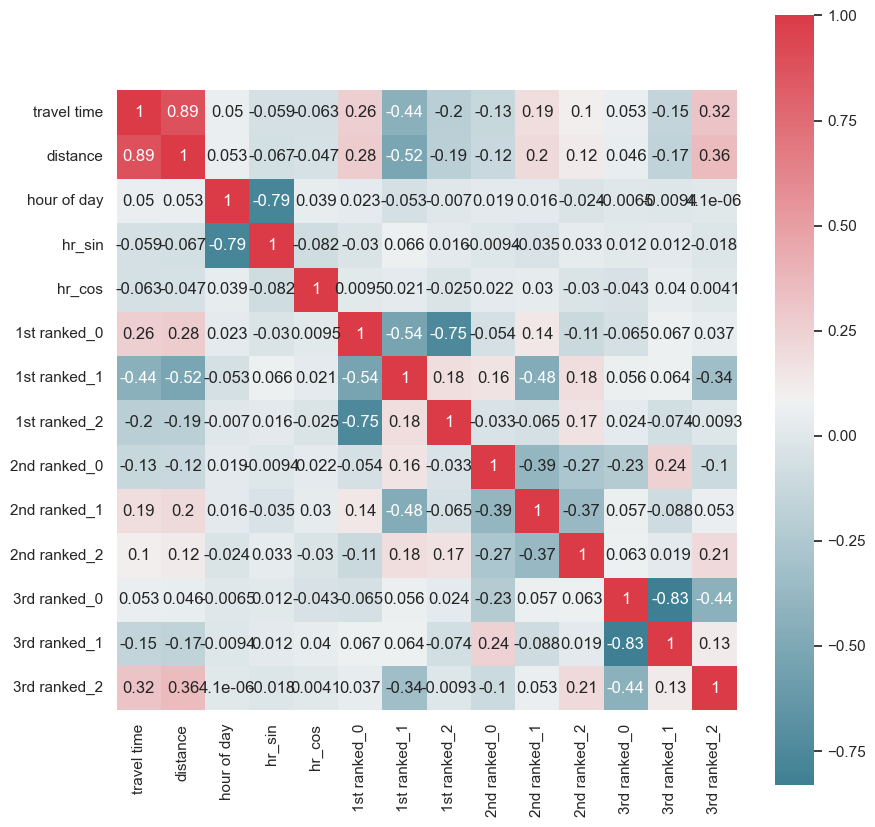

In [105]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [106]:
x = np.array(df6[['distance','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(16658, 10)

In [107]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 10)
(3332, 10)


In [109]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
417/417 [==============================] - 1s 890us/step - loss: 532401.0000 - mape: 94.7701 - rmse: 729.6581 - val_loss: 459768.0625 - val_mape: 83.7830 - val_rmse: 678.0620
Epoch 2/500
417/417 [==============================] - 0s 730us/step - loss: 380423.8438 - mape: 66.9254 - rmse: 616.7851 - val_loss: 277708.0000 - val_mape: 52.1817 - val_rmse: 526.9801
Epoch 3/500
417/417 [==============================] - 0s 732us/step - loss: 218774.1875 - mape: 47.1540 - rmse: 467.7330 - val_loss: 159367.0469 - val_mape: 47.6460 - val_rmse: 399.2080
Epoch 4/500
417/417 [==============================] - 0s 758us/step - loss: 142610.9531 - mape: 51.1505 - rmse: 377.6386 - val_loss: 121503.6641 - val_mape: 54.8808 - val_rmse: 348.5738
Epoch 5/500
417/417 [==============================] - 0s 742us/step - loss: 118078.8359 - mape: 55.1527 - rmse: 343.6260 - val_loss: 106853.0000 - val_mape: 55.5012 - val_rmse: 326.8838
Epoch 6/500
417/417 [==============================] - 0s 742us/s

417/417 [==============================] - 0s 721us/step - loss: 31564.8320 - mape: 22.8132 - rmse: 177.6649 - val_loss: 29659.4746 - val_mape: 23.1116 - val_rmse: 172.2193
Epoch 46/500
417/417 [==============================] - 0s 733us/step - loss: 31560.3613 - mape: 22.8531 - rmse: 177.6524 - val_loss: 29659.6230 - val_mape: 22.8664 - val_rmse: 172.2197
Epoch 47/500
417/417 [==============================] - 0s 724us/step - loss: 31559.5430 - mape: 22.8860 - rmse: 177.6501 - val_loss: 29669.0371 - val_mape: 23.3302 - val_rmse: 172.2470
Epoch 48/500
417/417 [==============================] - 0s 729us/step - loss: 31560.7070 - mape: 22.8154 - rmse: 177.6533 - val_loss: 29646.5957 - val_mape: 23.0229 - val_rmse: 172.1819
Epoch 49/500
417/417 [==============================] - 0s 727us/step - loss: 31563.3398 - mape: 22.8044 - rmse: 177.6607 - val_loss: 29682.1875 - val_mape: 23.5449 - val_rmse: 172.2852
Epoch 50/500
417/417 [==============================] - 0s 729us/step - loss: 31560

Epoch 133/500
417/417 [==============================] - 0s 727us/step - loss: 31522.9336 - mape: 22.8376 - rmse: 177.5470 - val_loss: 29594.6309 - val_mape: 23.0422 - val_rmse: 172.0309
Epoch 134/500
417/417 [==============================] - 0s 721us/step - loss: 31509.0840 - mape: 22.7308 - rmse: 177.5080 - val_loss: 29615.1309 - val_mape: 23.5163 - val_rmse: 172.0905
Epoch 135/500
417/417 [==============================] - 0s 726us/step - loss: 31518.3711 - mape: 22.8251 - rmse: 177.5341 - val_loss: 29583.8223 - val_mape: 22.9786 - val_rmse: 171.9995
Epoch 136/500
417/417 [==============================] - 0s 736us/step - loss: 31517.5488 - mape: 22.7181 - rmse: 177.5318 - val_loss: 29609.7305 - val_mape: 23.4582 - val_rmse: 172.0748
Epoch 137/500
417/417 [==============================] - 0s 730us/step - loss: 31521.7344 - mape: 22.8601 - rmse: 177.5436 - val_loss: 29592.3320 - val_mape: 23.2445 - val_rmse: 172.0242
Epoch 138/500
417/417 [==============================] - 0s 723us

Epoch 177/500
417/417 [==============================] - 0s 743us/step - loss: 31502.6367 - mape: 22.7210 - rmse: 177.4898 - val_loss: 29574.1191 - val_mape: 23.0239 - val_rmse: 171.9713
Epoch 178/500
417/417 [==============================] - 0s 726us/step - loss: 31499.6777 - mape: 22.7493 - rmse: 177.4815 - val_loss: 29575.7207 - val_mape: 23.0615 - val_rmse: 171.9759
Epoch 179/500
417/417 [==============================] - 0s 772us/step - loss: 31497.5410 - mape: 22.6769 - rmse: 177.4755 - val_loss: 29650.2422 - val_mape: 23.9004 - val_rmse: 172.1925
Epoch 180/500
417/417 [==============================] - 0s 733us/step - loss: 31506.5430 - mape: 22.8321 - rmse: 177.5008 - val_loss: 29584.7266 - val_mape: 23.3680 - val_rmse: 172.0021
Epoch 181/500
417/417 [==============================] - 0s 737us/step - loss: 31512.5684 - mape: 22.7970 - rmse: 177.5178 - val_loss: 29594.2188 - val_mape: 23.3840 - val_rmse: 172.0297
Epoch 182/500
417/417 [==============================] - 0s 732us

Epoch 221/500
417/417 [==============================] - 0s 722us/step - loss: 31481.9082 - mape: 22.7839 - rmse: 177.4314 - val_loss: 29564.6289 - val_mape: 23.2239 - val_rmse: 171.9437
Epoch 222/500
417/417 [==============================] - 0s 717us/step - loss: 31491.0332 - mape: 22.7028 - rmse: 177.4571 - val_loss: 29564.0547 - val_mape: 23.3156 - val_rmse: 171.9420
Epoch 223/500
417/417 [==============================] - 0s 721us/step - loss: 31475.2090 - mape: 22.7077 - rmse: 177.4125 - val_loss: 29565.6816 - val_mape: 23.2483 - val_rmse: 171.9467
Epoch 224/500
417/417 [==============================] - 0s 728us/step - loss: 31479.6113 - mape: 22.7222 - rmse: 177.4249 - val_loss: 29597.5039 - val_mape: 23.5774 - val_rmse: 172.0392
Epoch 225/500
417/417 [==============================] - 0s 731us/step - loss: 31475.1094 - mape: 22.7592 - rmse: 177.4123 - val_loss: 29559.8242 - val_mape: 22.9980 - val_rmse: 171.9297
Epoch 226/500
417/417 [==============================] - 0s 726us

Epoch 265/500
417/417 [==============================] - 0s 723us/step - loss: 31301.3379 - mape: 22.5578 - rmse: 176.9218 - val_loss: 29417.5391 - val_mape: 23.1266 - val_rmse: 171.5154
Epoch 266/500
417/417 [==============================] - 0s 728us/step - loss: 31297.7285 - mape: 22.5608 - rmse: 176.9116 - val_loss: 29414.6719 - val_mape: 23.0453 - val_rmse: 171.5071
Epoch 267/500
417/417 [==============================] - 0s 735us/step - loss: 31298.6484 - mape: 22.5414 - rmse: 176.9142 - val_loss: 29468.3535 - val_mape: 23.4510 - val_rmse: 171.6635
Epoch 268/500
417/417 [==============================] - 0s 727us/step - loss: 31284.6484 - mape: 22.4356 - rmse: 176.8747 - val_loss: 29575.2676 - val_mape: 23.9866 - val_rmse: 171.9746
Epoch 269/500
417/417 [==============================] - 0s 730us/step - loss: 31301.7012 - mape: 22.5556 - rmse: 176.9229 - val_loss: 29406.1660 - val_mape: 23.0695 - val_rmse: 171.4823
Epoch 270/500
417/417 [==============================] - 0s 732us

Epoch 309/500
417/417 [==============================] - 0s 725us/step - loss: 31160.8926 - mape: 22.3576 - rmse: 176.5245 - val_loss: 29262.0352 - val_mape: 22.8541 - val_rmse: 171.0615
Epoch 310/500
417/417 [==============================] - 0s 724us/step - loss: 31150.9941 - mape: 22.2718 - rmse: 176.4964 - val_loss: 29249.8652 - val_mape: 22.6671 - val_rmse: 171.0259
Epoch 311/500
417/417 [==============================] - 0s 732us/step - loss: 31159.5020 - mape: 22.2903 - rmse: 176.5205 - val_loss: 29269.6348 - val_mape: 22.9319 - val_rmse: 171.0837
Epoch 312/500
417/417 [==============================] - 0s 725us/step - loss: 31154.8906 - mape: 22.2825 - rmse: 176.5075 - val_loss: 29261.6230 - val_mape: 22.8403 - val_rmse: 171.0603
Epoch 313/500
417/417 [==============================] - 0s 731us/step - loss: 31155.6855 - mape: 22.2775 - rmse: 176.5097 - val_loss: 29273.7109 - val_mape: 23.0471 - val_rmse: 171.0956
Epoch 314/500
417/417 [==============================] - 0s 723us

Epoch 353/500
417/417 [==============================] - 0s 738us/step - loss: 31105.6328 - mape: 22.1864 - rmse: 176.3679 - val_loss: 29246.0352 - val_mape: 23.1170 - val_rmse: 171.0147
Epoch 354/500
417/417 [==============================] - 0s 727us/step - loss: 31110.5469 - mape: 22.2208 - rmse: 176.3818 - val_loss: 29222.3027 - val_mape: 22.9370 - val_rmse: 170.9453
Epoch 355/500
417/417 [==============================] - 0s 723us/step - loss: 31111.3711 - mape: 22.2368 - rmse: 176.3842 - val_loss: 29210.3672 - val_mape: 22.8469 - val_rmse: 170.9104
Epoch 356/500
417/417 [==============================] - 0s 731us/step - loss: 31113.0078 - mape: 22.1864 - rmse: 176.3888 - val_loss: 29212.9297 - val_mape: 22.9636 - val_rmse: 170.9179
Epoch 357/500
417/417 [==============================] - 0s 719us/step - loss: 31108.8945 - mape: 22.1660 - rmse: 176.3771 - val_loss: 29278.9004 - val_mape: 23.3461 - val_rmse: 171.1108
Epoch 358/500
417/417 [==============================] - 0s 729us

Epoch 397/500
417/417 [==============================] - 0s 726us/step - loss: 31053.6230 - mape: 22.0906 - rmse: 176.2204 - val_loss: 29241.2598 - val_mape: 23.3662 - val_rmse: 171.0008
Epoch 398/500
417/417 [==============================] - 0s 734us/step - loss: 31062.2285 - mape: 22.1291 - rmse: 176.2448 - val_loss: 29116.2500 - val_mape: 22.5011 - val_rmse: 170.6348
Epoch 399/500
417/417 [==============================] - 0s 728us/step - loss: 31056.9863 - mape: 22.1167 - rmse: 176.2299 - val_loss: 29139.6094 - val_mape: 22.8059 - val_rmse: 170.7033
Epoch 400/500
417/417 [==============================] - 0s 730us/step - loss: 31049.6602 - mape: 22.0585 - rmse: 176.2091 - val_loss: 29112.4531 - val_mape: 22.5417 - val_rmse: 170.6237
Epoch 401/500
417/417 [==============================] - 0s 722us/step - loss: 31047.6719 - mape: 22.1398 - rmse: 176.2035 - val_loss: 29100.6875 - val_mape: 22.3515 - val_rmse: 170.5892
Epoch 402/500
417/417 [==============================] - 0s 728us

Epoch 441/500
417/417 [==============================] - 0s 716us/step - loss: 31031.5781 - mape: 22.0642 - rmse: 176.1578 - val_loss: 29058.8828 - val_mape: 22.3984 - val_rmse: 170.4667
Epoch 442/500
417/417 [==============================] - 0s 722us/step - loss: 31036.9434 - mape: 22.0412 - rmse: 176.1730 - val_loss: 29113.3262 - val_mape: 22.9350 - val_rmse: 170.6263
Epoch 443/500
417/417 [==============================] - 0s 714us/step - loss: 31023.3594 - mape: 22.0497 - rmse: 176.1345 - val_loss: 29074.4590 - val_mape: 22.6477 - val_rmse: 170.5123
Epoch 444/500
417/417 [==============================] - 0s 715us/step - loss: 31030.3203 - mape: 22.0901 - rmse: 176.1543 - val_loss: 29056.8555 - val_mape: 22.3373 - val_rmse: 170.4607
Epoch 445/500
417/417 [==============================] - 0s 714us/step - loss: 31026.2422 - mape: 22.0073 - rmse: 176.1427 - val_loss: 29078.7012 - val_mape: 22.7047 - val_rmse: 170.5248
Epoch 446/500
417/417 [==============================] - 0s 708us

Epoch 485/500
417/417 [==============================] - 0s 732us/step - loss: 31005.0977 - mape: 22.0819 - rmse: 176.0826 - val_loss: 29022.7441 - val_mape: 22.1022 - val_rmse: 170.3606
Epoch 486/500
417/417 [==============================] - 0s 721us/step - loss: 31005.7207 - mape: 21.9759 - rmse: 176.0844 - val_loss: 29028.4375 - val_mape: 22.5164 - val_rmse: 170.3773
Epoch 487/500
417/417 [==============================] - 0s 725us/step - loss: 31005.3242 - mape: 22.0062 - rmse: 176.0833 - val_loss: 29033.9121 - val_mape: 22.5413 - val_rmse: 170.3934
Epoch 488/500
417/417 [==============================] - 0s 721us/step - loss: 31011.1602 - mape: 22.0160 - rmse: 176.0999 - val_loss: 29033.4199 - val_mape: 22.5909 - val_rmse: 170.3920
Epoch 489/500
417/417 [==============================] - 0s 728us/step - loss: 31007.4785 - mape: 22.0499 - rmse: 176.0894 - val_loss: 29020.6426 - val_mape: 22.3069 - val_rmse: 170.3545
Epoch 490/500
417/417 [==============================] - 0s 718us

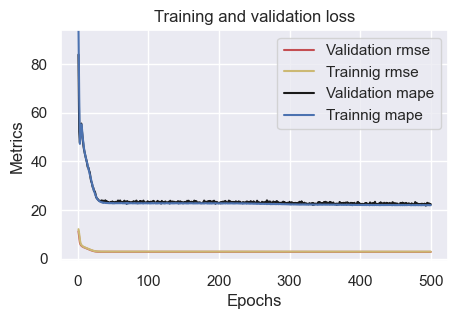

In [110]:
plotme(model4_4_1)
    

In [111]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
417/417 [==============================] - 1s 875us/step - loss: 507687.1875 - mape: 89.9644 - rmse: 712.5217 - val_loss: 391733.1562 - val_mape: 70.5491 - val_rmse: 625.8859
Epoch 2/500
417/417 [==============================] - 0s 748us/step - loss: 279895.6250 - mape: 53.0881 - rmse: 529.0516 - val_loss: 174018.1719 - val_mape: 46.4491 - val_rmse: 417.1548
Epoch 3/500
417/417 [==============================] - 0s 797us/step - loss: 144126.4688 - mape: 51.1621 - rmse: 379.6399 - val_loss: 117798.4922 - val_mape: 55.4167 - val_rmse: 343.2178
Epoch 4/500
417/417 [==============================] - 0s 787us/step - loss: 112920.1406 - mape: 54.7916 - rmse: 336.0359 - val_loss: 101344.6641 - val_mape: 54.5972 - val_rmse: 318.3468
Epoch 5/500
417/417 [==============================] - 0s 776us/step - loss: 98571.5156 - mape: 51.6419 - rmse: 313.9610 - val_loss: 90658.1875 - val_mape: 49.8633 - val_rmse: 301.0950
Epoch 6/500
417/417 [==============================] - 0s 806us/ste

417/417 [==============================] - 0s 730us/step - loss: 31567.7070 - mape: 22.8483 - rmse: 177.6730 - val_loss: 29652.5801 - val_mape: 23.2733 - val_rmse: 172.1992
Epoch 46/500
417/417 [==============================] - 0s 742us/step - loss: 31564.6797 - mape: 22.8270 - rmse: 177.6645 - val_loss: 29641.4766 - val_mape: 22.8188 - val_rmse: 172.1670
Epoch 47/500
417/417 [==============================] - 0s 731us/step - loss: 31554.4453 - mape: 22.7450 - rmse: 177.6357 - val_loss: 29672.7891 - val_mape: 23.5502 - val_rmse: 172.2579
Epoch 48/500
417/417 [==============================] - 0s 730us/step - loss: 31568.2578 - mape: 22.8705 - rmse: 177.6746 - val_loss: 29642.7344 - val_mape: 22.9738 - val_rmse: 172.1707
Epoch 49/500
417/417 [==============================] - 0s 742us/step - loss: 31562.0332 - mape: 22.7597 - rmse: 177.6571 - val_loss: 29809.6230 - val_mape: 24.2628 - val_rmse: 172.6546
Epoch 50/500
417/417 [==============================] - 0s 729us/step - loss: 31549

Epoch 133/500
417/417 [==============================] - 0s 713us/step - loss: 31487.0039 - mape: 22.7469 - rmse: 177.4458 - val_loss: 29575.7930 - val_mape: 23.2704 - val_rmse: 171.9761
Epoch 134/500
417/417 [==============================] - 0s 716us/step - loss: 31482.2695 - mape: 22.6840 - rmse: 177.4324 - val_loss: 29605.9668 - val_mape: 23.6833 - val_rmse: 172.0638
Epoch 135/500
417/417 [==============================] - 0s 726us/step - loss: 31471.5254 - mape: 22.7423 - rmse: 177.4022 - val_loss: 29561.2031 - val_mape: 23.3980 - val_rmse: 171.9337
Epoch 136/500
417/417 [==============================] - 0s 727us/step - loss: 31473.2969 - mape: 22.7389 - rmse: 177.4072 - val_loss: 29535.6445 - val_mape: 22.8576 - val_rmse: 171.8594
Epoch 137/500
417/417 [==============================] - 0s 727us/step - loss: 31469.8301 - mape: 22.7148 - rmse: 177.3974 - val_loss: 29592.1660 - val_mape: 23.6866 - val_rmse: 172.0237
Epoch 138/500
417/417 [==============================] - 0s 733us

Epoch 177/500
417/417 [==============================] - 0s 738us/step - loss: 31256.0117 - mape: 22.3969 - rmse: 176.7937 - val_loss: 29379.9512 - val_mape: 23.2496 - val_rmse: 171.4058
Epoch 178/500
417/417 [==============================] - 0s 732us/step - loss: 31244.4434 - mape: 22.5135 - rmse: 176.7610 - val_loss: 29384.2656 - val_mape: 23.2381 - val_rmse: 171.4184
Epoch 179/500
417/417 [==============================] - 0s 733us/step - loss: 31243.9219 - mape: 22.4892 - rmse: 176.7595 - val_loss: 29351.9805 - val_mape: 22.5865 - val_rmse: 171.3242
Epoch 180/500
417/417 [==============================] - 0s 736us/step - loss: 31238.0156 - mape: 22.3749 - rmse: 176.7428 - val_loss: 29359.5352 - val_mape: 23.1510 - val_rmse: 171.3462
Epoch 181/500
417/417 [==============================] - 0s 750us/step - loss: 31236.7520 - mape: 22.4691 - rmse: 176.7392 - val_loss: 29387.3301 - val_mape: 23.3277 - val_rmse: 171.4273
Epoch 182/500
417/417 [==============================] - 0s 734us

Epoch 221/500
417/417 [==============================] - 0s 743us/step - loss: 31116.1387 - mape: 22.2819 - rmse: 176.3977 - val_loss: 29226.5859 - val_mape: 22.1920 - val_rmse: 170.9579
Epoch 222/500
417/417 [==============================] - 0s 739us/step - loss: 31112.0977 - mape: 22.2302 - rmse: 176.3862 - val_loss: 29239.7461 - val_mape: 23.1011 - val_rmse: 170.9963
Epoch 223/500
417/417 [==============================] - 0s 743us/step - loss: 31104.8750 - mape: 22.2980 - rmse: 176.3657 - val_loss: 29190.3789 - val_mape: 22.3711 - val_rmse: 170.8519
Epoch 224/500
417/417 [==============================] - 0s 732us/step - loss: 31091.8164 - mape: 22.2723 - rmse: 176.3287 - val_loss: 29210.3105 - val_mape: 22.0747 - val_rmse: 170.9102
Epoch 225/500
417/417 [==============================] - 0s 735us/step - loss: 31108.5898 - mape: 22.2352 - rmse: 176.3763 - val_loss: 29187.3945 - val_mape: 22.2491 - val_rmse: 170.8432
Epoch 226/500
417/417 [==============================] - 0s 737us

Epoch 265/500
417/417 [==============================] - 0s 758us/step - loss: 30975.7148 - mape: 22.0650 - rmse: 175.9992 - val_loss: 29053.3516 - val_mape: 23.0313 - val_rmse: 170.4504
Epoch 266/500
417/417 [==============================] - 0s 741us/step - loss: 30974.1895 - mape: 22.1128 - rmse: 175.9949 - val_loss: 28982.2109 - val_mape: 22.3998 - val_rmse: 170.2416
Epoch 267/500
417/417 [==============================] - 0s 737us/step - loss: 30958.5996 - mape: 22.0106 - rmse: 175.9506 - val_loss: 29016.8027 - val_mape: 22.8240 - val_rmse: 170.3432
Epoch 268/500
417/417 [==============================] - 0s 741us/step - loss: 30960.0840 - mape: 22.0299 - rmse: 175.9548 - val_loss: 28976.4570 - val_mape: 22.5835 - val_rmse: 170.2247
Epoch 269/500
417/417 [==============================] - 0s 772us/step - loss: 30940.9375 - mape: 22.0048 - rmse: 175.9004 - val_loss: 28994.1816 - val_mape: 22.7585 - val_rmse: 170.2768
Epoch 270/500
417/417 [==============================] - 0s 743us

Epoch 309/500
417/417 [==============================] - 0s 754us/step - loss: 30853.0059 - mape: 21.8727 - rmse: 175.6502 - val_loss: 28835.2148 - val_mape: 22.2614 - val_rmse: 169.8093
Epoch 310/500
417/417 [==============================] - 0s 751us/step - loss: 30853.3789 - mape: 21.8663 - rmse: 175.6513 - val_loss: 28879.1172 - val_mape: 22.7126 - val_rmse: 169.9386
Epoch 311/500
417/417 [==============================] - 0s 739us/step - loss: 30861.7637 - mape: 21.9599 - rmse: 175.6752 - val_loss: 28852.5977 - val_mape: 22.4062 - val_rmse: 169.8605
Epoch 312/500
417/417 [==============================] - 0s 715us/step - loss: 30864.8574 - mape: 21.8596 - rmse: 175.6840 - val_loss: 28841.9902 - val_mape: 22.2794 - val_rmse: 169.8293
Epoch 313/500
417/417 [==============================] - 0s 764us/step - loss: 30862.5781 - mape: 21.8786 - rmse: 175.6775 - val_loss: 28846.0762 - val_mape: 22.3926 - val_rmse: 169.8413
Epoch 314/500
417/417 [==============================] - 0s 725us

Epoch 353/500
417/417 [==============================] - 0s 733us/step - loss: 30799.3379 - mape: 21.8686 - rmse: 175.4974 - val_loss: 28799.1602 - val_mape: 22.1183 - val_rmse: 169.7032
Epoch 354/500
417/417 [==============================] - 0s 737us/step - loss: 30787.4219 - mape: 21.7324 - rmse: 175.4635 - val_loss: 28791.2227 - val_mape: 22.0480 - val_rmse: 169.6798
Epoch 355/500
417/417 [==============================] - 0s 718us/step - loss: 30783.8633 - mape: 21.8121 - rmse: 175.4533 - val_loss: 28843.2773 - val_mape: 21.5798 - val_rmse: 169.8331
Epoch 356/500
417/417 [==============================] - 0s 749us/step - loss: 30784.0176 - mape: 21.7446 - rmse: 175.4538 - val_loss: 28826.1680 - val_mape: 22.4316 - val_rmse: 169.7827
Epoch 357/500
417/417 [==============================] - 0s 778us/step - loss: 30783.5117 - mape: 21.8111 - rmse: 175.4523 - val_loss: 28846.4062 - val_mape: 22.5957 - val_rmse: 169.8423
Epoch 358/500
417/417 [==============================] - 0s 769us

Epoch 397/500
417/417 [==============================] - 0s 730us/step - loss: 30747.5312 - mape: 21.7681 - rmse: 175.3497 - val_loss: 28774.6621 - val_mape: 22.2249 - val_rmse: 169.6310
Epoch 398/500
417/417 [==============================] - 0s 733us/step - loss: 30752.6035 - mape: 21.6550 - rmse: 175.3642 - val_loss: 28785.2441 - val_mape: 22.3026 - val_rmse: 169.6621
Epoch 399/500
417/417 [==============================] - 0s 776us/step - loss: 30739.7637 - mape: 21.7774 - rmse: 175.3276 - val_loss: 28774.8730 - val_mape: 21.9032 - val_rmse: 169.6316
Epoch 400/500
417/417 [==============================] - 0s 749us/step - loss: 30740.4824 - mape: 21.6952 - rmse: 175.3296 - val_loss: 28796.9082 - val_mape: 22.4519 - val_rmse: 169.6965
Epoch 401/500
417/417 [==============================] - 0s 749us/step - loss: 30735.4492 - mape: 21.6805 - rmse: 175.3153 - val_loss: 28787.6641 - val_mape: 22.3773 - val_rmse: 169.6693
Epoch 402/500
417/417 [==============================] - 0s 699us

Epoch 441/500
417/417 [==============================] - 0s 697us/step - loss: 30713.2148 - mape: 21.6852 - rmse: 175.2519 - val_loss: 28752.7129 - val_mape: 21.7054 - val_rmse: 169.5663
Epoch 442/500
417/417 [==============================] - 0s 737us/step - loss: 30711.5566 - mape: 21.6810 - rmse: 175.2471 - val_loss: 28746.3652 - val_mape: 21.6096 - val_rmse: 169.5475
Epoch 443/500
417/417 [==============================] - 0s 751us/step - loss: 30694.6055 - mape: 21.6298 - rmse: 175.1988 - val_loss: 28930.1914 - val_mape: 23.0050 - val_rmse: 170.0888
Epoch 444/500
417/417 [==============================] - 0s 707us/step - loss: 30744.7773 - mape: 21.6993 - rmse: 175.3419 - val_loss: 28751.7520 - val_mape: 21.7188 - val_rmse: 169.5634
Epoch 445/500
417/417 [==============================] - 0s 714us/step - loss: 30716.9551 - mape: 21.6077 - rmse: 175.2625 - val_loss: 28797.1172 - val_mape: 22.5303 - val_rmse: 169.6971
Epoch 446/500
417/417 [==============================] - 0s 755us

Epoch 485/500
417/417 [==============================] - 0s 757us/step - loss: 30686.9570 - mape: 21.6527 - rmse: 175.1769 - val_loss: 28745.0684 - val_mape: 22.0638 - val_rmse: 169.5437
Epoch 486/500
417/417 [==============================] - 0s 742us/step - loss: 30688.0176 - mape: 21.6437 - rmse: 175.1800 - val_loss: 28759.4785 - val_mape: 22.2088 - val_rmse: 169.5862
Epoch 487/500
417/417 [==============================] - 0s 743us/step - loss: 30707.7812 - mape: 21.6315 - rmse: 175.2364 - val_loss: 28742.0039 - val_mape: 21.9211 - val_rmse: 169.5347
Epoch 488/500
417/417 [==============================] - 0s 752us/step - loss: 30689.4629 - mape: 21.6100 - rmse: 175.1841 - val_loss: 28771.1113 - val_mape: 22.2312 - val_rmse: 169.6205
Epoch 489/500
417/417 [==============================] - 0s 756us/step - loss: 30690.8535 - mape: 21.6536 - rmse: 175.1880 - val_loss: 28737.0664 - val_mape: 21.8340 - val_rmse: 169.5201
Epoch 490/500
417/417 [==============================] - 0s 755us

In [112]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
417/417 [==============================] - 1s 877us/step - loss: 463987.4688 - mape: 82.0047 - rmse: 681.1663 - val_loss: 283321.6562 - val_mape: 52.8707 - val_rmse: 532.2797
Epoch 2/500
417/417 [==============================] - 0s 754us/step - loss: 180416.7812 - mape: 49.0933 - rmse: 424.7550 - val_loss: 120455.7500 - val_mape: 55.2883 - val_rmse: 347.0674
Epoch 3/500
417/417 [==============================] - 0s 723us/step - loss: 111355.6328 - mape: 54.6790 - rmse: 333.6999 - val_loss: 97009.1406 - val_mape: 52.9929 - val_rmse: 311.4629
Epoch 4/500
417/417 [==============================] - 0s 755us/step - loss: 92480.9141 - mape: 48.7920 - rmse: 304.1068 - val_loss: 83864.8516 - val_mape: 46.3768 - val_rmse: 289.5943
Epoch 5/500
417/417 [==============================] - 0s 750us/step - loss: 81209.5234 - mape: 44.0556 - rmse: 284.9728 - val_loss: 75288.1953 - val_mape: 43.0080 - val_rmse: 274.3869
Epoch 6/500
417/417 [==============================] - 0s 760us/step -

417/417 [==============================] - 0s 742us/step - loss: 31534.3398 - mape: 22.7040 - rmse: 177.5791 - val_loss: 29628.2910 - val_mape: 23.6222 - val_rmse: 172.1287
Epoch 46/500
417/417 [==============================] - 0s 741us/step - loss: 31513.1914 - mape: 22.8608 - rmse: 177.5195 - val_loss: 29622.2695 - val_mape: 23.3904 - val_rmse: 172.1112
Epoch 47/500
417/417 [==============================] - 0s 724us/step - loss: 31514.6309 - mape: 22.7843 - rmse: 177.5236 - val_loss: 29642.0801 - val_mape: 22.3387 - val_rmse: 172.1688
Epoch 48/500
417/417 [==============================] - 0s 763us/step - loss: 31502.9844 - mape: 22.6681 - rmse: 177.4908 - val_loss: 29588.5781 - val_mape: 23.4599 - val_rmse: 172.0133
Epoch 49/500
417/417 [==============================] - 0s 751us/step - loss: 31500.7031 - mape: 22.8004 - rmse: 177.4844 - val_loss: 29622.8555 - val_mape: 23.6467 - val_rmse: 172.1129
Epoch 50/500
417/417 [==============================] - 0s 722us/step - loss: 31523

Epoch 133/500
417/417 [==============================] - 0s 708us/step - loss: 31062.9766 - mape: 22.3367 - rmse: 176.2469 - val_loss: 29200.4004 - val_mape: 22.3549 - val_rmse: 170.8812
Epoch 134/500
417/417 [==============================] - 0s 711us/step - loss: 31077.3301 - mape: 22.2306 - rmse: 176.2876 - val_loss: 29219.7285 - val_mape: 23.1639 - val_rmse: 170.9378
Epoch 135/500
417/417 [==============================] - 0s 737us/step - loss: 31043.1016 - mape: 22.3445 - rmse: 176.1905 - val_loss: 29180.0273 - val_mape: 22.8129 - val_rmse: 170.8216
Epoch 136/500
417/417 [==============================] - 0s 753us/step - loss: 31056.5996 - mape: 22.2520 - rmse: 176.2288 - val_loss: 29172.8711 - val_mape: 22.5105 - val_rmse: 170.8007
Epoch 137/500
417/417 [==============================] - 0s 723us/step - loss: 31055.6191 - mape: 22.2397 - rmse: 176.2260 - val_loss: 29191.5938 - val_mape: 22.9973 - val_rmse: 170.8555
Epoch 138/500
417/417 [==============================] - 0s 708us

Epoch 177/500
417/417 [==============================] - 0s 731us/step - loss: 30899.5820 - mape: 22.0439 - rmse: 175.7828 - val_loss: 29024.5547 - val_mape: 22.3799 - val_rmse: 170.3659
Epoch 178/500
417/417 [==============================] - 0s 762us/step - loss: 30883.8066 - mape: 22.0342 - rmse: 175.7379 - val_loss: 29086.6562 - val_mape: 23.0173 - val_rmse: 170.5481
Epoch 179/500
417/417 [==============================] - 0s 732us/step - loss: 30897.2246 - mape: 22.0770 - rmse: 175.7761 - val_loss: 29018.5840 - val_mape: 22.2930 - val_rmse: 170.3484
Epoch 180/500
417/417 [==============================] - 0s 721us/step - loss: 30885.5840 - mape: 22.1226 - rmse: 175.7430 - val_loss: 29035.7734 - val_mape: 21.8304 - val_rmse: 170.3989
Epoch 181/500
417/417 [==============================] - 0s 735us/step - loss: 30884.6602 - mape: 21.9707 - rmse: 175.7403 - val_loss: 29053.7031 - val_mape: 22.8173 - val_rmse: 170.4515
Epoch 182/500
417/417 [==============================] - 0s 715us

Epoch 221/500
417/417 [==============================] - 0s 738us/step - loss: 30787.1777 - mape: 21.9031 - rmse: 175.4628 - val_loss: 28921.3477 - val_mape: 22.0847 - val_rmse: 170.0628
Epoch 222/500
417/417 [==============================] - 0s 764us/step - loss: 30790.3691 - mape: 21.8810 - rmse: 175.4718 - val_loss: 28934.6367 - val_mape: 22.1084 - val_rmse: 170.1018
Epoch 223/500
417/417 [==============================] - 0s 789us/step - loss: 30793.9902 - mape: 21.8139 - rmse: 175.4822 - val_loss: 28923.1133 - val_mape: 22.1048 - val_rmse: 170.0680
Epoch 224/500
417/417 [==============================] - 0s 746us/step - loss: 30789.3398 - mape: 21.9111 - rmse: 175.4689 - val_loss: 29164.2617 - val_mape: 23.5309 - val_rmse: 170.7755
Epoch 225/500
417/417 [==============================] - 0s 773us/step - loss: 30786.4805 - mape: 21.9256 - rmse: 175.4608 - val_loss: 28908.5645 - val_mape: 22.1578 - val_rmse: 170.0252
Epoch 226/500
417/417 [==============================] - 0s 741us

Epoch 265/500
417/417 [==============================] - 0s 752us/step - loss: 30711.9238 - mape: 21.7919 - rmse: 175.2482 - val_loss: 28904.7832 - val_mape: 22.2792 - val_rmse: 170.0141
Epoch 266/500
417/417 [==============================] - 0s 721us/step - loss: 30687.5781 - mape: 21.7916 - rmse: 175.1787 - val_loss: 28900.0137 - val_mape: 22.1016 - val_rmse: 170.0000
Epoch 267/500
417/417 [==============================] - 0s 723us/step - loss: 30694.6152 - mape: 21.7438 - rmse: 175.1988 - val_loss: 28894.8047 - val_mape: 22.0571 - val_rmse: 169.9847
Epoch 268/500
417/417 [==============================] - 0s 754us/step - loss: 30696.2148 - mape: 21.7252 - rmse: 175.2034 - val_loss: 28886.7109 - val_mape: 22.3360 - val_rmse: 169.9609
Epoch 269/500
417/417 [==============================] - 0s 752us/step - loss: 30677.9512 - mape: 21.8174 - rmse: 175.1512 - val_loss: 28883.9395 - val_mape: 21.9080 - val_rmse: 169.9528
Epoch 270/500
417/417 [==============================] - 0s 721us

Epoch 309/500
417/417 [==============================] - 0s 762us/step - loss: 30632.4902 - mape: 21.7102 - rmse: 175.0214 - val_loss: 28979.2637 - val_mape: 22.7745 - val_rmse: 170.2330
Epoch 310/500
417/417 [==============================] - 0s 718us/step - loss: 30653.7168 - mape: 21.6967 - rmse: 175.0820 - val_loss: 29052.1562 - val_mape: 23.0011 - val_rmse: 170.4469
Epoch 311/500
417/417 [==============================] - 0s 760us/step - loss: 30652.5957 - mape: 21.7200 - rmse: 175.0788 - val_loss: 28886.2949 - val_mape: 22.2605 - val_rmse: 169.9597
Epoch 312/500
417/417 [==============================] - 0s 729us/step - loss: 30631.2324 - mape: 21.6591 - rmse: 175.0178 - val_loss: 28887.5215 - val_mape: 22.3702 - val_rmse: 169.9633
Epoch 313/500
417/417 [==============================] - 0s 762us/step - loss: 30640.4629 - mape: 21.7146 - rmse: 175.0442 - val_loss: 28925.6191 - val_mape: 22.4519 - val_rmse: 170.0753
Epoch 314/500
417/417 [==============================] - 0s 739us

Epoch 353/500
417/417 [==============================] - 0s 722us/step - loss: 30607.7266 - mape: 21.6568 - rmse: 174.9506 - val_loss: 28859.4336 - val_mape: 21.9756 - val_rmse: 169.8806
Epoch 354/500
417/417 [==============================] - 0s 767us/step - loss: 30622.2871 - mape: 21.5839 - rmse: 174.9922 - val_loss: 28870.4277 - val_mape: 22.0734 - val_rmse: 169.9130
Epoch 355/500
417/417 [==============================] - 0s 731us/step - loss: 30614.3184 - mape: 21.6991 - rmse: 174.9695 - val_loss: 28884.9824 - val_mape: 21.6749 - val_rmse: 169.9558
Epoch 356/500
417/417 [==============================] - 0s 731us/step - loss: 30617.9648 - mape: 21.6160 - rmse: 174.9799 - val_loss: 28873.3379 - val_mape: 21.7234 - val_rmse: 169.9216
Epoch 357/500
417/417 [==============================] - 0s 755us/step - loss: 30602.5273 - mape: 21.6446 - rmse: 174.9358 - val_loss: 28947.6816 - val_mape: 22.7136 - val_rmse: 170.1402
Epoch 358/500
417/417 [==============================] - 0s 752us

Epoch 397/500
417/417 [==============================] - 0s 750us/step - loss: 30579.0059 - mape: 21.6331 - rmse: 174.8685 - val_loss: 28849.6523 - val_mape: 21.8391 - val_rmse: 169.8519
Epoch 398/500
417/417 [==============================] - 0s 764us/step - loss: 30598.6348 - mape: 21.5686 - rmse: 174.9247 - val_loss: 28863.3711 - val_mape: 22.2142 - val_rmse: 169.8922
Epoch 399/500
417/417 [==============================] - 0s 742us/step - loss: 30575.1562 - mape: 21.6267 - rmse: 174.8575 - val_loss: 28893.3008 - val_mape: 21.6285 - val_rmse: 169.9803
Epoch 400/500
417/417 [==============================] - 0s 767us/step - loss: 30621.1621 - mape: 21.6400 - rmse: 174.9890 - val_loss: 28862.7441 - val_mape: 21.8127 - val_rmse: 169.8904
Epoch 401/500
417/417 [==============================] - 0s 750us/step - loss: 30595.3066 - mape: 21.5940 - rmse: 174.9151 - val_loss: 28882.6895 - val_mape: 22.3570 - val_rmse: 169.9491
Epoch 402/500
417/417 [==============================] - 0s 752us

Epoch 441/500
417/417 [==============================] - 0s 739us/step - loss: 30549.1289 - mape: 21.6464 - rmse: 174.7831 - val_loss: 28898.3242 - val_mape: 21.3050 - val_rmse: 169.9951
Epoch 442/500
417/417 [==============================] - 0s 754us/step - loss: 30593.6250 - mape: 21.5517 - rmse: 174.9103 - val_loss: 28867.8750 - val_mape: 21.6836 - val_rmse: 169.9055
Epoch 443/500
417/417 [==============================] - 0s 755us/step - loss: 30567.8145 - mape: 21.5350 - rmse: 174.8365 - val_loss: 28897.5781 - val_mape: 22.3240 - val_rmse: 169.9929
Epoch 444/500
417/417 [==============================] - 0s 729us/step - loss: 30570.7637 - mape: 21.6084 - rmse: 174.8450 - val_loss: 29024.3164 - val_mape: 22.8911 - val_rmse: 170.3652
Epoch 445/500
417/417 [==============================] - 0s 719us/step - loss: 30596.0254 - mape: 21.6235 - rmse: 174.9172 - val_loss: 28862.0293 - val_mape: 21.9133 - val_rmse: 169.8883
Epoch 446/500
417/417 [==============================] - 0s 762us

Epoch 485/500
417/417 [==============================] - 0s 783us/step - loss: 30567.7324 - mape: 21.6110 - rmse: 174.8363 - val_loss: 28880.7266 - val_mape: 22.2265 - val_rmse: 169.9433
Epoch 486/500
417/417 [==============================] - 0s 751us/step - loss: 30572.9238 - mape: 21.5700 - rmse: 174.8512 - val_loss: 28918.5742 - val_mape: 22.4738 - val_rmse: 170.0546
Epoch 487/500
417/417 [==============================] - 0s 730us/step - loss: 30553.1484 - mape: 21.5664 - rmse: 174.7946 - val_loss: 29017.4863 - val_mape: 22.9489 - val_rmse: 170.3452
Epoch 488/500
417/417 [==============================] - 0s 739us/step - loss: 30573.8457 - mape: 21.5992 - rmse: 174.8538 - val_loss: 28926.2930 - val_mape: 22.4242 - val_rmse: 170.0773
Epoch 489/500
417/417 [==============================] - 0s 762us/step - loss: 30570.2578 - mape: 21.5449 - rmse: 174.8435 - val_loss: 28853.7109 - val_mape: 21.7794 - val_rmse: 169.8638
Epoch 490/500
417/417 [==============================] - 0s 754us

In [113]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
417/417 [==============================] - 1s 939us/step - loss: 274603.5312 - mape: 67.7287 - rmse: 524.0262 - val_loss: 93839.9453 - val_mape: 53.6268 - val_rmse: 306.3331
Epoch 2/500
417/417 [==============================] - 0s 783us/step - loss: 81795.9062 - mape: 45.5083 - rmse: 285.9998 - val_loss: 70888.8047 - val_mape: 44.5189 - val_rmse: 266.2495
Epoch 3/500
417/417 [==============================] - 0s 784us/step - loss: 62103.1484 - mape: 38.4116 - rmse: 249.2050 - val_loss: 51444.1523 - val_mape: 35.8208 - val_rmse: 226.8130
Epoch 4/500
417/417 [==============================] - 0s 794us/step - loss: 44394.7969 - mape: 31.3827 - rmse: 210.7007 - val_loss: 35800.5938 - val_mape: 28.3296 - val_rmse: 189.2104
Epoch 5/500
417/417 [==============================] - 0s 784us/step - loss: 34231.5352 - mape: 25.6991 - rmse: 185.0177 - val_loss: 30521.9766 - val_mape: 24.2553 - val_rmse: 174.7054
Epoch 6/500
417/417 [==============================] - 0s 755us/step - los

417/417 [==============================] - 0s 757us/step - loss: 31004.0938 - mape: 22.1919 - rmse: 176.0798 - val_loss: 29092.9766 - val_mape: 23.5195 - val_rmse: 170.5666
Epoch 90/500
417/417 [==============================] - 0s 803us/step - loss: 30977.8613 - mape: 22.3986 - rmse: 176.0053 - val_loss: 29118.4062 - val_mape: 23.1869 - val_rmse: 170.6412
Epoch 91/500
417/417 [==============================] - 0s 779us/step - loss: 31028.0371 - mape: 22.2536 - rmse: 176.1478 - val_loss: 28958.4941 - val_mape: 22.6287 - val_rmse: 170.1720
Epoch 92/500
417/417 [==============================] - 0s 798us/step - loss: 30998.9199 - mape: 22.3308 - rmse: 176.0651 - val_loss: 29073.8750 - val_mape: 21.8708 - val_rmse: 170.5106
Epoch 93/500
417/417 [==============================] - 0s 784us/step - loss: 31013.4141 - mape: 22.2840 - rmse: 176.1063 - val_loss: 29095.9043 - val_mape: 23.4252 - val_rmse: 170.5752
Epoch 94/500
417/417 [==============================] - 0s 777us/step - loss: 30946

Epoch 133/500
417/417 [==============================] - 0s 796us/step - loss: 30887.0605 - mape: 22.0808 - rmse: 175.7471 - val_loss: 29025.8262 - val_mape: 21.9933 - val_rmse: 170.3697
Epoch 134/500
417/417 [==============================] - 0s 841us/step - loss: 30868.4355 - mape: 22.2043 - rmse: 175.6942 - val_loss: 28889.4043 - val_mape: 22.5153 - val_rmse: 169.9688
Epoch 135/500
417/417 [==============================] - 0s 776us/step - loss: 30852.6680 - mape: 22.0684 - rmse: 175.6493 - val_loss: 28875.9551 - val_mape: 22.6868 - val_rmse: 169.9293
Epoch 136/500
417/417 [==============================] - 0s 807us/step - loss: 30876.6758 - mape: 22.1879 - rmse: 175.7176 - val_loss: 28872.0449 - val_mape: 22.6832 - val_rmse: 169.9178
Epoch 137/500
417/417 [==============================] - 0s 776us/step - loss: 30901.3770 - mape: 22.1583 - rmse: 175.7879 - val_loss: 29124.2930 - val_mape: 23.5970 - val_rmse: 170.6584
Epoch 138/500
417/417 [==============================] - 0s 765us

Epoch 177/500
417/417 [==============================] - 0s 798us/step - loss: 30641.0254 - mape: 21.6821 - rmse: 175.0458 - val_loss: 28771.1660 - val_mape: 23.0066 - val_rmse: 169.6207
Epoch 178/500
417/417 [==============================] - 0s 787us/step - loss: 30676.9395 - mape: 21.8653 - rmse: 175.1483 - val_loss: 28669.9824 - val_mape: 21.7277 - val_rmse: 169.3221
Epoch 179/500
417/417 [==============================] - 0s 794us/step - loss: 30580.0293 - mape: 21.7304 - rmse: 174.8715 - val_loss: 28823.3320 - val_mape: 22.8329 - val_rmse: 169.7744
Epoch 180/500
417/417 [==============================] - 0s 769us/step - loss: 30685.4395 - mape: 21.7351 - rmse: 175.1726 - val_loss: 28667.7051 - val_mape: 22.0759 - val_rmse: 169.3154
Epoch 181/500
417/417 [==============================] - 0s 799us/step - loss: 30606.4746 - mape: 21.7556 - rmse: 174.9471 - val_loss: 28727.7207 - val_mape: 21.0640 - val_rmse: 169.4925
Epoch 182/500
417/417 [==============================] - 0s 783us

Epoch 221/500
417/417 [==============================] - 0s 775us/step - loss: 30527.6797 - mape: 21.4855 - rmse: 174.7217 - val_loss: 28697.5898 - val_mape: 22.0566 - val_rmse: 169.4036
Epoch 222/500
417/417 [==============================] - 0s 783us/step - loss: 30535.9395 - mape: 21.5048 - rmse: 174.7454 - val_loss: 28739.9648 - val_mape: 22.3317 - val_rmse: 169.5287
Epoch 223/500
417/417 [==============================] - 0s 813us/step - loss: 30518.0195 - mape: 21.4869 - rmse: 174.6941 - val_loss: 29003.7207 - val_mape: 23.1327 - val_rmse: 170.3048
Epoch 224/500
417/417 [==============================] - 0s 792us/step - loss: 30548.8516 - mape: 21.4425 - rmse: 174.7823 - val_loss: 28648.3320 - val_mape: 21.6964 - val_rmse: 169.2582
Epoch 225/500
417/417 [==============================] - 0s 825us/step - loss: 30520.9121 - mape: 21.4546 - rmse: 174.7023 - val_loss: 28688.8047 - val_mape: 21.6610 - val_rmse: 169.3777
Epoch 226/500
417/417 [==============================] - 0s 820us

Epoch 265/500
417/417 [==============================] - 0s 781us/step - loss: 30422.7617 - mape: 21.3024 - rmse: 174.4212 - val_loss: 28642.8281 - val_mape: 21.9898 - val_rmse: 169.2419
Epoch 266/500
417/417 [==============================] - 0s 823us/step - loss: 30471.7969 - mape: 21.3689 - rmse: 174.5617 - val_loss: 28637.0488 - val_mape: 20.9952 - val_rmse: 169.2249
Epoch 267/500
417/417 [==============================] - 0s 835us/step - loss: 30409.7227 - mape: 21.3271 - rmse: 174.3838 - val_loss: 29080.6719 - val_mape: 23.2365 - val_rmse: 170.5306
Epoch 268/500
417/417 [==============================] - 0s 796us/step - loss: 30428.9023 - mape: 21.2889 - rmse: 174.4388 - val_loss: 28693.2168 - val_mape: 21.7421 - val_rmse: 169.3907
Epoch 269/500
417/417 [==============================] - 0s 812us/step - loss: 30484.8379 - mape: 21.3536 - rmse: 174.5991 - val_loss: 28603.2383 - val_mape: 21.7005 - val_rmse: 169.1249
Epoch 270/500
417/417 [==============================] - 0s 821us

Epoch 309/500
417/417 [==============================] - 0s 767us/step - loss: 30367.1758 - mape: 21.3196 - rmse: 174.2618 - val_loss: 28711.1738 - val_mape: 22.4890 - val_rmse: 169.4437
Epoch 310/500
417/417 [==============================] - 0s 799us/step - loss: 30370.1387 - mape: 21.2863 - rmse: 174.2703 - val_loss: 28650.6934 - val_mape: 22.4465 - val_rmse: 169.2652
Epoch 311/500
417/417 [==============================] - 0s 793us/step - loss: 30358.1191 - mape: 21.2910 - rmse: 174.2358 - val_loss: 28839.2539 - val_mape: 22.5736 - val_rmse: 169.8212
Epoch 312/500
417/417 [==============================] - 0s 793us/step - loss: 30411.5254 - mape: 21.3243 - rmse: 174.3890 - val_loss: 28609.0547 - val_mape: 21.3022 - val_rmse: 169.1421
Epoch 313/500
417/417 [==============================] - 0s 786us/step - loss: 30373.7754 - mape: 21.2734 - rmse: 174.2807 - val_loss: 29130.2031 - val_mape: 20.2200 - val_rmse: 170.6757
Epoch 314/500
417/417 [==============================] - 0s 827us

Epoch 353/500
417/417 [==============================] - 0s 779us/step - loss: 30331.6348 - mape: 21.2343 - rmse: 174.1598 - val_loss: 28674.2598 - val_mape: 21.5273 - val_rmse: 169.3348
Epoch 354/500
417/417 [==============================] - 0s 819us/step - loss: 30332.9473 - mape: 21.2029 - rmse: 174.1636 - val_loss: 28619.9512 - val_mape: 21.7910 - val_rmse: 169.1743
Epoch 355/500
417/417 [==============================] - 0s 777us/step - loss: 30336.9355 - mape: 21.2619 - rmse: 174.1750 - val_loss: 28638.2441 - val_mape: 21.9977 - val_rmse: 169.2284
Epoch 356/500
417/417 [==============================] - 0s 800us/step - loss: 30337.7871 - mape: 21.2134 - rmse: 174.1775 - val_loss: 28855.9824 - val_mape: 22.3034 - val_rmse: 169.8705
Epoch 357/500
417/417 [==============================] - 0s 801us/step - loss: 30318.4238 - mape: 21.2355 - rmse: 174.1219 - val_loss: 28612.7207 - val_mape: 21.6398 - val_rmse: 169.1530
Epoch 358/500
417/417 [==============================] - 0s 795us

Epoch 397/500
417/417 [==============================] - 0s 758us/step - loss: 30311.1406 - mape: 21.2653 - rmse: 174.1010 - val_loss: 28665.1523 - val_mape: 21.4786 - val_rmse: 169.3079
Epoch 398/500
417/417 [==============================] - 0s 764us/step - loss: 30302.8613 - mape: 21.1849 - rmse: 174.0772 - val_loss: 28927.2676 - val_mape: 22.9086 - val_rmse: 170.0802
Epoch 399/500
417/417 [==============================] - 0s 810us/step - loss: 30302.9863 - mape: 21.2181 - rmse: 174.0775 - val_loss: 28627.7559 - val_mape: 21.2811 - val_rmse: 169.1974
Epoch 400/500
417/417 [==============================] - 0s 795us/step - loss: 30298.3711 - mape: 21.1766 - rmse: 174.0643 - val_loss: 28765.3281 - val_mape: 22.8582 - val_rmse: 169.6034
Epoch 401/500
417/417 [==============================] - 0s 794us/step - loss: 30284.1934 - mape: 21.2650 - rmse: 174.0235 - val_loss: 28790.6152 - val_mape: 20.6715 - val_rmse: 169.6780
Epoch 402/500
417/417 [==============================] - 0s 790us

Epoch 441/500
417/417 [==============================] - 0s 776us/step - loss: 30245.0977 - mape: 21.1918 - rmse: 173.9112 - val_loss: 28623.1191 - val_mape: 21.2392 - val_rmse: 169.1837
Epoch 442/500
417/417 [==============================] - 0s 775us/step - loss: 30218.1836 - mape: 21.1771 - rmse: 173.8338 - val_loss: 28686.4609 - val_mape: 20.9836 - val_rmse: 169.3708
Epoch 443/500
417/417 [==============================] - 0s 795us/step - loss: 30272.9668 - mape: 21.2185 - rmse: 173.9913 - val_loss: 28651.1387 - val_mape: 21.3526 - val_rmse: 169.2665
Epoch 444/500
417/417 [==============================] - 0s 796us/step - loss: 30220.6504 - mape: 21.1847 - rmse: 173.8409 - val_loss: 28704.5332 - val_mape: 20.8173 - val_rmse: 169.4241
Epoch 445/500
417/417 [==============================] - 0s 812us/step - loss: 30221.0664 - mape: 21.2260 - rmse: 173.8421 - val_loss: 28750.0703 - val_mape: 20.6608 - val_rmse: 169.5585
Epoch 446/500
417/417 [==============================] - 0s 795us

Epoch 485/500
417/417 [==============================] - 0s 808us/step - loss: 30261.9336 - mape: 21.1789 - rmse: 173.9596 - val_loss: 28801.1387 - val_mape: 21.1740 - val_rmse: 169.7090
Epoch 486/500
417/417 [==============================] - 0s 816us/step - loss: 30252.1172 - mape: 21.2210 - rmse: 173.9314 - val_loss: 28591.0332 - val_mape: 21.4938 - val_rmse: 169.0888
Epoch 487/500
417/417 [==============================] - 0s 790us/step - loss: 30237.1855 - mape: 21.1680 - rmse: 173.8884 - val_loss: 28815.2070 - val_mape: 20.8724 - val_rmse: 169.7504
Epoch 488/500
417/417 [==============================] - 0s 774us/step - loss: 30219.7617 - mape: 21.2153 - rmse: 173.8383 - val_loss: 28617.1816 - val_mape: 21.4789 - val_rmse: 169.1661
Epoch 489/500
417/417 [==============================] - 0s 801us/step - loss: 30228.9922 - mape: 21.2093 - rmse: 173.8649 - val_loss: 28614.7969 - val_mape: 21.1716 - val_rmse: 169.1591
Epoch 490/500
417/417 [==============================] - 0s 814us

In [114]:
# plotme(model4_4_4)

In [115]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 206816.7500 - mape: 60.6858 - rmse: 454.7711 - val_loss: 78804.8672 - val_mape: 44.1735 - val_rmse: 280.7220
Epoch 2/500
417/417 [==============================] - 0s 906us/step - loss: 66092.5312 - mape: 39.6966 - rmse: 257.0847 - val_loss: 51448.7344 - val_mape: 37.7605 - val_rmse: 226.8231
Epoch 3/500
417/417 [==============================] - 0s 935us/step - loss: 40883.7578 - mape: 29.7045 - rmse: 202.1973 - val_loss: 31887.1582 - val_mape: 25.4731 - val_rmse: 178.5698
Epoch 4/500
417/417 [==============================] - 0s 902us/step - loss: 32391.9219 - mape: 24.1793 - rmse: 179.9776 - val_loss: 30149.5566 - val_mape: 25.2108 - val_rmse: 173.6363
Epoch 5/500
417/417 [==============================] - 0s 915us/step - loss: 31877.1289 - mape: 23.3220 - rmse: 178.5417 - val_loss: 29792.8184 - val_mape: 23.1039 - val_rmse: 172.6060
Epoch 6/500
417/417 [==============================] - 0s 905us/step - loss:

417/417 [==============================] - 0s 914us/step - loss: 30882.9160 - mape: 22.1220 - rmse: 175.7354 - val_loss: 28825.4902 - val_mape: 22.4623 - val_rmse: 169.7807
Epoch 90/500
417/417 [==============================] - 0s 896us/step - loss: 30900.5098 - mape: 22.1175 - rmse: 175.7854 - val_loss: 29064.6348 - val_mape: 23.7218 - val_rmse: 170.4835
Epoch 91/500
417/417 [==============================] - 0s 929us/step - loss: 30880.5059 - mape: 22.1089 - rmse: 175.7285 - val_loss: 28865.0664 - val_mape: 22.4775 - val_rmse: 169.8972
Epoch 92/500
417/417 [==============================] - 0s 1ms/step - loss: 30794.5801 - mape: 22.2212 - rmse: 175.4838 - val_loss: 28956.0098 - val_mape: 21.5235 - val_rmse: 170.1647
Epoch 93/500
417/417 [==============================] - 0s 943us/step - loss: 30877.5684 - mape: 22.1698 - rmse: 175.7201 - val_loss: 28958.3340 - val_mape: 22.4825 - val_rmse: 170.1715
Epoch 94/500
417/417 [==============================] - 0s 963us/step - loss: 30799.3

Epoch 133/500
417/417 [==============================] - 0s 914us/step - loss: 30502.5273 - mape: 21.5466 - rmse: 174.6497 - val_loss: 29442.9277 - val_mape: 24.5824 - val_rmse: 171.5894
Epoch 134/500
417/417 [==============================] - 0s 892us/step - loss: 30560.6426 - mape: 21.6630 - rmse: 174.8160 - val_loss: 28812.1133 - val_mape: 22.5705 - val_rmse: 169.7413
Epoch 135/500
417/417 [==============================] - 0s 887us/step - loss: 30563.2949 - mape: 21.4715 - rmse: 174.8236 - val_loss: 28578.7266 - val_mape: 22.0345 - val_rmse: 169.0524
Epoch 136/500
417/417 [==============================] - 0s 1ms/step - loss: 30573.9590 - mape: 21.5893 - rmse: 174.8541 - val_loss: 28820.8262 - val_mape: 22.9538 - val_rmse: 169.7670
Epoch 137/500
417/417 [==============================] - 0s 928us/step - loss: 30560.4668 - mape: 21.5989 - rmse: 174.8155 - val_loss: 29142.7012 - val_mape: 24.1294 - val_rmse: 170.7123
Epoch 138/500
417/417 [==============================] - 0s 1ms/ste

Epoch 177/500
417/417 [==============================] - 0s 886us/step - loss: 30485.3066 - mape: 21.3854 - rmse: 174.6004 - val_loss: 28552.2969 - val_mape: 21.2185 - val_rmse: 168.9742
Epoch 178/500
417/417 [==============================] - 0s 939us/step - loss: 30419.9199 - mape: 21.3724 - rmse: 174.4131 - val_loss: 29065.9395 - val_mape: 23.8064 - val_rmse: 170.4874
Epoch 179/500
417/417 [==============================] - 0s 884us/step - loss: 30452.1855 - mape: 21.4362 - rmse: 174.5055 - val_loss: 28690.6992 - val_mape: 22.0321 - val_rmse: 169.3833
Epoch 180/500
417/417 [==============================] - 0s 948us/step - loss: 30429.1309 - mape: 21.3870 - rmse: 174.4395 - val_loss: 28640.5977 - val_mape: 22.2794 - val_rmse: 169.2353
Epoch 181/500
417/417 [==============================] - 0s 898us/step - loss: 30422.5156 - mape: 21.3791 - rmse: 174.4205 - val_loss: 28721.6660 - val_mape: 20.7718 - val_rmse: 169.4747
Epoch 182/500
417/417 [==============================] - 0s 921us

Epoch 221/500
417/417 [==============================] - 0s 890us/step - loss: 30344.3086 - mape: 21.2028 - rmse: 174.1962 - val_loss: 29296.6816 - val_mape: 24.3438 - val_rmse: 171.1627
Epoch 222/500
417/417 [==============================] - 0s 930us/step - loss: 30370.7227 - mape: 21.4113 - rmse: 174.2720 - val_loss: 28610.0332 - val_mape: 21.8538 - val_rmse: 169.1450
Epoch 223/500
417/417 [==============================] - 0s 901us/step - loss: 30382.2422 - mape: 21.2861 - rmse: 174.3050 - val_loss: 28665.8809 - val_mape: 21.7298 - val_rmse: 169.3100
Epoch 224/500
417/417 [==============================] - 0s 869us/step - loss: 30348.8809 - mape: 21.3132 - rmse: 174.2093 - val_loss: 28597.1484 - val_mape: 21.5776 - val_rmse: 169.1069
Epoch 225/500
417/417 [==============================] - 0s 889us/step - loss: 30338.5605 - mape: 21.2814 - rmse: 174.1797 - val_loss: 28678.1738 - val_mape: 20.7175 - val_rmse: 169.3463
Epoch 226/500
417/417 [==============================] - 0s 902us

Epoch 265/500
417/417 [==============================] - 0s 909us/step - loss: 30318.5039 - mape: 21.3075 - rmse: 174.1221 - val_loss: 28568.5156 - val_mape: 21.0859 - val_rmse: 169.0222
Epoch 266/500
417/417 [==============================] - 0s 938us/step - loss: 30254.0391 - mape: 21.1977 - rmse: 173.9369 - val_loss: 28598.5117 - val_mape: 21.2814 - val_rmse: 169.1109
Epoch 267/500
417/417 [==============================] - 0s 901us/step - loss: 30312.4531 - mape: 21.3237 - rmse: 174.1047 - val_loss: 28571.1816 - val_mape: 21.1540 - val_rmse: 169.0301
Epoch 268/500
417/417 [==============================] - 0s 915us/step - loss: 30252.5469 - mape: 21.2465 - rmse: 173.9326 - val_loss: 28965.6465 - val_mape: 22.9782 - val_rmse: 170.1930
Epoch 269/500
417/417 [==============================] - 0s 916us/step - loss: 30222.3906 - mape: 21.2352 - rmse: 173.8459 - val_loss: 28568.7266 - val_mape: 21.2539 - val_rmse: 169.0229
Epoch 270/500
417/417 [==============================] - 0s 885us

Epoch 309/500
417/417 [==============================] - 0s 908us/step - loss: 30199.1270 - mape: 21.2886 - rmse: 173.7790 - val_loss: 28650.0586 - val_mape: 22.2083 - val_rmse: 169.2633
Epoch 310/500
417/417 [==============================] - 0s 892us/step - loss: 30152.4336 - mape: 21.1835 - rmse: 173.6446 - val_loss: 28848.9570 - val_mape: 20.8761 - val_rmse: 169.8498
Epoch 311/500
417/417 [==============================] - 0s 868us/step - loss: 30213.4531 - mape: 21.2188 - rmse: 173.8202 - val_loss: 28862.9961 - val_mape: 22.7765 - val_rmse: 169.8911
Epoch 312/500
417/417 [==============================] - 0s 883us/step - loss: 30208.5234 - mape: 21.2392 - rmse: 173.8060 - val_loss: 28652.2109 - val_mape: 20.7320 - val_rmse: 169.2696
Epoch 313/500
417/417 [==============================] - 0s 882us/step - loss: 30190.1719 - mape: 21.2287 - rmse: 173.7532 - val_loss: 28593.2383 - val_mape: 21.5701 - val_rmse: 169.0954
Epoch 314/500
417/417 [==============================] - 0s 900us

Epoch 353/500
417/417 [==============================] - 0s 942us/step - loss: 30118.1094 - mape: 21.2232 - rmse: 173.5457 - val_loss: 28665.7676 - val_mape: 21.0454 - val_rmse: 169.3097
Epoch 354/500
417/417 [==============================] - 0s 902us/step - loss: 30018.2266 - mape: 21.1848 - rmse: 173.2577 - val_loss: 29393.3613 - val_mape: 23.1364 - val_rmse: 171.4449
Epoch 355/500
417/417 [==============================] - 0s 950us/step - loss: 30066.7559 - mape: 21.1650 - rmse: 173.3977 - val_loss: 28752.8809 - val_mape: 22.0503 - val_rmse: 169.5667
Epoch 356/500
417/417 [==============================] - 0s 942us/step - loss: 30096.0801 - mape: 21.1723 - rmse: 173.4822 - val_loss: 28646.6367 - val_mape: 22.0263 - val_rmse: 169.2532
Epoch 357/500
417/417 [==============================] - 0s 911us/step - loss: 30073.3359 - mape: 21.1392 - rmse: 173.4167 - val_loss: 29476.0098 - val_mape: 24.1381 - val_rmse: 171.6858
Epoch 358/500
417/417 [==============================] - 0s 902us

Epoch 397/500
417/417 [==============================] - 0s 913us/step - loss: 29971.7051 - mape: 21.1154 - rmse: 173.1234 - val_loss: 28573.6621 - val_mape: 21.8230 - val_rmse: 169.0375
Epoch 398/500
417/417 [==============================] - 0s 892us/step - loss: 29988.0605 - mape: 21.2034 - rmse: 173.1706 - val_loss: 28712.6348 - val_mape: 21.0468 - val_rmse: 169.4480
Epoch 399/500
417/417 [==============================] - 0s 942us/step - loss: 29960.2695 - mape: 21.1391 - rmse: 173.0903 - val_loss: 28959.8652 - val_mape: 21.2150 - val_rmse: 170.1760
Epoch 400/500
417/417 [==============================] - 0s 915us/step - loss: 30000.8438 - mape: 21.1650 - rmse: 173.2075 - val_loss: 28617.7812 - val_mape: 21.5430 - val_rmse: 169.1679
Epoch 401/500
417/417 [==============================] - 0s 922us/step - loss: 29926.8203 - mape: 21.1466 - rmse: 172.9937 - val_loss: 28660.3125 - val_mape: 21.6825 - val_rmse: 169.2936
Epoch 402/500
417/417 [==============================] - 0s 935us

Epoch 441/500
417/417 [==============================] - 0s 880us/step - loss: 29877.3594 - mape: 21.1519 - rmse: 172.8507 - val_loss: 28784.0977 - val_mape: 21.3862 - val_rmse: 169.6588
Epoch 442/500
417/417 [==============================] - 0s 873us/step - loss: 29855.2246 - mape: 21.1369 - rmse: 172.7867 - val_loss: 28728.4062 - val_mape: 21.2031 - val_rmse: 169.4946
Epoch 443/500
417/417 [==============================] - 0s 930us/step - loss: 29828.7305 - mape: 21.0955 - rmse: 172.7100 - val_loss: 28909.9883 - val_mape: 22.5064 - val_rmse: 170.0294
Epoch 444/500
417/417 [==============================] - 0s 913us/step - loss: 29852.3867 - mape: 21.1458 - rmse: 172.7784 - val_loss: 29390.0762 - val_mape: 22.8222 - val_rmse: 171.4353
Epoch 445/500
417/417 [==============================] - 0s 940us/step - loss: 29842.5332 - mape: 21.1417 - rmse: 172.7499 - val_loss: 28836.1270 - val_mape: 20.8786 - val_rmse: 169.8120
Epoch 446/500
417/417 [==============================] - 0s 905us

Epoch 485/500
417/417 [==============================] - 0s 898us/step - loss: 29707.8242 - mape: 21.1373 - rmse: 172.3596 - val_loss: 29069.8828 - val_mape: 22.7478 - val_rmse: 170.4989
Epoch 486/500
417/417 [==============================] - 0s 908us/step - loss: 29729.0352 - mape: 21.0309 - rmse: 172.4211 - val_loss: 29069.3691 - val_mape: 23.1469 - val_rmse: 170.4974
Epoch 487/500
417/417 [==============================] - 0s 882us/step - loss: 29679.7422 - mape: 21.0762 - rmse: 172.2781 - val_loss: 28903.8574 - val_mape: 21.6740 - val_rmse: 170.0114
Epoch 488/500
417/417 [==============================] - 0s 889us/step - loss: 29659.5098 - mape: 21.1250 - rmse: 172.2194 - val_loss: 29318.4531 - val_mape: 23.3382 - val_rmse: 171.2263
Epoch 489/500
417/417 [==============================] - 0s 894us/step - loss: 29782.2598 - mape: 21.1344 - rmse: 172.5754 - val_loss: 28973.0176 - val_mape: 20.7179 - val_rmse: 170.2146
Epoch 490/500
417/417 [==============================] - 0s 914us

In [122]:
# plotme(model4_4_5)

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [69]:
df7 = df.iloc[:,:].copy()
df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  distance    hr_sin        hr_cos  1st dist  2nd dist  3rd dist
0         1917  0.992498 -0.965926 -2.588190e-01  0.959841  0.024320  0.014853
1          766  0.344315 -0.866025  5.000000e-01  0.737798  0.189798  0.042312
2          130  0.018713 -1.000000 -1.836970e-16  0.633803  0.366197  0.000000
3          551  0.349947 -0.707107 -7.071068e-01  0.726134  0.118816  0.113408
4          962  0.385289 -0.866025 -5.000000e-01  0.660599  0.217712  0.083805

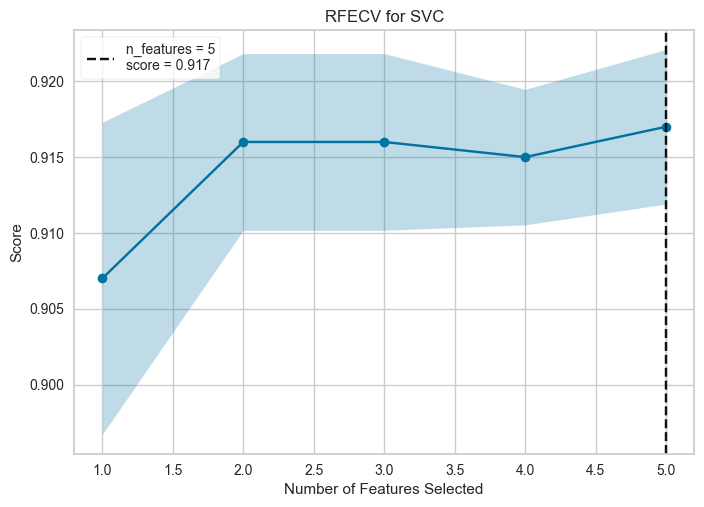

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [70]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=2, n_redundant=2,
    n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=0,
    )

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [118]:
# In this example we can see that 5 features were selected, though there doesn’t appear to be much improvement
# in the f1 score of the model after around 2 features.
# the curve jumps to an excellent accuracy when the three informative features are captured, 
# then gradually decreases in accuracy as the non informative features are added into the model.
# to find the optimal number of features cross-validation is used with RFE to score different feature subsets
# and select the best scoring collection of features.

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

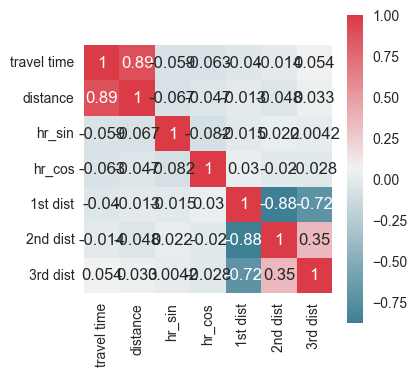

In [119]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [120]:
x = np.array(df7[['distance','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.9924982 , 0.95984056, 0.0243202 , 0.01485323],
       [0.34431452, 0.73779776, 0.18979812, 0.04231177],
       [0.0187128 , 0.63380264, 0.36619736, 0.        ],
       ...,
       [0.35869106, 0.51086397, 0.38216081, 0.10697521],
       [0.01601933, 0.75269334, 0.24730666, 0.        ],
       [0.74282641, 0.92774867, 0.03339001, 0.02127069]])

In [121]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [122]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13326, 4)
(3332, 4)


In [123]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 351907.9062 - mape: 71.8157 - rmse: 593.2183 - val_loss: 102808.5938 - val_mape: 59.1430 - val_rmse: 320.6378
Epoch 2/500
417/417 [==============================] - 0s 795us/step - loss: 92366.3516 - mape: 56.8593 - rmse: 303.9183 - val_loss: 75174.2188 - val_mape: 54.4075 - val_rmse: 274.1792
Epoch 3/500
417/417 [==============================] - 0s 828us/step - loss: 61373.6641 - mape: 45.0684 - rmse: 247.7371 - val_loss: 44432.6562 - val_mape: 38.4046 - val_rmse: 210.7906
Epoch 4/500
417/417 [==============================] - 0s 824us/step - loss: 37688.1055 - mape: 30.5830 - rmse: 194.1342 - val_loss: 30947.0508 - val_mape: 25.6321 - val_rmse: 175.9177
Epoch 5/500
417/417 [==============================] - 0s 856us/step - loss: 32156.3379 - mape: 23.8583 - rmse: 179.3219 - val_loss: 29982.3906 - val_mape: 23.3422 - val_rmse: 173.1542
Epoch 6/500
417/417 [==============================] - 0s 811us/step - loss

417/417 [==============================] - 0s 909us/step - loss: 31526.4219 - mape: 21.8908 - rmse: 177.5568 - val_loss: 29691.2539 - val_mape: 22.3103 - val_rmse: 172.3115
Epoch 90/500
417/417 [==============================] - 0s 896us/step - loss: 31571.7754 - mape: 21.9448 - rmse: 177.6845 - val_loss: 29812.9453 - val_mape: 21.1166 - val_rmse: 172.6643
Epoch 91/500
417/417 [==============================] - 0s 896us/step - loss: 31521.7871 - mape: 21.8832 - rmse: 177.5438 - val_loss: 29851.7676 - val_mape: 23.1599 - val_rmse: 172.7766
Epoch 92/500
417/417 [==============================] - 0s 896us/step - loss: 31517.4766 - mape: 21.9196 - rmse: 177.5316 - val_loss: 29667.9062 - val_mape: 21.6652 - val_rmse: 172.2437
Epoch 93/500
417/417 [==============================] - 0s 896us/step - loss: 31499.6641 - mape: 21.9451 - rmse: 177.4814 - val_loss: 29892.9316 - val_mape: 22.7855 - val_rmse: 172.8957
Epoch 94/500
417/417 [==============================] - 0s 879us/step - loss: 31540

Epoch 133/500
417/417 [==============================] - 0s 830us/step - loss: 31471.1875 - mape: 21.8617 - rmse: 177.4012 - val_loss: 29642.5879 - val_mape: 22.0304 - val_rmse: 172.1702
Epoch 134/500
417/417 [==============================] - 0s 847us/step - loss: 31487.2969 - mape: 21.9119 - rmse: 177.4466 - val_loss: 30120.1230 - val_mape: 23.7071 - val_rmse: 173.5515
Epoch 135/500
417/417 [==============================] - 0s 822us/step - loss: 31486.3184 - mape: 21.8036 - rmse: 177.4438 - val_loss: 30189.7793 - val_mape: 24.1148 - val_rmse: 173.7521
Epoch 136/500
417/417 [==============================] - 0s 790us/step - loss: 31480.2109 - mape: 21.9184 - rmse: 177.4266 - val_loss: 29902.1602 - val_mape: 23.1766 - val_rmse: 172.9224
Epoch 137/500
417/417 [==============================] - 0s 805us/step - loss: 31477.0820 - mape: 21.8565 - rmse: 177.4178 - val_loss: 29657.1660 - val_mape: 22.4334 - val_rmse: 172.2126
Epoch 138/500
417/417 [==============================] - 0s 797us

Epoch 177/500
417/417 [==============================] - 0s 785us/step - loss: 31468.3496 - mape: 21.9351 - rmse: 177.3932 - val_loss: 29602.5977 - val_mape: 22.1525 - val_rmse: 172.0541
Epoch 178/500
417/417 [==============================] - 0s 763us/step - loss: 31474.0371 - mape: 21.8697 - rmse: 177.4092 - val_loss: 29633.7031 - val_mape: 21.2989 - val_rmse: 172.1444
Epoch 179/500
417/417 [==============================] - 0s 759us/step - loss: 31474.3125 - mape: 21.8423 - rmse: 177.4100 - val_loss: 29629.1484 - val_mape: 22.2648 - val_rmse: 172.1312
Epoch 180/500
417/417 [==============================] - 0s 794us/step - loss: 31479.5156 - mape: 21.8866 - rmse: 177.4247 - val_loss: 29602.1152 - val_mape: 21.7217 - val_rmse: 172.0527
Epoch 181/500
417/417 [==============================] - 0s 766us/step - loss: 31457.5879 - mape: 21.8059 - rmse: 177.3629 - val_loss: 29704.6074 - val_mape: 22.7226 - val_rmse: 172.3503
Epoch 182/500
417/417 [==============================] - 0s 793us

Epoch 221/500
417/417 [==============================] - 0s 797us/step - loss: 31443.9805 - mape: 21.8863 - rmse: 177.3245 - val_loss: 29848.5195 - val_mape: 22.8707 - val_rmse: 172.7672
Epoch 222/500
417/417 [==============================] - 0s 797us/step - loss: 31479.8066 - mape: 21.7855 - rmse: 177.4255 - val_loss: 29682.6582 - val_mape: 22.9161 - val_rmse: 172.2866
Epoch 223/500
417/417 [==============================] - 0s 799us/step - loss: 31447.6113 - mape: 21.8716 - rmse: 177.3347 - val_loss: 29626.2500 - val_mape: 22.3126 - val_rmse: 172.1228
Epoch 224/500
417/417 [==============================] - 0s 778us/step - loss: 31441.1641 - mape: 21.9206 - rmse: 177.3166 - val_loss: 29611.9082 - val_mape: 21.5147 - val_rmse: 172.0811
Epoch 225/500
417/417 [==============================] - 0s 816us/step - loss: 31461.1719 - mape: 21.7737 - rmse: 177.3730 - val_loss: 29612.1133 - val_mape: 21.5058 - val_rmse: 172.0817
Epoch 226/500
417/417 [==============================] - 0s 784us

Epoch 265/500
417/417 [==============================] - 0s 866us/step - loss: 31436.2559 - mape: 21.8653 - rmse: 177.3027 - val_loss: 29638.4414 - val_mape: 22.6392 - val_rmse: 172.1582
Epoch 266/500
417/417 [==============================] - 0s 823us/step - loss: 31469.3418 - mape: 21.8425 - rmse: 177.3960 - val_loss: 29748.8281 - val_mape: 21.1188 - val_rmse: 172.4785
Epoch 267/500
417/417 [==============================] - 0s 807us/step - loss: 31461.8086 - mape: 21.8930 - rmse: 177.3748 - val_loss: 29730.3633 - val_mape: 22.7614 - val_rmse: 172.4250
Epoch 268/500
417/417 [==============================] - 0s 798us/step - loss: 31427.1602 - mape: 21.9108 - rmse: 177.2771 - val_loss: 29660.3145 - val_mape: 22.2582 - val_rmse: 172.2217
Epoch 269/500
417/417 [==============================] - 0s 881us/step - loss: 31446.0684 - mape: 21.8129 - rmse: 177.3304 - val_loss: 29585.6250 - val_mape: 21.7686 - val_rmse: 172.0047
Epoch 270/500
417/417 [==============================] - 0s 822us

Epoch 309/500
417/417 [==============================] - 0s 809us/step - loss: 31381.1523 - mape: 21.7982 - rmse: 177.1473 - val_loss: 29717.9805 - val_mape: 22.9542 - val_rmse: 172.3890
Epoch 310/500
417/417 [==============================] - 0s 822us/step - loss: 31415.3008 - mape: 21.9118 - rmse: 177.2436 - val_loss: 29661.9258 - val_mape: 20.9592 - val_rmse: 172.2264
Epoch 311/500
417/417 [==============================] - 0s 809us/step - loss: 31398.2383 - mape: 21.7323 - rmse: 177.1955 - val_loss: 29597.1328 - val_mape: 22.2963 - val_rmse: 172.0382
Epoch 312/500
417/417 [==============================] - 0s 789us/step - loss: 31397.6055 - mape: 21.8487 - rmse: 177.1937 - val_loss: 29782.8457 - val_mape: 23.2459 - val_rmse: 172.5771
Epoch 313/500
417/417 [==============================] - 0s 800us/step - loss: 31433.2168 - mape: 21.9135 - rmse: 177.2942 - val_loss: 29548.4512 - val_mape: 21.4971 - val_rmse: 171.8966
Epoch 314/500
417/417 [==============================] - 0s 805us

Epoch 353/500
417/417 [==============================] - 0s 795us/step - loss: 31410.3691 - mape: 21.8600 - rmse: 177.2297 - val_loss: 29745.2500 - val_mape: 22.5738 - val_rmse: 172.4681
Epoch 354/500
417/417 [==============================] - 0s 787us/step - loss: 31434.3906 - mape: 21.7899 - rmse: 177.2975 - val_loss: 29697.6191 - val_mape: 22.8357 - val_rmse: 172.3300
Epoch 355/500
417/417 [==============================] - 0s 797us/step - loss: 31416.1035 - mape: 21.7990 - rmse: 177.2459 - val_loss: 29740.7422 - val_mape: 23.1265 - val_rmse: 172.4550
Epoch 356/500
417/417 [==============================] - 0s 850us/step - loss: 31416.5430 - mape: 21.8481 - rmse: 177.2471 - val_loss: 29582.2539 - val_mape: 22.3516 - val_rmse: 171.9949
Epoch 357/500
417/417 [==============================] - 0s 832us/step - loss: 31411.5254 - mape: 21.8270 - rmse: 177.2330 - val_loss: 29634.2402 - val_mape: 22.5658 - val_rmse: 172.1460
Epoch 358/500
417/417 [==============================] - 0s 832us

Epoch 397/500
417/417 [==============================] - 0s 800us/step - loss: 31430.9570 - mape: 21.7989 - rmse: 177.2878 - val_loss: 29556.9023 - val_mape: 22.0106 - val_rmse: 171.9212
Epoch 398/500
417/417 [==============================] - 0s 798us/step - loss: 31421.0898 - mape: 21.8526 - rmse: 177.2599 - val_loss: 29716.5977 - val_mape: 20.9743 - val_rmse: 172.3850
Epoch 399/500
417/417 [==============================] - 0s 805us/step - loss: 31442.1992 - mape: 21.8999 - rmse: 177.3195 - val_loss: 29617.4531 - val_mape: 21.0582 - val_rmse: 172.0972
Epoch 400/500
417/417 [==============================] - 0s 799us/step - loss: 31425.1738 - mape: 21.8474 - rmse: 177.2715 - val_loss: 29553.1191 - val_mape: 21.7020 - val_rmse: 171.9102
Epoch 401/500
417/417 [==============================] - 0s 805us/step - loss: 31445.7832 - mape: 21.8073 - rmse: 177.3296 - val_loss: 29835.8887 - val_mape: 23.4630 - val_rmse: 172.7307
Epoch 402/500
417/417 [==============================] - 0s 796us

Epoch 441/500
417/417 [==============================] - 0s 810us/step - loss: 31417.1895 - mape: 21.7617 - rmse: 177.2489 - val_loss: 29560.0273 - val_mape: 21.8552 - val_rmse: 171.9303
Epoch 442/500
417/417 [==============================] - 0s 797us/step - loss: 31440.1953 - mape: 21.7631 - rmse: 177.3138 - val_loss: 29671.4238 - val_mape: 22.8640 - val_rmse: 172.2540
Epoch 443/500
417/417 [==============================] - 0s 795us/step - loss: 31398.3379 - mape: 21.8915 - rmse: 177.1958 - val_loss: 29549.6836 - val_mape: 21.7648 - val_rmse: 171.9002
Epoch 444/500
417/417 [==============================] - 0s 798us/step - loss: 31402.5762 - mape: 21.8330 - rmse: 177.2077 - val_loss: 29592.9824 - val_mape: 22.0129 - val_rmse: 172.0261
Epoch 445/500
417/417 [==============================] - 0s 810us/step - loss: 31388.4980 - mape: 21.8291 - rmse: 177.1680 - val_loss: 30227.0723 - val_mape: 24.2802 - val_rmse: 173.8593
Epoch 446/500
417/417 [==============================] - 0s 801us

Epoch 485/500
417/417 [==============================] - 0s 798us/step - loss: 31399.7949 - mape: 21.9125 - rmse: 177.1999 - val_loss: 29590.9766 - val_mape: 21.1598 - val_rmse: 172.0203
Epoch 486/500
417/417 [==============================] - 0s 831us/step - loss: 31412.1816 - mape: 21.8653 - rmse: 177.2348 - val_loss: 29610.1602 - val_mape: 20.9764 - val_rmse: 172.0760
Epoch 487/500
417/417 [==============================] - 0s 855us/step - loss: 31431.0098 - mape: 21.8196 - rmse: 177.2879 - val_loss: 29724.0859 - val_mape: 22.4966 - val_rmse: 172.4067
Epoch 488/500
417/417 [==============================] - 0s 844us/step - loss: 31401.5957 - mape: 21.8260 - rmse: 177.2050 - val_loss: 29577.4375 - val_mape: 21.3345 - val_rmse: 171.9809
Epoch 489/500
417/417 [==============================] - 0s 824us/step - loss: 31403.7832 - mape: 21.7669 - rmse: 177.2111 - val_loss: 29645.6250 - val_mape: 22.7902 - val_rmse: 172.1790
Epoch 490/500
417/417 [==============================] - 0s 860us

In [124]:
# plotme(model6_1_1)

In [125]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
417/417 [==============================] - 1s 1ms/step - loss: 246590.0000 - mape: 66.3928 - rmse: 496.5783 - val_loss: 84383.5078 - val_mape: 55.4528 - val_rmse: 290.4884
Epoch 2/500
417/417 [==============================] - 0s 905us/step - loss: 64195.2188 - mape: 46.3013 - rmse: 253.3678 - val_loss: 40600.0625 - val_mape: 34.5939 - val_rmse: 201.4946
Epoch 3/500
417/417 [==============================] - 0s 919us/step - loss: 34742.6172 - mape: 27.5009 - rmse: 186.3937 - val_loss: 30187.6270 - val_mape: 24.4577 - val_rmse: 173.7459
Epoch 4/500
417/417 [==============================] - 0s 920us/step - loss: 31981.1953 - mape: 23.2005 - rmse: 178.8329 - val_loss: 30076.6602 - val_mape: 23.5186 - val_rmse: 173.4262
Epoch 5/500
417/417 [==============================] - 0s 975us/step - loss: 31980.4648 - mape: 23.0125 - rmse: 178.8308 - val_loss: 30172.0195 - val_mape: 22.0263 - val_rmse: 173.7009
Epoch 6/500
417/417 [==============================] - 0s 1ms/step - loss: 3

417/417 [==============================] - 0s 929us/step - loss: 32004.8730 - mape: 23.0471 - rmse: 178.8991 - val_loss: 30207.5488 - val_mape: 24.3615 - val_rmse: 173.8032
Epoch 90/500
417/417 [==============================] - 0s 924us/step - loss: 32011.4688 - mape: 23.0093 - rmse: 178.9175 - val_loss: 30002.1992 - val_mape: 22.7748 - val_rmse: 173.2114
Epoch 91/500
417/417 [==============================] - 0s 930us/step - loss: 31943.3418 - mape: 22.9003 - rmse: 178.7270 - val_loss: 30032.7344 - val_mape: 22.6994 - val_rmse: 173.2995
Epoch 92/500
417/417 [==============================] - 0s 961us/step - loss: 31967.0469 - mape: 22.8809 - rmse: 178.7933 - val_loss: 30029.8555 - val_mape: 22.9740 - val_rmse: 173.2912
Epoch 93/500
417/417 [==============================] - 0s 951us/step - loss: 32017.2168 - mape: 22.9837 - rmse: 178.9335 - val_loss: 30107.8359 - val_mape: 23.9352 - val_rmse: 173.5161
Epoch 94/500
417/417 [==============================] - 0s 947us/step - loss: 32004

Epoch 133/500
417/417 [==============================] - 0s 947us/step - loss: 31957.5371 - mape: 22.9667 - rmse: 178.7667 - val_loss: 30104.5566 - val_mape: 23.6769 - val_rmse: 173.5067
Epoch 134/500
417/417 [==============================] - 0s 934us/step - loss: 32018.8008 - mape: 23.0133 - rmse: 178.9380 - val_loss: 30299.0684 - val_mape: 21.6858 - val_rmse: 174.0663
Epoch 135/500
417/417 [==============================] - 0s 941us/step - loss: 32013.0410 - mape: 22.8769 - rmse: 178.9219 - val_loss: 30271.1797 - val_mape: 24.1733 - val_rmse: 173.9861
Epoch 136/500
417/417 [==============================] - 0s 932us/step - loss: 31948.4277 - mape: 22.9188 - rmse: 178.7412 - val_loss: 30120.8477 - val_mape: 23.8589 - val_rmse: 173.5536
Epoch 137/500
417/417 [==============================] - 0s 933us/step - loss: 31963.1035 - mape: 22.8517 - rmse: 178.7823 - val_loss: 30020.6934 - val_mape: 23.0972 - val_rmse: 173.2648
Epoch 138/500
417/417 [==============================] - 0s 936us

Epoch 177/500
417/417 [==============================] - 0s 928us/step - loss: 32027.4062 - mape: 22.9453 - rmse: 178.9620 - val_loss: 30087.0586 - val_mape: 23.7952 - val_rmse: 173.4562
Epoch 178/500
417/417 [==============================] - 0s 914us/step - loss: 32030.8047 - mape: 22.9182 - rmse: 178.9715 - val_loss: 30053.2988 - val_mape: 22.7267 - val_rmse: 173.3589
Epoch 179/500
417/417 [==============================] - 0s 912us/step - loss: 31972.7363 - mape: 23.0357 - rmse: 178.8092 - val_loss: 29986.2090 - val_mape: 22.3589 - val_rmse: 173.1653
Epoch 180/500
417/417 [==============================] - 0s 945us/step - loss: 31973.4609 - mape: 22.8974 - rmse: 178.8112 - val_loss: 30006.0234 - val_mape: 23.2116 - val_rmse: 173.2225
Epoch 181/500
417/417 [==============================] - 0s 927us/step - loss: 31970.8184 - mape: 22.9039 - rmse: 178.8038 - val_loss: 29995.0059 - val_mape: 23.3236 - val_rmse: 173.1907
Epoch 182/500
417/417 [==============================] - 0s 933us

Epoch 221/500
417/417 [==============================] - 0s 918us/step - loss: 31986.4043 - mape: 22.9936 - rmse: 178.8474 - val_loss: 30023.3730 - val_mape: 23.4212 - val_rmse: 173.2725
Epoch 222/500
417/417 [==============================] - 0s 944us/step - loss: 31998.2852 - mape: 22.9210 - rmse: 178.8806 - val_loss: 30245.9648 - val_mape: 24.0796 - val_rmse: 173.9137
Epoch 223/500
417/417 [==============================] - 0s 933us/step - loss: 32024.5215 - mape: 22.9460 - rmse: 178.9540 - val_loss: 30022.0762 - val_mape: 23.4748 - val_rmse: 173.2688
Epoch 224/500
417/417 [==============================] - 0s 957us/step - loss: 32026.2832 - mape: 23.0002 - rmse: 178.9589 - val_loss: 30095.3008 - val_mape: 22.2707 - val_rmse: 173.4800
Epoch 225/500
417/417 [==============================] - 0s 933us/step - loss: 31993.3320 - mape: 22.9450 - rmse: 178.8668 - val_loss: 29979.0781 - val_mape: 22.6312 - val_rmse: 173.1447
Epoch 226/500
417/417 [==============================] - 0s 939us

Epoch 265/500
417/417 [==============================] - 0s 926us/step - loss: 32015.2715 - mape: 22.9340 - rmse: 178.9281 - val_loss: 29998.1055 - val_mape: 23.2700 - val_rmse: 173.1996
Epoch 266/500
417/417 [==============================] - 0s 932us/step - loss: 31966.7031 - mape: 22.9030 - rmse: 178.7923 - val_loss: 29976.1602 - val_mape: 22.8101 - val_rmse: 173.1362
Epoch 267/500
417/417 [==============================] - 0s 933us/step - loss: 31976.1035 - mape: 22.9853 - rmse: 178.8186 - val_loss: 30113.1230 - val_mape: 22.1165 - val_rmse: 173.5313
Epoch 268/500
417/417 [==============================] - 0s 935us/step - loss: 31903.9180 - mape: 22.8275 - rmse: 178.6167 - val_loss: 30193.3438 - val_mape: 22.6163 - val_rmse: 173.7623
Epoch 269/500
417/417 [==============================] - 0s 923us/step - loss: 32006.0488 - mape: 23.0303 - rmse: 178.9023 - val_loss: 30007.1016 - val_mape: 22.5809 - val_rmse: 173.2256
Epoch 270/500
417/417 [==============================] - 0s 934us

Epoch 309/500
417/417 [==============================] - 0s 938us/step - loss: 32019.8301 - mape: 22.8963 - rmse: 178.9409 - val_loss: 30070.7949 - val_mape: 22.7932 - val_rmse: 173.4093
Epoch 310/500
417/417 [==============================] - 0s 927us/step - loss: 31969.0137 - mape: 22.9445 - rmse: 178.7988 - val_loss: 29990.0430 - val_mape: 23.3374 - val_rmse: 173.1763
Epoch 311/500
417/417 [==============================] - 0s 925us/step - loss: 31950.4512 - mape: 22.8798 - rmse: 178.7469 - val_loss: 29998.8125 - val_mape: 23.3284 - val_rmse: 173.2017
Epoch 312/500
417/417 [==============================] - 0s 928us/step - loss: 31970.6406 - mape: 23.0507 - rmse: 178.8034 - val_loss: 29948.1230 - val_mape: 22.6474 - val_rmse: 173.0553
Epoch 313/500
417/417 [==============================] - 0s 932us/step - loss: 31994.3555 - mape: 22.8505 - rmse: 178.8697 - val_loss: 29976.5410 - val_mape: 22.9206 - val_rmse: 173.1373
Epoch 314/500
417/417 [==============================] - 0s 925us

Epoch 353/500
417/417 [==============================] - 0s 912us/step - loss: 31993.7246 - mape: 22.9325 - rmse: 178.8679 - val_loss: 30036.8398 - val_mape: 23.7532 - val_rmse: 173.3114
Epoch 354/500
417/417 [==============================] - 0s 905us/step - loss: 31975.9922 - mape: 23.0524 - rmse: 178.8183 - val_loss: 30271.6816 - val_mape: 24.2981 - val_rmse: 173.9876
Epoch 355/500
417/417 [==============================] - 0s 920us/step - loss: 31995.5449 - mape: 22.8993 - rmse: 178.8730 - val_loss: 30008.7715 - val_mape: 23.5688 - val_rmse: 173.2304
Epoch 356/500
417/417 [==============================] - 0s 941us/step - loss: 31975.6426 - mape: 22.9598 - rmse: 178.8173 - val_loss: 30076.8301 - val_mape: 23.7618 - val_rmse: 173.4267
Epoch 357/500
417/417 [==============================] - 0s 922us/step - loss: 32003.4727 - mape: 22.9892 - rmse: 178.8951 - val_loss: 29985.4199 - val_mape: 23.1966 - val_rmse: 173.1630
Epoch 358/500
417/417 [==============================] - 0s 938us

Epoch 397/500
417/417 [==============================] - 0s 942us/step - loss: 31996.8633 - mape: 22.8824 - rmse: 178.8767 - val_loss: 30011.7656 - val_mape: 23.4845 - val_rmse: 173.2390
Epoch 398/500
417/417 [==============================] - 0s 927us/step - loss: 31969.1680 - mape: 22.9379 - rmse: 178.7992 - val_loss: 30076.4902 - val_mape: 23.8263 - val_rmse: 173.4258
Epoch 399/500
417/417 [==============================] - 0s 940us/step - loss: 31985.6758 - mape: 22.9165 - rmse: 178.8454 - val_loss: 30193.9883 - val_mape: 24.1320 - val_rmse: 173.7642
Epoch 400/500
417/417 [==============================] - 0s 928us/step - loss: 31986.1953 - mape: 22.9225 - rmse: 178.8468 - val_loss: 30077.7031 - val_mape: 23.9082 - val_rmse: 173.4292
Epoch 401/500
417/417 [==============================] - 0s 934us/step - loss: 32010.7852 - mape: 22.9080 - rmse: 178.9156 - val_loss: 30088.3887 - val_mape: 23.9468 - val_rmse: 173.4601
Epoch 402/500
417/417 [==============================] - 0s 973us

Epoch 441/500
417/417 [==============================] - 0s 932us/step - loss: 31991.3633 - mape: 23.0107 - rmse: 178.8613 - val_loss: 30012.5938 - val_mape: 23.0846 - val_rmse: 173.2414
Epoch 442/500
417/417 [==============================] - 0s 930us/step - loss: 32035.7441 - mape: 22.8780 - rmse: 178.9853 - val_loss: 29970.5430 - val_mape: 22.8475 - val_rmse: 173.1200
Epoch 443/500
417/417 [==============================] - 0s 927us/step - loss: 32032.2227 - mape: 22.9420 - rmse: 178.9755 - val_loss: 30067.7793 - val_mape: 22.4075 - val_rmse: 173.4006
Epoch 444/500
417/417 [==============================] - 0s 942us/step - loss: 31971.9336 - mape: 22.9561 - rmse: 178.8070 - val_loss: 30083.4434 - val_mape: 23.6505 - val_rmse: 173.4458
Epoch 445/500
417/417 [==============================] - 0s 921us/step - loss: 31951.6895 - mape: 22.8803 - rmse: 178.7504 - val_loss: 30107.8770 - val_mape: 23.8493 - val_rmse: 173.5162
Epoch 446/500
417/417 [==============================] - 0s 920us

Epoch 485/500
417/417 [==============================] - 0s 932us/step - loss: 31957.6191 - mape: 22.9733 - rmse: 178.7669 - val_loss: 30297.5527 - val_mape: 24.3431 - val_rmse: 174.0619
Epoch 486/500
417/417 [==============================] - 0s 945us/step - loss: 32036.7090 - mape: 22.9842 - rmse: 178.9880 - val_loss: 30064.1230 - val_mape: 21.9826 - val_rmse: 173.3901
Epoch 487/500
417/417 [==============================] - 0s 946us/step - loss: 31951.6777 - mape: 22.8646 - rmse: 178.7503 - val_loss: 30529.6738 - val_mape: 24.8823 - val_rmse: 174.7274
Epoch 488/500
417/417 [==============================] - 0s 983us/step - loss: 32021.5605 - mape: 22.9924 - rmse: 178.9457 - val_loss: 29972.0645 - val_mape: 22.7125 - val_rmse: 173.1244
Epoch 489/500
417/417 [==============================] - 0s 1ms/step - loss: 31978.5449 - mape: 22.9058 - rmse: 178.8255 - val_loss: 30156.2441 - val_mape: 24.1295 - val_rmse: 173.6555
Epoch 490/500
417/417 [==============================] - 0s 928us/s

In [126]:
194.6574/60

3.24429

In [127]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
417/417 [==============================] - 1s 859us/step - loss: 552398.8125 - mape: 98.2323 - rmse: 743.2354 - val_loss: 517704.3750 - val_mape: 94.6911 - val_rmse: 719.5168
Epoch 2/500
417/417 [==============================] - 0s 731us/step - loss: 490821.8125 - mape: 87.9493 - rmse: 700.5868 - val_loss: 431454.6250 - val_mape: 79.3501 - val_rmse: 656.8521
Epoch 3/500
417/417 [==============================] - 0s 731us/step - loss: 388367.1250 - mape: 69.4691 - rmse: 623.1911 - val_loss: 322011.4688 - val_mape: 59.3738 - val_rmse: 567.4606
Epoch 4/500
417/417 [==============================] - 0s 724us/step - loss: 280422.3125 - mape: 51.9429 - rmse: 529.5491 - val_loss: 224003.9375 - val_mape: 46.2958 - val_rmse: 473.2905
Epoch 5/500
417/417 [==============================] - 0s 739us/step - loss: 194597.9375 - mape: 43.9549 - rmse: 441.1326 - val_loss: 155947.7969 - val_mape: 44.1898 - val_rmse: 394.9023
Epoch 6/500
417/417 [==============================] - 0s 743us/s

417/417 [==============================] - 0s 724us/step - loss: 31757.0938 - mape: 22.8065 - rmse: 178.2052 - val_loss: 29922.9980 - val_mape: 23.1546 - val_rmse: 172.9827
Epoch 46/500
417/417 [==============================] - 0s 734us/step - loss: 31754.1680 - mape: 22.8262 - rmse: 178.1970 - val_loss: 29906.1172 - val_mape: 22.8333 - val_rmse: 172.9339
Epoch 47/500
417/417 [==============================] - 0s 730us/step - loss: 31754.4102 - mape: 22.7301 - rmse: 178.1977 - val_loss: 29910.2617 - val_mape: 22.9611 - val_rmse: 172.9458
Epoch 48/500
417/417 [==============================] - 0s 747us/step - loss: 31752.8965 - mape: 22.7053 - rmse: 178.1934 - val_loss: 29954.9453 - val_mape: 23.3860 - val_rmse: 173.0750
Epoch 49/500
417/417 [==============================] - 0s 727us/step - loss: 31753.6797 - mape: 22.8090 - rmse: 178.1956 - val_loss: 29924.1641 - val_mape: 23.1348 - val_rmse: 172.9860
Epoch 50/500
417/417 [==============================] - 0s 733us/step - loss: 31746

Epoch 133/500
417/417 [==============================] - 0s 722us/step - loss: 31673.5879 - mape: 22.5763 - rmse: 177.9707 - val_loss: 29946.7324 - val_mape: 23.3450 - val_rmse: 173.0512
Epoch 134/500
417/417 [==============================] - 0s 724us/step - loss: 31685.2949 - mape: 22.6900 - rmse: 178.0036 - val_loss: 29902.3633 - val_mape: 23.0307 - val_rmse: 172.9230
Epoch 135/500
417/417 [==============================] - 0s 719us/step - loss: 31683.3926 - mape: 22.5743 - rmse: 177.9983 - val_loss: 29918.2285 - val_mape: 23.1760 - val_rmse: 172.9689
Epoch 136/500
417/417 [==============================] - 0s 737us/step - loss: 31678.9961 - mape: 22.6100 - rmse: 177.9859 - val_loss: 29947.4551 - val_mape: 23.3543 - val_rmse: 173.0533
Epoch 137/500
417/417 [==============================] - 0s 741us/step - loss: 31681.9551 - mape: 22.6967 - rmse: 177.9943 - val_loss: 29902.8711 - val_mape: 23.0368 - val_rmse: 172.9245
Epoch 138/500
417/417 [==============================] - 0s 740us

Epoch 177/500
417/417 [==============================] - 0s 757us/step - loss: 31670.0469 - mape: 22.5314 - rmse: 177.9608 - val_loss: 29900.5645 - val_mape: 23.1361 - val_rmse: 172.9178
Epoch 178/500
417/417 [==============================] - 0s 726us/step - loss: 31663.9062 - mape: 22.6274 - rmse: 177.9435 - val_loss: 29893.0957 - val_mape: 23.0825 - val_rmse: 172.8962
Epoch 179/500
417/417 [==============================] - 0s 741us/step - loss: 31673.0586 - mape: 22.6474 - rmse: 177.9693 - val_loss: 29872.6680 - val_mape: 22.8720 - val_rmse: 172.8371
Epoch 180/500
417/417 [==============================] - 0s 745us/step - loss: 31666.2148 - mape: 22.5790 - rmse: 177.9500 - val_loss: 29898.1465 - val_mape: 23.1319 - val_rmse: 172.9108
Epoch 181/500
417/417 [==============================] - 0s 731us/step - loss: 31664.8242 - mape: 22.6399 - rmse: 177.9461 - val_loss: 29882.9102 - val_mape: 23.0026 - val_rmse: 172.8667
Epoch 182/500
417/417 [==============================] - 0s 728us

Epoch 221/500
417/417 [==============================] - 0s 742us/step - loss: 31655.7520 - mape: 22.6080 - rmse: 177.9206 - val_loss: 29847.1816 - val_mape: 22.8038 - val_rmse: 172.7634
Epoch 222/500
417/417 [==============================] - 0s 706us/step - loss: 31645.6152 - mape: 22.5822 - rmse: 177.8922 - val_loss: 29862.2090 - val_mape: 23.0128 - val_rmse: 172.8069
Epoch 223/500
417/417 [==============================] - 0s 715us/step - loss: 31646.2637 - mape: 22.5655 - rmse: 177.8940 - val_loss: 29888.2441 - val_mape: 23.2271 - val_rmse: 172.8822
Epoch 224/500
417/417 [==============================] - 0s 718us/step - loss: 31645.3594 - mape: 22.6638 - rmse: 177.8914 - val_loss: 29845.8340 - val_mape: 22.8200 - val_rmse: 172.7595
Epoch 225/500
417/417 [==============================] - 0s 718us/step - loss: 31643.2285 - mape: 22.5964 - rmse: 177.8854 - val_loss: 29854.1191 - val_mape: 22.9451 - val_rmse: 172.7834
Epoch 226/500
417/417 [==============================] - 0s 718us

Epoch 265/500
417/417 [==============================] - 0s 734us/step - loss: 31625.9844 - mape: 22.6093 - rmse: 177.8370 - val_loss: 29827.1484 - val_mape: 22.7670 - val_rmse: 172.7054
Epoch 266/500
417/417 [==============================] - 0s 724us/step - loss: 31618.4863 - mape: 22.5259 - rmse: 177.8159 - val_loss: 29873.0977 - val_mape: 23.2342 - val_rmse: 172.8384
Epoch 267/500
417/417 [==============================] - 0s 723us/step - loss: 31631.6738 - mape: 22.6116 - rmse: 177.8530 - val_loss: 29879.9082 - val_mape: 23.2860 - val_rmse: 172.8581
Epoch 268/500
417/417 [==============================] - 0s 722us/step - loss: 31619.8535 - mape: 22.6250 - rmse: 177.8197 - val_loss: 29845.8438 - val_mape: 23.0433 - val_rmse: 172.7595
Epoch 269/500
417/417 [==============================] - 0s 744us/step - loss: 31624.0664 - mape: 22.6198 - rmse: 177.8316 - val_loss: 29845.0645 - val_mape: 23.0393 - val_rmse: 172.7572
Epoch 270/500
417/417 [==============================] - 0s 736us

Epoch 309/500
417/417 [==============================] - 0s 722us/step - loss: 31605.0352 - mape: 22.5729 - rmse: 177.7780 - val_loss: 29812.9199 - val_mape: 22.8652 - val_rmse: 172.6642
Epoch 310/500
417/417 [==============================] - 0s 725us/step - loss: 31607.3848 - mape: 22.5548 - rmse: 177.7847 - val_loss: 29812.3672 - val_mape: 22.8760 - val_rmse: 172.6626
Epoch 311/500
417/417 [==============================] - 0s 731us/step - loss: 31606.7500 - mape: 22.5651 - rmse: 177.7829 - val_loss: 29823.3711 - val_mape: 22.9941 - val_rmse: 172.6944
Epoch 312/500
417/417 [==============================] - 0s 744us/step - loss: 31604.5117 - mape: 22.6125 - rmse: 177.7766 - val_loss: 29806.9336 - val_mape: 22.7942 - val_rmse: 172.6469
Epoch 313/500
417/417 [==============================] - 0s 755us/step - loss: 31603.6797 - mape: 22.5277 - rmse: 177.7742 - val_loss: 29844.0508 - val_mape: 23.1694 - val_rmse: 172.7543
Epoch 314/500
417/417 [==============================] - 0s 748us

Epoch 353/500
417/417 [==============================] - 0s 736us/step - loss: 31585.2324 - mape: 22.5236 - rmse: 177.7224 - val_loss: 29803.7617 - val_mape: 22.9704 - val_rmse: 172.6377
Epoch 354/500
417/417 [==============================] - 0s 714us/step - loss: 31586.0176 - mape: 22.5743 - rmse: 177.7245 - val_loss: 29804.9844 - val_mape: 22.9756 - val_rmse: 172.6412
Epoch 355/500
417/417 [==============================] - 0s 735us/step - loss: 31589.0156 - mape: 22.5902 - rmse: 177.7330 - val_loss: 29789.2129 - val_mape: 22.7895 - val_rmse: 172.5955
Epoch 356/500
417/417 [==============================] - 0s 727us/step - loss: 31589.7441 - mape: 22.5209 - rmse: 177.7350 - val_loss: 29803.8145 - val_mape: 22.9708 - val_rmse: 172.6378
Epoch 357/500
417/417 [==============================] - 0s 728us/step - loss: 31587.5469 - mape: 22.5696 - rmse: 177.7289 - val_loss: 29798.4062 - val_mape: 22.9119 - val_rmse: 172.6221
Epoch 358/500
417/417 [==============================] - 0s 745us

Epoch 397/500
417/417 [==============================] - 0s 738us/step - loss: 31583.7363 - mape: 22.5032 - rmse: 177.7181 - val_loss: 29790.8164 - val_mape: 22.9318 - val_rmse: 172.6002
Epoch 398/500
417/417 [==============================] - 0s 774us/step - loss: 31580.2637 - mape: 22.5534 - rmse: 177.7084 - val_loss: 29786.7871 - val_mape: 22.8845 - val_rmse: 172.5885
Epoch 399/500
417/417 [==============================] - 0s 794us/step - loss: 31580.8105 - mape: 22.5664 - rmse: 177.7099 - val_loss: 29783.5508 - val_mape: 22.8423 - val_rmse: 172.5791
Epoch 400/500
417/417 [==============================] - 0s 764us/step - loss: 31581.9277 - mape: 22.5475 - rmse: 177.7130 - val_loss: 29776.3066 - val_mape: 22.7343 - val_rmse: 172.5581
Epoch 401/500
417/417 [==============================] - 0s 731us/step - loss: 31579.2090 - mape: 22.5768 - rmse: 177.7054 - val_loss: 29775.0117 - val_mape: 22.7018 - val_rmse: 172.5544
Epoch 402/500
417/417 [==============================] - 0s 716us

Epoch 441/500
417/417 [==============================] - 0s 718us/step - loss: 31573.1484 - mape: 22.5372 - rmse: 177.6883 - val_loss: 29771.0664 - val_mape: 22.7811 - val_rmse: 172.5429
Epoch 442/500
417/417 [==============================] - 0s 709us/step - loss: 31572.9609 - mape: 22.5710 - rmse: 177.6878 - val_loss: 29765.3203 - val_mape: 22.6045 - val_rmse: 172.5263
Epoch 443/500
417/417 [==============================] - 0s 731us/step - loss: 31570.4414 - mape: 22.5098 - rmse: 177.6807 - val_loss: 29801.4453 - val_mape: 23.0886 - val_rmse: 172.6310
Epoch 444/500
417/417 [==============================] - 0s 721us/step - loss: 31572.8105 - mape: 22.5773 - rmse: 177.6874 - val_loss: 29764.5312 - val_mape: 22.5984 - val_rmse: 172.5240
Epoch 445/500
417/417 [==============================] - 0s 727us/step - loss: 31571.0547 - mape: 22.4805 - rmse: 177.6824 - val_loss: 29786.8379 - val_mape: 22.9735 - val_rmse: 172.5886
Epoch 446/500
417/417 [==============================] - 0s 709us

Epoch 485/500
417/417 [==============================] - 0s 717us/step - loss: 31567.9609 - mape: 22.5274 - rmse: 177.6738 - val_loss: 29763.0156 - val_mape: 22.7334 - val_rmse: 172.5196
Epoch 486/500
417/417 [==============================] - 0s 722us/step - loss: 31569.3223 - mape: 22.4954 - rmse: 177.6776 - val_loss: 29764.1348 - val_mape: 22.7292 - val_rmse: 172.5229
Epoch 487/500
417/417 [==============================] - 0s 716us/step - loss: 31561.7148 - mape: 22.5802 - rmse: 177.6562 - val_loss: 29762.9238 - val_mape: 22.7126 - val_rmse: 172.5193
Epoch 488/500
417/417 [==============================] - 0s 716us/step - loss: 31565.7832 - mape: 22.5090 - rmse: 177.6676 - val_loss: 29764.4941 - val_mape: 22.7527 - val_rmse: 172.5239
Epoch 489/500
417/417 [==============================] - 0s 731us/step - loss: 31566.7773 - mape: 22.4925 - rmse: 177.6704 - val_loss: 29780.0820 - val_mape: 22.9476 - val_rmse: 172.5691
Epoch 490/500
417/417 [==============================] - 0s 719us

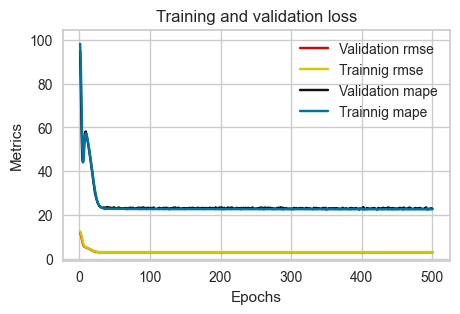

In [128]:
plotme(model6_1_3)

In [129]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
417/417 [==============================] - 1s 872us/step - loss: 559569.7500 - mape: 99.3954 - rmse: 748.0439 - val_loss: 540540.9375 - val_mape: 98.5036 - val_rmse: 735.2149
Epoch 2/500
417/417 [==============================] - 0s 719us/step - loss: 544842.7500 - mape: 97.0420 - rmse: 738.1346 - val_loss: 520454.0000 - val_mape: 95.1778 - val_rmse: 721.4250
Epoch 3/500
417/417 [==============================] - 0s 728us/step - loss: 519596.4062 - mape: 92.8911 - rmse: 720.8304 - val_loss: 491091.2500 - val_mape: 90.1690 - val_rmse: 700.7791
Epoch 4/500
417/417 [==============================] - 0s 723us/step - loss: 486206.2188 - mape: 87.2006 - rmse: 697.2849 - val_loss: 454977.5000 - val_mape: 83.7414 - val_rmse: 674.5202
Epoch 5/500
417/417 [==============================] - 0s 708us/step - loss: 447242.0625 - mape: 80.2717 - rmse: 668.7616 - val_loss: 414632.9375 - val_mape: 76.2118 - val_rmse: 643.9200
Epoch 6/500
417/417 [==============================] - 0s 727us/s

Epoch 45/500
417/417 [==============================] - 0s 731us/step - loss: 35420.0312 - mape: 28.4377 - rmse: 188.2021 - val_loss: 33170.4648 - val_mape: 28.4407 - val_rmse: 182.1276
Epoch 46/500
417/417 [==============================] - 0s 763us/step - loss: 34651.3398 - mape: 27.7334 - rmse: 186.1487 - val_loss: 32469.1602 - val_mape: 27.6136 - val_rmse: 180.1920
Epoch 47/500
417/417 [==============================] - 0s 738us/step - loss: 34009.9375 - mape: 26.9102 - rmse: 184.4178 - val_loss: 31904.2930 - val_mape: 27.1832 - val_rmse: 178.6177
Epoch 48/500
417/417 [==============================] - 0s 732us/step - loss: 33483.8867 - mape: 26.3436 - rmse: 182.9860 - val_loss: 31441.8574 - val_mape: 26.6556 - val_rmse: 177.3185
Epoch 49/500
417/417 [==============================] - 0s 731us/step - loss: 33067.1953 - mape: 25.8803 - rmse: 181.8439 - val_loss: 31044.0000 - val_mape: 25.9080 - val_rmse: 176.1931
Epoch 50/500
417/417 [==============================] - 0s 717us/step 

417/417 [==============================] - 0s 730us/step - loss: 31733.9316 - mape: 22.7375 - rmse: 178.1402 - val_loss: 29911.4746 - val_mape: 23.0991 - val_rmse: 172.9493
Epoch 90/500
417/417 [==============================] - 0s 732us/step - loss: 31734.6875 - mape: 22.7189 - rmse: 178.1423 - val_loss: 29918.1348 - val_mape: 23.1644 - val_rmse: 172.9686
Epoch 91/500
417/417 [==============================] - 0s 740us/step - loss: 31728.8613 - mape: 22.8347 - rmse: 178.1260 - val_loss: 29900.8594 - val_mape: 22.9221 - val_rmse: 172.9187
Epoch 92/500
417/417 [==============================] - 0s 710us/step - loss: 31734.2402 - mape: 22.6495 - rmse: 178.1411 - val_loss: 29921.6348 - val_mape: 23.1911 - val_rmse: 172.9787
Epoch 93/500
417/417 [==============================] - 0s 706us/step - loss: 31734.8789 - mape: 22.7497 - rmse: 178.1429 - val_loss: 29906.1738 - val_mape: 23.0154 - val_rmse: 172.9340
Epoch 94/500
417/417 [==============================] - 0s 730us/step - loss: 31730

Epoch 133/500
417/417 [==============================] - 0s 740us/step - loss: 31705.6934 - mape: 22.6269 - rmse: 178.0609 - val_loss: 29915.4961 - val_mape: 23.0225 - val_rmse: 172.9610
Epoch 134/500
417/417 [==============================] - 0s 704us/step - loss: 31705.5508 - mape: 22.6627 - rmse: 178.0605 - val_loss: 29923.5703 - val_mape: 23.1047 - val_rmse: 172.9843
Epoch 135/500
417/417 [==============================] - 0s 720us/step - loss: 31704.4277 - mape: 22.6834 - rmse: 178.0574 - val_loss: 29918.0957 - val_mape: 23.0481 - val_rmse: 172.9685
Epoch 136/500
417/417 [==============================] - 0s 734us/step - loss: 31705.3535 - mape: 22.6891 - rmse: 178.0600 - val_loss: 29916.6953 - val_mape: 23.0280 - val_rmse: 172.9644
Epoch 137/500
417/417 [==============================] - 0s 745us/step - loss: 31704.5801 - mape: 22.6808 - rmse: 178.0578 - val_loss: 29908.7520 - val_mape: 22.9204 - val_rmse: 172.9415
Epoch 138/500
417/417 [==============================] - 0s 740us

Epoch 177/500
417/417 [==============================] - 0s 741us/step - loss: 31688.8418 - mape: 22.5999 - rmse: 178.0136 - val_loss: 29923.9805 - val_mape: 23.0748 - val_rmse: 172.9855
Epoch 178/500
417/417 [==============================] - 0s 715us/step - loss: 31690.7500 - mape: 22.6605 - rmse: 178.0190 - val_loss: 29912.9805 - val_mape: 22.9638 - val_rmse: 172.9537
Epoch 179/500
417/417 [==============================] - 0s 747us/step - loss: 31691.3086 - mape: 22.6695 - rmse: 178.0205 - val_loss: 29911.6211 - val_mape: 22.9471 - val_rmse: 172.9498
Epoch 180/500
417/417 [==============================] - 0s 762us/step - loss: 31686.2773 - mape: 22.5283 - rmse: 178.0064 - val_loss: 29940.4121 - val_mape: 23.2047 - val_rmse: 173.0330
Epoch 181/500
417/417 [==============================] - 0s 740us/step - loss: 31683.9062 - mape: 22.7685 - rmse: 177.9997 - val_loss: 29900.6836 - val_mape: 22.7507 - val_rmse: 172.9181
Epoch 182/500
417/417 [==============================] - 0s 753us

Epoch 221/500
417/417 [==============================] - 0s 735us/step - loss: 31676.5996 - mape: 22.5105 - rmse: 177.9792 - val_loss: 29931.8926 - val_mape: 23.1859 - val_rmse: 173.0084
Epoch 222/500
417/417 [==============================] - 0s 729us/step - loss: 31680.4629 - mape: 22.6893 - rmse: 177.9901 - val_loss: 29899.4414 - val_mape: 22.8729 - val_rmse: 172.9146
Epoch 223/500
417/417 [==============================] - 0s 728us/step - loss: 31678.6406 - mape: 22.5906 - rmse: 177.9849 - val_loss: 29903.2695 - val_mape: 22.9321 - val_rmse: 172.9256
Epoch 224/500
417/417 [==============================] - 0s 731us/step - loss: 31678.2832 - mape: 22.6110 - rmse: 177.9839 - val_loss: 29905.7188 - val_mape: 22.9595 - val_rmse: 172.9327
Epoch 225/500
417/417 [==============================] - 0s 726us/step - loss: 31677.4863 - mape: 22.6614 - rmse: 177.9817 - val_loss: 29894.5762 - val_mape: 22.7964 - val_rmse: 172.9005
Epoch 226/500
417/417 [==============================] - 0s 751us

Epoch 265/500
417/417 [==============================] - 0s 748us/step - loss: 31668.5078 - mape: 22.6334 - rmse: 177.9565 - val_loss: 29891.3711 - val_mape: 22.8628 - val_rmse: 172.8912
Epoch 266/500
417/417 [==============================] - 0s 727us/step - loss: 31667.6660 - mape: 22.6334 - rmse: 177.9541 - val_loss: 29885.4199 - val_mape: 22.7450 - val_rmse: 172.8740
Epoch 267/500
417/417 [==============================] - 0s 736us/step - loss: 31667.9414 - mape: 22.5486 - rmse: 177.9549 - val_loss: 29900.2480 - val_mape: 22.9811 - val_rmse: 172.9169
Epoch 268/500
417/417 [==============================] - 0s 732us/step - loss: 31668.2129 - mape: 22.5903 - rmse: 177.9556 - val_loss: 29895.7168 - val_mape: 22.9313 - val_rmse: 172.9038
Epoch 269/500
417/417 [==============================] - 0s 725us/step - loss: 31667.3145 - mape: 22.5992 - rmse: 177.9531 - val_loss: 29896.1543 - val_mape: 22.9377 - val_rmse: 172.9050
Epoch 270/500
417/417 [==============================] - 0s 731us

Epoch 309/500
417/417 [==============================] - 0s 730us/step - loss: 31663.1562 - mape: 22.5811 - rmse: 177.9414 - val_loss: 29882.6562 - val_mape: 22.8613 - val_rmse: 172.8660
Epoch 310/500
417/417 [==============================] - 0s 779us/step - loss: 31657.4219 - mape: 22.5805 - rmse: 177.9253 - val_loss: 29894.0137 - val_mape: 22.9998 - val_rmse: 172.8988
Epoch 311/500
417/417 [==============================] - 0s 730us/step - loss: 31660.8359 - mape: 22.6255 - rmse: 177.9349 - val_loss: 29886.8262 - val_mape: 22.9222 - val_rmse: 172.8781
Epoch 312/500
417/417 [==============================] - 0s 736us/step - loss: 31659.2246 - mape: 22.5758 - rmse: 177.9304 - val_loss: 29880.8555 - val_mape: 22.8517 - val_rmse: 172.8608
Epoch 313/500
417/417 [==============================] - 0s 737us/step - loss: 31658.0684 - mape: 22.6089 - rmse: 177.9271 - val_loss: 29884.8809 - val_mape: 22.9075 - val_rmse: 172.8724
Epoch 314/500
417/417 [==============================] - 0s 740us

Epoch 353/500
417/417 [==============================] - 0s 739us/step - loss: 31647.9570 - mape: 22.5646 - rmse: 177.8987 - val_loss: 29879.0820 - val_mape: 22.9917 - val_rmse: 172.8557
Epoch 354/500
417/417 [==============================] - 0s 750us/step - loss: 31650.5215 - mape: 22.6129 - rmse: 177.9059 - val_loss: 29875.4785 - val_mape: 22.9569 - val_rmse: 172.8452
Epoch 355/500
417/417 [==============================] - 0s 730us/step - loss: 31652.3730 - mape: 22.6114 - rmse: 177.9111 - val_loss: 29864.3242 - val_mape: 22.8110 - val_rmse: 172.8130
Epoch 356/500
417/417 [==============================] - 0s 739us/step - loss: 31648.2051 - mape: 22.5268 - rmse: 177.8994 - val_loss: 29876.3652 - val_mape: 22.9803 - val_rmse: 172.8478
Epoch 357/500
417/417 [==============================] - 0s 716us/step - loss: 31649.6836 - mape: 22.5943 - rmse: 177.9036 - val_loss: 29885.8262 - val_mape: 23.0729 - val_rmse: 172.8752
Epoch 358/500
417/417 [==============================] - 0s 723us

Epoch 397/500
417/417 [==============================] - 0s 727us/step - loss: 31639.2871 - mape: 22.6138 - rmse: 177.8744 - val_loss: 29867.3496 - val_mape: 22.9998 - val_rmse: 172.8217
Epoch 398/500
417/417 [==============================] - 0s 720us/step - loss: 31639.4336 - mape: 22.6368 - rmse: 177.8748 - val_loss: 29852.0117 - val_mape: 22.8061 - val_rmse: 172.7773
Epoch 399/500
417/417 [==============================] - 0s 731us/step - loss: 31637.5332 - mape: 22.5235 - rmse: 177.8694 - val_loss: 29871.0664 - val_mape: 23.0414 - val_rmse: 172.8325
Epoch 400/500
417/417 [==============================] - 0s 723us/step - loss: 31638.9570 - mape: 22.6706 - rmse: 177.8734 - val_loss: 29855.2344 - val_mape: 22.8629 - val_rmse: 172.7867
Epoch 401/500
417/417 [==============================] - 0s 713us/step - loss: 31636.5918 - mape: 22.6143 - rmse: 177.8668 - val_loss: 29852.4395 - val_mape: 22.8322 - val_rmse: 172.7786
Epoch 402/500
417/417 [==============================] - 0s 725us

Epoch 441/500
417/417 [==============================] - 0s 733us/step - loss: 31631.7871 - mape: 22.5195 - rmse: 177.8533 - val_loss: 29852.9727 - val_mape: 22.9436 - val_rmse: 172.7801
Epoch 442/500
417/417 [==============================] - 0s 772us/step - loss: 31627.0117 - mape: 22.6475 - rmse: 177.8398 - val_loss: 29845.8457 - val_mape: 22.8465 - val_rmse: 172.7595
Epoch 443/500
417/417 [==============================] - 0s 739us/step - loss: 31630.8594 - mape: 22.5713 - rmse: 177.8507 - val_loss: 29845.2969 - val_mape: 22.8445 - val_rmse: 172.7579
Epoch 444/500
417/417 [==============================] - 0s 750us/step - loss: 31628.3887 - mape: 22.6057 - rmse: 177.8437 - val_loss: 29847.8496 - val_mape: 22.8799 - val_rmse: 172.7653
Epoch 445/500
417/417 [==============================] - 0s 730us/step - loss: 31624.6641 - mape: 22.5195 - rmse: 177.8333 - val_loss: 29864.3730 - val_mape: 23.0585 - val_rmse: 172.8131
Epoch 446/500
417/417 [==============================] - 0s 732us

Epoch 485/500
417/417 [==============================] - 0s 717us/step - loss: 31620.0723 - mape: 22.6226 - rmse: 177.8203 - val_loss: 29836.9668 - val_mape: 22.8534 - val_rmse: 172.7338
Epoch 486/500
417/417 [==============================] - 0s 744us/step - loss: 31615.9082 - mape: 22.5339 - rmse: 177.8086 - val_loss: 29848.6367 - val_mape: 22.9891 - val_rmse: 172.7676
Epoch 487/500
417/417 [==============================] - 0s 745us/step - loss: 31611.2051 - mape: 22.6530 - rmse: 177.7954 - val_loss: 29834.5977 - val_mape: 22.8158 - val_rmse: 172.7269
Epoch 488/500
417/417 [==============================] - 0s 747us/step - loss: 31615.6621 - mape: 22.5176 - rmse: 177.8079 - val_loss: 29846.6055 - val_mape: 22.9746 - val_rmse: 172.7617
Epoch 489/500
417/417 [==============================] - 0s 773us/step - loss: 31616.7676 - mape: 22.5921 - rmse: 177.8111 - val_loss: 29847.8340 - val_mape: 22.9899 - val_rmse: 172.7653
Epoch 490/500
417/417 [==============================] - 0s 758us

In [130]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
417/417 [==============================] - 1s 888us/step - loss: 541582.4375 - mape: 96.5144 - rmse: 735.9229 - val_loss: 488264.4375 - val_mape: 89.6998 - val_rmse: 698.7592
Epoch 2/500
417/417 [==============================] - 0s 739us/step - loss: 433585.0000 - mape: 77.7017 - rmse: 658.4717 - val_loss: 347964.9688 - val_mape: 63.8757 - val_rmse: 589.8856
Epoch 3/500
417/417 [==============================] - 0s 741us/step - loss: 285524.4375 - mape: 53.0050 - rmse: 534.3448 - val_loss: 210734.1719 - val_mape: 45.1156 - val_rmse: 459.0579
Epoch 4/500
417/417 [==============================] - 0s 743us/step - loss: 173020.4375 - mape: 44.0197 - rmse: 415.9572 - val_loss: 132511.2656 - val_mape: 46.2805 - val_rmse: 364.0210
Epoch 5/500
417/417 [==============================] - 0s 737us/step - loss: 121348.2266 - mape: 50.0320 - rmse: 348.3507 - val_loss: 106301.6406 - val_mape: 54.1040 - val_rmse: 326.0393
Epoch 6/500
417/417 [==============================] - 0s 745us/s

417/417 [==============================] - 0s 745us/step - loss: 31736.2773 - mape: 22.7363 - rmse: 178.1468 - val_loss: 29969.6992 - val_mape: 23.4435 - val_rmse: 173.1176
Epoch 46/500
417/417 [==============================] - 0s 755us/step - loss: 31731.1465 - mape: 22.8354 - rmse: 178.1324 - val_loss: 29907.7832 - val_mape: 22.7555 - val_rmse: 172.9387
Epoch 47/500
417/417 [==============================] - 0s 748us/step - loss: 31736.3730 - mape: 22.6894 - rmse: 178.1470 - val_loss: 29911.3535 - val_mape: 22.8888 - val_rmse: 172.9490
Epoch 48/500
417/417 [==============================] - 0s 738us/step - loss: 31738.6523 - mape: 22.7016 - rmse: 178.1535 - val_loss: 29918.2188 - val_mape: 22.9919 - val_rmse: 172.9688
Epoch 49/500
417/417 [==============================] - 0s 755us/step - loss: 31727.9336 - mape: 22.7028 - rmse: 178.1234 - val_loss: 29959.8926 - val_mape: 23.3542 - val_rmse: 173.0893
Epoch 50/500
417/417 [==============================] - 0s 743us/step - loss: 31733

Epoch 133/500
417/417 [==============================] - 0s 764us/step - loss: 31674.4141 - mape: 22.5874 - rmse: 177.9731 - val_loss: 29875.2637 - val_mape: 22.8142 - val_rmse: 172.8446
Epoch 134/500
417/417 [==============================] - 0s 767us/step - loss: 31667.6094 - mape: 22.6142 - rmse: 177.9539 - val_loss: 29873.5176 - val_mape: 22.7850 - val_rmse: 172.8396
Epoch 135/500
417/417 [==============================] - 0s 761us/step - loss: 31671.4785 - mape: 22.5831 - rmse: 177.9648 - val_loss: 29916.5547 - val_mape: 23.2218 - val_rmse: 172.9640
Epoch 136/500
417/417 [==============================] - 0s 756us/step - loss: 31667.8848 - mape: 22.6147 - rmse: 177.9547 - val_loss: 29879.8359 - val_mape: 22.9227 - val_rmse: 172.8578
Epoch 137/500
417/417 [==============================] - 0s 749us/step - loss: 31666.1855 - mape: 22.5728 - rmse: 177.9500 - val_loss: 29916.2188 - val_mape: 23.2369 - val_rmse: 172.9631
Epoch 138/500
417/417 [==============================] - 0s 765us

Epoch 177/500
417/417 [==============================] - 0s 741us/step - loss: 31656.5312 - mape: 22.5448 - rmse: 177.9228 - val_loss: 29891.5039 - val_mape: 23.2532 - val_rmse: 172.8916
Epoch 178/500
417/417 [==============================] - 0s 736us/step - loss: 31647.4023 - mape: 22.6384 - rmse: 177.8972 - val_loss: 29864.6895 - val_mape: 23.0591 - val_rmse: 172.8140
Epoch 179/500
417/417 [==============================] - 0s 742us/step - loss: 31641.1289 - mape: 22.6758 - rmse: 177.8795 - val_loss: 29840.7812 - val_mape: 22.5861 - val_rmse: 172.7448
Epoch 180/500
417/417 [==============================] - 0s 735us/step - loss: 31643.0156 - mape: 22.5918 - rmse: 177.8848 - val_loss: 29845.1816 - val_mape: 22.8501 - val_rmse: 172.7576
Epoch 181/500
417/417 [==============================] - 0s 726us/step - loss: 31635.7012 - mape: 22.5927 - rmse: 177.8643 - val_loss: 29889.9902 - val_mape: 23.2485 - val_rmse: 172.8872
Epoch 182/500
417/417 [==============================] - 0s 741us

Epoch 221/500
417/417 [==============================] - 0s 739us/step - loss: 31622.6699 - mape: 22.6045 - rmse: 177.8276 - val_loss: 29816.6191 - val_mape: 22.7306 - val_rmse: 172.6749
Epoch 222/500
417/417 [==============================] - 0s 740us/step - loss: 31613.9609 - mape: 22.4980 - rmse: 177.8031 - val_loss: 29826.1680 - val_mape: 22.9098 - val_rmse: 172.7025
Epoch 223/500
417/417 [==============================] - 0s 738us/step - loss: 31614.8945 - mape: 22.6464 - rmse: 177.8058 - val_loss: 29814.6719 - val_mape: 22.6770 - val_rmse: 172.6693
Epoch 224/500
417/417 [==============================] - 0s 737us/step - loss: 31608.6191 - mape: 22.4965 - rmse: 177.7881 - val_loss: 29935.2480 - val_mape: 23.6041 - val_rmse: 173.0181
Epoch 225/500
417/417 [==============================] - 0s 731us/step - loss: 31618.2480 - mape: 22.6641 - rmse: 177.8152 - val_loss: 29835.8809 - val_mape: 23.0286 - val_rmse: 172.7307
Epoch 226/500
417/417 [==============================] - 0s 734us

Epoch 265/500
417/417 [==============================] - 0s 751us/step - loss: 31600.3672 - mape: 22.5867 - rmse: 177.7649 - val_loss: 29817.4746 - val_mape: 23.0183 - val_rmse: 172.6774
Epoch 266/500
417/417 [==============================] - 0s 730us/step - loss: 31596.9473 - mape: 22.5328 - rmse: 177.7553 - val_loss: 29819.0586 - val_mape: 23.0365 - val_rmse: 172.6820
Epoch 267/500
417/417 [==============================] - 0s 745us/step - loss: 31588.0996 - mape: 22.4968 - rmse: 177.7304 - val_loss: 29924.7090 - val_mape: 23.6045 - val_rmse: 172.9876
Epoch 268/500
417/417 [==============================] - 0s 742us/step - loss: 31602.7129 - mape: 22.7233 - rmse: 177.7715 - val_loss: 29788.3223 - val_mape: 22.5207 - val_rmse: 172.5929
Epoch 269/500
417/417 [==============================] - 0s 716us/step - loss: 31594.6113 - mape: 22.4917 - rmse: 177.7487 - val_loss: 29823.3574 - val_mape: 23.0859 - val_rmse: 172.6944
Epoch 270/500
417/417 [==============================] - 0s 759us

Epoch 309/500
417/417 [==============================] - 0s 733us/step - loss: 31583.9707 - mape: 22.5233 - rmse: 177.7188 - val_loss: 29806.2344 - val_mape: 23.0498 - val_rmse: 172.6448
Epoch 310/500
417/417 [==============================] - 0s 750us/step - loss: 31576.9590 - mape: 22.5991 - rmse: 177.6991 - val_loss: 29788.8613 - val_mape: 22.8855 - val_rmse: 172.5945
Epoch 311/500
417/417 [==============================] - 0s 736us/step - loss: 31577.5098 - mape: 22.5362 - rmse: 177.7006 - val_loss: 29775.7461 - val_mape: 22.6656 - val_rmse: 172.5565
Epoch 312/500
417/417 [==============================] - 0s 741us/step - loss: 31587.4746 - mape: 22.5345 - rmse: 177.7287 - val_loss: 29778.1992 - val_mape: 22.7583 - val_rmse: 172.5636
Epoch 313/500
417/417 [==============================] - 0s 741us/step - loss: 31578.3770 - mape: 22.5735 - rmse: 177.7031 - val_loss: 29773.2656 - val_mape: 22.6564 - val_rmse: 172.5493
Epoch 314/500
417/417 [==============================] - 0s 733us

Epoch 353/500
417/417 [==============================] - 0s 745us/step - loss: 31567.3184 - mape: 22.5530 - rmse: 177.6719 - val_loss: 29783.7402 - val_mape: 22.9245 - val_rmse: 172.5797
Epoch 354/500
417/417 [==============================] - 0s 735us/step - loss: 31569.7246 - mape: 22.5279 - rmse: 177.6787 - val_loss: 29798.7266 - val_mape: 23.0544 - val_rmse: 172.6231
Epoch 355/500
417/417 [==============================] - 0s 739us/step - loss: 31569.5723 - mape: 22.5452 - rmse: 177.6783 - val_loss: 29787.6680 - val_mape: 22.9727 - val_rmse: 172.5910
Epoch 356/500
417/417 [==============================] - 0s 738us/step - loss: 31572.9180 - mape: 22.5369 - rmse: 177.6877 - val_loss: 29766.0840 - val_mape: 22.6327 - val_rmse: 172.5285
Epoch 357/500
417/417 [==============================] - 0s 743us/step - loss: 31574.2090 - mape: 22.5442 - rmse: 177.6913 - val_loss: 29770.0488 - val_mape: 22.7605 - val_rmse: 172.5400
Epoch 358/500
417/417 [==============================] - 0s 761us

Epoch 397/500
417/417 [==============================] - 0s 742us/step - loss: 31572.7578 - mape: 22.5363 - rmse: 177.6872 - val_loss: 29764.1504 - val_mape: 22.7521 - val_rmse: 172.5229
Epoch 398/500
417/417 [==============================] - 0s 753us/step - loss: 31569.2598 - mape: 22.4742 - rmse: 177.6774 - val_loss: 29798.3281 - val_mape: 23.0994 - val_rmse: 172.6219
Epoch 399/500
417/417 [==============================] - 0s 735us/step - loss: 31572.0078 - mape: 22.5805 - rmse: 177.6851 - val_loss: 29778.2480 - val_mape: 22.9278 - val_rmse: 172.5638
Epoch 400/500
417/417 [==============================] - 0s 858us/step - loss: 31565.0625 - mape: 22.5201 - rmse: 177.6656 - val_loss: 29769.3438 - val_mape: 22.8373 - val_rmse: 172.5379
Epoch 401/500
417/417 [==============================] - 0s 856us/step - loss: 31573.3027 - mape: 22.4994 - rmse: 177.6888 - val_loss: 29816.6074 - val_mape: 23.2114 - val_rmse: 172.6749
Epoch 402/500
417/417 [==============================] - 0s 739us

Epoch 441/500
417/417 [==============================] - 0s 778us/step - loss: 31560.6973 - mape: 22.4983 - rmse: 177.6533 - val_loss: 29765.4316 - val_mape: 22.8536 - val_rmse: 172.5266
Epoch 442/500
417/417 [==============================] - 0s 758us/step - loss: 31556.1016 - mape: 22.5092 - rmse: 177.6404 - val_loss: 29757.7578 - val_mape: 22.7395 - val_rmse: 172.5044
Epoch 443/500
417/417 [==============================] - 0s 757us/step - loss: 31556.7109 - mape: 22.5061 - rmse: 177.6421 - val_loss: 29782.0723 - val_mape: 23.0101 - val_rmse: 172.5748
Epoch 444/500
417/417 [==============================] - 0s 753us/step - loss: 31560.3301 - mape: 22.5199 - rmse: 177.6523 - val_loss: 29768.7832 - val_mape: 22.8898 - val_rmse: 172.5363
Epoch 445/500
417/417 [==============================] - 0s 742us/step - loss: 31562.4355 - mape: 22.5800 - rmse: 177.6582 - val_loss: 29751.4961 - val_mape: 22.4557 - val_rmse: 172.4862
Epoch 446/500
417/417 [==============================] - 0s 725us

Epoch 485/500
417/417 [==============================] - 0s 740us/step - loss: 31551.3730 - mape: 22.4793 - rmse: 177.6271 - val_loss: 29795.8457 - val_mape: 23.1267 - val_rmse: 172.6147
Epoch 486/500
417/417 [==============================] - 0s 735us/step - loss: 31552.5938 - mape: 22.5189 - rmse: 177.6305 - val_loss: 29757.3086 - val_mape: 22.8095 - val_rmse: 172.5031
Epoch 487/500
417/417 [==============================] - 0s 741us/step - loss: 31541.6816 - mape: 22.5412 - rmse: 177.5998 - val_loss: 29752.2344 - val_mape: 22.3896 - val_rmse: 172.4884
Epoch 488/500
417/417 [==============================] - 0s 736us/step - loss: 31554.8691 - mape: 22.4621 - rmse: 177.6369 - val_loss: 29749.2773 - val_mape: 22.5275 - val_rmse: 172.4798
Epoch 489/500
417/417 [==============================] - 0s 731us/step - loss: 31553.7695 - mape: 22.5171 - rmse: 177.6338 - val_loss: 29750.5684 - val_mape: 22.6990 - val_rmse: 172.4835
Epoch 490/500
417/417 [==============================] - 0s 732us

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [71]:
df8 = dff.iloc[:,:].copy()
df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  distance  living_street  motorway  motorway_link    primary  \
0          1917  0.407941         29.014       0.0            0.0  28244.060   
1           766  0.141522          0.000       0.0            0.0   7621.231   
2           130  0.007691          0.000       0.0            0.0      0.000   
3           551  0.143836          0.000       0.0            0.0   7621.231   
4           962  0.158363          0.000       0.0            0.0   7621.231   
5          1494  0.291914          0.000       0.0            0.0  18922.479   
6           918  0.204081          0.000       0.0            0.0  13498.925   
7           635  0.137645          0.000       0.0            0.0   8575.189   
8           599  0.143228          0.000       0.0            0.0   8089.947   
9          1380  0.282623          0.000       0.0            0.0  17621.059   
10         1433  0.138659          0.000       0.0            0.0   8089.947   
11          646  0.168075          0.000       0.0            0.0   6090.124   
12          479  0.117176          0.000       0.0            0.0   6090.124   
13          771  0.219153          0.000       0.0            0.0  12221.069   
14          619  0.148886          0.000       0.0            0.0   7621.231   
15          774  0.202152          0.000       0.0            0.0  10416.873   
16          667  0.165806          0.000       0.0            0.0   7772.535   
17          462  0.127225          0.000       0.0            0.0   7621.231   
18         1256  0.258106          0.000       0.0            0.0  16684.975   
19          612  0.143513          0.000       0.0            0.0   6090.124   

    primary_link  residential  road  secondary  secondary_link  service  \
0          0.000        0.000   0.0        0.0             0.0    0.000   
1          0.000      310.845   0.0        0.0             0.0    0.000   
2          0.000      269.953   0.0        0.0             0.0    0.000   
3          0.000     1190.285   0.0        0.0             0.0    0.000   
4          0.000      966.841   0.0        0.0             0.0    0.000   
5        296.035     1170.486   0.0        0.0             0.0    0.000   
6          0.000      897.948   0.0        0.0             0.0   23.668   
7          0.000       98.164   0.0        0.0             0.0  773.088   
8          0.000      179.457   0.0        0.0             0.0  835.964   
9        296.035     1805.958   0.0        0.0             0.0    0.000   
10         0.000       98.164   0.0        0.0             0.0  403.924   
11         0.000     1623.133   0.0        0.0             0.0    0.000   
12         0.000     1059.028   0.0        0.0             0.0    0.000   
13       375.052     2624.086   0.0        0.0             0.0    0.000   
14         0.000     1525.754   0.0        0.0             0.0    0.000   
15       191.041     2679.843   0.0        0.0             0.0    0.000   
16         0.000     3145.120   0.0        0.0             0.0    0.000   
17         0.000        0.000   0.0        0.0             0.0  357.895   
18       296.035      984.770   0.0        0.0             0.0    0.000   
19         0.000     1662.397   0.0        0.0             0.0  251.208   

    tertiary  track  trunk  trunk_link  unclassified  others  
0    437.068    0.0    0.0         0.0       715.641     0.0  
1    437.068    0.0    0.0         0.0      1960.558     0.0  
2    467.226    0.0    0.0         0.0         0.000     0.0  
3    437.068    0.0    0.0         0.0      1247.044     0.0  
4    437.068    0.0    0.0         0.0      2511.705     0.0  
5    720.334    0.0    0.0         0.0         0.000     0.0  
6    393.236    0.0    0.0         0.0         0.000     0.0  
7    605.387    0.0    0.0         0.0         0.000     0.0  
8    630.983    0.0    0.0         0.0       715.641     0.0  
9    720.334    0.0    0.0         0.0         0.000     0.0  
10   816.862    0.0    0.0         0.0       715.641  

In [72]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  distance  living_street  motorway  motorway_link  \
0             1917  0.407941       0.031043       0.0            0.0   
1              766  0.141522       0.000000       0.0            0.0   
2              130  0.007691       0.000000       0.0            0.0   
3              551  0.143836       0.000000       0.0            0.0   
4              962  0.158363       0.000000       0.0            0.0   
...            ...       ...            ...       ...            ...   
16845         1136  0.113874       0.000000       0.0            0.0   
16846          348  0.028732       0.000000       0.0            0.0   
16847         1243  0.147431       0.000000       0.0            0.0   
16848          125  0.006584       0.000000       0.0            0.0   
16849         1670  0.305320       0.000000       0.0            0.0   

        primary  primary_link  residential  road  secondary  secondary_link  \
0      0.671024           0.0     0.000000   0.0   0.000000             0.0   
1      0.181066           0.0     0.029906   0.0   0.000000             0.0   
2      0.000000           0.0     0.025972   0.0   0.000000             0.0   
3      0.181066           0.0     0.114518   0.0   0.000000             0.0   
4      0.181066           0.0     0.093020   0.0   0.000000             0.0   
...         ...           ...          ...   ...        ...             ...   
16845  0.000000           0.0     0.000000   0.0   0.000000             0.0   
16846  0.000000           0.0     0.200061   0.0   0.000000             0.0   
16847  0.097633           0.0     0.110674   0.0   0.000000             0.0   
16848  0.000000           0.0     0.047638   0.0   0.000000             0.0   
16849  0.486461           0.0     0.045166   0.0   0.023351             0.0   

        service  tertiary  track  trunk  trunk_link  unclassified  others  
0      0.000000  0.017971    0.0    0.0         0.0      0.100749     0.0  
1      0.000000  0.017971    0.0    0.0         0.0      0.276011     0.0  
2      0.000000  0.019211    0.0    0.0         0.0      0.000000     0.0  
3      0.000000  0.017971    0.0    0.0         0.0      0.175561     0.0  
4      0.000000  0.017971    0.0    0.0         0.0      0.353603     0.0  
...         ...       ...    ...    ...         ...           ...     ...  
16845  0.000000  0.343254    0.0    0.0         0.0      0.000000     0.0  
16846  0.000000  0.006821    0.0    0.0         0.0      0.000000     0.0  
16847  0.000000  0.225880    0.0    0.0         0.0      0.000000     0.0  
16848  0.000000  0.006689    0.0    0.0         0.0      0.000000     0.0  
16849  0.016148  0.012332    0.0    0.0         0.0      0.000000     0.0  

[16850 rows x 18 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

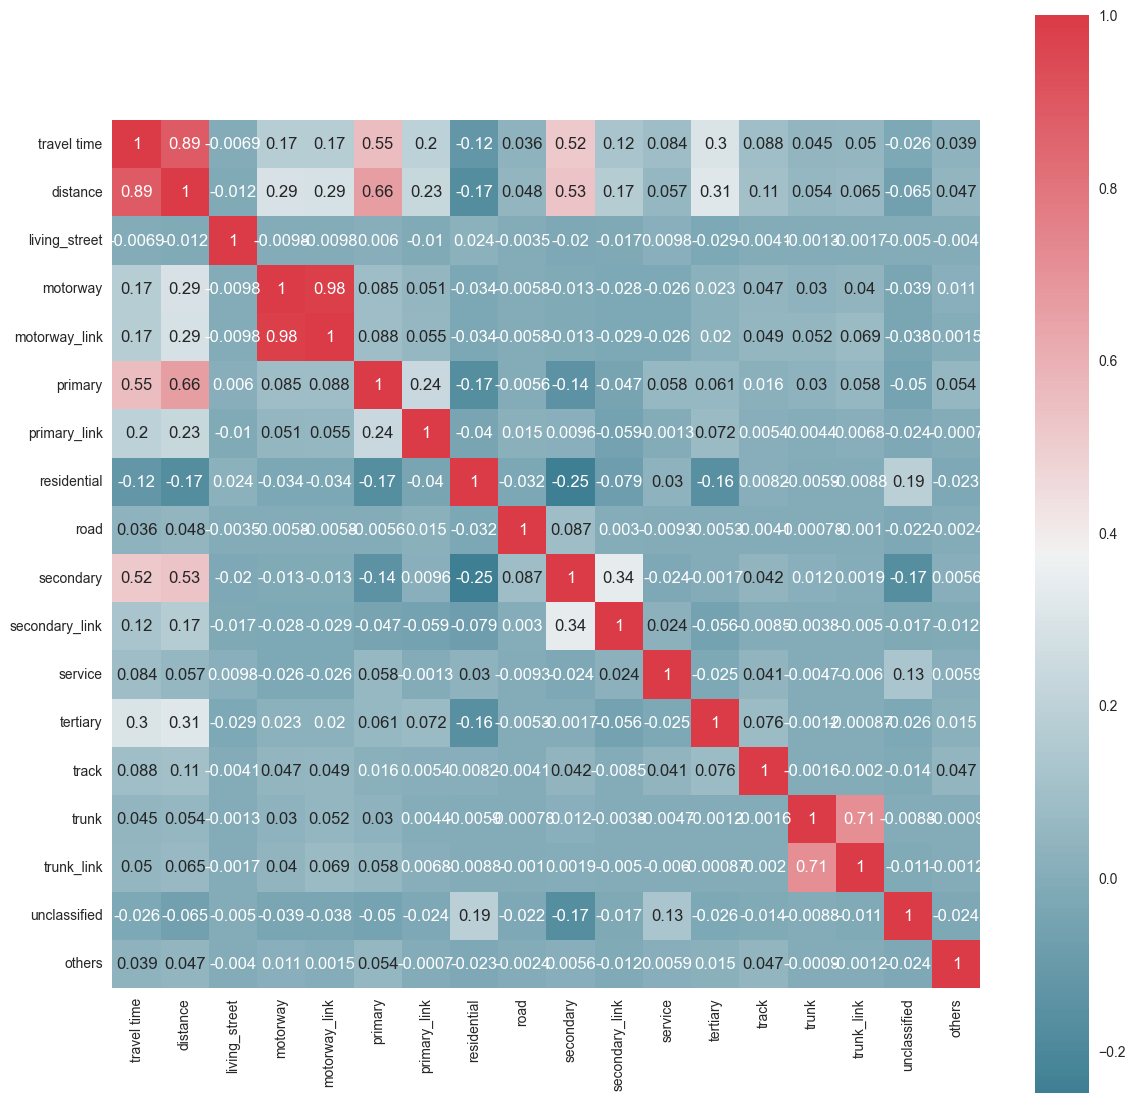

In [73]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [74]:
x = np.array(df8.iloc[:,1:])
y = np.array(df8['travel time'])
x

array([[0.40794062, 0.03104337, 0.        , ..., 0.        , 0.10074931,
        0.        ],
       [0.14152154, 0.        , 0.        , ..., 0.        , 0.27601111,
        0.        ],
       [0.00769141, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14743065, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00658433, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30531951, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13480, 17)
(3370, 17)


In [137]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
422/422 [==============================] - 1s 975us/step - loss: 331239.3125 - mape: 67.6916 - rmse: 575.5339 - val_loss: 76110.5625 - val_mape: 50.0581 - val_rmse: 275.8814
Epoch 2/500
422/422 [==============================] - 0s 819us/step - loss: 58842.5820 - mape: 43.4182 - rmse: 242.5749 - val_loss: 47571.1289 - val_mape: 36.6261 - val_rmse: 218.1081
Epoch 3/500
422/422 [==============================] - 0s 822us/step - loss: 38849.9453 - mape: 31.4612 - rmse: 197.1039 - val_loss: 35861.5391 - val_mape: 27.9843 - val_rmse: 189.3714
Epoch 4/500
422/422 [==============================] - 0s 828us/step - loss: 32416.2773 - mape: 25.3241 - rmse: 180.0452 - val_loss: 32494.2402 - val_mape: 24.3570 - val_rmse: 180.2616
Epoch 5/500
422/422 [==============================] - 0s 825us/step - loss: 31096.4043 - mape: 23.0353 - rmse: 176.3417 - val_loss: 32019.7324 - val_mape: 22.1954 - val_rmse: 178.9406
Epoch 6/500
422/422 [==============================] - 0s 805us/step - los

422/422 [==============================] - 0s 821us/step - loss: 29799.4961 - mape: 21.6710 - rmse: 172.6253 - val_loss: 31444.1309 - val_mape: 20.5442 - val_rmse: 177.3249
Epoch 90/500
422/422 [==============================] - 0s 812us/step - loss: 29786.3828 - mape: 21.5432 - rmse: 172.5873 - val_loss: 31126.9082 - val_mape: 21.2593 - val_rmse: 176.4282
Epoch 91/500
422/422 [==============================] - 0s 836us/step - loss: 29788.4336 - mape: 21.5392 - rmse: 172.5933 - val_loss: 31082.7695 - val_mape: 21.4790 - val_rmse: 176.3031
Epoch 92/500
422/422 [==============================] - 0s 805us/step - loss: 29755.6562 - mape: 21.5786 - rmse: 172.4983 - val_loss: 31691.0898 - val_mape: 20.2358 - val_rmse: 178.0199
Epoch 93/500
422/422 [==============================] - 0s 813us/step - loss: 29773.0684 - mape: 21.3426 - rmse: 172.5487 - val_loss: 31148.4922 - val_mape: 22.3516 - val_rmse: 176.4893
Epoch 94/500
422/422 [==============================] - 0s 806us/step - loss: 29686

Epoch 133/500
422/422 [==============================] - 0s 835us/step - loss: 29576.8945 - mape: 21.4295 - rmse: 171.9793 - val_loss: 31109.1172 - val_mape: 21.3147 - val_rmse: 176.3778
Epoch 134/500
422/422 [==============================] - 0s 831us/step - loss: 29566.9668 - mape: 21.4249 - rmse: 171.9505 - val_loss: 31258.8359 - val_mape: 20.8401 - val_rmse: 176.8017
Epoch 135/500
422/422 [==============================] - 0s 810us/step - loss: 29507.8828 - mape: 21.4401 - rmse: 171.7786 - val_loss: 31266.8555 - val_mape: 20.6884 - val_rmse: 176.8244
Epoch 136/500
422/422 [==============================] - 0s 810us/step - loss: 29542.5781 - mape: 21.4358 - rmse: 171.8795 - val_loss: 31032.8184 - val_mape: 21.2913 - val_rmse: 176.1613
Epoch 137/500
422/422 [==============================] - 0s 854us/step - loss: 29525.0039 - mape: 21.4234 - rmse: 171.8284 - val_loss: 31036.6621 - val_mape: 21.2311 - val_rmse: 176.1723
Epoch 138/500
422/422 [==============================] - 0s 835us

Epoch 177/500
422/422 [==============================] - 0s 823us/step - loss: 29409.4688 - mape: 21.2846 - rmse: 171.4919 - val_loss: 31200.2070 - val_mape: 20.5813 - val_rmse: 176.6358
Epoch 178/500
422/422 [==============================] - 0s 805us/step - loss: 29432.0508 - mape: 21.2651 - rmse: 171.5577 - val_loss: 31086.7734 - val_mape: 21.1962 - val_rmse: 176.3144
Epoch 179/500
422/422 [==============================] - 0s 808us/step - loss: 29408.0430 - mape: 21.3362 - rmse: 171.4877 - val_loss: 31057.7500 - val_mape: 21.1559 - val_rmse: 176.2321
Epoch 180/500
422/422 [==============================] - 0s 814us/step - loss: 29420.4863 - mape: 21.3002 - rmse: 171.5240 - val_loss: 31280.0410 - val_mape: 20.7393 - val_rmse: 176.8616
Epoch 181/500
422/422 [==============================] - 0s 813us/step - loss: 29424.4512 - mape: 21.3522 - rmse: 171.5356 - val_loss: 31412.1465 - val_mape: 20.3729 - val_rmse: 177.2347
Epoch 182/500
422/422 [==============================] - 0s 811us

Epoch 221/500
422/422 [==============================] - 0s 812us/step - loss: 29312.5195 - mape: 21.3281 - rmse: 171.2090 - val_loss: 31083.4844 - val_mape: 21.4127 - val_rmse: 176.3051
Epoch 222/500
422/422 [==============================] - 0s 813us/step - loss: 29349.8320 - mape: 21.2767 - rmse: 171.3179 - val_loss: 31157.2598 - val_mape: 21.0794 - val_rmse: 176.5142
Epoch 223/500
422/422 [==============================] - 0s 805us/step - loss: 29289.0996 - mape: 21.3342 - rmse: 171.1406 - val_loss: 31065.8984 - val_mape: 21.6502 - val_rmse: 176.2552
Epoch 224/500
422/422 [==============================] - 0s 808us/step - loss: 29351.6992 - mape: 21.3283 - rmse: 171.3234 - val_loss: 31136.5664 - val_mape: 21.1423 - val_rmse: 176.4556
Epoch 225/500
422/422 [==============================] - 0s 806us/step - loss: 29290.4668 - mape: 21.2620 - rmse: 171.1446 - val_loss: 31281.5664 - val_mape: 20.8217 - val_rmse: 176.8660
Epoch 226/500
422/422 [==============================] - 0s 818us

Epoch 265/500
422/422 [==============================] - 0s 832us/step - loss: 29257.6191 - mape: 21.3003 - rmse: 171.0486 - val_loss: 31381.1973 - val_mape: 20.5055 - val_rmse: 177.1474
Epoch 266/500
422/422 [==============================] - 0s 804us/step - loss: 29182.5449 - mape: 21.3900 - rmse: 170.8290 - val_loss: 31239.1211 - val_mape: 20.6375 - val_rmse: 176.7459
Epoch 267/500
422/422 [==============================] - 0s 813us/step - loss: 29222.9902 - mape: 21.2861 - rmse: 170.9473 - val_loss: 31197.4648 - val_mape: 20.7348 - val_rmse: 176.6280
Epoch 268/500
422/422 [==============================] - 0s 818us/step - loss: 29214.2109 - mape: 21.3199 - rmse: 170.9216 - val_loss: 31534.0684 - val_mape: 20.2150 - val_rmse: 177.5783
Epoch 269/500
422/422 [==============================] - 0s 821us/step - loss: 29238.0312 - mape: 21.2251 - rmse: 170.9913 - val_loss: 31119.0898 - val_mape: 21.1741 - val_rmse: 176.4060
Epoch 270/500
422/422 [==============================] - 0s 808us

Epoch 309/500
422/422 [==============================] - 0s 807us/step - loss: 29182.9609 - mape: 21.3507 - rmse: 170.8302 - val_loss: 31213.4062 - val_mape: 20.9496 - val_rmse: 176.6732
Epoch 310/500
422/422 [==============================] - 0s 815us/step - loss: 29141.6191 - mape: 21.4139 - rmse: 170.7092 - val_loss: 31288.6055 - val_mape: 20.6214 - val_rmse: 176.8858
Epoch 311/500
422/422 [==============================] - 0s 819us/step - loss: 29179.5742 - mape: 21.3484 - rmse: 170.8203 - val_loss: 31272.1680 - val_mape: 20.6306 - val_rmse: 176.8394
Epoch 312/500
422/422 [==============================] - 0s 865us/step - loss: 29177.2383 - mape: 21.2403 - rmse: 170.8135 - val_loss: 31677.9023 - val_mape: 20.1911 - val_rmse: 177.9829
Epoch 313/500
422/422 [==============================] - 0s 830us/step - loss: 29187.7891 - mape: 21.3964 - rmse: 170.8443 - val_loss: 31258.1367 - val_mape: 20.7103 - val_rmse: 176.7997
Epoch 314/500
422/422 [==============================] - 0s 835us

Epoch 353/500
422/422 [==============================] - 0s 809us/step - loss: 29128.4297 - mape: 21.3373 - rmse: 170.6705 - val_loss: 31182.7109 - val_mape: 21.4596 - val_rmse: 176.5863
Epoch 354/500
422/422 [==============================] - 0s 800us/step - loss: 29119.5664 - mape: 21.4471 - rmse: 170.6446 - val_loss: 31214.2188 - val_mape: 20.9777 - val_rmse: 176.6755
Epoch 355/500
422/422 [==============================] - 0s 823us/step - loss: 29127.1094 - mape: 21.2464 - rmse: 170.6667 - val_loss: 31289.8086 - val_mape: 20.9344 - val_rmse: 176.8893
Epoch 356/500
422/422 [==============================] - 0s 816us/step - loss: 29098.6953 - mape: 21.3257 - rmse: 170.5834 - val_loss: 31223.9258 - val_mape: 21.8195 - val_rmse: 176.7029
Epoch 357/500
422/422 [==============================] - 0s 812us/step - loss: 29136.2246 - mape: 21.4301 - rmse: 170.6934 - val_loss: 31217.0020 - val_mape: 21.2211 - val_rmse: 176.6833
Epoch 358/500
422/422 [==============================] - 0s 814us

Epoch 397/500
422/422 [==============================] - 0s 811us/step - loss: 29115.4512 - mape: 21.3556 - rmse: 170.6325 - val_loss: 31247.1855 - val_mape: 21.5075 - val_rmse: 176.7687
Epoch 398/500
422/422 [==============================] - 0s 805us/step - loss: 29071.4727 - mape: 21.3824 - rmse: 170.5036 - val_loss: 31258.3711 - val_mape: 21.7962 - val_rmse: 176.8004
Epoch 399/500
422/422 [==============================] - 0s 810us/step - loss: 29099.8359 - mape: 21.3283 - rmse: 170.5867 - val_loss: 31275.8008 - val_mape: 21.3680 - val_rmse: 176.8497
Epoch 400/500
422/422 [==============================] - 0s 808us/step - loss: 29079.4199 - mape: 21.3547 - rmse: 170.5269 - val_loss: 31237.0371 - val_mape: 21.5842 - val_rmse: 176.7400
Epoch 401/500
422/422 [==============================] - 0s 810us/step - loss: 29084.3945 - mape: 21.4476 - rmse: 170.5415 - val_loss: 31255.6250 - val_mape: 21.6874 - val_rmse: 176.7926
Epoch 402/500
422/422 [==============================] - 0s 804us

Epoch 441/500
422/422 [==============================] - 0s 800us/step - loss: 29082.0703 - mape: 21.4534 - rmse: 170.5347 - val_loss: 31358.5312 - val_mape: 20.9090 - val_rmse: 177.0834
Epoch 442/500
422/422 [==============================] - 0s 804us/step - loss: 29062.8965 - mape: 21.2629 - rmse: 170.4784 - val_loss: 31442.9512 - val_mape: 22.6981 - val_rmse: 177.3216
Epoch 443/500
422/422 [==============================] - 0s 809us/step - loss: 29080.7734 - mape: 21.4181 - rmse: 170.5309 - val_loss: 31543.6777 - val_mape: 20.6117 - val_rmse: 177.6054
Epoch 444/500
422/422 [==============================] - 0s 804us/step - loss: 29081.5742 - mape: 21.3275 - rmse: 170.5332 - val_loss: 31488.2969 - val_mape: 20.9109 - val_rmse: 177.4494
Epoch 445/500
422/422 [==============================] - 0s 807us/step - loss: 29048.4414 - mape: 21.3085 - rmse: 170.4360 - val_loss: 31292.0977 - val_mape: 21.8168 - val_rmse: 176.8957
Epoch 446/500
422/422 [==============================] - 0s 805us

Epoch 485/500
422/422 [==============================] - 0s 806us/step - loss: 29065.9375 - mape: 21.2824 - rmse: 170.4874 - val_loss: 31379.2637 - val_mape: 21.6303 - val_rmse: 177.1419
Epoch 486/500
422/422 [==============================] - 0s 812us/step - loss: 29078.3574 - mape: 21.4442 - rmse: 170.5238 - val_loss: 31512.8145 - val_mape: 20.8633 - val_rmse: 177.5185
Epoch 487/500
422/422 [==============================] - 0s 803us/step - loss: 29029.1445 - mape: 21.3438 - rmse: 170.3794 - val_loss: 31396.0117 - val_mape: 21.5683 - val_rmse: 177.1892
Epoch 488/500
422/422 [==============================] - 0s 807us/step - loss: 29033.3574 - mape: 21.3490 - rmse: 170.3918 - val_loss: 31365.3984 - val_mape: 21.9678 - val_rmse: 177.1028
Epoch 489/500
422/422 [==============================] - 0s 806us/step - loss: 29036.5176 - mape: 21.4020 - rmse: 170.4010 - val_loss: 31492.3711 - val_mape: 20.9380 - val_rmse: 177.4609
Epoch 490/500
422/422 [==============================] - 0s 809us

In [138]:
# plotme(model7_1_1)

In [139]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
422/422 [==============================] - 1s 1ms/step - loss: 242565.3438 - mape: 61.2661 - rmse: 492.5092 - val_loss: 56844.2109 - val_mape: 41.4693 - val_rmse: 238.4202
Epoch 2/500
422/422 [==============================] - 0s 942us/step - loss: 40799.0898 - mape: 32.4971 - rmse: 201.9878 - val_loss: 34749.7188 - val_mape: 25.5105 - val_rmse: 186.4128
Epoch 3/500
422/422 [==============================] - 0s 940us/step - loss: 31626.8320 - mape: 24.0571 - rmse: 177.8393 - val_loss: 31802.8496 - val_mape: 23.1159 - val_rmse: 178.3335
Epoch 4/500
422/422 [==============================] - 0s 969us/step - loss: 30887.4941 - mape: 22.5792 - rmse: 175.7484 - val_loss: 31512.8789 - val_mape: 22.9172 - val_rmse: 177.5187
Epoch 5/500
422/422 [==============================] - 0s 966us/step - loss: 30809.6504 - mape: 22.2653 - rmse: 175.5268 - val_loss: 31767.2656 - val_mape: 22.0531 - val_rmse: 178.2337
Epoch 6/500
422/422 [==============================] - 0s 968us/step - loss:

422/422 [==============================] - 0s 963us/step - loss: 29529.0039 - mape: 21.3666 - rmse: 171.8401 - val_loss: 31204.2832 - val_mape: 20.5844 - val_rmse: 176.6473
Epoch 90/500
422/422 [==============================] - 0s 956us/step - loss: 29445.8691 - mape: 21.2788 - rmse: 171.5980 - val_loss: 31306.8398 - val_mape: 20.8679 - val_rmse: 176.9374
Epoch 91/500
422/422 [==============================] - 0s 994us/step - loss: 29579.1484 - mape: 21.4621 - rmse: 171.9859 - val_loss: 30986.0801 - val_mape: 21.1862 - val_rmse: 176.0286
Epoch 92/500
422/422 [==============================] - 0s 961us/step - loss: 29464.1758 - mape: 21.3435 - rmse: 171.6513 - val_loss: 31369.9805 - val_mape: 20.4815 - val_rmse: 177.1157
Epoch 93/500
422/422 [==============================] - 0s 965us/step - loss: 29530.2129 - mape: 21.3855 - rmse: 171.8436 - val_loss: 31232.3984 - val_mape: 20.6275 - val_rmse: 176.7269
Epoch 94/500
422/422 [==============================] - 0s 951us/step - loss: 29530

Epoch 133/500
422/422 [==============================] - 0s 956us/step - loss: 29394.7422 - mape: 21.3626 - rmse: 171.4489 - val_loss: 31359.4492 - val_mape: 20.3289 - val_rmse: 177.0860
Epoch 134/500
422/422 [==============================] - 0s 965us/step - loss: 29339.9590 - mape: 21.3040 - rmse: 171.2891 - val_loss: 30981.4453 - val_mape: 21.3982 - val_rmse: 176.0155
Epoch 135/500
422/422 [==============================] - 0s 1ms/step - loss: 29287.2148 - mape: 21.4673 - rmse: 171.1351 - val_loss: 30919.8633 - val_mape: 21.5121 - val_rmse: 175.8405
Epoch 136/500
422/422 [==============================] - 0s 964us/step - loss: 29375.3027 - mape: 21.3014 - rmse: 171.3922 - val_loss: 30916.5645 - val_mape: 21.3529 - val_rmse: 175.8311
Epoch 137/500
422/422 [==============================] - 0s 961us/step - loss: 29338.3105 - mape: 21.3432 - rmse: 171.2843 - val_loss: 30959.9258 - val_mape: 21.5466 - val_rmse: 175.9543
Epoch 138/500
422/422 [==============================] - 0s 959us/s

Epoch 177/500
422/422 [==============================] - 0s 953us/step - loss: 29124.9277 - mape: 21.4432 - rmse: 170.6603 - val_loss: 30839.5078 - val_mape: 21.4356 - val_rmse: 175.6118
Epoch 178/500
422/422 [==============================] - 0s 954us/step - loss: 29148.4414 - mape: 21.4951 - rmse: 170.7291 - val_loss: 30822.6250 - val_mape: 21.3425 - val_rmse: 175.5637
Epoch 179/500
422/422 [==============================] - 0s 947us/step - loss: 29111.1934 - mape: 21.3448 - rmse: 170.6200 - val_loss: 30965.3320 - val_mape: 20.7486 - val_rmse: 175.9697
Epoch 180/500
422/422 [==============================] - 0s 956us/step - loss: 29088.1250 - mape: 21.3226 - rmse: 170.5524 - val_loss: 31207.1641 - val_mape: 20.3955 - val_rmse: 176.6555
Epoch 181/500
422/422 [==============================] - 0s 956us/step - loss: 29081.0215 - mape: 21.3515 - rmse: 170.5316 - val_loss: 31123.7930 - val_mape: 20.5098 - val_rmse: 176.4194
Epoch 182/500
422/422 [==============================] - 0s 940us

Epoch 221/500
422/422 [==============================] - 0s 941us/step - loss: 28957.0879 - mape: 21.4163 - rmse: 170.1678 - val_loss: 30965.8828 - val_mape: 20.6517 - val_rmse: 175.9713
Epoch 222/500
422/422 [==============================] - 0s 943us/step - loss: 28912.7852 - mape: 21.3836 - rmse: 170.0376 - val_loss: 30844.6484 - val_mape: 20.8823 - val_rmse: 175.6264
Epoch 223/500
422/422 [==============================] - 0s 955us/step - loss: 28963.9531 - mape: 21.2338 - rmse: 170.1880 - val_loss: 31132.9707 - val_mape: 20.3193 - val_rmse: 176.4454
Epoch 224/500
422/422 [==============================] - 0s 942us/step - loss: 28972.5312 - mape: 21.3644 - rmse: 170.2132 - val_loss: 30829.7422 - val_mape: 21.7982 - val_rmse: 175.5840
Epoch 225/500
422/422 [==============================] - 0s 941us/step - loss: 28945.2227 - mape: 21.2772 - rmse: 170.1329 - val_loss: 31175.6230 - val_mape: 20.3992 - val_rmse: 176.5662
Epoch 226/500
422/422 [==============================] - 0s 957us

Epoch 265/500
422/422 [==============================] - 0s 943us/step - loss: 28591.5195 - mape: 21.3492 - rmse: 169.0903 - val_loss: 30948.0098 - val_mape: 20.3494 - val_rmse: 175.9205
Epoch 266/500
422/422 [==============================] - 0s 956us/step - loss: 28565.6758 - mape: 21.2365 - rmse: 169.0138 - val_loss: 30572.1328 - val_mape: 20.8481 - val_rmse: 174.8489
Epoch 267/500
422/422 [==============================] - 0s 969us/step - loss: 28535.7793 - mape: 21.2009 - rmse: 168.9254 - val_loss: 30702.8770 - val_mape: 20.9904 - val_rmse: 175.2224
Epoch 268/500
422/422 [==============================] - 0s 992us/step - loss: 28558.0625 - mape: 21.3444 - rmse: 168.9913 - val_loss: 30819.5996 - val_mape: 20.2979 - val_rmse: 175.5551
Epoch 269/500
422/422 [==============================] - 0s 961us/step - loss: 28561.4688 - mape: 21.2310 - rmse: 169.0014 - val_loss: 30686.1367 - val_mape: 22.4245 - val_rmse: 175.1746
Epoch 270/500
422/422 [==============================] - 0s 962us

Epoch 309/500
422/422 [==============================] - 0s 966us/step - loss: 28450.5195 - mape: 21.2960 - rmse: 168.6728 - val_loss: 30541.9023 - val_mape: 20.7818 - val_rmse: 174.7624
Epoch 310/500
422/422 [==============================] - 0s 965us/step - loss: 28424.5176 - mape: 21.2822 - rmse: 168.5957 - val_loss: 31099.5879 - val_mape: 20.0355 - val_rmse: 176.3508
Epoch 311/500
422/422 [==============================] - 0s 966us/step - loss: 28467.3398 - mape: 21.3607 - rmse: 168.7227 - val_loss: 30516.8633 - val_mape: 20.7672 - val_rmse: 174.6908
Epoch 312/500
422/422 [==============================] - 0s 957us/step - loss: 28441.1348 - mape: 21.2568 - rmse: 168.6450 - val_loss: 30480.1875 - val_mape: 20.9300 - val_rmse: 174.5858
Epoch 313/500
422/422 [==============================] - 0s 963us/step - loss: 28395.7773 - mape: 21.1818 - rmse: 168.5105 - val_loss: 30645.9473 - val_mape: 20.6795 - val_rmse: 175.0598
Epoch 314/500
422/422 [==============================] - 0s 959us

Epoch 353/500
422/422 [==============================] - 0s 959us/step - loss: 28351.4941 - mape: 21.2095 - rmse: 168.3790 - val_loss: 30756.0527 - val_mape: 20.3020 - val_rmse: 175.3740
Epoch 354/500
422/422 [==============================] - 0s 956us/step - loss: 28301.9023 - mape: 21.2608 - rmse: 168.2317 - val_loss: 30769.2598 - val_mape: 22.8197 - val_rmse: 175.4117
Epoch 355/500
422/422 [==============================] - 0s 956us/step - loss: 28425.8027 - mape: 21.4046 - rmse: 168.5995 - val_loss: 30438.1699 - val_mape: 21.2770 - val_rmse: 174.4654
Epoch 356/500
422/422 [==============================] - 0s 957us/step - loss: 28354.4785 - mape: 21.2345 - rmse: 168.3879 - val_loss: 30495.7695 - val_mape: 21.0403 - val_rmse: 174.6304
Epoch 357/500
422/422 [==============================] - 0s 959us/step - loss: 28337.7227 - mape: 21.2780 - rmse: 168.3381 - val_loss: 30527.2910 - val_mape: 21.6938 - val_rmse: 174.7206
Epoch 358/500
422/422 [==============================] - 0s 960us

Epoch 397/500
422/422 [==============================] - 0s 965us/step - loss: 28338.9824 - mape: 21.3612 - rmse: 168.3419 - val_loss: 30524.2754 - val_mape: 22.1424 - val_rmse: 174.7120
Epoch 398/500
422/422 [==============================] - 0s 960us/step - loss: 28284.6191 - mape: 21.3041 - rmse: 168.1803 - val_loss: 30490.0488 - val_mape: 21.5996 - val_rmse: 174.6140
Epoch 399/500
422/422 [==============================] - 0s 960us/step - loss: 28340.6348 - mape: 21.3811 - rmse: 168.3468 - val_loss: 30470.9707 - val_mape: 20.9019 - val_rmse: 174.5594
Epoch 400/500
422/422 [==============================] - 0s 962us/step - loss: 28247.8496 - mape: 21.3828 - rmse: 168.0710 - val_loss: 30474.1699 - val_mape: 21.2736 - val_rmse: 174.5685
Epoch 401/500
422/422 [==============================] - 0s 960us/step - loss: 28285.6934 - mape: 21.2654 - rmse: 168.1835 - val_loss: 31557.5645 - val_mape: 19.8094 - val_rmse: 177.6445
Epoch 402/500
422/422 [==============================] - 0s 958us

Epoch 441/500
422/422 [==============================] - 0s 952us/step - loss: 28210.2910 - mape: 21.2931 - rmse: 167.9592 - val_loss: 30459.3164 - val_mape: 21.6310 - val_rmse: 174.5260
Epoch 442/500
422/422 [==============================] - 0s 956us/step - loss: 28222.3223 - mape: 21.3135 - rmse: 167.9950 - val_loss: 30477.9824 - val_mape: 21.1980 - val_rmse: 174.5794
Epoch 443/500
422/422 [==============================] - 0s 949us/step - loss: 28209.4102 - mape: 21.3106 - rmse: 167.9566 - val_loss: 30491.2617 - val_mape: 20.7825 - val_rmse: 174.6175
Epoch 444/500
422/422 [==============================] - 0s 950us/step - loss: 28212.2168 - mape: 21.2688 - rmse: 167.9649 - val_loss: 30508.0996 - val_mape: 21.0981 - val_rmse: 174.6657
Epoch 445/500
422/422 [==============================] - 0s 955us/step - loss: 28279.3418 - mape: 21.2485 - rmse: 168.1646 - val_loss: 30774.3652 - val_mape: 20.5429 - val_rmse: 175.4262
Epoch 446/500
422/422 [==============================] - 0s 966us

Epoch 485/500
422/422 [==============================] - 0s 953us/step - loss: 28050.5547 - mape: 21.0392 - rmse: 167.4830 - val_loss: 30535.3535 - val_mape: 22.0952 - val_rmse: 174.7437
Epoch 486/500
422/422 [==============================] - 0s 942us/step - loss: 28093.9258 - mape: 21.1620 - rmse: 167.6124 - val_loss: 30707.4727 - val_mape: 22.5490 - val_rmse: 175.2355
Epoch 487/500
422/422 [==============================] - 0s 946us/step - loss: 28085.2656 - mape: 21.0634 - rmse: 167.5866 - val_loss: 30488.0840 - val_mape: 21.0240 - val_rmse: 174.6084
Epoch 488/500
422/422 [==============================] - 0s 943us/step - loss: 28134.3613 - mape: 21.0678 - rmse: 167.7330 - val_loss: 30662.4277 - val_mape: 20.6789 - val_rmse: 175.1069
Epoch 489/500
422/422 [==============================] - 0s 931us/step - loss: 28058.5820 - mape: 21.1334 - rmse: 167.5070 - val_loss: 30587.8242 - val_mape: 20.2603 - val_rmse: 174.8938
Epoch 490/500
422/422 [==============================] - 0s 947us

In [140]:
# plotme(model7_1_2)

In [141]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
422/422 [==============================] - 1s 894us/step - loss: 586197.3750 - mape: 98.8584 - rmse: 765.6353 - val_loss: 558746.2500 - val_mape: 96.6064 - val_rmse: 747.4933
Epoch 2/500
422/422 [==============================] - 0s 760us/step - loss: 537373.7500 - mape: 91.9141 - rmse: 733.0578 - val_loss: 487538.9062 - val_mape: 85.9681 - val_rmse: 698.2399
Epoch 3/500
422/422 [==============================] - 0s 762us/step - loss: 448455.6250 - mape: 78.3419 - rmse: 669.6683 - val_loss: 388890.3125 - val_mape: 69.6153 - val_rmse: 623.6107
Epoch 4/500
422/422 [==============================] - 0s 759us/step - loss: 343557.2812 - mape: 60.9662 - rmse: 586.1376 - val_loss: 286716.0938 - val_mape: 52.2100 - val_rmse: 535.4587
Epoch 5/500
422/422 [==============================] - 0s 755us/step - loss: 246274.9062 - mape: 46.1023 - rmse: 496.2609 - val_loss: 201029.6719 - val_mape: 40.4887 - val_rmse: 448.3633
Epoch 6/500
422/422 [==============================] - 0s 761us/s

422/422 [==============================] - 0s 756us/step - loss: 30337.9766 - mape: 22.0961 - rmse: 174.1780 - val_loss: 31338.2930 - val_mape: 21.4987 - val_rmse: 177.0262
Epoch 46/500
422/422 [==============================] - 0s 755us/step - loss: 30330.0273 - mape: 21.9623 - rmse: 174.1552 - val_loss: 31257.9980 - val_mape: 21.7912 - val_rmse: 176.7993
Epoch 47/500
422/422 [==============================] - 0s 756us/step - loss: 30331.6680 - mape: 22.0792 - rmse: 174.1599 - val_loss: 31282.3164 - val_mape: 21.6554 - val_rmse: 176.8681
Epoch 48/500
422/422 [==============================] - 0s 752us/step - loss: 30327.3945 - mape: 21.9990 - rmse: 174.1476 - val_loss: 31247.7148 - val_mape: 21.7825 - val_rmse: 176.7702
Epoch 49/500
422/422 [==============================] - 0s 751us/step - loss: 30321.3398 - mape: 22.0841 - rmse: 174.1302 - val_loss: 31336.8828 - val_mape: 21.4565 - val_rmse: 177.0223
Epoch 50/500
422/422 [==============================] - 0s 766us/step - loss: 30319

422/422 [==============================] - 0s 760us/step - loss: 29941.7441 - mape: 21.7681 - rmse: 173.0368 - val_loss: 31126.6875 - val_mape: 21.2044 - val_rmse: 176.4276
Epoch 134/500
422/422 [==============================] - 0s 757us/step - loss: 29933.2266 - mape: 21.6993 - rmse: 173.0122 - val_loss: 31042.9277 - val_mape: 21.5285 - val_rmse: 176.1900
Epoch 135/500
422/422 [==============================] - 0s 756us/step - loss: 29929.9570 - mape: 21.7402 - rmse: 173.0028 - val_loss: 31037.4102 - val_mape: 21.5457 - val_rmse: 176.1744
Epoch 136/500
422/422 [==============================] - 0s 754us/step - loss: 29929.3301 - mape: 21.7959 - rmse: 173.0010 - val_loss: 31078.2402 - val_mape: 21.3373 - val_rmse: 176.2902
Epoch 137/500
422/422 [==============================] - 0s 755us/step - loss: 29924.4629 - mape: 21.7483 - rmse: 172.9869 - val_loss: 31041.7148 - val_mape: 21.4736 - val_rmse: 176.1866
Epoch 138/500
422/422 [==============================] - 0s 765us/step - loss: 

Epoch 177/500
422/422 [==============================] - 0s 756us/step - loss: 29719.4941 - mape: 21.6342 - rmse: 172.3934 - val_loss: 31041.0234 - val_mape: 21.0613 - val_rmse: 176.1846
Epoch 178/500
422/422 [==============================] - 0s 755us/step - loss: 29720.7266 - mape: 21.6274 - rmse: 172.3970 - val_loss: 31023.6055 - val_mape: 21.1224 - val_rmse: 176.1352
Epoch 179/500
422/422 [==============================] - 0s 757us/step - loss: 29708.9121 - mape: 21.6153 - rmse: 172.3627 - val_loss: 31030.7949 - val_mape: 21.1032 - val_rmse: 176.1556
Epoch 180/500
422/422 [==============================] - 0s 757us/step - loss: 29707.0566 - mape: 21.5860 - rmse: 172.3573 - val_loss: 30984.0176 - val_mape: 21.2888 - val_rmse: 176.0228
Epoch 181/500
422/422 [==============================] - 0s 773us/step - loss: 29703.0566 - mape: 21.7165 - rmse: 172.3457 - val_loss: 31051.6250 - val_mape: 21.0017 - val_rmse: 176.2147
Epoch 182/500
422/422 [==============================] - 0s 758us

Epoch 221/500
422/422 [==============================] - 0s 756us/step - loss: 29532.0625 - mape: 21.5880 - rmse: 171.8490 - val_loss: 30964.9160 - val_mape: 21.0114 - val_rmse: 175.9685
Epoch 222/500
422/422 [==============================] - 0s 749us/step - loss: 29520.7910 - mape: 21.4522 - rmse: 171.8162 - val_loss: 30880.8965 - val_mape: 21.4033 - val_rmse: 175.7296
Epoch 223/500
422/422 [==============================] - 0s 754us/step - loss: 29530.7793 - mape: 21.5305 - rmse: 171.8452 - val_loss: 30923.8281 - val_mape: 21.1518 - val_rmse: 175.8517
Epoch 224/500
422/422 [==============================] - 0s 761us/step - loss: 29517.8555 - mape: 21.5411 - rmse: 171.8076 - val_loss: 30943.7871 - val_mape: 21.0647 - val_rmse: 175.9085
Epoch 225/500
422/422 [==============================] - 0s 752us/step - loss: 29513.0156 - mape: 21.4893 - rmse: 171.7935 - val_loss: 30896.0410 - val_mape: 21.2870 - val_rmse: 175.7727
Epoch 226/500
422/422 [==============================] - 0s 854us

Epoch 265/500
422/422 [==============================] - 0s 757us/step - loss: 29371.5918 - mape: 21.4836 - rmse: 171.3814 - val_loss: 30940.7402 - val_mape: 20.8380 - val_rmse: 175.8998
Epoch 266/500
422/422 [==============================] - 0s 759us/step - loss: 29374.6230 - mape: 21.4106 - rmse: 171.3903 - val_loss: 30867.8418 - val_mape: 21.1135 - val_rmse: 175.6925
Epoch 267/500
422/422 [==============================] - 0s 760us/step - loss: 29369.7715 - mape: 21.4372 - rmse: 171.3761 - val_loss: 30933.7344 - val_mape: 20.8782 - val_rmse: 175.8799
Epoch 268/500
422/422 [==============================] - 0s 756us/step - loss: 29360.4609 - mape: 21.4146 - rmse: 171.3489 - val_loss: 30872.9844 - val_mape: 21.1008 - val_rmse: 175.7071
Epoch 269/500
422/422 [==============================] - 0s 752us/step - loss: 29361.5664 - mape: 21.4595 - rmse: 171.3522 - val_loss: 30888.7344 - val_mape: 21.0172 - val_rmse: 175.7519
Epoch 270/500
422/422 [==============================] - 0s 760us

Epoch 309/500
422/422 [==============================] - 0s 752us/step - loss: 29244.1289 - mape: 21.3803 - rmse: 171.0092 - val_loss: 30886.7480 - val_mape: 20.8437 - val_rmse: 175.7463
Epoch 310/500
422/422 [==============================] - 0s 759us/step - loss: 29231.7090 - mape: 21.3168 - rmse: 170.9728 - val_loss: 30791.9824 - val_mape: 21.3515 - val_rmse: 175.4764
Epoch 311/500
422/422 [==============================] - 0s 759us/step - loss: 29241.0762 - mape: 21.4632 - rmse: 171.0002 - val_loss: 30836.6211 - val_mape: 21.0322 - val_rmse: 175.6036
Epoch 312/500
422/422 [==============================] - 0s 757us/step - loss: 29232.3613 - mape: 21.4005 - rmse: 170.9747 - val_loss: 30920.5859 - val_mape: 20.7336 - val_rmse: 175.8425
Epoch 313/500
422/422 [==============================] - 0s 759us/step - loss: 29229.3359 - mape: 21.3384 - rmse: 170.9659 - val_loss: 30793.2305 - val_mape: 21.2580 - val_rmse: 175.4800
Epoch 314/500
422/422 [==============================] - 0s 761us

Epoch 353/500
422/422 [==============================] - 0s 749us/step - loss: 29139.0781 - mape: 21.3061 - rmse: 170.7017 - val_loss: 30833.6270 - val_mape: 20.8463 - val_rmse: 175.5951
Epoch 354/500
422/422 [==============================] - 0s 753us/step - loss: 29132.3223 - mape: 21.3580 - rmse: 170.6819 - val_loss: 30857.3672 - val_mape: 20.7405 - val_rmse: 175.6627
Epoch 355/500
422/422 [==============================] - 0s 758us/step - loss: 29133.8398 - mape: 21.3144 - rmse: 170.6864 - val_loss: 30867.6543 - val_mape: 20.7279 - val_rmse: 175.6919
Epoch 356/500
422/422 [==============================] - 0s 754us/step - loss: 29125.5312 - mape: 21.3127 - rmse: 170.6620 - val_loss: 30800.8359 - val_mape: 20.9681 - val_rmse: 175.5017
Epoch 357/500
422/422 [==============================] - 0s 754us/step - loss: 29124.4102 - mape: 21.3521 - rmse: 170.6588 - val_loss: 30822.7988 - val_mape: 20.8733 - val_rmse: 175.5642
Epoch 358/500
422/422 [==============================] - 0s 746us

Epoch 397/500
422/422 [==============================] - 0s 756us/step - loss: 29054.6367 - mape: 21.2615 - rmse: 170.4542 - val_loss: 30776.6465 - val_mape: 20.9608 - val_rmse: 175.4327
Epoch 398/500
422/422 [==============================] - 0s 757us/step - loss: 29045.9824 - mape: 21.3042 - rmse: 170.4288 - val_loss: 30772.9688 - val_mape: 20.9446 - val_rmse: 175.4223
Epoch 399/500
422/422 [==============================] - 0s 754us/step - loss: 29042.1816 - mape: 21.2436 - rmse: 170.4177 - val_loss: 30737.6484 - val_mape: 21.1913 - val_rmse: 175.3216
Epoch 400/500
422/422 [==============================] - 0s 757us/step - loss: 29052.8945 - mape: 21.3486 - rmse: 170.4491 - val_loss: 30807.2793 - val_mape: 20.7963 - val_rmse: 175.5200
Epoch 401/500
422/422 [==============================] - 0s 762us/step - loss: 29039.5156 - mape: 21.3695 - rmse: 170.4099 - val_loss: 30874.0703 - val_mape: 20.5881 - val_rmse: 175.7102
Epoch 402/500
422/422 [==============================] - 0s 751us

Epoch 441/500
422/422 [==============================] - 0s 868us/step - loss: 28981.1895 - mape: 21.2543 - rmse: 170.2386 - val_loss: 30775.7363 - val_mape: 20.7470 - val_rmse: 175.4301
Epoch 442/500
422/422 [==============================] - 0s 743us/step - loss: 28971.8828 - mape: 21.2482 - rmse: 170.2113 - val_loss: 30860.2617 - val_mape: 20.5317 - val_rmse: 175.6709
Epoch 443/500
422/422 [==============================] - 0s 754us/step - loss: 28978.1055 - mape: 21.1985 - rmse: 170.2296 - val_loss: 30753.0020 - val_mape: 20.8391 - val_rmse: 175.3653
Epoch 444/500
422/422 [==============================] - 0s 755us/step - loss: 28977.1016 - mape: 21.2957 - rmse: 170.2266 - val_loss: 30796.9551 - val_mape: 20.6721 - val_rmse: 175.4906
Epoch 445/500
422/422 [==============================] - 0s 757us/step - loss: 28975.4805 - mape: 21.2049 - rmse: 170.2219 - val_loss: 30724.5410 - val_mape: 20.9630 - val_rmse: 175.2842
Epoch 446/500
422/422 [==============================] - 0s 762us

Epoch 485/500
422/422 [==============================] - 0s 758us/step - loss: 28913.1641 - mape: 21.2229 - rmse: 170.0387 - val_loss: 30738.8301 - val_mape: 20.7531 - val_rmse: 175.3249
Epoch 486/500
422/422 [==============================] - 0s 757us/step - loss: 28914.0371 - mape: 21.2331 - rmse: 170.0413 - val_loss: 30718.8516 - val_mape: 20.8300 - val_rmse: 175.2679
Epoch 487/500
422/422 [==============================] - 0s 758us/step - loss: 28915.2949 - mape: 21.2749 - rmse: 170.0450 - val_loss: 30793.9277 - val_mape: 20.5849 - val_rmse: 175.4820
Epoch 488/500
422/422 [==============================] - 0s 763us/step - loss: 28908.8066 - mape: 21.1893 - rmse: 170.0259 - val_loss: 30731.6504 - val_mape: 20.7736 - val_rmse: 175.3044
Epoch 489/500
422/422 [==============================] - 0s 755us/step - loss: 28903.9473 - mape: 21.2249 - rmse: 170.0116 - val_loss: 30766.6875 - val_mape: 20.6376 - val_rmse: 175.4044
Epoch 490/500
422/422 [==============================] - 0s 763us

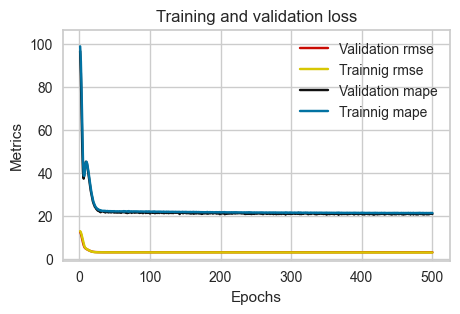

In [142]:
plotme(model7_1_3)

In [143]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
422/422 [==============================] - 1s 864us/step - loss: 591455.0625 - mape: 99.5749 - rmse: 769.0612 - val_loss: 574402.0625 - val_mape: 98.8119 - val_rmse: 757.8932
Epoch 2/500
422/422 [==============================] - 0s 731us/step - loss: 576562.0625 - mape: 97.4819 - rmse: 759.3168 - val_loss: 553906.8125 - val_mape: 95.8590 - val_rmse: 744.2491
Epoch 3/500
422/422 [==============================] - 0s 727us/step - loss: 550335.3750 - mape: 93.7633 - rmse: 741.8459 - val_loss: 523505.0312 - val_mape: 91.3784 - val_rmse: 723.5365
Epoch 4/500
422/422 [==============================] - 0s 760us/step - loss: 515522.4062 - mape: 88.6524 - rmse: 717.9989 - val_loss: 486153.3438 - val_mape: 85.6650 - val_rmse: 697.2469
Epoch 5/500
422/422 [==============================] - 0s 731us/step - loss: 474768.9688 - mape: 82.4301 - rmse: 689.0348 - val_loss: 444115.7188 - val_mape: 78.9139 - val_rmse: 666.4201
Epoch 6/500
422/422 [==============================] - 0s 730us/s

Epoch 45/500
422/422 [==============================] - 0s 738us/step - loss: 33385.0430 - mape: 25.9877 - rmse: 182.7157 - val_loss: 34811.3984 - val_mape: 25.4169 - val_rmse: 186.5781
Epoch 46/500
422/422 [==============================] - 0s 734us/step - loss: 33078.8281 - mape: 25.4372 - rmse: 181.8759 - val_loss: 34471.8477 - val_mape: 25.2384 - val_rmse: 185.6660
Epoch 47/500
422/422 [==============================] - 0s 729us/step - loss: 32809.2852 - mape: 25.2149 - rmse: 181.1333 - val_loss: 34176.7773 - val_mape: 24.9812 - val_rmse: 184.8696
Epoch 48/500
422/422 [==============================] - 0s 727us/step - loss: 32567.9785 - mape: 25.0300 - rmse: 180.4660 - val_loss: 33934.4062 - val_mape: 24.6413 - val_rmse: 184.2129
Epoch 49/500
422/422 [==============================] - 0s 732us/step - loss: 32353.2090 - mape: 24.7652 - rmse: 179.8700 - val_loss: 33715.4219 - val_mape: 24.3416 - val_rmse: 183.6176
Epoch 50/500
422/422 [==============================] - 0s 730us/step 

422/422 [==============================] - 0s 730us/step - loss: 30711.2871 - mape: 22.4562 - rmse: 175.2464 - val_loss: 31718.0039 - val_mape: 21.9589 - val_rmse: 178.0955
Epoch 90/500
422/422 [==============================] - 0s 734us/step - loss: 30710.9824 - mape: 22.4192 - rmse: 175.2455 - val_loss: 31724.5059 - val_mape: 21.9196 - val_rmse: 178.1137
Epoch 91/500
422/422 [==============================] - 0s 733us/step - loss: 30708.3418 - mape: 22.3481 - rmse: 175.2380 - val_loss: 31694.7324 - val_mape: 21.9923 - val_rmse: 178.0302
Epoch 92/500
422/422 [==============================] - 0s 736us/step - loss: 30708.4609 - mape: 22.3954 - rmse: 175.2383 - val_loss: 31685.2637 - val_mape: 22.0060 - val_rmse: 178.0036
Epoch 93/500
422/422 [==============================] - 0s 727us/step - loss: 30707.3652 - mape: 22.4249 - rmse: 175.2352 - val_loss: 31711.2324 - val_mape: 21.9093 - val_rmse: 178.0765
Epoch 94/500
422/422 [==============================] - 0s 728us/step - loss: 30704

Epoch 133/500
422/422 [==============================] - 0s 724us/step - loss: 30683.0703 - mape: 22.2546 - rmse: 175.1658 - val_loss: 31631.6680 - val_mape: 21.8475 - val_rmse: 177.8529
Epoch 134/500
422/422 [==============================] - 0s 722us/step - loss: 30681.2891 - mape: 22.2942 - rmse: 175.1608 - val_loss: 31649.8691 - val_mape: 21.7905 - val_rmse: 177.9041
Epoch 135/500
422/422 [==============================] - 0s 716us/step - loss: 30678.1348 - mape: 22.3445 - rmse: 175.1517 - val_loss: 31687.9531 - val_mape: 21.6849 - val_rmse: 178.0111
Epoch 136/500
422/422 [==============================] - 0s 718us/step - loss: 30681.5508 - mape: 22.2867 - rmse: 175.1615 - val_loss: 31677.7344 - val_mape: 21.6850 - val_rmse: 177.9824
Epoch 137/500
422/422 [==============================] - 0s 719us/step - loss: 30679.3828 - mape: 22.1787 - rmse: 175.1553 - val_loss: 31619.6445 - val_mape: 21.8786 - val_rmse: 177.8191
Epoch 138/500
422/422 [==============================] - 0s 739us

Epoch 177/500
422/422 [==============================] - 0s 723us/step - loss: 30654.5137 - mape: 22.2353 - rmse: 175.0843 - val_loss: 31593.1094 - val_mape: 21.8611 - val_rmse: 177.7445
Epoch 178/500
422/422 [==============================] - 0s 733us/step - loss: 30652.6035 - mape: 22.2898 - rmse: 175.0788 - val_loss: 31603.0996 - val_mape: 21.8221 - val_rmse: 177.7726
Epoch 179/500
422/422 [==============================] - 0s 722us/step - loss: 30652.9355 - mape: 22.2820 - rmse: 175.0798 - val_loss: 31609.5996 - val_mape: 21.8044 - val_rmse: 177.7909
Epoch 180/500
422/422 [==============================] - 0s 730us/step - loss: 30651.0332 - mape: 22.2260 - rmse: 175.0744 - val_loss: 31584.7559 - val_mape: 21.8798 - val_rmse: 177.7210
Epoch 181/500
422/422 [==============================] - 0s 731us/step - loss: 30654.1445 - mape: 22.2450 - rmse: 175.0833 - val_loss: 31582.0410 - val_mape: 21.8853 - val_rmse: 177.7134
Epoch 182/500
422/422 [==============================] - 0s 736us

Epoch 221/500
422/422 [==============================] - 0s 760us/step - loss: 30629.6543 - mape: 22.2489 - rmse: 175.0133 - val_loss: 31545.5742 - val_mape: 21.8657 - val_rmse: 177.6107
Epoch 222/500
422/422 [==============================] - 0s 727us/step - loss: 30628.4180 - mape: 22.2158 - rmse: 175.0098 - val_loss: 31578.4609 - val_mape: 21.7975 - val_rmse: 177.7033
Epoch 223/500
422/422 [==============================] - 0s 733us/step - loss: 30625.7930 - mape: 22.2322 - rmse: 175.0023 - val_loss: 31570.2715 - val_mape: 21.8227 - val_rmse: 177.6803
Epoch 224/500
422/422 [==============================] - 0s 728us/step - loss: 30625.6191 - mape: 22.2697 - rmse: 175.0018 - val_loss: 31591.1250 - val_mape: 21.7608 - val_rmse: 177.7389
Epoch 225/500
422/422 [==============================] - 0s 732us/step - loss: 30623.8457 - mape: 22.1837 - rmse: 174.9967 - val_loss: 31554.9609 - val_mape: 21.8618 - val_rmse: 177.6372
Epoch 226/500
422/422 [==============================] - 0s 726us

Epoch 265/500
422/422 [==============================] - 0s 725us/step - loss: 30603.0410 - mape: 22.2448 - rmse: 174.9373 - val_loss: 31578.1484 - val_mape: 21.7085 - val_rmse: 177.7024
Epoch 266/500
422/422 [==============================] - 0s 722us/step - loss: 30600.4883 - mape: 22.2035 - rmse: 174.9299 - val_loss: 31575.9863 - val_mape: 21.7199 - val_rmse: 177.6963
Epoch 267/500
422/422 [==============================] - 0s 720us/step - loss: 30596.9219 - mape: 22.1272 - rmse: 174.9198 - val_loss: 31516.9375 - val_mape: 21.9106 - val_rmse: 177.5301
Epoch 268/500
422/422 [==============================] - 0s 726us/step - loss: 30600.4766 - mape: 22.2704 - rmse: 174.9299 - val_loss: 31551.1934 - val_mape: 21.7876 - val_rmse: 177.6266
Epoch 269/500
422/422 [==============================] - 0s 721us/step - loss: 30597.8047 - mape: 22.1513 - rmse: 174.9223 - val_loss: 31529.4355 - val_mape: 21.8607 - val_rmse: 177.5653
Epoch 270/500
422/422 [==============================] - 0s 724us

Epoch 309/500
422/422 [==============================] - 0s 727us/step - loss: 30581.7949 - mape: 22.2891 - rmse: 174.8765 - val_loss: 31573.1113 - val_mape: 21.6637 - val_rmse: 177.6882
Epoch 310/500
422/422 [==============================] - 0s 721us/step - loss: 30584.2852 - mape: 22.1389 - rmse: 174.8836 - val_loss: 31547.8281 - val_mape: 21.7380 - val_rmse: 177.6171
Epoch 311/500
422/422 [==============================] - 0s 726us/step - loss: 30583.7109 - mape: 22.1589 - rmse: 174.8820 - val_loss: 31535.3652 - val_mape: 21.7736 - val_rmse: 177.5820
Epoch 312/500
422/422 [==============================] - 0s 726us/step - loss: 30586.8418 - mape: 22.1833 - rmse: 174.8909 - val_loss: 31544.0781 - val_mape: 21.7439 - val_rmse: 177.6065
Epoch 313/500
422/422 [==============================] - 0s 727us/step - loss: 30583.0488 - mape: 22.2170 - rmse: 174.8801 - val_loss: 31558.8887 - val_mape: 21.6968 - val_rmse: 177.6482
Epoch 314/500
422/422 [==============================] - 0s 734us

Epoch 353/500
422/422 [==============================] - 0s 727us/step - loss: 30575.6562 - mape: 22.1973 - rmse: 174.8590 - val_loss: 31541.4785 - val_mape: 21.7506 - val_rmse: 177.5992
Epoch 354/500
422/422 [==============================] - 0s 759us/step - loss: 30572.9844 - mape: 22.1644 - rmse: 174.8513 - val_loss: 31536.1797 - val_mape: 21.7668 - val_rmse: 177.5843
Epoch 355/500
422/422 [==============================] - 0s 868us/step - loss: 30570.3379 - mape: 22.1918 - rmse: 174.8438 - val_loss: 31551.4902 - val_mape: 21.7212 - val_rmse: 177.6274
Epoch 356/500
422/422 [==============================] - 0s 736us/step - loss: 30574.0176 - mape: 22.1012 - rmse: 174.8543 - val_loss: 31519.0391 - val_mape: 21.8223 - val_rmse: 177.5360
Epoch 357/500
422/422 [==============================] - 0s 725us/step - loss: 30573.0000 - mape: 22.2380 - rmse: 174.8514 - val_loss: 31536.0625 - val_mape: 21.7641 - val_rmse: 177.5840
Epoch 358/500
422/422 [==============================] - 0s 732us

Epoch 397/500
422/422 [==============================] - 0s 720us/step - loss: 30564.3184 - mape: 22.1239 - rmse: 174.8265 - val_loss: 31514.3809 - val_mape: 21.8145 - val_rmse: 177.5229
Epoch 398/500
422/422 [==============================] - 0s 718us/step - loss: 30566.3164 - mape: 22.2208 - rmse: 174.8322 - val_loss: 31538.0625 - val_mape: 21.7331 - val_rmse: 177.5896
Epoch 399/500
422/422 [==============================] - 0s 789us/step - loss: 30566.5820 - mape: 22.1795 - rmse: 174.8330 - val_loss: 31568.3008 - val_mape: 21.6503 - val_rmse: 177.6747
Epoch 400/500
422/422 [==============================] - 0s 750us/step - loss: 30565.6172 - mape: 22.1575 - rmse: 174.8302 - val_loss: 31564.1719 - val_mape: 21.6606 - val_rmse: 177.6631
Epoch 401/500
422/422 [==============================] - 0s 771us/step - loss: 30565.9258 - mape: 22.1723 - rmse: 174.8311 - val_loss: 31575.1719 - val_mape: 21.6275 - val_rmse: 177.6940
Epoch 402/500
422/422 [==============================] - 0s 752us

Epoch 441/500
422/422 [==============================] - 0s 734us/step - loss: 30561.8965 - mape: 22.2092 - rmse: 174.8196 - val_loss: 31516.0586 - val_mape: 21.7973 - val_rmse: 177.5276
Epoch 442/500
422/422 [==============================] - 0s 730us/step - loss: 30559.2637 - mape: 22.2037 - rmse: 174.8121 - val_loss: 31549.2559 - val_mape: 21.6900 - val_rmse: 177.6211
Epoch 443/500
422/422 [==============================] - 0s 731us/step - loss: 30559.4863 - mape: 22.1310 - rmse: 174.8127 - val_loss: 31537.1562 - val_mape: 21.7318 - val_rmse: 177.5870
Epoch 444/500
422/422 [==============================] - 0s 728us/step - loss: 30559.0039 - mape: 22.1814 - rmse: 174.8113 - val_loss: 31569.2246 - val_mape: 21.6428 - val_rmse: 177.6773
Epoch 445/500
422/422 [==============================] - 0s 732us/step - loss: 30557.5801 - mape: 22.0925 - rmse: 174.8073 - val_loss: 31524.5273 - val_mape: 21.7860 - val_rmse: 177.5515
Epoch 446/500
422/422 [==============================] - 0s 737us

Epoch 485/500
422/422 [==============================] - 0s 719us/step - loss: 30552.6250 - mape: 22.1210 - rmse: 174.7931 - val_loss: 31518.3555 - val_mape: 21.7876 - val_rmse: 177.5341
Epoch 486/500
422/422 [==============================] - 0s 722us/step - loss: 30554.2559 - mape: 22.2088 - rmse: 174.7978 - val_loss: 31534.0352 - val_mape: 21.7333 - val_rmse: 177.5782
Epoch 487/500
422/422 [==============================] - 0s 715us/step - loss: 30554.0156 - mape: 22.1421 - rmse: 174.7971 - val_loss: 31541.8262 - val_mape: 21.7117 - val_rmse: 177.6002
Epoch 488/500
422/422 [==============================] - 0s 724us/step - loss: 30553.8652 - mape: 22.1412 - rmse: 174.7966 - val_loss: 31542.4062 - val_mape: 21.7010 - val_rmse: 177.6018
Epoch 489/500
422/422 [==============================] - 0s 727us/step - loss: 30555.3203 - mape: 22.0994 - rmse: 174.8008 - val_loss: 31534.4062 - val_mape: 21.7441 - val_rmse: 177.5793
Epoch 490/500
422/422 [==============================] - 0s 718us

In [144]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
422/422 [==============================] - 1s 877us/step - loss: 574707.5000 - mape: 97.2383 - rmse: 758.0947 - val_loss: 525763.3125 - val_mape: 91.8105 - val_rmse: 725.0954
Epoch 2/500
422/422 [==============================] - 0s 744us/step - loss: 467133.2188 - mape: 81.2193 - rmse: 683.4714 - val_loss: 380092.8438 - val_mape: 68.1193 - val_rmse: 616.5167
Epoch 3/500
422/422 [==============================] - 0s 756us/step - loss: 305800.9688 - mape: 55.1387 - rmse: 552.9927 - val_loss: 225925.8281 - val_mape: 43.3662 - val_rmse: 475.3166
Epoch 4/500
422/422 [==============================] - 0s 765us/step - loss: 174098.7500 - mape: 39.2981 - rmse: 417.2514 - val_loss: 127819.2500 - val_mape: 37.4598 - val_rmse: 357.5182
Epoch 5/500
422/422 [==============================] - 0s 761us/step - loss: 104703.3984 - mape: 40.2401 - rmse: 323.5790 - val_loss: 88465.2266 - val_mape: 43.1279 - val_rmse: 297.4310
Epoch 6/500
422/422 [==============================] - 0s 759us/st

422/422 [==============================] - 0s 765us/step - loss: 30244.1465 - mape: 22.0744 - rmse: 173.9084 - val_loss: 31328.6973 - val_mape: 21.1980 - val_rmse: 176.9991
Epoch 46/500
422/422 [==============================] - 0s 764us/step - loss: 30234.4160 - mape: 21.9089 - rmse: 173.8805 - val_loss: 31201.2969 - val_mape: 21.5649 - val_rmse: 176.6389
Epoch 47/500
422/422 [==============================] - 0s 760us/step - loss: 30225.1328 - mape: 21.9304 - rmse: 173.8538 - val_loss: 31238.4609 - val_mape: 21.4529 - val_rmse: 176.7440
Epoch 48/500
422/422 [==============================] - 0s 774us/step - loss: 30231.5742 - mape: 22.0512 - rmse: 173.8723 - val_loss: 31228.1973 - val_mape: 21.4072 - val_rmse: 176.7150
Epoch 49/500
422/422 [==============================] - 0s 757us/step - loss: 30209.6992 - mape: 21.9265 - rmse: 173.8094 - val_loss: 31157.6875 - val_mape: 21.6491 - val_rmse: 176.5154
Epoch 50/500
422/422 [==============================] - 0s 793us/step - loss: 30203

Epoch 133/500
422/422 [==============================] - 0s 755us/step - loss: 29571.5801 - mape: 21.6482 - rmse: 171.9639 - val_loss: 30991.5273 - val_mape: 20.8874 - val_rmse: 176.0441
Epoch 134/500
422/422 [==============================] - 0s 751us/step - loss: 29569.5898 - mape: 21.5639 - rmse: 171.9581 - val_loss: 30936.1348 - val_mape: 21.0716 - val_rmse: 175.8867
Epoch 135/500
422/422 [==============================] - 0s 755us/step - loss: 29564.3730 - mape: 21.5890 - rmse: 171.9429 - val_loss: 30860.2852 - val_mape: 21.3621 - val_rmse: 175.6710
Epoch 136/500
422/422 [==============================] - 0s 752us/step - loss: 29559.6777 - mape: 21.5973 - rmse: 171.9293 - val_loss: 30862.8418 - val_mape: 21.3342 - val_rmse: 175.6782
Epoch 137/500
422/422 [==============================] - 0s 762us/step - loss: 29545.6445 - mape: 21.6256 - rmse: 171.8885 - val_loss: 30981.2539 - val_mape: 20.8954 - val_rmse: 176.0149
Epoch 138/500
422/422 [==============================] - 0s 766us

Epoch 177/500
422/422 [==============================] - 0s 752us/step - loss: 29358.1504 - mape: 21.4708 - rmse: 171.3422 - val_loss: 30860.5000 - val_mape: 20.9430 - val_rmse: 175.6716
Epoch 178/500
422/422 [==============================] - 0s 753us/step - loss: 29352.0020 - mape: 21.5176 - rmse: 171.3243 - val_loss: 30859.5273 - val_mape: 20.9286 - val_rmse: 175.6688
Epoch 179/500
422/422 [==============================] - 0s 759us/step - loss: 29344.3887 - mape: 21.4506 - rmse: 171.3020 - val_loss: 30828.9805 - val_mape: 21.0165 - val_rmse: 175.5818
Epoch 180/500
422/422 [==============================] - 0s 754us/step - loss: 29347.0293 - mape: 21.5256 - rmse: 171.3098 - val_loss: 30841.1113 - val_mape: 20.9373 - val_rmse: 175.6164
Epoch 181/500
422/422 [==============================] - 0s 757us/step - loss: 29338.9570 - mape: 21.4490 - rmse: 171.2862 - val_loss: 30879.2969 - val_mape: 20.8225 - val_rmse: 175.7251
Epoch 182/500
422/422 [==============================] - 0s 756us

Epoch 221/500
422/422 [==============================] - 0s 751us/step - loss: 29152.8027 - mape: 21.4033 - rmse: 170.7419 - val_loss: 30854.7676 - val_mape: 20.5973 - val_rmse: 175.6553
Epoch 222/500
422/422 [==============================] - 0s 746us/step - loss: 29163.7480 - mape: 21.3397 - rmse: 170.7740 - val_loss: 30731.5254 - val_mape: 20.9153 - val_rmse: 175.3041
Epoch 223/500
422/422 [==============================] - 0s 758us/step - loss: 29153.0879 - mape: 21.3751 - rmse: 170.7428 - val_loss: 30724.2910 - val_mape: 20.9597 - val_rmse: 175.2835
Epoch 224/500
422/422 [==============================] - 0s 763us/step - loss: 29154.3223 - mape: 21.3896 - rmse: 170.7464 - val_loss: 30712.8008 - val_mape: 20.9830 - val_rmse: 175.2507
Epoch 225/500
422/422 [==============================] - 0s 757us/step - loss: 29152.1543 - mape: 21.3902 - rmse: 170.7400 - val_loss: 30824.4395 - val_mape: 20.6149 - val_rmse: 175.5689
Epoch 226/500
422/422 [==============================] - 0s 759us

Epoch 265/500
422/422 [==============================] - 0s 754us/step - loss: 29002.5234 - mape: 21.2665 - rmse: 170.3013 - val_loss: 30711.6113 - val_mape: 20.6961 - val_rmse: 175.2473
Epoch 266/500
422/422 [==============================] - 0s 759us/step - loss: 29011.8652 - mape: 21.2797 - rmse: 170.3287 - val_loss: 30684.6836 - val_mape: 20.7539 - val_rmse: 175.1704
Epoch 267/500
422/422 [==============================] - 0s 759us/step - loss: 29005.2383 - mape: 21.2730 - rmse: 170.3092 - val_loss: 30683.1094 - val_mape: 20.7562 - val_rmse: 175.1660
Epoch 268/500
422/422 [==============================] - 0s 752us/step - loss: 28982.7988 - mape: 21.3061 - rmse: 170.2433 - val_loss: 30917.8555 - val_mape: 20.2226 - val_rmse: 175.8347
Epoch 269/500
422/422 [==============================] - 0s 758us/step - loss: 29002.3262 - mape: 21.2121 - rmse: 170.3007 - val_loss: 30645.5000 - val_mape: 20.9075 - val_rmse: 175.0586
Epoch 270/500
422/422 [==============================] - 0s 752us

Epoch 309/500
422/422 [==============================] - 0s 794us/step - loss: 28895.7832 - mape: 21.1688 - rmse: 169.9876 - val_loss: 30632.6621 - val_mape: 20.7765 - val_rmse: 175.0219
Epoch 310/500
422/422 [==============================] - 0s 753us/step - loss: 28890.2246 - mape: 21.2473 - rmse: 169.9713 - val_loss: 30791.6895 - val_mape: 20.3573 - val_rmse: 175.4756
Epoch 311/500
422/422 [==============================] - 0s 802us/step - loss: 28899.0215 - mape: 21.1675 - rmse: 169.9971 - val_loss: 30703.3965 - val_mape: 20.5379 - val_rmse: 175.2238
Epoch 312/500
422/422 [==============================] - 0s 831us/step - loss: 28884.9297 - mape: 21.1903 - rmse: 169.9557 - val_loss: 30699.7285 - val_mape: 20.5307 - val_rmse: 175.2134
Epoch 313/500
422/422 [==============================] - 0s 774us/step - loss: 28884.6523 - mape: 21.2028 - rmse: 169.9548 - val_loss: 30694.4902 - val_mape: 20.5400 - val_rmse: 175.1984
Epoch 314/500
422/422 [==============================] - 0s 742us

Epoch 353/500
422/422 [==============================] - 0s 748us/step - loss: 28799.1367 - mape: 21.0965 - rmse: 169.7031 - val_loss: 30546.9824 - val_mape: 21.1004 - val_rmse: 174.7769
Epoch 354/500
422/422 [==============================] - 0s 752us/step - loss: 28787.2031 - mape: 21.1879 - rmse: 169.6679 - val_loss: 30616.5195 - val_mape: 20.6743 - val_rmse: 174.9758
Epoch 355/500
422/422 [==============================] - 0s 748us/step - loss: 28784.8027 - mape: 21.1204 - rmse: 169.6608 - val_loss: 30645.0254 - val_mape: 20.5677 - val_rmse: 175.0572
Epoch 356/500
422/422 [==============================] - 0s 762us/step - loss: 28796.4492 - mape: 21.1931 - rmse: 169.6952 - val_loss: 30702.9824 - val_mape: 20.3892 - val_rmse: 175.2227
Epoch 357/500
422/422 [==============================] - 0s 985us/step - loss: 28803.4668 - mape: 21.1109 - rmse: 169.7158 - val_loss: 30633.4473 - val_mape: 20.5977 - val_rmse: 175.0241
Epoch 358/500
422/422 [==============================] - 0s 810us

Epoch 397/500
422/422 [==============================] - 0s 750us/step - loss: 28717.0371 - mape: 21.1390 - rmse: 169.4610 - val_loss: 30639.5254 - val_mape: 20.4876 - val_rmse: 175.0415
Epoch 398/500
422/422 [==============================] - 0s 766us/step - loss: 28715.9648 - mape: 21.0595 - rmse: 169.4579 - val_loss: 30579.2910 - val_mape: 20.7174 - val_rmse: 174.8694
Epoch 399/500
422/422 [==============================] - 0s 765us/step - loss: 28709.7305 - mape: 21.0620 - rmse: 169.4395 - val_loss: 30550.1367 - val_mape: 20.9057 - val_rmse: 174.7860
Epoch 400/500
422/422 [==============================] - 0s 791us/step - loss: 28702.7227 - mape: 21.1020 - rmse: 169.4188 - val_loss: 30536.4258 - val_mape: 21.0367 - val_rmse: 174.7467
Epoch 401/500
422/422 [==============================] - 0s 766us/step - loss: 28712.3203 - mape: 21.0975 - rmse: 169.4471 - val_loss: 30539.8594 - val_mape: 20.9235 - val_rmse: 174.7566
Epoch 402/500
422/422 [==============================] - 0s 770us

Epoch 441/500
422/422 [==============================] - 0s 761us/step - loss: 28654.1133 - mape: 21.0309 - rmse: 169.2753 - val_loss: 30651.7109 - val_mape: 20.4146 - val_rmse: 175.0763
Epoch 442/500
422/422 [==============================] - 0s 772us/step - loss: 28646.4492 - mape: 21.0734 - rmse: 169.2526 - val_loss: 30682.7324 - val_mape: 20.3599 - val_rmse: 175.1649
Epoch 443/500
422/422 [==============================] - 0s 776us/step - loss: 28643.9141 - mape: 21.0913 - rmse: 169.2451 - val_loss: 30631.3730 - val_mape: 20.4855 - val_rmse: 175.0182
Epoch 444/500
422/422 [==============================] - 0s 763us/step - loss: 28646.0918 - mape: 21.0644 - rmse: 169.2516 - val_loss: 30664.3535 - val_mape: 20.3805 - val_rmse: 175.1124
Epoch 445/500
422/422 [==============================] - 0s 756us/step - loss: 28647.7930 - mape: 21.0679 - rmse: 169.2566 - val_loss: 30642.8027 - val_mape: 20.4283 - val_rmse: 175.0509
Epoch 446/500
422/422 [==============================] - 0s 752us

Epoch 485/500
422/422 [==============================] - 0s 767us/step - loss: 28606.1348 - mape: 21.0491 - rmse: 169.1335 - val_loss: 30662.4570 - val_mape: 20.3770 - val_rmse: 175.1070
Epoch 486/500
422/422 [==============================] - 0s 768us/step - loss: 28600.0312 - mape: 21.0178 - rmse: 169.1154 - val_loss: 30564.2676 - val_mape: 20.7015 - val_rmse: 174.8264
Epoch 487/500
422/422 [==============================] - 0s 772us/step - loss: 28591.7363 - mape: 20.9941 - rmse: 169.0909 - val_loss: 30549.3672 - val_mape: 20.8375 - val_rmse: 174.7838
Epoch 488/500
422/422 [==============================] - 0s 766us/step - loss: 28595.3652 - mape: 21.0672 - rmse: 169.1016 - val_loss: 30607.1309 - val_mape: 20.5303 - val_rmse: 174.9489
Epoch 489/500
422/422 [==============================] - 0s 767us/step - loss: 28598.5938 - mape: 21.0163 - rmse: 169.1112 - val_loss: 30599.2266 - val_mape: 20.5745 - val_rmse: 174.9263
Epoch 490/500
422/422 [==============================] - 0s 758us

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [18]:
df = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_sp_sphs.csv', index_col=0)
dff = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_sp_sphs.csv', index_col=0)
df_ = pd.concat([df, dff], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','tertiary']]
df_ = df_.T.drop_duplicates().T
# df_ = df_.drop(df_.columns[[1, 1, 2]],axis = 1)
df_

travel time distance   1st ranked    2nd ranked   3rd ranked  primary  \
0            1917  29425.8      primary  unclassified     tertiary  28244.1   
1             766  10329.7      primary  unclassified     tertiary  7621.23   
2             130  737.179     tertiary   residential          NaN        0   
3             551  10495.6      primary  unclassified  residential  7621.23   
4             962  11536.8      primary  unclassified  residential  7621.23   
...           ...      ...          ...           ...          ...      ...   
16845        1136     8348     tertiary           NaN          NaN        0   
16846         348  2245.31  residential      tertiary          NaN        0   
16847        1243  10753.2     tertiary       primary  residential  4109.47   
16848         125  657.827  residential      tertiary          NaN        0   
16849        1670  22070.2      primary     secondary  residential  20475.6   

      secondary tertiary  
0             0  437.068  
1             0  437.068  
2             0  467.226  
3             0  437.068  
4             0  437.068  
...         ...      ...  
16845         0     8348  
16846         0  165.895  
16847         0  5493.45  
16848         0  162.685  
16849   736.925  299.909  

[16850 rows x 8 columns]

In [19]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16850 entries, 0 to 16849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  16850 non-null  object
 1   distance     16850 non-null  object
 2   1st ranked   16850 non-null  object
 3   2nd ranked   15228 non-null  object
 4   3rd ranked   10380 non-null  object
 5   primary      16850 non-null  object
 6   secondary    16850 non-null  object
 7   tertiary     16850 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [20]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
# df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16850 entries, 0 to 16849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  16850 non-null  float64
 1   distance     16850 non-null  float64
 2   1st ranked   16850 non-null  object 
 3   2nd ranked   15228 non-null  object 
 4   3rd ranked   10380 non-null  object 
 5   primary      16850 non-null  float64
 6   secondary    16850 non-null  float64
 7   tertiary     16850 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.8+ MB


In [21]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
living_street        1.0
motorway           247.0
primary           5049.0
residential       4771.0
secondary         4074.0
secondary_link       3.0
service             92.0
tertiary          2170.0
track               10.0
trunk                1.0
unclassified       432.0
Name: travel time, dtype: float64

In [22]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         786.0
primary        5049.0
residential    4771.0
secondary      4074.0
tertiary       2170.0
Name: travel time, dtype: float64

In [23]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
ferry                7.0
living_street       34.0
motorway            31.0
primary           2393.0
primary_link       136.0
residential       4387.0
road                 8.0
secondary          830.0
secondary_link      16.0
service            631.0
tertiary          3683.0
track               63.0
trunk_link           1.0
unclassified      3008.0
Name: travel time, dtype: float64

In [24]:
option = ['residential','tertiary','secondary','primary',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        5557.0
primary        2393.0
residential    4387.0
secondary       830.0
tertiary       3683.0
Name: travel time, dtype: float64

In [25]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
ferry                2.0
living_street       61.0
motorway             2.0
motorway_link       76.0
primary           1330.0
primary_link       752.0
residential       2963.0
road                15.0
secondary          284.0
secondary_link     137.0
service           1193.0
tertiary          1499.0
track              138.0
trunk                7.0
unclassified      1921.0
Name: travel time, dtype: float64

In [26]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3        9865.0
primary        1330.0
residential    2963.0
service        1193.0
tertiary       1499.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [27]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [28]:
normalize=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalize

normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
df_['2nd ranked'] = normalize

normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
df_['3rd ranked'] = normalize

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['tertiary']-df_['tertiary'].min())/(df_['tertiary'].max()-df_['tertiary'].min())
df_['tertiary'] = normalize

normalize=(df_['distance']-df_['distance'].min())/(df_['distance'].max()-df_['distance'].min())
df_['distance'] = normalize

df_
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       1917.0  0.407941    0.874003    0.000000    1.000000  0.671024   
1        766.0  0.141522    0.874003    0.000000    1.000000  0.181066   
2        130.0  0.007691    0.440981    0.542004    0.000000  0.000000   
3        551.0  0.143836    0.874003    0.000000    0.891541  0.181066   
4        962.0  0.158363    0.874003    0.000000    0.891541  0.181066   

   secondary   tertiary  
0        0.0  0.0179714  
1        0.0  0.0179714  
2        0.0  0.0192114  
3        0.0  0.0179714  
4        0.0  0.0179714

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

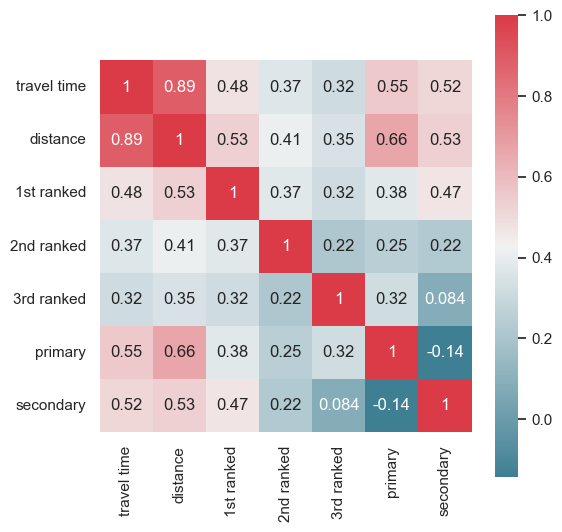

In [29]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [30]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.4079406163668957, 0.8740027806737366, 0.0, ...,
        0.6710239415388383, 0.0, 0.017971396783628683],
       [0.14152154334229008, 0.8740027806737366, 0.0, ...,
        0.18106562813554358, 0.0, 0.017971396783628683],
       [0.007691409000735437, 0.44098095571074175, 0.5420035223430127,
        ..., 0.0, 0.0, 0.019211435826067557],
       ...,
       [0.14743064755604368, 0.44098095571074175, 0.8669969576469222,
        ..., 0.09763301582830548, 0.0, 0.2258799906349461],
       [0.006584329161544953, 0.0, 0.8466557500997504, ..., 0.0, 0.0,
        0.006689294768193124],
       [0.30531951081446734, 0.8740027806737366, 1.0, ...,
        0.48646096134547756, 0.023351345274193767, 0.012331682113495598]],
      dtype=object)

In [31]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13480, 7)
(3370, 7)


In [135]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
422/422 [==============================] - 1s 961us/step - loss: 573369.8750 - mape: 97.3708 - rmse: 757.2119 - val_loss: 524359.6875 - val_mape: 92.4158 - val_rmse: 724.1268
Epoch 2/500
422/422 [==============================] - 0s 764us/step - loss: 466466.5938 - mape: 83.0399 - rmse: 682.9836 - val_loss: 382933.9062 - val_mape: 71.9167 - val_rmse: 618.8165
Epoch 3/500
422/422 [==============================] - 0s 838us/step - loss: 311611.3125 - mape: 60.5755 - rmse: 558.2216 - val_loss: 235572.2500 - val_mape: 49.9159 - val_rmse: 485.3578
Epoch 4/500
422/422 [==============================] - 0s 820us/step - loss: 183744.4688 - mape: 43.1979 - rmse: 428.6543 - val_loss: 139302.4844 - val_mape: 39.8215 - val_rmse: 373.2325
Epoch 5/500
422/422 [==============================] - 0s 854us/step - loss: 115174.7266 - mape: 38.5543 - rmse: 339.3740 - val_loss: 99754.5312 - val_mape: 40.9705 - val_rmse: 315.8394
Epoch 6/500
422/422 [==============================] - 0s 835us/st

422/422 [==============================] - 0s 742us/step - loss: 33988.2695 - mape: 25.5934 - rmse: 184.3591 - val_loss: 36282.2461 - val_mape: 25.3366 - val_rmse: 190.4790
Epoch 46/500
422/422 [==============================] - 0s 761us/step - loss: 33970.6680 - mape: 25.5567 - rmse: 184.3113 - val_loss: 36235.0273 - val_mape: 25.3735 - val_rmse: 190.3550
Epoch 47/500
422/422 [==============================] - 0s 724us/step - loss: 33953.0039 - mape: 25.5176 - rmse: 184.2634 - val_loss: 36178.8906 - val_mape: 25.4916 - val_rmse: 190.2075
Epoch 48/500
422/422 [==============================] - 0s 737us/step - loss: 33937.5469 - mape: 25.5351 - rmse: 184.2215 - val_loss: 36169.3281 - val_mape: 25.4149 - val_rmse: 190.1824
Epoch 49/500
422/422 [==============================] - 0s 794us/step - loss: 33919.0469 - mape: 25.4510 - rmse: 184.1712 - val_loss: 36145.3281 - val_mape: 25.4505 - val_rmse: 190.1192
Epoch 50/500
422/422 [==============================] - 0s 752us/step - loss: 33903

Epoch 133/500
422/422 [==============================] - 0s 756us/step - loss: 32720.8965 - mape: 24.5276 - rmse: 180.8892 - val_loss: 34795.4531 - val_mape: 24.5503 - val_rmse: 186.5354
Epoch 134/500
422/422 [==============================] - 0s 739us/step - loss: 32711.7773 - mape: 24.5042 - rmse: 180.8640 - val_loss: 34771.5977 - val_mape: 24.5905 - val_rmse: 186.4714
Epoch 135/500
422/422 [==============================] - 0s 787us/step - loss: 32699.5508 - mape: 24.5682 - rmse: 180.8302 - val_loss: 34805.2852 - val_mape: 24.3722 - val_rmse: 186.5618
Epoch 136/500
422/422 [==============================] - 0s 771us/step - loss: 32688.8848 - mape: 24.5020 - rmse: 180.8007 - val_loss: 34807.7969 - val_mape: 24.3125 - val_rmse: 186.5685
Epoch 137/500
422/422 [==============================] - 0s 735us/step - loss: 32670.1602 - mape: 24.5066 - rmse: 180.7489 - val_loss: 34872.0547 - val_mape: 24.1123 - val_rmse: 186.7406
Epoch 138/500
422/422 [==============================] - 0s 762us

Epoch 177/500
422/422 [==============================] - 0s 761us/step - loss: 32199.5176 - mape: 24.0562 - rmse: 179.4422 - val_loss: 34326.4023 - val_mape: 23.8113 - val_rmse: 185.2739
Epoch 178/500
422/422 [==============================] - 0s 751us/step - loss: 32183.7480 - mape: 24.0042 - rmse: 179.3983 - val_loss: 34316.4766 - val_mape: 23.8024 - val_rmse: 185.2471
Epoch 179/500
422/422 [==============================] - 0s 738us/step - loss: 32177.1230 - mape: 24.0115 - rmse: 179.3798 - val_loss: 34361.7930 - val_mape: 23.6676 - val_rmse: 185.3693
Epoch 180/500
422/422 [==============================] - 0s 813us/step - loss: 32164.6523 - mape: 23.9887 - rmse: 179.3451 - val_loss: 34404.0078 - val_mape: 23.5384 - val_rmse: 185.4832
Epoch 181/500
422/422 [==============================] - 0s 758us/step - loss: 32154.0801 - mape: 23.9556 - rmse: 179.3156 - val_loss: 34256.8828 - val_mape: 23.8792 - val_rmse: 185.0862
Epoch 182/500
422/422 [==============================] - 0s 789us

Epoch 221/500
422/422 [==============================] - 0s 773us/step - loss: 31846.8418 - mape: 23.6346 - rmse: 178.4568 - val_loss: 33999.3320 - val_mape: 23.3665 - val_rmse: 184.3891
Epoch 222/500
422/422 [==============================] - 0s 781us/step - loss: 31828.7090 - mape: 23.6003 - rmse: 178.4060 - val_loss: 33907.9805 - val_mape: 23.6876 - val_rmse: 184.1412
Epoch 223/500
422/422 [==============================] - 0s 753us/step - loss: 31818.6758 - mape: 23.6163 - rmse: 178.3779 - val_loss: 33914.1484 - val_mape: 23.6194 - val_rmse: 184.1579
Epoch 224/500
422/422 [==============================] - 0s 743us/step - loss: 31810.2734 - mape: 23.6605 - rmse: 178.3544 - val_loss: 33993.2852 - val_mape: 23.3355 - val_rmse: 184.3727
Epoch 225/500
422/422 [==============================] - 0s 771us/step - loss: 31814.8613 - mape: 23.5897 - rmse: 178.3672 - val_loss: 33963.5234 - val_mape: 23.4070 - val_rmse: 184.2919
Epoch 226/500
422/422 [==============================] - 0s 754us

Epoch 265/500
422/422 [==============================] - 0s 782us/step - loss: 31608.8926 - mape: 23.4104 - rmse: 177.7889 - val_loss: 33751.3633 - val_mape: 23.2559 - val_rmse: 183.7154
Epoch 266/500
422/422 [==============================] - 0s 747us/step - loss: 31597.5234 - mape: 23.3246 - rmse: 177.7569 - val_loss: 33699.2891 - val_mape: 23.5131 - val_rmse: 183.5737
Epoch 267/500
422/422 [==============================] - 0s 786us/step - loss: 31597.8281 - mape: 23.3621 - rmse: 177.7578 - val_loss: 33721.1094 - val_mape: 23.3349 - val_rmse: 183.6331
Epoch 268/500
422/422 [==============================] - 0s 754us/step - loss: 31589.8770 - mape: 23.3148 - rmse: 177.7354 - val_loss: 33701.4375 - val_mape: 23.4422 - val_rmse: 183.5795
Epoch 269/500
422/422 [==============================] - 0s 796us/step - loss: 31583.5332 - mape: 23.3931 - rmse: 177.7176 - val_loss: 33736.0938 - val_mape: 23.2379 - val_rmse: 183.6739
Epoch 270/500
422/422 [==============================] - 0s 758us

Epoch 309/500
422/422 [==============================] - 0s 765us/step - loss: 31447.1406 - mape: 23.0831 - rmse: 177.3334 - val_loss: 33571.0703 - val_mape: 23.4684 - val_rmse: 183.2241
Epoch 310/500
422/422 [==============================] - 0s 751us/step - loss: 31460.3340 - mape: 23.1462 - rmse: 177.3706 - val_loss: 33590.5938 - val_mape: 23.2392 - val_rmse: 183.2774
Epoch 311/500
422/422 [==============================] - 0s 745us/step - loss: 31451.4238 - mape: 23.1443 - rmse: 177.3455 - val_loss: 33660.2344 - val_mape: 22.9606 - val_rmse: 183.4673
Epoch 312/500
422/422 [==============================] - 0s 760us/step - loss: 31448.6270 - mape: 23.1655 - rmse: 177.3376 - val_loss: 33677.4688 - val_mape: 22.8672 - val_rmse: 183.5142
Epoch 313/500
422/422 [==============================] - 0s 759us/step - loss: 31429.7754 - mape: 23.1468 - rmse: 177.2845 - val_loss: 33812.0352 - val_mape: 22.5872 - val_rmse: 183.8805
Epoch 314/500
422/422 [==============================] - 0s 745us

Epoch 353/500
422/422 [==============================] - 0s 752us/step - loss: 31372.1094 - mape: 23.0466 - rmse: 177.1217 - val_loss: 33714.3594 - val_mape: 22.4617 - val_rmse: 183.6147
Epoch 354/500
422/422 [==============================] - 0s 768us/step - loss: 31367.7012 - mape: 22.9237 - rmse: 177.1093 - val_loss: 33564.7773 - val_mape: 22.8416 - val_rmse: 183.2069
Epoch 355/500
422/422 [==============================] - 0s 749us/step - loss: 31366.2363 - mape: 22.9525 - rmse: 177.1052 - val_loss: 33545.2812 - val_mape: 22.9151 - val_rmse: 183.1537
Epoch 356/500
422/422 [==============================] - 0s 777us/step - loss: 31354.9570 - mape: 23.0224 - rmse: 177.0733 - val_loss: 33661.6836 - val_mape: 22.5795 - val_rmse: 183.4712
Epoch 357/500
422/422 [==============================] - 0s 790us/step - loss: 31352.4180 - mape: 22.9522 - rmse: 177.0661 - val_loss: 33581.0977 - val_mape: 22.7782 - val_rmse: 183.2515
Epoch 358/500
422/422 [==============================] - 0s 774us

Epoch 397/500
422/422 [==============================] - 0s 746us/step - loss: 31296.1621 - mape: 22.8665 - rmse: 176.9072 - val_loss: 33463.8477 - val_mape: 22.8578 - val_rmse: 182.9313
Epoch 398/500
422/422 [==============================] - 0s 749us/step - loss: 31297.1152 - mape: 22.8559 - rmse: 176.9099 - val_loss: 33535.2305 - val_mape: 22.6224 - val_rmse: 183.1263
Epoch 399/500
422/422 [==============================] - 0s 766us/step - loss: 31292.7930 - mape: 22.9031 - rmse: 176.8977 - val_loss: 33518.3281 - val_mape: 22.6302 - val_rmse: 183.0801
Epoch 400/500
422/422 [==============================] - 0s 748us/step - loss: 31294.0195 - mape: 22.8428 - rmse: 176.9012 - val_loss: 33456.5469 - val_mape: 22.8772 - val_rmse: 182.9113
Epoch 401/500
422/422 [==============================] - 0s 791us/step - loss: 31278.0430 - mape: 22.7995 - rmse: 176.8560 - val_loss: 33432.0664 - val_mape: 23.0724 - val_rmse: 182.8444
Epoch 402/500
422/422 [==============================] - 0s 758us

Epoch 441/500
422/422 [==============================] - 0s 736us/step - loss: 31229.3926 - mape: 22.8298 - rmse: 176.7184 - val_loss: 33487.8086 - val_mape: 22.4481 - val_rmse: 182.9967
Epoch 442/500
422/422 [==============================] - 0s 780us/step - loss: 31232.9902 - mape: 22.7268 - rmse: 176.7286 - val_loss: 33466.1641 - val_mape: 22.5438 - val_rmse: 182.9376
Epoch 443/500
422/422 [==============================] - 0s 734us/step - loss: 31236.9883 - mape: 22.7614 - rmse: 176.7399 - val_loss: 33401.3828 - val_mape: 22.7472 - val_rmse: 182.7605
Epoch 444/500
422/422 [==============================] - 0s 751us/step - loss: 31230.3008 - mape: 22.7700 - rmse: 176.7210 - val_loss: 33433.1328 - val_mape: 22.5956 - val_rmse: 182.8473
Epoch 445/500
422/422 [==============================] - 0s 761us/step - loss: 31224.1074 - mape: 22.7222 - rmse: 176.7034 - val_loss: 33429.8086 - val_mape: 22.5994 - val_rmse: 182.8382
Epoch 446/500
422/422 [==============================] - 0s 742us

Epoch 485/500
422/422 [==============================] - 0s 752us/step - loss: 31173.2676 - mape: 22.6814 - rmse: 176.5595 - val_loss: 33444.5000 - val_mape: 22.3241 - val_rmse: 182.8784
Epoch 486/500
422/422 [==============================] - 0s 789us/step - loss: 31175.6230 - mape: 22.6529 - rmse: 176.5662 - val_loss: 33424.3086 - val_mape: 22.3675 - val_rmse: 182.8232
Epoch 487/500
422/422 [==============================] - 0s 775us/step - loss: 31161.0039 - mape: 22.6979 - rmse: 176.5248 - val_loss: 33408.2578 - val_mape: 22.3900 - val_rmse: 182.7793
Epoch 488/500
422/422 [==============================] - 0s 735us/step - loss: 31170.2559 - mape: 22.6222 - rmse: 176.5510 - val_loss: 33335.1094 - val_mape: 22.6621 - val_rmse: 182.5791
Epoch 489/500
422/422 [==============================] - 0s 752us/step - loss: 31165.2598 - mape: 22.6662 - rmse: 176.5368 - val_loss: 33325.9766 - val_mape: 22.6924 - val_rmse: 182.5540
Epoch 490/500
422/422 [==============================] - 0s 744us

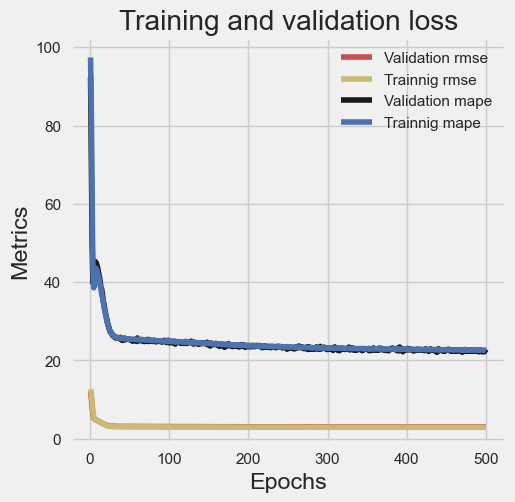

In [136]:
plotme(model8_1_3)

In [167]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
422/422 [==============================] - 1s 885us/step - loss: 43896.5742 - mape: 23.7491 - rmse: 209.5151 - val_loss: 33768.0234 - val_mape: 21.8369 - val_rmse: 183.7608
Epoch 2/500
422/422 [==============================] - 0s 758us/step - loss: 38286.1641 - mape: 22.8636 - rmse: 195.6685 - val_loss: 34701.5625 - val_mape: 24.2748 - val_rmse: 186.2836
Epoch 3/500
422/422 [==============================] - 0s 767us/step - loss: 36059.9922 - mape: 22.4601 - rmse: 189.8947 - val_loss: 43751.9492 - val_mape: 27.7779 - val_rmse: 209.1697
Epoch 4/500
422/422 [==============================] - 0s 760us/step - loss: 34807.1133 - mape: 22.3359 - rmse: 186.5667 - val_loss: 36206.4062 - val_mape: 21.1020 - val_rmse: 190.2798
Epoch 5/500
422/422 [==============================] - 0s 759us/step - loss: 35659.9336 - mape: 22.2813 - rmse: 188.8384 - val_loss: 33773.8203 - val_mape: 20.4192 - val_rmse: 183.7766
Epoch 6/500
422/422 [==============================] - 0s 768us/step - loss

422/422 [==============================] - 0s 760us/step - loss: 30377.9805 - mape: 21.2635 - rmse: 174.2928 - val_loss: 35035.2773 - val_mape: 19.9419 - val_rmse: 187.1771
Epoch 90/500
422/422 [==============================] - 0s 762us/step - loss: 30592.6914 - mape: 21.2559 - rmse: 174.9077 - val_loss: 31972.1895 - val_mape: 21.6878 - val_rmse: 178.8077
Epoch 91/500
422/422 [==============================] - 0s 758us/step - loss: 30218.2910 - mape: 21.2657 - rmse: 173.8341 - val_loss: 32483.6211 - val_mape: 20.3764 - val_rmse: 180.2321
Epoch 92/500
422/422 [==============================] - 0s 752us/step - loss: 30238.2051 - mape: 21.2379 - rmse: 173.8914 - val_loss: 32964.0859 - val_mape: 20.2089 - val_rmse: 181.5602
Epoch 93/500
422/422 [==============================] - 0s 748us/step - loss: 29993.8594 - mape: 21.1765 - rmse: 173.1873 - val_loss: 33162.5156 - val_mape: 20.6576 - val_rmse: 182.1058
Epoch 94/500
422/422 [==============================] - 0s 753us/step - loss: 30241

Epoch 133/500
422/422 [==============================] - 0s 743us/step - loss: 29832.4277 - mape: 21.1929 - rmse: 172.7207 - val_loss: 32381.6094 - val_mape: 21.0987 - val_rmse: 179.9489
Epoch 134/500
422/422 [==============================] - 0s 750us/step - loss: 29639.9883 - mape: 21.1011 - rmse: 172.1627 - val_loss: 31508.3262 - val_mape: 21.0204 - val_rmse: 177.5058
Epoch 135/500
422/422 [==============================] - 0s 756us/step - loss: 29882.5215 - mape: 21.1223 - rmse: 172.8656 - val_loss: 31742.8164 - val_mape: 21.7023 - val_rmse: 178.1651
Epoch 136/500
422/422 [==============================] - 0s 756us/step - loss: 29950.4043 - mape: 21.2377 - rmse: 173.0618 - val_loss: 32029.0449 - val_mape: 20.3195 - val_rmse: 178.9666
Epoch 137/500
422/422 [==============================] - 0s 757us/step - loss: 29871.8691 - mape: 21.2028 - rmse: 172.8348 - val_loss: 31601.4883 - val_mape: 21.8316 - val_rmse: 177.7681
Epoch 138/500
422/422 [==============================] - 0s 759us

Epoch 177/500
422/422 [==============================] - 0s 756us/step - loss: 29514.6641 - mape: 21.2453 - rmse: 171.7983 - val_loss: 32409.9141 - val_mape: 21.1813 - val_rmse: 180.0275
Epoch 178/500
422/422 [==============================] - 0s 757us/step - loss: 29410.5137 - mape: 21.1102 - rmse: 171.4949 - val_loss: 31607.8203 - val_mape: 21.6032 - val_rmse: 177.7859
Epoch 179/500
422/422 [==============================] - 0s 765us/step - loss: 29712.2793 - mape: 21.3064 - rmse: 172.3725 - val_loss: 31778.8691 - val_mape: 20.6743 - val_rmse: 178.2663
Epoch 180/500
422/422 [==============================] - 0s 761us/step - loss: 29521.4902 - mape: 21.1628 - rmse: 171.8182 - val_loss: 32803.2539 - val_mape: 20.2503 - val_rmse: 181.1167
Epoch 181/500
422/422 [==============================] - 0s 765us/step - loss: 29638.0723 - mape: 21.1295 - rmse: 172.1571 - val_loss: 31704.6270 - val_mape: 21.1245 - val_rmse: 178.0579
Epoch 182/500
422/422 [==============================] - 0s 755us

Epoch 221/500
422/422 [==============================] - 0s 756us/step - loss: 29150.6562 - mape: 21.1368 - rmse: 170.7356 - val_loss: 31871.3945 - val_mape: 20.0967 - val_rmse: 178.5256
Epoch 222/500
422/422 [==============================] - 0s 753us/step - loss: 29133.6895 - mape: 21.0358 - rmse: 170.6859 - val_loss: 32348.0195 - val_mape: 20.4992 - val_rmse: 179.8555
Epoch 223/500
422/422 [==============================] - 0s 759us/step - loss: 29233.0938 - mape: 21.1280 - rmse: 170.9769 - val_loss: 31652.3320 - val_mape: 21.7804 - val_rmse: 177.9110
Epoch 224/500
422/422 [==============================] - 0s 780us/step - loss: 29371.2910 - mape: 21.1186 - rmse: 171.3805 - val_loss: 32387.4023 - val_mape: 19.8972 - val_rmse: 179.9650
Epoch 225/500
422/422 [==============================] - 0s 801us/step - loss: 29353.3809 - mape: 21.0666 - rmse: 171.3283 - val_loss: 31679.1738 - val_mape: 21.0239 - val_rmse: 177.9865
Epoch 226/500
422/422 [==============================] - 0s 774us

Epoch 265/500
422/422 [==============================] - 0s 762us/step - loss: 28983.8750 - mape: 20.9410 - rmse: 170.2465 - val_loss: 31438.9824 - val_mape: 21.1479 - val_rmse: 177.3104
Epoch 266/500
422/422 [==============================] - 0s 760us/step - loss: 29143.2539 - mape: 21.1335 - rmse: 170.7140 - val_loss: 32001.6172 - val_mape: 20.7014 - val_rmse: 178.8900
Epoch 267/500
422/422 [==============================] - 0s 757us/step - loss: 28875.3867 - mape: 21.0039 - rmse: 169.9276 - val_loss: 31315.3145 - val_mape: 21.2320 - val_rmse: 176.9613
Epoch 268/500
422/422 [==============================] - 0s 751us/step - loss: 29231.9785 - mape: 21.1165 - rmse: 170.9736 - val_loss: 31548.9922 - val_mape: 22.3470 - val_rmse: 177.6204
Epoch 269/500
422/422 [==============================] - 0s 755us/step - loss: 29129.7266 - mape: 21.1085 - rmse: 170.6743 - val_loss: 31457.2129 - val_mape: 21.4022 - val_rmse: 177.3618
Epoch 270/500
422/422 [==============================] - 0s 762us

Epoch 309/500
422/422 [==============================] - 0s 757us/step - loss: 28927.8770 - mape: 21.0229 - rmse: 170.0820 - val_loss: 31767.6484 - val_mape: 20.2451 - val_rmse: 178.2348
Epoch 310/500
422/422 [==============================] - 0s 758us/step - loss: 29018.2676 - mape: 21.0434 - rmse: 170.3475 - val_loss: 31318.7637 - val_mape: 20.7794 - val_rmse: 176.9711
Epoch 311/500
422/422 [==============================] - 0s 759us/step - loss: 28997.9805 - mape: 21.0164 - rmse: 170.2879 - val_loss: 31761.8262 - val_mape: 21.9219 - val_rmse: 178.2185
Epoch 312/500
422/422 [==============================] - 0s 752us/step - loss: 29231.0273 - mape: 21.1159 - rmse: 170.9708 - val_loss: 31711.6250 - val_mape: 21.5475 - val_rmse: 178.0776
Epoch 313/500
422/422 [==============================] - 0s 750us/step - loss: 29162.8828 - mape: 21.0403 - rmse: 170.7714 - val_loss: 31449.7324 - val_mape: 21.9577 - val_rmse: 177.3407
Epoch 314/500
422/422 [==============================] - 0s 745us

Epoch 353/500
422/422 [==============================] - 0s 754us/step - loss: 28941.9199 - mape: 21.0469 - rmse: 170.1232 - val_loss: 31465.3652 - val_mape: 21.7379 - val_rmse: 177.3848
Epoch 354/500
422/422 [==============================] - 0s 776us/step - loss: 28939.4180 - mape: 21.0641 - rmse: 170.1159 - val_loss: 31438.3262 - val_mape: 21.1171 - val_rmse: 177.3086
Epoch 355/500
422/422 [==============================] - 0s 757us/step - loss: 29090.4004 - mape: 21.0663 - rmse: 170.5591 - val_loss: 31367.0293 - val_mape: 21.3315 - val_rmse: 177.1074
Epoch 356/500
422/422 [==============================] - 0s 751us/step - loss: 28924.6582 - mape: 20.9893 - rmse: 170.0725 - val_loss: 31513.6602 - val_mape: 22.2531 - val_rmse: 177.5209
Epoch 357/500
422/422 [==============================] - 0s 748us/step - loss: 28926.2520 - mape: 21.0270 - rmse: 170.0772 - val_loss: 31705.7969 - val_mape: 21.0305 - val_rmse: 178.0612
Epoch 358/500
422/422 [==============================] - 0s 752us

Epoch 397/500
422/422 [==============================] - 0s 729us/step - loss: 29020.4395 - mape: 21.0702 - rmse: 170.3539 - val_loss: 31903.6328 - val_mape: 20.2456 - val_rmse: 178.6159
Epoch 398/500
422/422 [==============================] - 0s 730us/step - loss: 28926.1309 - mape: 21.0177 - rmse: 170.0768 - val_loss: 31798.4160 - val_mape: 19.9811 - val_rmse: 178.3211
Epoch 399/500
422/422 [==============================] - 0s 724us/step - loss: 28876.3008 - mape: 20.8788 - rmse: 169.9303 - val_loss: 31724.4414 - val_mape: 22.6488 - val_rmse: 178.1136
Epoch 400/500
422/422 [==============================] - 0s 731us/step - loss: 28889.1348 - mape: 21.0322 - rmse: 169.9680 - val_loss: 31250.4141 - val_mape: 21.0867 - val_rmse: 176.7779
Epoch 401/500
422/422 [==============================] - 0s 744us/step - loss: 28919.2949 - mape: 21.0816 - rmse: 170.0567 - val_loss: 31306.7441 - val_mape: 20.8462 - val_rmse: 176.9371
Epoch 402/500
422/422 [==============================] - 0s 736us

Epoch 441/500
422/422 [==============================] - 0s 746us/step - loss: 29010.9004 - mape: 21.0125 - rmse: 170.3259 - val_loss: 31631.5293 - val_mape: 21.0646 - val_rmse: 177.8526
Epoch 442/500
422/422 [==============================] - 0s 752us/step - loss: 28969.5215 - mape: 21.1396 - rmse: 170.2043 - val_loss: 31917.6641 - val_mape: 22.1343 - val_rmse: 178.6552
Epoch 443/500
422/422 [==============================] - 0s 755us/step - loss: 29113.7109 - mape: 21.0697 - rmse: 170.6274 - val_loss: 31490.7852 - val_mape: 21.1925 - val_rmse: 177.4564
Epoch 444/500
422/422 [==============================] - 0s 750us/step - loss: 29071.5039 - mape: 21.0416 - rmse: 170.5037 - val_loss: 31716.9102 - val_mape: 21.3290 - val_rmse: 178.0924
Epoch 445/500
422/422 [==============================] - 0s 761us/step - loss: 28900.0762 - mape: 21.0551 - rmse: 170.0002 - val_loss: 31946.4102 - val_mape: 20.0979 - val_rmse: 178.7356
Epoch 446/500
422/422 [==============================] - 0s 755us

Epoch 485/500
422/422 [==============================] - 0s 752us/step - loss: 28829.8184 - mape: 21.0536 - rmse: 169.7935 - val_loss: 31638.3770 - val_mape: 20.9902 - val_rmse: 177.8718
Epoch 486/500
422/422 [==============================] - 0s 762us/step - loss: 28919.3809 - mape: 20.9949 - rmse: 170.0570 - val_loss: 31751.3145 - val_mape: 22.8558 - val_rmse: 178.1890
Epoch 487/500
422/422 [==============================] - 0s 760us/step - loss: 28776.6738 - mape: 21.0539 - rmse: 169.6369 - val_loss: 31786.8652 - val_mape: 21.2225 - val_rmse: 178.2887
Epoch 488/500
422/422 [==============================] - 0s 742us/step - loss: 28924.6973 - mape: 21.0156 - rmse: 170.0726 - val_loss: 31471.8711 - val_mape: 20.8241 - val_rmse: 177.4031
Epoch 489/500
422/422 [==============================] - 0s 746us/step - loss: 29090.2617 - mape: 21.0734 - rmse: 170.5587 - val_loss: 31362.0625 - val_mape: 21.5372 - val_rmse: 177.0934
Epoch 490/500
422/422 [==============================] - 0s 748us

In [168]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
422/422 [==============================] - 1s 984us/step - loss: 68066.3906 - mape: 24.7138 - rmse: 260.8954 - val_loss: 34220.8438 - val_mape: 20.5889 - val_rmse: 184.9888
Epoch 2/500
422/422 [==============================] - 0s 831us/step - loss: 37988.9453 - mape: 23.0455 - rmse: 194.9075 - val_loss: 35323.8438 - val_mape: 21.0723 - val_rmse: 187.9464
Epoch 3/500
422/422 [==============================] - 0s 826us/step - loss: 38029.4609 - mape: 22.9639 - rmse: 195.0114 - val_loss: 33982.6094 - val_mape: 20.8118 - val_rmse: 184.3437
Epoch 4/500
422/422 [==============================] - 0s 832us/step - loss: 36814.2578 - mape: 22.5849 - rmse: 191.8704 - val_loss: 36416.2578 - val_mape: 24.0809 - val_rmse: 190.8304
Epoch 5/500
422/422 [==============================] - 0s 830us/step - loss: 36310.6680 - mape: 22.4254 - rmse: 190.5536 - val_loss: 33517.4688 - val_mape: 21.3874 - val_rmse: 183.0778
Epoch 6/500
422/422 [==============================] - 0s 830us/step - loss

422/422 [==============================] - 0s 820us/step - loss: 29666.2832 - mape: 21.1450 - rmse: 172.2390 - val_loss: 32196.7637 - val_mape: 21.3296 - val_rmse: 179.4346
Epoch 90/500
422/422 [==============================] - 0s 831us/step - loss: 29795.4941 - mape: 21.1104 - rmse: 172.6137 - val_loss: 31429.4141 - val_mape: 22.0107 - val_rmse: 177.2834
Epoch 91/500
422/422 [==============================] - 0s 821us/step - loss: 29452.3848 - mape: 21.1243 - rmse: 171.6170 - val_loss: 32502.7793 - val_mape: 20.5382 - val_rmse: 180.2853
Epoch 92/500
422/422 [==============================] - 0s 824us/step - loss: 29249.7051 - mape: 21.0469 - rmse: 171.0255 - val_loss: 36966.5117 - val_mape: 20.3946 - val_rmse: 192.2668
Epoch 93/500
422/422 [==============================] - 0s 852us/step - loss: 29336.5547 - mape: 21.1206 - rmse: 171.2792 - val_loss: 31556.0918 - val_mape: 21.7812 - val_rmse: 177.6404
Epoch 94/500
422/422 [==============================] - 0s 830us/step - loss: 29204

Epoch 133/500
422/422 [==============================] - 0s 845us/step - loss: 29895.3613 - mape: 21.1327 - rmse: 172.9028 - val_loss: 33478.7070 - val_mape: 20.7235 - val_rmse: 182.9719
Epoch 134/500
422/422 [==============================] - 0s 824us/step - loss: 29043.2305 - mape: 20.9317 - rmse: 170.4207 - val_loss: 31709.6953 - val_mape: 21.3615 - val_rmse: 178.0722
Epoch 135/500
422/422 [==============================] - 0s 822us/step - loss: 28701.5508 - mape: 21.0006 - rmse: 169.4153 - val_loss: 31011.9570 - val_mape: 21.6655 - val_rmse: 176.1021
Epoch 136/500
422/422 [==============================] - 0s 825us/step - loss: 28887.5723 - mape: 20.9963 - rmse: 169.9634 - val_loss: 31477.4648 - val_mape: 21.7669 - val_rmse: 177.4189
Epoch 137/500
422/422 [==============================] - 0s 807us/step - loss: 28487.2578 - mape: 20.9015 - rmse: 168.7817 - val_loss: 31873.9473 - val_mape: 21.6301 - val_rmse: 178.5328
Epoch 138/500
422/422 [==============================] - 0s 837us

Epoch 177/500
422/422 [==============================] - 0s 824us/step - loss: 28505.0977 - mape: 20.8980 - rmse: 168.8345 - val_loss: 31712.2969 - val_mape: 21.4213 - val_rmse: 178.0795
Epoch 178/500
422/422 [==============================] - 0s 820us/step - loss: 28563.6016 - mape: 20.9447 - rmse: 169.0077 - val_loss: 31732.7891 - val_mape: 20.5870 - val_rmse: 178.1370
Epoch 179/500
422/422 [==============================] - 0s 826us/step - loss: 28209.3477 - mape: 20.8369 - rmse: 167.9564 - val_loss: 31114.1699 - val_mape: 21.0178 - val_rmse: 176.3921
Epoch 180/500
422/422 [==============================] - 0s 820us/step - loss: 28468.3320 - mape: 20.8980 - rmse: 168.7256 - val_loss: 31539.7109 - val_mape: 21.5319 - val_rmse: 177.5942
Epoch 181/500
422/422 [==============================] - 0s 830us/step - loss: 28899.9492 - mape: 20.9988 - rmse: 169.9998 - val_loss: 31279.1914 - val_mape: 21.3585 - val_rmse: 176.8592
Epoch 182/500
422/422 [==============================] - 0s 817us

Epoch 221/500
422/422 [==============================] - 0s 824us/step - loss: 28210.7559 - mape: 20.8245 - rmse: 167.9606 - val_loss: 31780.6934 - val_mape: 20.9498 - val_rmse: 178.2714
Epoch 222/500
422/422 [==============================] - 0s 809us/step - loss: 28345.0684 - mape: 20.8871 - rmse: 168.3599 - val_loss: 31487.2598 - val_mape: 21.8828 - val_rmse: 177.4465
Epoch 223/500
422/422 [==============================] - 0s 817us/step - loss: 28176.7148 - mape: 20.7859 - rmse: 167.8592 - val_loss: 33209.3125 - val_mape: 20.4448 - val_rmse: 182.2342
Epoch 224/500
422/422 [==============================] - 0s 815us/step - loss: 27988.6289 - mape: 20.7947 - rmse: 167.2980 - val_loss: 31387.5000 - val_mape: 21.5659 - val_rmse: 177.1652
Epoch 225/500
422/422 [==============================] - 0s 816us/step - loss: 28087.8262 - mape: 20.8151 - rmse: 167.5942 - val_loss: 31890.1523 - val_mape: 21.2236 - val_rmse: 178.5781
Epoch 226/500
422/422 [==============================] - 0s 815us

Epoch 265/500
422/422 [==============================] - 0s 829us/step - loss: 28408.3770 - mape: 20.9546 - rmse: 168.5479 - val_loss: 31192.5059 - val_mape: 21.6640 - val_rmse: 176.6140
Epoch 266/500
422/422 [==============================] - 0s 820us/step - loss: 27684.6152 - mape: 20.6755 - rmse: 166.3869 - val_loss: 31450.8672 - val_mape: 21.2829 - val_rmse: 177.3439
Epoch 267/500
422/422 [==============================] - 0s 827us/step - loss: 27691.4453 - mape: 20.6961 - rmse: 166.4075 - val_loss: 31152.5176 - val_mape: 21.7106 - val_rmse: 176.5008
Epoch 268/500
422/422 [==============================] - 0s 837us/step - loss: 27730.1855 - mape: 20.6923 - rmse: 166.5238 - val_loss: 31318.2578 - val_mape: 20.7001 - val_rmse: 176.9697
Epoch 269/500
422/422 [==============================] - 0s 837us/step - loss: 27753.1465 - mape: 20.7040 - rmse: 166.5928 - val_loss: 30970.0723 - val_mape: 20.9968 - val_rmse: 175.9832
Epoch 270/500
422/422 [==============================] - 0s 828us

Epoch 309/500
422/422 [==============================] - 0s 812us/step - loss: 27416.0430 - mape: 20.7069 - rmse: 165.5779 - val_loss: 32147.9316 - val_mape: 20.4458 - val_rmse: 179.2984
Epoch 310/500
422/422 [==============================] - 0s 817us/step - loss: 27408.1875 - mape: 20.6785 - rmse: 165.5542 - val_loss: 31854.3340 - val_mape: 20.4841 - val_rmse: 178.4778
Epoch 311/500
422/422 [==============================] - 0s 831us/step - loss: 27632.6348 - mape: 20.7722 - rmse: 166.2307 - val_loss: 32055.2402 - val_mape: 20.5365 - val_rmse: 179.0398
Epoch 312/500
422/422 [==============================] - 0s 822us/step - loss: 27391.1270 - mape: 20.6420 - rmse: 165.5027 - val_loss: 31589.9590 - val_mape: 21.5091 - val_rmse: 177.7356
Epoch 313/500
422/422 [==============================] - 0s 831us/step - loss: 27327.4668 - mape: 20.6407 - rmse: 165.3102 - val_loss: 32004.4160 - val_mape: 22.0615 - val_rmse: 178.8978
Epoch 314/500
422/422 [==============================] - 0s 838us

Epoch 353/500
422/422 [==============================] - 0s 818us/step - loss: 27302.9609 - mape: 20.6049 - rmse: 165.2361 - val_loss: 31745.9961 - val_mape: 22.5411 - val_rmse: 178.1741
Epoch 354/500
422/422 [==============================] - 0s 817us/step - loss: 27354.5918 - mape: 20.6499 - rmse: 165.3922 - val_loss: 31936.9668 - val_mape: 20.2890 - val_rmse: 178.7092
Epoch 355/500
422/422 [==============================] - 0s 822us/step - loss: 27257.3027 - mape: 20.6135 - rmse: 165.0979 - val_loss: 31562.1523 - val_mape: 20.9976 - val_rmse: 177.6574
Epoch 356/500
422/422 [==============================] - 0s 821us/step - loss: 27050.0137 - mape: 20.5741 - rmse: 164.4689 - val_loss: 32255.7012 - val_mape: 20.8953 - val_rmse: 179.5987
Epoch 357/500
422/422 [==============================] - 0s 800us/step - loss: 27307.3242 - mape: 20.5571 - rmse: 165.2493 - val_loss: 31881.6094 - val_mape: 21.4719 - val_rmse: 178.5542
Epoch 358/500
422/422 [==============================] - 0s 807us

Epoch 397/500
422/422 [==============================] - 0s 828us/step - loss: 27289.4395 - mape: 20.6705 - rmse: 165.1952 - val_loss: 30759.6328 - val_mape: 20.9669 - val_rmse: 175.3842
Epoch 398/500
422/422 [==============================] - 0s 828us/step - loss: 27115.4863 - mape: 20.5159 - rmse: 164.6678 - val_loss: 31139.1367 - val_mape: 21.1404 - val_rmse: 176.4628
Epoch 399/500
422/422 [==============================] - 0s 830us/step - loss: 27119.8242 - mape: 20.5413 - rmse: 164.6810 - val_loss: 31203.7480 - val_mape: 20.6595 - val_rmse: 176.6458
Epoch 400/500
422/422 [==============================] - 0s 824us/step - loss: 27142.8281 - mape: 20.5977 - rmse: 164.7508 - val_loss: 31388.3535 - val_mape: 20.9931 - val_rmse: 177.1676
Epoch 401/500
422/422 [==============================] - 0s 821us/step - loss: 26979.8535 - mape: 20.5695 - rmse: 164.2554 - val_loss: 30955.5781 - val_mape: 21.6229 - val_rmse: 175.9420
Epoch 402/500
422/422 [==============================] - 0s 825us

Epoch 441/500
422/422 [==============================] - 0s 820us/step - loss: 26848.4648 - mape: 20.6265 - rmse: 163.8550 - val_loss: 30817.2461 - val_mape: 21.2857 - val_rmse: 175.5484
Epoch 442/500
422/422 [==============================] - 0s 808us/step - loss: 26828.1758 - mape: 20.5407 - rmse: 163.7931 - val_loss: 30850.1309 - val_mape: 21.3966 - val_rmse: 175.6421
Epoch 443/500
422/422 [==============================] - 0s 808us/step - loss: 26835.3184 - mape: 20.5388 - rmse: 163.8149 - val_loss: 32059.0195 - val_mape: 22.6603 - val_rmse: 179.0503
Epoch 444/500
422/422 [==============================] - 0s 804us/step - loss: 26983.8359 - mape: 20.4948 - rmse: 164.2676 - val_loss: 31915.2480 - val_mape: 20.3394 - val_rmse: 178.6484
Epoch 445/500
422/422 [==============================] - 0s 814us/step - loss: 26885.1016 - mape: 20.6089 - rmse: 163.9668 - val_loss: 30596.8613 - val_mape: 21.1526 - val_rmse: 174.9196
Epoch 446/500
422/422 [==============================] - 0s 830us

Epoch 485/500
422/422 [==============================] - 0s 815us/step - loss: 26722.1465 - mape: 20.4616 - rmse: 163.4691 - val_loss: 31177.9863 - val_mape: 21.4476 - val_rmse: 176.5729
Epoch 486/500
422/422 [==============================] - 0s 812us/step - loss: 26660.0195 - mape: 20.4978 - rmse: 163.2790 - val_loss: 30779.8867 - val_mape: 20.8041 - val_rmse: 175.4420
Epoch 487/500
422/422 [==============================] - 0s 823us/step - loss: 26655.7891 - mape: 20.5012 - rmse: 163.2660 - val_loss: 31608.0645 - val_mape: 20.5632 - val_rmse: 177.7866
Epoch 488/500
422/422 [==============================] - 0s 832us/step - loss: 26687.5254 - mape: 20.4616 - rmse: 163.3632 - val_loss: 31612.8789 - val_mape: 21.2525 - val_rmse: 177.8001
Epoch 489/500
422/422 [==============================] - 0s 828us/step - loss: 26779.9375 - mape: 20.5694 - rmse: 163.6458 - val_loss: 30918.2559 - val_mape: 20.9715 - val_rmse: 175.8359
Epoch 490/500
422/422 [==============================] - 0s 820us

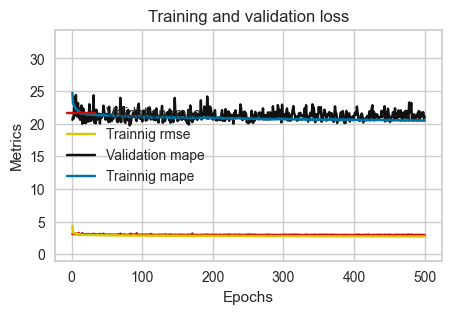

In [169]:
plotme(model8_1_1)

In [170]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
422/422 [==============================] - 1s 1ms/step - loss: 52925.2656 - mape: 24.8057 - rmse: 230.0549 - val_loss: 36536.5156 - val_mape: 24.4489 - val_rmse: 191.1453
Epoch 2/500
422/422 [==============================] - 0s 948us/step - loss: 39815.8008 - mape: 23.3151 - rmse: 199.5390 - val_loss: 94546.5859 - val_mape: 27.6778 - val_rmse: 307.4843
Epoch 3/500
422/422 [==============================] - 0s 943us/step - loss: 38605.7148 - mape: 23.1281 - rmse: 196.4834 - val_loss: 43591.3398 - val_mape: 21.3327 - val_rmse: 208.7854
Epoch 4/500
422/422 [==============================] - 0s 953us/step - loss: 36000.4375 - mape: 22.3444 - rmse: 189.7378 - val_loss: 39656.6016 - val_mape: 21.8832 - val_rmse: 199.1396
Epoch 5/500
422/422 [==============================] - 0s 966us/step - loss: 35745.5898 - mape: 22.2899 - rmse: 189.0650 - val_loss: 32686.0723 - val_mape: 21.2196 - val_rmse: 180.7929
Epoch 6/500
422/422 [==============================] - 0s 958us/step - loss: 

422/422 [==============================] - 0s 971us/step - loss: 28993.7266 - mape: 20.9276 - rmse: 170.2754 - val_loss: 31588.8379 - val_mape: 22.2661 - val_rmse: 177.7325
Epoch 90/500
422/422 [==============================] - 0s 966us/step - loss: 28383.1699 - mape: 20.8886 - rmse: 168.4731 - val_loss: 31365.5547 - val_mape: 20.7402 - val_rmse: 177.1032
Epoch 91/500
422/422 [==============================] - 0s 962us/step - loss: 28711.6211 - mape: 20.9355 - rmse: 169.4450 - val_loss: 32737.5332 - val_mape: 23.3788 - val_rmse: 180.9352
Epoch 92/500
422/422 [==============================] - 0s 961us/step - loss: 28848.1855 - mape: 20.9549 - rmse: 169.8475 - val_loss: 32956.8125 - val_mape: 19.9112 - val_rmse: 181.5401
Epoch 93/500
422/422 [==============================] - 0s 967us/step - loss: 28965.1797 - mape: 20.9182 - rmse: 170.1916 - val_loss: 31073.4980 - val_mape: 20.4179 - val_rmse: 176.2768
Epoch 94/500
422/422 [==============================] - 0s 970us/step - loss: 28754

Epoch 133/500
422/422 [==============================] - 0s 954us/step - loss: 27909.9492 - mape: 20.7739 - rmse: 167.0627 - val_loss: 31653.9180 - val_mape: 20.6775 - val_rmse: 177.9155
Epoch 134/500
422/422 [==============================] - 0s 950us/step - loss: 27948.3594 - mape: 20.8439 - rmse: 167.1776 - val_loss: 31608.4102 - val_mape: 20.1908 - val_rmse: 177.7875
Epoch 135/500
422/422 [==============================] - 0s 983us/step - loss: 28043.4902 - mape: 20.8285 - rmse: 167.4619 - val_loss: 30856.8594 - val_mape: 21.0236 - val_rmse: 175.6612
Epoch 136/500
422/422 [==============================] - 0s 955us/step - loss: 27856.6191 - mape: 20.7576 - rmse: 166.9030 - val_loss: 30928.1133 - val_mape: 20.8303 - val_rmse: 175.8639
Epoch 137/500
422/422 [==============================] - 0s 957us/step - loss: 27987.5684 - mape: 20.8166 - rmse: 167.2949 - val_loss: 30698.3711 - val_mape: 20.6492 - val_rmse: 175.2095
Epoch 138/500
422/422 [==============================] - 0s 967us

Epoch 177/500
422/422 [==============================] - 0s 962us/step - loss: 27460.1113 - mape: 20.7243 - rmse: 165.7109 - val_loss: 31378.5879 - val_mape: 20.4134 - val_rmse: 177.1400
Epoch 178/500
422/422 [==============================] - 0s 967us/step - loss: 27531.7559 - mape: 20.6627 - rmse: 165.9270 - val_loss: 30818.8457 - val_mape: 20.9456 - val_rmse: 175.5530
Epoch 179/500
422/422 [==============================] - 0s 970us/step - loss: 27610.4980 - mape: 20.7792 - rmse: 166.1641 - val_loss: 30965.8633 - val_mape: 21.7006 - val_rmse: 175.9712
Epoch 180/500
422/422 [==============================] - 0s 964us/step - loss: 27684.3535 - mape: 20.7624 - rmse: 166.3862 - val_loss: 30746.6445 - val_mape: 21.6055 - val_rmse: 175.3472
Epoch 181/500
422/422 [==============================] - 0s 980us/step - loss: 27779.6680 - mape: 20.7595 - rmse: 166.6723 - val_loss: 30685.3262 - val_mape: 21.4240 - val_rmse: 175.1723
Epoch 182/500
422/422 [==============================] - 0s 961us

Epoch 221/500
422/422 [==============================] - 0s 1ms/step - loss: 27036.4980 - mape: 20.5987 - rmse: 164.4278 - val_loss: 30356.1230 - val_mape: 20.5512 - val_rmse: 174.2301
Epoch 222/500
422/422 [==============================] - 0s 1ms/step - loss: 27244.2168 - mape: 20.6149 - rmse: 165.0582 - val_loss: 30732.0859 - val_mape: 21.0571 - val_rmse: 175.3057
Epoch 223/500
422/422 [==============================] - 0s 1ms/step - loss: 27107.8281 - mape: 20.6231 - rmse: 164.6445 - val_loss: 31929.3574 - val_mape: 22.1514 - val_rmse: 178.6879
Epoch 224/500
422/422 [==============================] - 0s 963us/step - loss: 27208.7188 - mape: 20.5884 - rmse: 164.9507 - val_loss: 31407.8984 - val_mape: 20.1626 - val_rmse: 177.2227
Epoch 225/500
422/422 [==============================] - 0s 971us/step - loss: 27051.6035 - mape: 20.6036 - rmse: 164.4737 - val_loss: 30752.2129 - val_mape: 20.7946 - val_rmse: 175.3631
Epoch 226/500
422/422 [==============================] - 0s 958us/step 

Epoch 265/500
422/422 [==============================] - 0s 958us/step - loss: 26877.5684 - mape: 20.4899 - rmse: 163.9438 - val_loss: 30896.7207 - val_mape: 21.0355 - val_rmse: 175.7746
Epoch 266/500
422/422 [==============================] - 0s 952us/step - loss: 26983.2539 - mape: 20.5716 - rmse: 164.2658 - val_loss: 31097.7422 - val_mape: 20.4340 - val_rmse: 176.3455
Epoch 267/500
422/422 [==============================] - 0s 966us/step - loss: 26848.6582 - mape: 20.5016 - rmse: 163.8556 - val_loss: 30961.9062 - val_mape: 20.5998 - val_rmse: 175.9600
Epoch 268/500
422/422 [==============================] - 0s 969us/step - loss: 27014.5195 - mape: 20.5880 - rmse: 164.3609 - val_loss: 30596.2852 - val_mape: 21.3062 - val_rmse: 174.9179
Epoch 269/500
422/422 [==============================] - 0s 967us/step - loss: 27368.8848 - mape: 20.5925 - rmse: 165.4354 - val_loss: 30392.8789 - val_mape: 21.3144 - val_rmse: 174.3355
Epoch 270/500
422/422 [==============================] - 0s 969us

Epoch 309/500
422/422 [==============================] - 0s 951us/step - loss: 26982.6152 - mape: 20.5137 - rmse: 164.2639 - val_loss: 31260.1074 - val_mape: 21.6226 - val_rmse: 176.8053
Epoch 310/500
422/422 [==============================] - 0s 954us/step - loss: 26748.1992 - mape: 20.4289 - rmse: 163.5488 - val_loss: 30525.3750 - val_mape: 21.7240 - val_rmse: 174.7151
Epoch 311/500
422/422 [==============================] - 0s 943us/step - loss: 26762.4043 - mape: 20.5289 - rmse: 163.5922 - val_loss: 30697.1992 - val_mape: 21.8868 - val_rmse: 175.2062
Epoch 312/500
422/422 [==============================] - 0s 955us/step - loss: 26797.2695 - mape: 20.4828 - rmse: 163.6987 - val_loss: 30548.2852 - val_mape: 21.0927 - val_rmse: 174.7807
Epoch 313/500
422/422 [==============================] - 0s 950us/step - loss: 26876.8359 - mape: 20.3958 - rmse: 163.9416 - val_loss: 30732.5176 - val_mape: 20.7418 - val_rmse: 175.3069
Epoch 314/500
422/422 [==============================] - 0s 955us

Epoch 353/500
422/422 [==============================] - 0s 952us/step - loss: 26676.2891 - mape: 20.5008 - rmse: 163.3288 - val_loss: 30695.4570 - val_mape: 20.9575 - val_rmse: 175.2012
Epoch 354/500
422/422 [==============================] - 0s 962us/step - loss: 26565.7012 - mape: 20.4652 - rmse: 162.9899 - val_loss: 30243.4375 - val_mape: 21.4446 - val_rmse: 173.9064
Epoch 355/500
422/422 [==============================] - 0s 957us/step - loss: 26600.2832 - mape: 20.4090 - rmse: 163.0959 - val_loss: 30492.3047 - val_mape: 20.6157 - val_rmse: 174.6205
Epoch 356/500
422/422 [==============================] - 0s 953us/step - loss: 26494.3691 - mape: 20.4233 - rmse: 162.7709 - val_loss: 30679.6250 - val_mape: 20.8279 - val_rmse: 175.1560
Epoch 357/500
422/422 [==============================] - 0s 959us/step - loss: 26524.7637 - mape: 20.4594 - rmse: 162.8642 - val_loss: 30782.5605 - val_mape: 20.8205 - val_rmse: 175.4496
Epoch 358/500
422/422 [==============================] - 0s 958us

Epoch 397/500
422/422 [==============================] - 0s 960us/step - loss: 26173.8223 - mape: 20.3737 - rmse: 161.7833 - val_loss: 30542.2715 - val_mape: 21.2239 - val_rmse: 174.7635
Epoch 398/500
422/422 [==============================] - 0s 951us/step - loss: 26375.0781 - mape: 20.3453 - rmse: 162.4041 - val_loss: 31702.1719 - val_mape: 20.6483 - val_rmse: 178.0510
Epoch 399/500
422/422 [==============================] - 0s 955us/step - loss: 26293.8145 - mape: 20.3719 - rmse: 162.1537 - val_loss: 31083.4590 - val_mape: 22.1001 - val_rmse: 176.3050
Epoch 400/500
422/422 [==============================] - 0s 955us/step - loss: 26141.8887 - mape: 20.3244 - rmse: 161.6845 - val_loss: 30509.0391 - val_mape: 20.7681 - val_rmse: 174.6684
Epoch 401/500
422/422 [==============================] - 0s 949us/step - loss: 26590.4863 - mape: 20.4053 - rmse: 163.0659 - val_loss: 31330.5273 - val_mape: 20.6713 - val_rmse: 177.0043
Epoch 402/500
422/422 [==============================] - 0s 960us

Epoch 441/500
422/422 [==============================] - 0s 968us/step - loss: 26052.9941 - mape: 20.3183 - rmse: 161.4094 - val_loss: 30568.1504 - val_mape: 20.7679 - val_rmse: 174.8375
Epoch 442/500
422/422 [==============================] - 0s 963us/step - loss: 26195.6738 - mape: 20.2814 - rmse: 161.8508 - val_loss: 31293.6973 - val_mape: 21.5844 - val_rmse: 176.9003
Epoch 443/500
422/422 [==============================] - 0s 968us/step - loss: 26372.8711 - mape: 20.4079 - rmse: 162.3973 - val_loss: 30761.6289 - val_mape: 21.7075 - val_rmse: 175.3899
Epoch 444/500
422/422 [==============================] - 0s 1ms/step - loss: 26141.1504 - mape: 20.3046 - rmse: 161.6823 - val_loss: 30618.2695 - val_mape: 20.3548 - val_rmse: 174.9808
Epoch 445/500
422/422 [==============================] - 0s 956us/step - loss: 26162.2246 - mape: 20.3369 - rmse: 161.7474 - val_loss: 30882.6074 - val_mape: 21.1743 - val_rmse: 175.7345
Epoch 446/500
422/422 [==============================] - 0s 958us/s

Epoch 485/500
422/422 [==============================] - 0s 965us/step - loss: 25920.5645 - mape: 20.3049 - rmse: 160.9986 - val_loss: 30382.7285 - val_mape: 21.1532 - val_rmse: 174.3064
Epoch 486/500
422/422 [==============================] - 0s 951us/step - loss: 25976.4824 - mape: 20.1911 - rmse: 161.1722 - val_loss: 31243.1289 - val_mape: 21.7017 - val_rmse: 176.7573
Epoch 487/500
422/422 [==============================] - 0s 961us/step - loss: 26201.3789 - mape: 20.3693 - rmse: 161.8684 - val_loss: 31937.6758 - val_mape: 23.9269 - val_rmse: 178.7112
Epoch 488/500
422/422 [==============================] - 0s 958us/step - loss: 26165.1152 - mape: 20.3317 - rmse: 161.7563 - val_loss: 30695.3926 - val_mape: 20.9960 - val_rmse: 175.2010
Epoch 489/500
422/422 [==============================] - 0s 954us/step - loss: 26054.1270 - mape: 20.3405 - rmse: 161.4129 - val_loss: 31121.6973 - val_mape: 20.8715 - val_rmse: 176.4134
Epoch 490/500
422/422 [==============================] - 0s 964us

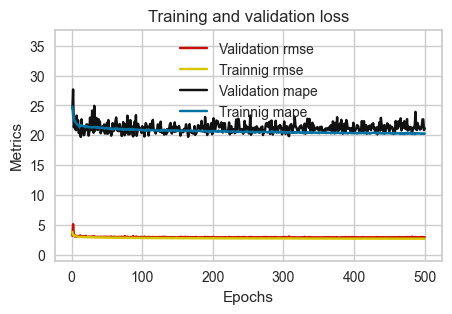

In [171]:
plotme(model8_1_2)

In [172]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
422/422 [==============================] - 1s 854us/step - loss: 756302.7500 - mape: 72.8816 - rmse: 869.6567 - val_loss: 78723.8594 - val_mape: 31.8048 - val_rmse: 280.5777
Epoch 2/500
422/422 [==============================] - 0s 726us/step - loss: 58399.4062 - mape: 27.6890 - rmse: 241.6597 - val_loss: 43998.8242 - val_mape: 23.2834 - val_rmse: 209.7590
Epoch 3/500
422/422 [==============================] - 0s 736us/step - loss: 40289.5625 - mape: 23.2107 - rmse: 200.7226 - val_loss: 37839.4688 - val_mape: 22.6045 - val_rmse: 194.5237
Epoch 4/500
422/422 [==============================] - 0s 738us/step - loss: 35993.1328 - mape: 22.6505 - rmse: 189.7186 - val_loss: 36131.4102 - val_mape: 23.6127 - val_rmse: 190.0826
Epoch 5/500
422/422 [==============================] - 0s 733us/step - loss: 34672.4648 - mape: 22.6059 - rmse: 186.2054 - val_loss: 35236.3555 - val_mape: 22.4132 - val_rmse: 187.7135
Epoch 6/500
422/422 [==============================] - 0s 719us/step - los

422/422 [==============================] - 0s 725us/step - loss: 32238.1270 - mape: 21.5162 - rmse: 179.5498 - val_loss: 33659.4414 - val_mape: 21.9963 - val_rmse: 183.4651
Epoch 90/500
422/422 [==============================] - 0s 730us/step - loss: 31989.3691 - mape: 21.4555 - rmse: 178.8557 - val_loss: 34406.1992 - val_mape: 23.1630 - val_rmse: 185.4891
Epoch 91/500
422/422 [==============================] - 0s 723us/step - loss: 31994.0820 - mape: 21.5148 - rmse: 178.8689 - val_loss: 34255.7656 - val_mape: 21.3316 - val_rmse: 185.0831
Epoch 92/500
422/422 [==============================] - 0s 723us/step - loss: 32380.7930 - mape: 21.5413 - rmse: 179.9466 - val_loss: 34918.7500 - val_mape: 20.7139 - val_rmse: 186.8656
Epoch 93/500
422/422 [==============================] - 0s 715us/step - loss: 32045.3691 - mape: 21.5451 - rmse: 179.0122 - val_loss: 33715.1602 - val_mape: 20.3537 - val_rmse: 183.6169
Epoch 94/500
422/422 [==============================] - 0s 741us/step - loss: 32187

Epoch 133/500
422/422 [==============================] - 0s 711us/step - loss: 31764.7617 - mape: 21.4566 - rmse: 178.2267 - val_loss: 35963.5430 - val_mape: 21.0080 - val_rmse: 189.6406
Epoch 134/500
422/422 [==============================] - 0s 729us/step - loss: 32057.8398 - mape: 21.5082 - rmse: 179.0470 - val_loss: 33770.1484 - val_mape: 21.0441 - val_rmse: 183.7666
Epoch 135/500
422/422 [==============================] - 0s 715us/step - loss: 31948.7305 - mape: 21.5017 - rmse: 178.7421 - val_loss: 33447.4727 - val_mape: 22.4350 - val_rmse: 182.8865
Epoch 136/500
422/422 [==============================] - 0s 724us/step - loss: 32182.7285 - mape: 21.5311 - rmse: 179.3954 - val_loss: 34996.0820 - val_mape: 21.3093 - val_rmse: 187.0724
Epoch 137/500
422/422 [==============================] - 0s 715us/step - loss: 31851.4941 - mape: 21.4756 - rmse: 178.4699 - val_loss: 33402.0703 - val_mape: 22.3735 - val_rmse: 182.7623
Epoch 138/500
422/422 [==============================] - 0s 722us

Epoch 177/500
422/422 [==============================] - 0s 706us/step - loss: 31604.0703 - mape: 21.4656 - rmse: 177.7753 - val_loss: 32927.1758 - val_mape: 20.4241 - val_rmse: 181.4585
Epoch 178/500
422/422 [==============================] - 0s 720us/step - loss: 31905.1094 - mape: 21.4910 - rmse: 178.6200 - val_loss: 33214.9805 - val_mape: 21.1043 - val_rmse: 182.2498
Epoch 179/500
422/422 [==============================] - 0s 711us/step - loss: 31635.6211 - mape: 21.4293 - rmse: 177.8641 - val_loss: 32752.9785 - val_mape: 21.3382 - val_rmse: 180.9778
Epoch 180/500
422/422 [==============================] - 0s 726us/step - loss: 31559.5254 - mape: 21.4815 - rmse: 177.6500 - val_loss: 32840.3594 - val_mape: 21.5706 - val_rmse: 181.2191
Epoch 181/500
422/422 [==============================] - 0s 751us/step - loss: 31821.3516 - mape: 21.4902 - rmse: 178.3854 - val_loss: 33318.0547 - val_mape: 22.6345 - val_rmse: 182.5323
Epoch 182/500
422/422 [==============================] - 0s 743us

Epoch 221/500
422/422 [==============================] - 0s 711us/step - loss: 31395.2285 - mape: 21.5568 - rmse: 177.1870 - val_loss: 32487.2305 - val_mape: 21.7387 - val_rmse: 180.2421
Epoch 222/500
422/422 [==============================] - 0s 717us/step - loss: 31278.8945 - mape: 21.4592 - rmse: 176.8584 - val_loss: 33503.3242 - val_mape: 23.0506 - val_rmse: 183.0391
Epoch 223/500
422/422 [==============================] - 0s 715us/step - loss: 31402.5254 - mape: 21.5247 - rmse: 177.2076 - val_loss: 33166.0000 - val_mape: 20.6466 - val_rmse: 182.1153
Epoch 224/500
422/422 [==============================] - 0s 715us/step - loss: 31697.9023 - mape: 21.5923 - rmse: 178.0390 - val_loss: 32665.7402 - val_mape: 20.7886 - val_rmse: 180.7367
Epoch 225/500
422/422 [==============================] - 0s 715us/step - loss: 31185.9043 - mape: 21.4621 - rmse: 176.5953 - val_loss: 33324.9961 - val_mape: 20.7481 - val_rmse: 182.5513
Epoch 226/500
422/422 [==============================] - 0s 714us

Epoch 265/500
422/422 [==============================] - 0s 742us/step - loss: 31150.4727 - mape: 21.4299 - rmse: 176.4950 - val_loss: 32523.6152 - val_mape: 20.6177 - val_rmse: 180.3430
Epoch 266/500
422/422 [==============================] - 0s 719us/step - loss: 31093.9277 - mape: 21.4429 - rmse: 176.3347 - val_loss: 32548.4473 - val_mape: 20.5435 - val_rmse: 180.4119
Epoch 267/500
422/422 [==============================] - 0s 698us/step - loss: 31252.4492 - mape: 21.3825 - rmse: 176.7836 - val_loss: 32330.5938 - val_mape: 22.0292 - val_rmse: 179.8071
Epoch 268/500
422/422 [==============================] - 0s 686us/step - loss: 31062.4355 - mape: 21.4153 - rmse: 176.2454 - val_loss: 32604.9961 - val_mape: 22.1016 - val_rmse: 180.5685
Epoch 269/500
422/422 [==============================] - 0s 729us/step - loss: 31448.7402 - mape: 21.4675 - rmse: 177.3379 - val_loss: 32821.3203 - val_mape: 22.3245 - val_rmse: 181.1665
Epoch 270/500
422/422 [==============================] - 0s 714us

Epoch 309/500
422/422 [==============================] - 0s 706us/step - loss: 31114.7012 - mape: 21.4570 - rmse: 176.3936 - val_loss: 33007.7930 - val_mape: 20.4259 - val_rmse: 181.6805
Epoch 310/500
422/422 [==============================] - 0s 742us/step - loss: 31175.5938 - mape: 21.4563 - rmse: 176.5661 - val_loss: 33073.6367 - val_mape: 20.3162 - val_rmse: 181.8616
Epoch 311/500
422/422 [==============================] - 0s 721us/step - loss: 31008.9023 - mape: 21.4212 - rmse: 176.0934 - val_loss: 32399.1621 - val_mape: 21.0893 - val_rmse: 179.9977
Epoch 312/500
422/422 [==============================] - 0s 721us/step - loss: 30981.9180 - mape: 21.4042 - rmse: 176.0168 - val_loss: 32803.5273 - val_mape: 20.7228 - val_rmse: 181.1174
Epoch 313/500
422/422 [==============================] - 0s 721us/step - loss: 31037.4590 - mape: 21.4456 - rmse: 176.1745 - val_loss: 32246.7129 - val_mape: 21.0341 - val_rmse: 179.5737
Epoch 314/500
422/422 [==============================] - 0s 710us

Epoch 353/500
422/422 [==============================] - 0s 736us/step - loss: 31163.0527 - mape: 21.5145 - rmse: 176.5306 - val_loss: 32488.2715 - val_mape: 21.8290 - val_rmse: 180.2450
Epoch 354/500
422/422 [==============================] - 0s 718us/step - loss: 31136.7930 - mape: 21.4699 - rmse: 176.4562 - val_loss: 32682.6230 - val_mape: 23.0540 - val_rmse: 180.7834
Epoch 355/500
422/422 [==============================] - 0s 738us/step - loss: 31001.5234 - mape: 21.4453 - rmse: 176.0725 - val_loss: 41064.3711 - val_mape: 20.3903 - val_rmse: 202.6435
Epoch 356/500
422/422 [==============================] - 0s 752us/step - loss: 31139.7246 - mape: 21.5393 - rmse: 176.4645 - val_loss: 33484.6914 - val_mape: 23.0053 - val_rmse: 182.9882
Epoch 357/500
422/422 [==============================] - 0s 728us/step - loss: 30988.6406 - mape: 21.3578 - rmse: 176.0359 - val_loss: 32551.3477 - val_mape: 20.6262 - val_rmse: 180.4199
Epoch 358/500
422/422 [==============================] - 0s 719us

Epoch 397/500
422/422 [==============================] - 0s 723us/step - loss: 31047.0547 - mape: 21.4384 - rmse: 176.2018 - val_loss: 32717.2324 - val_mape: 20.7755 - val_rmse: 180.8791
Epoch 398/500
422/422 [==============================] - 0s 729us/step - loss: 30905.4570 - mape: 21.4536 - rmse: 175.7995 - val_loss: 32474.8867 - val_mape: 20.6626 - val_rmse: 180.2079
Epoch 399/500
422/422 [==============================] - 0s 708us/step - loss: 30921.6953 - mape: 21.4679 - rmse: 175.8457 - val_loss: 32491.3125 - val_mape: 21.9682 - val_rmse: 180.2535
Epoch 400/500
422/422 [==============================] - 0s 722us/step - loss: 31000.4746 - mape: 21.5571 - rmse: 176.0695 - val_loss: 32546.7109 - val_mape: 21.8663 - val_rmse: 180.4071
Epoch 401/500
422/422 [==============================] - 0s 718us/step - loss: 31032.1328 - mape: 21.4341 - rmse: 176.1594 - val_loss: 32249.6641 - val_mape: 21.4297 - val_rmse: 179.5819
Epoch 402/500
422/422 [==============================] - 0s 725us

Epoch 441/500
422/422 [==============================] - 0s 709us/step - loss: 30907.2656 - mape: 21.4962 - rmse: 175.8046 - val_loss: 32246.0938 - val_mape: 21.5082 - val_rmse: 179.5720
Epoch 442/500
422/422 [==============================] - 0s 706us/step - loss: 31027.8828 - mape: 21.4685 - rmse: 176.1473 - val_loss: 32625.8223 - val_mape: 20.3024 - val_rmse: 180.6262
Epoch 443/500
422/422 [==============================] - 0s 718us/step - loss: 31030.4863 - mape: 21.4792 - rmse: 176.1547 - val_loss: 32598.8438 - val_mape: 20.3772 - val_rmse: 180.5515
Epoch 444/500
422/422 [==============================] - 0s 693us/step - loss: 31132.7793 - mape: 21.5423 - rmse: 176.4448 - val_loss: 33049.3867 - val_mape: 20.1384 - val_rmse: 181.7949
Epoch 445/500
422/422 [==============================] - 0s 704us/step - loss: 30978.2129 - mape: 21.5257 - rmse: 176.0063 - val_loss: 32572.9160 - val_mape: 20.7524 - val_rmse: 180.4797
Epoch 446/500
422/422 [==============================] - 0s 700us

Epoch 485/500
422/422 [==============================] - 0s 698us/step - loss: 30909.7637 - mape: 21.4410 - rmse: 175.8117 - val_loss: 32715.1094 - val_mape: 22.0733 - val_rmse: 180.8732
Epoch 486/500
422/422 [==============================] - 0s 706us/step - loss: 30904.0469 - mape: 21.4573 - rmse: 175.7955 - val_loss: 32287.6836 - val_mape: 22.4636 - val_rmse: 179.6877
Epoch 487/500
422/422 [==============================] - 0s 717us/step - loss: 30898.8242 - mape: 21.6119 - rmse: 175.7806 - val_loss: 32588.4941 - val_mape: 20.3965 - val_rmse: 180.5228
Epoch 488/500
422/422 [==============================] - 0s 702us/step - loss: 30946.8242 - mape: 21.4018 - rmse: 175.9171 - val_loss: 32558.0898 - val_mape: 20.3907 - val_rmse: 180.4386
Epoch 489/500
422/422 [==============================] - 0s 721us/step - loss: 30889.3594 - mape: 21.5184 - rmse: 175.7537 - val_loss: 33166.2930 - val_mape: 20.6406 - val_rmse: 182.1161
Epoch 490/500
422/422 [==============================] - 0s 711us

In [34]:
%%time
layer1 = [5,10,20,50,100]
layer2 = [5,10,20,50,100]
matrix_MAPE = np.zeros((5,5)) # Pre-allocate matrix
matrix_RMSE = np.zeros((5,5)) # Pre-allocate matrix

m=0
for i in layer1:

    print('m = ',m)
    n=0
    for j in layer2:
        print('n = ',n)
        model = nnmodel_(i,j, num_hlayers=2,Epoch=150)
        matrix_RMSE[m,n] = min(model.history['val_rmse'])/60
        matrix_MAPE[m,n] = min(model.history['val_mape'])/100
        n=n+1
    m=m+1


m =  0
n =  0
Epoch 1/150
422/422 [==============================] - 1s 931us/step - loss: 585376.3125 - mape: 98.8211 - rmse: 765.0989 - val_loss: 552223.6250 - val_mape: 95.9544 - val_rmse: 743.1175
Epoch 2/150
422/422 [==============================] - 0s 737us/step - loss: 505180.5000 - mape: 88.0824 - rmse: 710.7605 - val_loss: 419195.3750 - val_mape: 76.9754 - val_rmse: 647.4530
Epoch 3/150
422/422 [==============================] - 0s 730us/step - loss: 327441.0312 - mape: 62.1559 - rmse: 572.2246 - val_loss: 225791.5781 - val_mape: 48.1668 - val_rmse: 475.1753
Epoch 4/150
422/422 [==============================] - 0s 741us/step - loss: 160210.9844 - mape: 41.0642 - rmse: 400.2636 - val_loss: 112711.4766 - val_mape: 39.8705 - val_rmse: 335.7253
Epoch 5/150
422/422 [==============================] - 0s 722us/step - loss: 96718.9766 - mape: 40.9886 - rmse: 310.9967 - val_loss: 90581.0625 - val_mape: 44.7742 - val_rmse: 300.9669
Epoch 6/150
422/422 [==============================] 

Epoch 45/150
422/422 [==============================] - 0s 765us/step - loss: 33469.4180 - mape: 25.1431 - rmse: 182.9465 - val_loss: 35754.0430 - val_mape: 24.7309 - val_rmse: 189.0874
Epoch 46/150
422/422 [==============================] - 0s 770us/step - loss: 33468.2227 - mape: 25.0918 - rmse: 182.9432 - val_loss: 35623.0898 - val_mape: 25.0426 - val_rmse: 188.7408
Epoch 47/150
422/422 [==============================] - 0s 729us/step - loss: 33420.6562 - mape: 25.1297 - rmse: 182.8132 - val_loss: 35746.1445 - val_mape: 24.6422 - val_rmse: 189.0665
Epoch 48/150
422/422 [==============================] - 0s 710us/step - loss: 33404.5078 - mape: 25.1042 - rmse: 182.7690 - val_loss: 35813.9648 - val_mape: 24.4435 - val_rmse: 189.2458
Epoch 49/150
422/422 [==============================] - 0s 745us/step - loss: 33378.6211 - mape: 25.0697 - rmse: 182.6982 - val_loss: 35567.5547 - val_mape: 24.9286 - val_rmse: 188.5936
Epoch 50/150
422/422 [==============================] - 0s 696us/step 

422/422 [==============================] - 0s 706us/step - loss: 32596.0430 - mape: 24.2456 - rmse: 180.5437 - val_loss: 34768.2578 - val_mape: 24.2402 - val_rmse: 186.4625
Epoch 90/150
422/422 [==============================] - 0s 734us/step - loss: 32572.1094 - mape: 24.3098 - rmse: 180.4774 - val_loss: 34786.0703 - val_mape: 24.0699 - val_rmse: 186.5102
Epoch 91/150
422/422 [==============================] - 0s 694us/step - loss: 32554.1953 - mape: 24.3008 - rmse: 180.4278 - val_loss: 34749.6680 - val_mape: 24.1480 - val_rmse: 186.4126
Epoch 92/150
422/422 [==============================] - 0s 749us/step - loss: 32556.7637 - mape: 24.2869 - rmse: 180.4349 - val_loss: 34676.7773 - val_mape: 24.5025 - val_rmse: 186.2170
Epoch 93/150
422/422 [==============================] - 0s 744us/step - loss: 32547.5156 - mape: 24.3129 - rmse: 180.4093 - val_loss: 34714.4844 - val_mape: 24.1039 - val_rmse: 186.3182
Epoch 94/150
422/422 [==============================] - 0s 706us/step - loss: 32533

Epoch 133/150
422/422 [==============================] - 0s 760us/step - loss: 32079.4512 - mape: 23.8839 - rmse: 179.1074 - val_loss: 34360.4531 - val_mape: 23.3292 - val_rmse: 185.3657
Epoch 134/150
422/422 [==============================] - 0s 694us/step - loss: 32076.5820 - mape: 23.8662 - rmse: 179.0994 - val_loss: 34361.1445 - val_mape: 23.2700 - val_rmse: 185.3676
Epoch 135/150
422/422 [==============================] - 0s 707us/step - loss: 32082.6992 - mape: 23.7769 - rmse: 179.1164 - val_loss: 34296.1406 - val_mape: 23.4838 - val_rmse: 185.1922
Epoch 136/150
422/422 [==============================] - 0s 719us/step - loss: 32068.8516 - mape: 23.8436 - rmse: 179.0778 - val_loss: 34172.5156 - val_mape: 24.0702 - val_rmse: 184.8581
Epoch 137/150
422/422 [==============================] - 0s 710us/step - loss: 32044.5176 - mape: 23.7844 - rmse: 179.0098 - val_loss: 34224.2383 - val_mape: 23.6037 - val_rmse: 184.9979
Epoch 138/150
422/422 [==============================] - 0s 661us

Epoch 26/150
422/422 [==============================] - 0s 767us/step - loss: 34166.2852 - mape: 25.6255 - rmse: 184.8412 - val_loss: 36246.5195 - val_mape: 25.9492 - val_rmse: 190.3852
Epoch 27/150
422/422 [==============================] - 0s 695us/step - loss: 34170.6680 - mape: 25.6108 - rmse: 184.8531 - val_loss: 36459.7500 - val_mape: 25.1711 - val_rmse: 190.9444
Epoch 28/150
422/422 [==============================] - 0s 668us/step - loss: 34124.5430 - mape: 25.5542 - rmse: 184.7283 - val_loss: 36296.8594 - val_mape: 25.4794 - val_rmse: 190.5173
Epoch 29/150
422/422 [==============================] - 0s 692us/step - loss: 34118.1562 - mape: 25.5432 - rmse: 184.7110 - val_loss: 36286.6914 - val_mape: 25.4234 - val_rmse: 190.4907
Epoch 30/150
422/422 [==============================] - 0s 734us/step - loss: 34088.3320 - mape: 25.6157 - rmse: 184.6303 - val_loss: 36359.3398 - val_mape: 25.1757 - val_rmse: 190.6813
Epoch 31/150
422/422 [==============================] - 0s 712us/step 

422/422 [==============================] - 0s 747us/step - loss: 33425.4141 - mape: 25.0659 - rmse: 182.8262 - val_loss: 35710.5195 - val_mape: 24.4861 - val_rmse: 188.9723
Epoch 71/150
422/422 [==============================] - 0s 677us/step - loss: 33440.0859 - mape: 24.9562 - rmse: 182.8663 - val_loss: 35429.1406 - val_mape: 25.1365 - val_rmse: 188.2263
Epoch 72/150
422/422 [==============================] - 0s 837us/step - loss: 33415.1055 - mape: 25.0836 - rmse: 182.7980 - val_loss: 35585.2617 - val_mape: 24.6223 - val_rmse: 188.6406
Epoch 73/150
422/422 [==============================] - 0s 768us/step - loss: 33407.3125 - mape: 24.9982 - rmse: 182.7767 - val_loss: 35408.8555 - val_mape: 25.0373 - val_rmse: 188.1724
Epoch 74/150
422/422 [==============================] - 0s 703us/step - loss: 33379.6289 - mape: 24.9977 - rmse: 182.7009 - val_loss: 35632.4492 - val_mape: 24.4711 - val_rmse: 188.7656
Epoch 75/150
422/422 [==============================] - 0s 706us/step - loss: 33362

422/422 [==============================] - 0s 752us/step - loss: 32970.2812 - mape: 24.6094 - rmse: 181.5772 - val_loss: 34875.7656 - val_mape: 24.7969 - val_rmse: 186.7505
Epoch 115/150
422/422 [==============================] - 0s 769us/step - loss: 32963.5391 - mape: 24.6504 - rmse: 181.5586 - val_loss: 35104.4258 - val_mape: 24.0718 - val_rmse: 187.3618
Epoch 116/150
422/422 [==============================] - 0s 917us/step - loss: 32960.8633 - mape: 24.5445 - rmse: 181.5513 - val_loss: 34844.3398 - val_mape: 24.9985 - val_rmse: 186.6664
Epoch 117/150
422/422 [==============================] - 0s 740us/step - loss: 32933.9336 - mape: 24.5772 - rmse: 181.4771 - val_loss: 34846.4922 - val_mape: 24.7697 - val_rmse: 186.6721
Epoch 118/150
422/422 [==============================] - 0s 773us/step - loss: 32962.4844 - mape: 24.6103 - rmse: 181.5557 - val_loss: 34901.9336 - val_mape: 24.4256 - val_rmse: 186.8206
Epoch 119/150
422/422 [==============================] - 0s 783us/step - loss: 

Epoch 7/150
422/422 [==============================] - 0s 777us/step - loss: 73986.4453 - mape: 42.7646 - rmse: 272.0045 - val_loss: 74472.2344 - val_mape: 44.1513 - val_rmse: 272.8960
Epoch 8/150
422/422 [==============================] - 0s 763us/step - loss: 69324.0625 - mape: 41.6736 - rmse: 263.2946 - val_loss: 69874.4141 - val_mape: 42.4865 - val_rmse: 264.3377
Epoch 9/150
422/422 [==============================] - 0s 769us/step - loss: 64416.7344 - mape: 40.1074 - rmse: 253.8045 - val_loss: 65034.6523 - val_mape: 41.0710 - val_rmse: 255.0189
Epoch 10/150
422/422 [==============================] - 0s 737us/step - loss: 59341.8047 - mape: 38.6273 - rmse: 243.6017 - val_loss: 59988.4883 - val_mape: 39.1590 - val_rmse: 244.9255
Epoch 11/150
422/422 [==============================] - 0s 735us/step - loss: 54190.2734 - mape: 36.7411 - rmse: 232.7880 - val_loss: 54976.3789 - val_mape: 36.8698 - val_rmse: 234.4704
Epoch 12/150
422/422 [==============================] - 0s 806us/step - l

422/422 [==============================] - 0s 745us/step - loss: 33843.2656 - mape: 25.3941 - rmse: 183.9654 - val_loss: 36503.9609 - val_mape: 24.4679 - val_rmse: 191.0601
Epoch 52/150
422/422 [==============================] - 0s 759us/step - loss: 33840.0000 - mape: 25.3153 - rmse: 183.9565 - val_loss: 35967.1680 - val_mape: 25.2372 - val_rmse: 189.6501
Epoch 53/150
422/422 [==============================] - 0s 723us/step - loss: 33808.6641 - mape: 25.3649 - rmse: 183.8713 - val_loss: 35886.8281 - val_mape: 25.3951 - val_rmse: 189.4382
Epoch 54/150
422/422 [==============================] - 0s 737us/step - loss: 33803.2891 - mape: 25.3028 - rmse: 183.8567 - val_loss: 35856.1484 - val_mape: 25.4471 - val_rmse: 189.3572
Epoch 55/150
422/422 [==============================] - 0s 745us/step - loss: 33784.0508 - mape: 25.3632 - rmse: 183.8044 - val_loss: 35805.8438 - val_mape: 25.5122 - val_rmse: 189.2243
Epoch 56/150
422/422 [==============================] - 0s 711us/step - loss: 33730

Epoch 139/150
422/422 [==============================] - 0s 735us/step - loss: 32753.4941 - mape: 24.3070 - rmse: 180.9793 - val_loss: 34696.2500 - val_mape: 24.2485 - val_rmse: 186.2693
Epoch 140/150
422/422 [==============================] - 0s 746us/step - loss: 32754.5059 - mape: 24.3624 - rmse: 180.9821 - val_loss: 34672.5234 - val_mape: 24.2290 - val_rmse: 186.2056
Epoch 141/150
422/422 [==============================] - 0s 687us/step - loss: 32734.3926 - mape: 24.3477 - rmse: 180.9265 - val_loss: 34712.2695 - val_mape: 24.0502 - val_rmse: 186.3123
Epoch 142/150
422/422 [==============================] - 0s 737us/step - loss: 32749.4902 - mape: 24.3168 - rmse: 180.9682 - val_loss: 35011.6914 - val_mape: 23.5123 - val_rmse: 187.1141
Epoch 143/150
422/422 [==============================] - 0s 767us/step - loss: 32716.8750 - mape: 24.1918 - rmse: 180.8781 - val_loss: 34593.1406 - val_mape: 24.9556 - val_rmse: 185.9923
Epoch 144/150
422/422 [==============================] - 0s 689us

Epoch 32/150
422/422 [==============================] - 0s 763us/step - loss: 33906.4727 - mape: 25.3933 - rmse: 184.1371 - val_loss: 35939.5859 - val_mape: 25.6476 - val_rmse: 189.5774
Epoch 33/150
422/422 [==============================] - 0s 848us/step - loss: 33857.9141 - mape: 25.3927 - rmse: 184.0052 - val_loss: 35878.7812 - val_mape: 25.9098 - val_rmse: 189.4169
Epoch 34/150
422/422 [==============================] - 0s 790us/step - loss: 33869.6562 - mape: 25.4544 - rmse: 184.0371 - val_loss: 36043.9375 - val_mape: 24.9480 - val_rmse: 189.8524
Epoch 35/150
422/422 [==============================] - 0s 778us/step - loss: 33857.5898 - mape: 25.3426 - rmse: 184.0043 - val_loss: 35989.7578 - val_mape: 25.0732 - val_rmse: 189.7097
Epoch 36/150
422/422 [==============================] - 0s 751us/step - loss: 33823.0898 - mape: 25.3181 - rmse: 183.9106 - val_loss: 35903.3867 - val_mape: 25.2188 - val_rmse: 189.4819
Epoch 37/150
422/422 [==============================] - 0s 746us/step 

422/422 [==============================] - 0s 754us/step - loss: 32888.6797 - mape: 24.3581 - rmse: 181.3524 - val_loss: 35066.0352 - val_mape: 23.7913 - val_rmse: 187.2593
Epoch 77/150
422/422 [==============================] - 0s 778us/step - loss: 32869.0508 - mape: 24.3129 - rmse: 181.2982 - val_loss: 34790.3633 - val_mape: 24.5284 - val_rmse: 186.5217
Epoch 78/150
422/422 [==============================] - 0s 760us/step - loss: 32843.0039 - mape: 24.4315 - rmse: 181.2264 - val_loss: 34984.8711 - val_mape: 23.7508 - val_rmse: 187.0424
Epoch 79/150
422/422 [==============================] - 0s 752us/step - loss: 32851.8555 - mape: 24.2488 - rmse: 181.2508 - val_loss: 34758.1016 - val_mape: 24.4077 - val_rmse: 186.4352
Epoch 80/150
422/422 [==============================] - 0s 783us/step - loss: 32820.9570 - mape: 24.1918 - rmse: 181.1656 - val_loss: 34802.6641 - val_mape: 24.4373 - val_rmse: 186.5547
Epoch 81/150
422/422 [==============================] - 0s 761us/step - loss: 32809

422/422 [==============================] - 0s 822us/step - loss: 32247.1152 - mape: 23.4220 - rmse: 179.5748 - val_loss: 34358.7617 - val_mape: 22.9049 - val_rmse: 185.3612
Epoch 121/150
422/422 [==============================] - 0s 909us/step - loss: 32251.9902 - mape: 23.4534 - rmse: 179.5884 - val_loss: 34091.6055 - val_mape: 23.6534 - val_rmse: 184.6391
Epoch 122/150
422/422 [==============================] - 0s 776us/step - loss: 32248.1211 - mape: 23.4996 - rmse: 179.5776 - val_loss: 34182.4961 - val_mape: 23.0264 - val_rmse: 184.8851
Epoch 123/150
422/422 [==============================] - 0s 744us/step - loss: 32238.5312 - mape: 23.4345 - rmse: 179.5509 - val_loss: 34073.6641 - val_mape: 23.3891 - val_rmse: 184.5905
Epoch 124/150
422/422 [==============================] - 0s 788us/step - loss: 32189.6777 - mape: 23.2934 - rmse: 179.4148 - val_loss: 34446.1758 - val_mape: 22.6808 - val_rmse: 185.5968
Epoch 125/150
422/422 [==============================] - 0s 774us/step - loss: 

Epoch 13/150
422/422 [==============================] - 0s 732us/step - loss: 34899.1875 - mape: 26.3064 - rmse: 186.8132 - val_loss: 37094.7773 - val_mape: 26.7521 - val_rmse: 192.6001
Epoch 14/150
422/422 [==============================] - 0s 741us/step - loss: 34823.1797 - mape: 26.1392 - rmse: 186.6097 - val_loss: 37061.3906 - val_mape: 26.3728 - val_rmse: 192.5134
Epoch 15/150
422/422 [==============================] - 0s 725us/step - loss: 34789.1211 - mape: 26.1614 - rmse: 186.5184 - val_loss: 37059.8867 - val_mape: 26.0228 - val_rmse: 192.5094
Epoch 16/150
422/422 [==============================] - 0s 726us/step - loss: 34728.0039 - mape: 26.1305 - rmse: 186.3545 - val_loss: 36997.1680 - val_mape: 25.9881 - val_rmse: 192.3465
Epoch 17/150
422/422 [==============================] - 0s 782us/step - loss: 34683.2227 - mape: 26.0876 - rmse: 186.2343 - val_loss: 37121.3711 - val_mape: 25.5179 - val_rmse: 192.6691
Epoch 18/150
422/422 [==============================] - 0s 731us/step 

422/422 [==============================] - 0s 757us/step - loss: 33144.7891 - mape: 24.5800 - rmse: 182.0571 - val_loss: 35111.8711 - val_mape: 25.8172 - val_rmse: 187.3816
Epoch 58/150
422/422 [==============================] - 0s 777us/step - loss: 33130.0352 - mape: 24.7522 - rmse: 182.0166 - val_loss: 35256.2695 - val_mape: 24.2096 - val_rmse: 187.7665
Epoch 59/150
422/422 [==============================] - 0s 786us/step - loss: 33083.2422 - mape: 24.6591 - rmse: 181.8880 - val_loss: 34987.8867 - val_mape: 24.9016 - val_rmse: 187.0505
Epoch 60/150
422/422 [==============================] - 0s 761us/step - loss: 33086.2070 - mape: 24.6445 - rmse: 181.8961 - val_loss: 34992.6133 - val_mape: 24.5446 - val_rmse: 187.0631
Epoch 61/150
422/422 [==============================] - 0s 759us/step - loss: 33027.5938 - mape: 24.6161 - rmse: 181.7350 - val_loss: 34949.9180 - val_mape: 24.6640 - val_rmse: 186.9490
Epoch 62/150
422/422 [==============================] - 0s 748us/step - loss: 33026

Epoch 145/150
422/422 [==============================] - 0s 796us/step - loss: 31876.7461 - mape: 22.9515 - rmse: 178.5406 - val_loss: 34030.1328 - val_mape: 22.1802 - val_rmse: 184.4726
Epoch 146/150
422/422 [==============================] - 0s 758us/step - loss: 31855.6348 - mape: 22.9815 - rmse: 178.4815 - val_loss: 33725.3984 - val_mape: 22.7084 - val_rmse: 183.6448
Epoch 147/150
422/422 [==============================] - 0s 804us/step - loss: 31827.9531 - mape: 22.9196 - rmse: 178.4039 - val_loss: 33677.8867 - val_mape: 22.7751 - val_rmse: 183.5154
Epoch 148/150
422/422 [==============================] - 0s 778us/step - loss: 31835.9883 - mape: 22.9525 - rmse: 178.4264 - val_loss: 33765.5469 - val_mape: 22.4164 - val_rmse: 183.7540
Epoch 149/150
422/422 [==============================] - 0s 752us/step - loss: 31833.4746 - mape: 22.8352 - rmse: 178.4194 - val_loss: 33635.9922 - val_mape: 23.0444 - val_rmse: 183.4012
Epoch 150/150
422/422 [==============================] - 0s 763us

Epoch 38/150
422/422 [==============================] - 0s 718us/step - loss: 33884.4180 - mape: 25.4580 - rmse: 184.0772 - val_loss: 36253.8008 - val_mape: 24.9425 - val_rmse: 190.4043
Epoch 39/150
422/422 [==============================] - 0s 728us/step - loss: 33845.2617 - mape: 25.3826 - rmse: 183.9708 - val_loss: 36164.2500 - val_mape: 25.0721 - val_rmse: 190.1690
Epoch 40/150
422/422 [==============================] - 0s 718us/step - loss: 33840.5078 - mape: 25.4191 - rmse: 183.9579 - val_loss: 36034.2891 - val_mape: 25.3750 - val_rmse: 189.8270
Epoch 41/150
422/422 [==============================] - 0s 719us/step - loss: 33797.2422 - mape: 25.3648 - rmse: 183.8403 - val_loss: 36096.3828 - val_mape: 25.0274 - val_rmse: 189.9905
Epoch 42/150
422/422 [==============================] - 0s 707us/step - loss: 33788.8750 - mape: 25.3396 - rmse: 183.8175 - val_loss: 36023.4102 - val_mape: 25.1439 - val_rmse: 189.7983
Epoch 43/150
422/422 [==============================] - 0s 716us/step 

422/422 [==============================] - 0s 752us/step - loss: 32975.0781 - mape: 24.6629 - rmse: 181.5904 - val_loss: 35124.7461 - val_mape: 24.3943 - val_rmse: 187.4160
Epoch 83/150
422/422 [==============================] - 0s 841us/step - loss: 32959.4844 - mape: 24.6047 - rmse: 181.5475 - val_loss: 35125.7734 - val_mape: 24.4305 - val_rmse: 187.4187
Epoch 84/150
422/422 [==============================] - 0s 795us/step - loss: 32953.3203 - mape: 24.6625 - rmse: 181.5305 - val_loss: 35033.2031 - val_mape: 24.6735 - val_rmse: 187.1716
Epoch 85/150
422/422 [==============================] - 0s 791us/step - loss: 32926.5859 - mape: 24.5965 - rmse: 181.4568 - val_loss: 35234.6094 - val_mape: 24.0339 - val_rmse: 187.7088
Epoch 86/150
422/422 [==============================] - 0s 721us/step - loss: 32916.0977 - mape: 24.6200 - rmse: 181.4279 - val_loss: 35136.4609 - val_mape: 24.1380 - val_rmse: 187.4472
Epoch 87/150
422/422 [==============================] - 0s 695us/step - loss: 32899

Epoch 126/150
422/422 [==============================] - 0s 710us/step - loss: 32378.0801 - mape: 24.1279 - rmse: 179.9391 - val_loss: 34547.2344 - val_mape: 23.7044 - val_rmse: 185.8689
Epoch 127/150
422/422 [==============================] - 0s 765us/step - loss: 32355.2266 - mape: 24.0084 - rmse: 179.8756 - val_loss: 34475.6719 - val_mape: 23.9628 - val_rmse: 185.6763
Epoch 128/150
422/422 [==============================] - 0s 702us/step - loss: 32361.2422 - mape: 24.0472 - rmse: 179.8923 - val_loss: 34410.0352 - val_mape: 24.1052 - val_rmse: 185.4994
Epoch 129/150
422/422 [==============================] - 0s 739us/step - loss: 32352.7305 - mape: 24.0734 - rmse: 179.8687 - val_loss: 34430.2383 - val_mape: 23.9679 - val_rmse: 185.5539
Epoch 130/150
422/422 [==============================] - 0s 768us/step - loss: 32327.5391 - mape: 24.0555 - rmse: 179.7986 - val_loss: 34476.4336 - val_mape: 23.6908 - val_rmse: 185.6783
Epoch 131/150
422/422 [==============================] - 0s 744us

Epoch 19/150
422/422 [==============================] - 0s 781us/step - loss: 34328.8242 - mape: 25.8378 - rmse: 185.2804 - val_loss: 36572.7422 - val_mape: 25.6905 - val_rmse: 191.2400
Epoch 20/150
422/422 [==============================] - 0s 752us/step - loss: 34232.1367 - mape: 25.6529 - rmse: 185.0193 - val_loss: 36358.7383 - val_mape: 26.2839 - val_rmse: 190.6797
Epoch 21/150
422/422 [==============================] - 0s 808us/step - loss: 34214.4844 - mape: 25.8062 - rmse: 184.9716 - val_loss: 36367.3242 - val_mape: 25.7380 - val_rmse: 190.7022
Epoch 22/150
422/422 [==============================] - 0s 748us/step - loss: 34136.4141 - mape: 25.6394 - rmse: 184.7604 - val_loss: 36337.3164 - val_mape: 25.6641 - val_rmse: 190.6235
Epoch 23/150
422/422 [==============================] - 0s 816us/step - loss: 34145.2344 - mape: 25.5536 - rmse: 184.7843 - val_loss: 36213.1914 - val_mape: 26.2577 - val_rmse: 190.2976
Epoch 24/150
422/422 [==============================] - 0s 769us/step 

422/422 [==============================] - 0s 708us/step - loss: 33363.7617 - mape: 25.0282 - rmse: 182.6575 - val_loss: 35485.9102 - val_mape: 24.6206 - val_rmse: 188.3770
Epoch 64/150
422/422 [==============================] - 0s 721us/step - loss: 33345.6172 - mape: 24.9399 - rmse: 182.6078 - val_loss: 35438.0898 - val_mape: 24.6674 - val_rmse: 188.2501
Epoch 65/150
422/422 [==============================] - 0s 744us/step - loss: 33340.4023 - mape: 24.9080 - rmse: 182.5936 - val_loss: 35283.3750 - val_mape: 25.1950 - val_rmse: 187.8387
Epoch 66/150
422/422 [==============================] - 0s 733us/step - loss: 33325.4805 - mape: 24.9564 - rmse: 182.5527 - val_loss: 35321.8945 - val_mape: 24.9333 - val_rmse: 187.9412
Epoch 67/150
422/422 [==============================] - 0s 723us/step - loss: 33317.9258 - mape: 24.9187 - rmse: 182.5320 - val_loss: 35358.7266 - val_mape: 24.7416 - val_rmse: 188.0392
Epoch 68/150
422/422 [==============================] - 0s 753us/step - loss: 33284

minimum training RMSE:  3.01060053507487
minimum training MAPE:  0.24142036437988282
-----------------
minimum testing RMSE:  3.094720458984375
minimum testing MAPE:  0.23360353469848633
n =  2
Epoch 1/150
422/422 [==============================] - 1s 859us/step - loss: 569219.6250 - mape: 96.6645 - rmse: 754.4664 - val_loss: 476045.5312 - val_mape: 85.2118 - val_rmse: 689.9605
Epoch 2/150
422/422 [==============================] - 0s 728us/step - loss: 283976.2188 - mape: 56.9386 - rmse: 532.8942 - val_loss: 120928.6719 - val_mape: 39.3249 - val_rmse: 347.7480
Epoch 3/150
422/422 [==============================] - 0s 685us/step - loss: 91238.9375 - mape: 41.8762 - rmse: 302.0578 - val_loss: 84364.5547 - val_mape: 45.5761 - val_rmse: 290.4558
Epoch 4/150
422/422 [==============================] - 0s 741us/step - loss: 78030.6484 - mape: 43.2409 - rmse: 279.3397 - val_loss: 76428.2812 - val_mape: 43.6554 - val_rmse: 276.4567
Epoch 5/150
422/422 [==============================] - 0s 681u

422/422 [==============================] - 0s 706us/step - loss: 32855.9922 - mape: 24.6858 - rmse: 181.2622 - val_loss: 34964.1875 - val_mape: 24.9571 - val_rmse: 186.9871
Epoch 45/150
422/422 [==============================] - 0s 781us/step - loss: 32845.3242 - mape: 24.5608 - rmse: 181.2328 - val_loss: 34979.6094 - val_mape: 24.6118 - val_rmse: 187.0284
Epoch 46/150
422/422 [==============================] - 0s 692us/step - loss: 32765.7344 - mape: 24.6254 - rmse: 181.0131 - val_loss: 34891.5781 - val_mape: 24.7606 - val_rmse: 186.7929
Epoch 47/150
422/422 [==============================] - 0s 724us/step - loss: 32739.6992 - mape: 24.5439 - rmse: 180.9411 - val_loss: 34830.9453 - val_mape: 25.0206 - val_rmse: 186.6305
Epoch 48/150
422/422 [==============================] - 0s 669us/step - loss: 32717.2324 - mape: 24.5024 - rmse: 180.8791 - val_loss: 34912.6875 - val_mape: 24.2448 - val_rmse: 186.8494
Epoch 49/150
422/422 [==============================] - 0s 708us/step - loss: 32673

Epoch 132/150
422/422 [==============================] - 0s 735us/step - loss: 31508.3008 - mape: 23.1051 - rmse: 177.5058 - val_loss: 33778.5312 - val_mape: 22.7393 - val_rmse: 183.7894
Epoch 133/150
422/422 [==============================] - 0s 738us/step - loss: 31500.6250 - mape: 22.9982 - rmse: 177.4842 - val_loss: 33671.3555 - val_mape: 23.1094 - val_rmse: 183.4976
Epoch 134/150
422/422 [==============================] - 0s 707us/step - loss: 31491.8379 - mape: 23.0619 - rmse: 177.4594 - val_loss: 33686.7266 - val_mape: 22.9025 - val_rmse: 183.5394
Epoch 135/150
422/422 [==============================] - 0s 713us/step - loss: 31489.0840 - mape: 22.9880 - rmse: 177.4516 - val_loss: 33652.0430 - val_mape: 23.0722 - val_rmse: 183.4449
Epoch 136/150
422/422 [==============================] - 0s 714us/step - loss: 31496.8184 - mape: 23.0627 - rmse: 177.4734 - val_loss: 33963.4023 - val_mape: 22.3624 - val_rmse: 184.2916
Epoch 137/150
422/422 [==============================] - 0s 721us

Epoch 25/150
422/422 [==============================] - 0s 749us/step - loss: 33938.5156 - mape: 25.4098 - rmse: 184.2241 - val_loss: 36072.7344 - val_mape: 25.3199 - val_rmse: 189.9282
Epoch 26/150
422/422 [==============================] - 0s 725us/step - loss: 33928.0156 - mape: 25.4585 - rmse: 184.1956 - val_loss: 35916.7734 - val_mape: 25.6090 - val_rmse: 189.5172
Epoch 27/150
422/422 [==============================] - 0s 743us/step - loss: 33898.9414 - mape: 25.3560 - rmse: 184.1167 - val_loss: 36155.8047 - val_mape: 24.9404 - val_rmse: 190.1468
Epoch 28/150
422/422 [==============================] - 0s 714us/step - loss: 33840.0469 - mape: 25.3810 - rmse: 183.9566 - val_loss: 35967.9336 - val_mape: 25.1398 - val_rmse: 189.6521
Epoch 29/150
422/422 [==============================] - 0s 732us/step - loss: 33802.7422 - mape: 25.3997 - rmse: 183.8552 - val_loss: 36242.1445 - val_mape: 24.5938 - val_rmse: 190.3737
Epoch 30/150
422/422 [==============================] - 0s 758us/step 

422/422 [==============================] - 0s 714us/step - loss: 32848.0820 - mape: 24.3306 - rmse: 181.2404 - val_loss: 34673.7891 - val_mape: 24.4291 - val_rmse: 186.2090
Epoch 70/150
422/422 [==============================] - 0s 773us/step - loss: 32801.0938 - mape: 24.2959 - rmse: 181.1107 - val_loss: 34757.1211 - val_mape: 24.1081 - val_rmse: 186.4326
Epoch 71/150
422/422 [==============================] - 0s 747us/step - loss: 32804.1914 - mape: 24.3333 - rmse: 181.1193 - val_loss: 34607.7969 - val_mape: 24.5819 - val_rmse: 186.0317
Epoch 72/150
422/422 [==============================] - 0s 704us/step - loss: 32754.7324 - mape: 24.2741 - rmse: 180.9827 - val_loss: 35096.0352 - val_mape: 23.4159 - val_rmse: 187.3394
Epoch 73/150
422/422 [==============================] - 0s 726us/step - loss: 32767.6836 - mape: 24.1533 - rmse: 181.0185 - val_loss: 34611.2305 - val_mape: 24.5112 - val_rmse: 186.0409
Epoch 74/150
422/422 [==============================] - 0s 719us/step - loss: 32719

422/422 [==============================] - 0s 709us/step - loss: 32207.8457 - mape: 23.4420 - rmse: 179.4654 - val_loss: 34307.0586 - val_mape: 23.0373 - val_rmse: 185.2216
Epoch 114/150
422/422 [==============================] - 0s 753us/step - loss: 32249.0918 - mape: 23.4562 - rmse: 179.5803 - val_loss: 34349.5781 - val_mape: 22.9980 - val_rmse: 185.3364
Epoch 115/150
422/422 [==============================] - 0s 733us/step - loss: 32246.2695 - mape: 23.5483 - rmse: 179.5725 - val_loss: 34028.7773 - val_mape: 23.6020 - val_rmse: 184.4689
Epoch 116/150
422/422 [==============================] - 0s 778us/step - loss: 32222.8867 - mape: 23.3669 - rmse: 179.5073 - val_loss: 34032.8008 - val_mape: 23.7570 - val_rmse: 184.4798
Epoch 117/150
422/422 [==============================] - 0s 721us/step - loss: 32188.3965 - mape: 23.3733 - rmse: 179.4113 - val_loss: 34212.1172 - val_mape: 24.8996 - val_rmse: 184.9652
Epoch 118/150
422/422 [==============================] - 0s 742us/step - loss: 

Epoch 6/150
422/422 [==============================] - 0s 777us/step - loss: 50338.0273 - mape: 35.0896 - rmse: 224.3614 - val_loss: 48974.5820 - val_mape: 34.4232 - val_rmse: 221.3020
Epoch 7/150
422/422 [==============================] - 0s 753us/step - loss: 42027.7617 - mape: 31.3488 - rmse: 205.0067 - val_loss: 41921.8281 - val_mape: 30.2653 - val_rmse: 204.7482
Epoch 8/150
422/422 [==============================] - 0s 789us/step - loss: 37118.6133 - mape: 28.3059 - rmse: 192.6619 - val_loss: 38464.1914 - val_mape: 27.6689 - val_rmse: 196.1229
Epoch 9/150
422/422 [==============================] - 0s 742us/step - loss: 35245.0352 - mape: 26.7298 - rmse: 187.7366 - val_loss: 37295.0664 - val_mape: 26.3904 - val_rmse: 193.1193
Epoch 10/150
422/422 [==============================] - 0s 782us/step - loss: 34708.6719 - mape: 26.2221 - rmse: 186.3026 - val_loss: 36936.5508 - val_mape: 25.9305 - val_rmse: 192.1888
Epoch 11/150
422/422 [==============================] - 0s 738us/step - lo

422/422 [==============================] - 0s 781us/step - loss: 32913.3828 - mape: 24.4819 - rmse: 181.4205 - val_loss: 35112.3398 - val_mape: 23.7711 - val_rmse: 187.3829
Epoch 51/150
422/422 [==============================] - 0s 769us/step - loss: 32899.1328 - mape: 24.3410 - rmse: 181.3812 - val_loss: 34897.0820 - val_mape: 24.2479 - val_rmse: 186.8076
Epoch 52/150
422/422 [==============================] - 0s 850us/step - loss: 32828.6367 - mape: 24.3754 - rmse: 181.1868 - val_loss: 34881.2852 - val_mape: 24.2922 - val_rmse: 186.7653
Epoch 53/150
422/422 [==============================] - 0s 821us/step - loss: 32835.5117 - mape: 24.3509 - rmse: 181.2057 - val_loss: 34721.6094 - val_mape: 24.8767 - val_rmse: 186.3374
Epoch 54/150
422/422 [==============================] - 0s 821us/step - loss: 32785.4609 - mape: 24.3642 - rmse: 181.0676 - val_loss: 34924.7031 - val_mape: 23.7905 - val_rmse: 186.8815
Epoch 55/150
422/422 [==============================] - 0s 773us/step - loss: 32781

Epoch 138/150
422/422 [==============================] - 0s 741us/step - loss: 31616.5039 - mape: 22.4588 - rmse: 177.8103 - val_loss: 33586.6094 - val_mape: 21.9506 - val_rmse: 183.2665
Epoch 139/150
422/422 [==============================] - 0s 747us/step - loss: 31665.9824 - mape: 22.3819 - rmse: 177.9494 - val_loss: 33626.3672 - val_mape: 22.2646 - val_rmse: 183.3749
Epoch 140/150
422/422 [==============================] - 0s 810us/step - loss: 31641.4785 - mape: 22.4163 - rmse: 177.8805 - val_loss: 33589.4883 - val_mape: 22.6194 - val_rmse: 183.2744
Epoch 141/150
422/422 [==============================] - 0s 752us/step - loss: 31662.9238 - mape: 22.4393 - rmse: 177.9408 - val_loss: 33614.1875 - val_mape: 22.4738 - val_rmse: 183.3417
Epoch 142/150
422/422 [==============================] - 0s 792us/step - loss: 31616.8340 - mape: 22.4533 - rmse: 177.8112 - val_loss: 33633.6602 - val_mape: 22.1581 - val_rmse: 183.3948
Epoch 143/150
422/422 [==============================] - 0s 763us

Epoch 31/150
422/422 [==============================] - 0s 708us/step - loss: 34173.9648 - mape: 25.5836 - rmse: 184.8620 - val_loss: 36269.7578 - val_mape: 26.0055 - val_rmse: 190.4462
Epoch 32/150
422/422 [==============================] - 0s 730us/step - loss: 34159.4414 - mape: 25.6366 - rmse: 184.8227 - val_loss: 36358.6172 - val_mape: 25.4905 - val_rmse: 190.6794
Epoch 33/150
422/422 [==============================] - 0s 734us/step - loss: 34142.1133 - mape: 25.5662 - rmse: 184.7758 - val_loss: 36379.5938 - val_mape: 25.3841 - val_rmse: 190.7344
Epoch 34/150
422/422 [==============================] - 0s 721us/step - loss: 34134.2227 - mape: 25.5223 - rmse: 184.7545 - val_loss: 36236.5117 - val_mape: 25.7564 - val_rmse: 190.3589
Epoch 35/150
422/422 [==============================] - 0s 795us/step - loss: 34112.3438 - mape: 25.6597 - rmse: 184.6953 - val_loss: 36340.1211 - val_mape: 25.3032 - val_rmse: 190.6308
Epoch 36/150
422/422 [==============================] - 0s 786us/step 

422/422 [==============================] - 0s 716us/step - loss: 33406.3984 - mape: 25.0495 - rmse: 182.7742 - val_loss: 35443.5820 - val_mape: 24.8706 - val_rmse: 188.2647
Epoch 76/150
422/422 [==============================] - 0s 745us/step - loss: 33392.3281 - mape: 24.9909 - rmse: 182.7357 - val_loss: 35561.5781 - val_mape: 24.5741 - val_rmse: 188.5778
Epoch 77/150
422/422 [==============================] - 0s 708us/step - loss: 33385.1328 - mape: 24.9416 - rmse: 182.7160 - val_loss: 35396.1602 - val_mape: 24.9412 - val_rmse: 188.1387
Epoch 78/150
422/422 [==============================] - 0s 729us/step - loss: 33364.5547 - mape: 24.9567 - rmse: 182.6597 - val_loss: 35395.7617 - val_mape: 24.8841 - val_rmse: 188.1376
Epoch 79/150
422/422 [==============================] - 0s 707us/step - loss: 33348.4258 - mape: 24.9934 - rmse: 182.6155 - val_loss: 35351.5352 - val_mape: 24.9363 - val_rmse: 188.0200
Epoch 80/150
422/422 [==============================] - 0s 708us/step - loss: 33320

422/422 [==============================] - 0s 751us/step - loss: 32931.9922 - mape: 24.5430 - rmse: 181.4717 - val_loss: 34945.7695 - val_mape: 24.2395 - val_rmse: 186.9379
Epoch 120/150
422/422 [==============================] - 0s 740us/step - loss: 32914.1289 - mape: 24.5017 - rmse: 181.4225 - val_loss: 34903.1172 - val_mape: 24.3422 - val_rmse: 186.8238
Epoch 121/150
422/422 [==============================] - 0s 747us/step - loss: 32911.8242 - mape: 24.5710 - rmse: 181.4162 - val_loss: 35276.3594 - val_mape: 23.6744 - val_rmse: 187.8200
Epoch 122/150
422/422 [==============================] - 0s 792us/step - loss: 32898.7461 - mape: 24.4831 - rmse: 181.3801 - val_loss: 34811.2969 - val_mape: 24.6059 - val_rmse: 186.5779
Epoch 123/150
422/422 [==============================] - 0s 820us/step - loss: 32886.8516 - mape: 24.4753 - rmse: 181.3473 - val_loss: 35111.6914 - val_mape: 23.8965 - val_rmse: 187.3811
Epoch 124/150
422/422 [==============================] - 0s 803us/step - loss: 

Epoch 12/150
422/422 [==============================] - 0s 706us/step - loss: 34793.0195 - mape: 26.2397 - rmse: 186.5289 - val_loss: 36867.7930 - val_mape: 26.3344 - val_rmse: 192.0099
Epoch 13/150
422/422 [==============================] - 0s 724us/step - loss: 34502.5312 - mape: 25.9475 - rmse: 185.7486 - val_loss: 36782.4961 - val_mape: 25.5885 - val_rmse: 191.7876
Epoch 14/150
422/422 [==============================] - 0s 754us/step - loss: 34351.1250 - mape: 25.8782 - rmse: 185.3406 - val_loss: 36490.5820 - val_mape: 25.7808 - val_rmse: 191.0251
Epoch 15/150
422/422 [==============================] - 0s 770us/step - loss: 34300.6953 - mape: 25.7189 - rmse: 185.2045 - val_loss: 36517.3633 - val_mape: 25.4522 - val_rmse: 191.0952
Epoch 16/150
422/422 [==============================] - 0s 716us/step - loss: 34251.2578 - mape: 25.6049 - rmse: 185.0710 - val_loss: 36330.4805 - val_mape: 26.0265 - val_rmse: 190.6056
Epoch 17/150
422/422 [==============================] - 0s 788us/step 

422/422 [==============================] - 0s 756us/step - loss: 33171.1797 - mape: 24.7808 - rmse: 182.1296 - val_loss: 35134.2656 - val_mape: 24.8745 - val_rmse: 187.4414
Epoch 57/150
422/422 [==============================] - 0s 709us/step - loss: 33195.9961 - mape: 24.7428 - rmse: 182.1977 - val_loss: 35068.8555 - val_mape: 25.1802 - val_rmse: 187.2668
Epoch 58/150
422/422 [==============================] - 0s 707us/step - loss: 33172.8438 - mape: 24.8382 - rmse: 182.1341 - val_loss: 35100.8750 - val_mape: 24.7864 - val_rmse: 187.3523
Epoch 59/150
422/422 [==============================] - 0s 751us/step - loss: 33162.4531 - mape: 24.6911 - rmse: 182.1056 - val_loss: 35089.2070 - val_mape: 24.7803 - val_rmse: 187.3211
Epoch 60/150
422/422 [==============================] - 0s 707us/step - loss: 33130.1758 - mape: 24.7926 - rmse: 182.0170 - val_loss: 35117.6016 - val_mape: 24.6195 - val_rmse: 187.3969
Epoch 61/150
422/422 [==============================] - 0s 742us/step - loss: 33109

Epoch 144/150
422/422 [==============================] - 0s 729us/step - loss: 32508.6094 - mape: 23.8955 - rmse: 180.3014 - val_loss: 34353.6719 - val_mape: 24.8705 - val_rmse: 185.3474
Epoch 145/150
422/422 [==============================] - 0s 708us/step - loss: 32540.4062 - mape: 23.9343 - rmse: 180.3896 - val_loss: 34360.8125 - val_mape: 23.8157 - val_rmse: 185.3667
Epoch 146/150
422/422 [==============================] - 0s 709us/step - loss: 32514.6270 - mape: 23.9856 - rmse: 180.3181 - val_loss: 34371.7734 - val_mape: 23.7088 - val_rmse: 185.3963
Epoch 147/150
422/422 [==============================] - 0s 735us/step - loss: 32524.7520 - mape: 23.8324 - rmse: 180.3462 - val_loss: 34391.2812 - val_mape: 23.7808 - val_rmse: 185.4489
Epoch 148/150
422/422 [==============================] - 0s 711us/step - loss: 32511.5449 - mape: 23.9207 - rmse: 180.3096 - val_loss: 34362.7617 - val_mape: 23.8751 - val_rmse: 185.3719
Epoch 149/150
422/422 [==============================] - 0s 724us

Epoch 37/150
422/422 [==============================] - 0s 735us/step - loss: 33245.6367 - mape: 24.8903 - rmse: 182.3339 - val_loss: 35281.4180 - val_mape: 24.8156 - val_rmse: 187.8335
Epoch 38/150
422/422 [==============================] - 0s 754us/step - loss: 33192.3828 - mape: 24.9061 - rmse: 182.1878 - val_loss: 35940.9922 - val_mape: 23.7277 - val_rmse: 189.5811
Epoch 39/150
422/422 [==============================] - 0s 748us/step - loss: 33184.6016 - mape: 24.8055 - rmse: 182.1664 - val_loss: 35454.0195 - val_mape: 24.2498 - val_rmse: 188.2924
Epoch 40/150
422/422 [==============================] - 0s 757us/step - loss: 33136.2227 - mape: 24.8135 - rmse: 182.0336 - val_loss: 35352.7617 - val_mape: 24.3451 - val_rmse: 188.0233
Epoch 41/150
422/422 [==============================] - 0s 752us/step - loss: 33093.3516 - mape: 24.7401 - rmse: 181.9158 - val_loss: 35125.4375 - val_mape: 25.3400 - val_rmse: 187.4178
Epoch 42/150
422/422 [==============================] - 0s 774us/step 

422/422 [==============================] - 0s 731us/step - loss: 32262.2891 - mape: 23.9364 - rmse: 179.6171 - val_loss: 34345.0117 - val_mape: 23.5285 - val_rmse: 185.3241
Epoch 82/150
422/422 [==============================] - 0s 745us/step - loss: 32267.1816 - mape: 23.8556 - rmse: 179.6307 - val_loss: 34310.6289 - val_mape: 23.8150 - val_rmse: 185.2313
Epoch 83/150
422/422 [==============================] - 0s 734us/step - loss: 32240.3008 - mape: 23.8770 - rmse: 179.5558 - val_loss: 34283.8594 - val_mape: 23.7484 - val_rmse: 185.1590
Epoch 84/150
422/422 [==============================] - 0s 724us/step - loss: 32222.0566 - mape: 23.9326 - rmse: 179.5050 - val_loss: 34444.8086 - val_mape: 23.1900 - val_rmse: 185.5931
Epoch 85/150
422/422 [==============================] - 0s 762us/step - loss: 32206.0840 - mape: 23.8119 - rmse: 179.4605 - val_loss: 34181.0547 - val_mape: 24.1211 - val_rmse: 184.8812
Epoch 86/150
422/422 [==============================] - 0s 735us/step - loss: 32191

Epoch 125/150
422/422 [==============================] - 0s 785us/step - loss: 31808.4062 - mape: 23.3702 - rmse: 178.3491 - val_loss: 33805.9414 - val_mape: 23.3641 - val_rmse: 183.8639
Epoch 126/150
422/422 [==============================] - 0s 790us/step - loss: 31795.7559 - mape: 23.3657 - rmse: 178.3136 - val_loss: 33844.4883 - val_mape: 23.0516 - val_rmse: 183.9687
Epoch 127/150
422/422 [==============================] - 0s 806us/step - loss: 31804.2090 - mape: 23.3580 - rmse: 178.3373 - val_loss: 33867.5117 - val_mape: 22.9313 - val_rmse: 184.0313
Epoch 128/150
422/422 [==============================] - 0s 753us/step - loss: 31774.4316 - mape: 23.2486 - rmse: 178.2538 - val_loss: 33966.2188 - val_mape: 22.7151 - val_rmse: 184.2993
Epoch 129/150
422/422 [==============================] - 0s 747us/step - loss: 31775.9551 - mape: 23.2158 - rmse: 178.2581 - val_loss: 33771.5430 - val_mape: 23.6054 - val_rmse: 183.7704
Epoch 130/150
422/422 [==============================] - 0s 759us

Epoch 18/150
422/422 [==============================] - 0s 778us/step - loss: 34070.6367 - mape: 25.6458 - rmse: 184.5823 - val_loss: 36169.5469 - val_mape: 25.3930 - val_rmse: 190.1829
Epoch 19/150
422/422 [==============================] - 0s 788us/step - loss: 34025.0312 - mape: 25.4689 - rmse: 184.4588 - val_loss: 36151.5586 - val_mape: 25.2447 - val_rmse: 190.1356
Epoch 20/150
422/422 [==============================] - 0s 773us/step - loss: 33974.5469 - mape: 25.4398 - rmse: 184.3219 - val_loss: 36025.9453 - val_mape: 25.5681 - val_rmse: 189.8050
Epoch 21/150
422/422 [==============================] - 0s 777us/step - loss: 33941.3711 - mape: 25.6127 - rmse: 184.2318 - val_loss: 36226.9922 - val_mape: 24.6861 - val_rmse: 190.3339
Epoch 22/150
422/422 [==============================] - 0s 766us/step - loss: 33903.1133 - mape: 25.3671 - rmse: 184.1280 - val_loss: 35914.5391 - val_mape: 25.2737 - val_rmse: 189.5113
Epoch 23/150
422/422 [==============================] - 0s 775us/step 

422/422 [==============================] - 0s 791us/step - loss: 32865.7344 - mape: 24.3576 - rmse: 181.2891 - val_loss: 34921.0586 - val_mape: 23.8758 - val_rmse: 186.8718
Epoch 63/150
422/422 [==============================] - 0s 773us/step - loss: 32871.5938 - mape: 24.4264 - rmse: 181.3053 - val_loss: 34773.6680 - val_mape: 24.1453 - val_rmse: 186.4770
Epoch 64/150
422/422 [==============================] - 0s 768us/step - loss: 32816.3594 - mape: 24.4556 - rmse: 181.1529 - val_loss: 34633.6094 - val_mape: 24.5705 - val_rmse: 186.1011
Epoch 65/150
422/422 [==============================] - 0s 771us/step - loss: 32786.9375 - mape: 24.2653 - rmse: 181.0716 - val_loss: 35027.2656 - val_mape: 23.7682 - val_rmse: 187.1557
Epoch 66/150
422/422 [==============================] - 0s 775us/step - loss: 32813.7578 - mape: 24.3889 - rmse: 181.1457 - val_loss: 34631.7656 - val_mape: 24.5425 - val_rmse: 186.0961
Epoch 67/150
422/422 [==============================] - 0s 771us/step - loss: 32760

Epoch 150/150
422/422 [==============================] - 0s 796us/step - loss: 32097.7344 - mape: 23.2296 - rmse: 179.1584 - val_loss: 34188.5898 - val_mape: 22.5069 - val_rmse: 184.9016
minimum training RMSE:  2.985973358154297
minimum training MAPE:  0.23139720916748047
-----------------
minimum testing RMSE:  3.068896993001302
minimum testing MAPE:  0.22213102340698243
n =  4
Epoch 1/150
422/422 [==============================] - 1s 913us/step - loss: 363877.7812 - mape: 70.4290 - rmse: 603.2228 - val_loss: 90490.1406 - val_mape: 46.1257 - val_rmse: 300.8158
Epoch 2/150
422/422 [==============================] - 0s 819us/step - loss: 81147.1484 - mape: 44.8732 - rmse: 284.8634 - val_loss: 76998.3672 - val_mape: 44.6046 - val_rmse: 277.4858
Epoch 3/150
422/422 [==============================] - 0s 782us/step - loss: 67071.4609 - mape: 41.2391 - rmse: 258.9816 - val_loss: 63287.8438 - val_mape: 40.7578 - val_rmse: 251.5708
Epoch 4/150
422/422 [==============================] - 0s 777u

422/422 [==============================] - 0s 773us/step - loss: 32919.8633 - mape: 24.3774 - rmse: 181.4383 - val_loss: 35774.4219 - val_mape: 23.2762 - val_rmse: 189.1413
Epoch 44/150
422/422 [==============================] - 0s 812us/step - loss: 32911.9414 - mape: 24.4228 - rmse: 181.4165 - val_loss: 34837.4805 - val_mape: 24.2972 - val_rmse: 186.6480
Epoch 45/150
422/422 [==============================] - 0s 808us/step - loss: 32861.5156 - mape: 24.4948 - rmse: 181.2775 - val_loss: 34708.2578 - val_mape: 24.3312 - val_rmse: 186.3015
Epoch 46/150
422/422 [==============================] - 0s 800us/step - loss: 32878.5312 - mape: 24.3313 - rmse: 181.3244 - val_loss: 34681.1055 - val_mape: 24.6230 - val_rmse: 186.2286
Epoch 47/150
422/422 [==============================] - 0s 809us/step - loss: 32829.5703 - mape: 24.4491 - rmse: 181.1893 - val_loss: 34811.5352 - val_mape: 23.9006 - val_rmse: 186.5785
Epoch 48/150
422/422 [==============================] - 0s 795us/step - loss: 32810

Epoch 131/150
422/422 [==============================] - 0s 746us/step - loss: 31966.2852 - mape: 22.7705 - rmse: 178.7912 - val_loss: 34257.9805 - val_mape: 21.9190 - val_rmse: 185.0891
Epoch 132/150
422/422 [==============================] - 0s 752us/step - loss: 31990.1738 - mape: 22.7516 - rmse: 178.8580 - val_loss: 33798.4727 - val_mape: 22.5345 - val_rmse: 183.8436
Epoch 133/150
422/422 [==============================] - 0s 751us/step - loss: 31929.9902 - mape: 22.7077 - rmse: 178.6897 - val_loss: 33699.9883 - val_mape: 22.8199 - val_rmse: 183.5756
Epoch 134/150
422/422 [==============================] - 0s 760us/step - loss: 31901.4023 - mape: 22.6870 - rmse: 178.6096 - val_loss: 34209.3516 - val_mape: 22.0503 - val_rmse: 184.9577
Epoch 135/150
422/422 [==============================] - 0s 758us/step - loss: 31892.4980 - mape: 22.6977 - rmse: 178.5847 - val_loss: 33789.9414 - val_mape: 24.4020 - val_rmse: 183.8204
Epoch 136/150
422/422 [==============================] - 0s 753us

Epoch 24/150
422/422 [==============================] - 0s 762us/step - loss: 33840.7500 - mape: 25.3797 - rmse: 183.9586 - val_loss: 35996.2031 - val_mape: 25.3710 - val_rmse: 189.7267
Epoch 25/150
422/422 [==============================] - 0s 764us/step - loss: 33824.1328 - mape: 25.5109 - rmse: 183.9134 - val_loss: 35856.1641 - val_mape: 25.7677 - val_rmse: 189.3572
Epoch 26/150
422/422 [==============================] - 0s 756us/step - loss: 33777.6055 - mape: 25.3526 - rmse: 183.7868 - val_loss: 35851.5234 - val_mape: 25.4282 - val_rmse: 189.3450
Epoch 27/150
422/422 [==============================] - 0s 765us/step - loss: 33736.3984 - mape: 25.4075 - rmse: 183.6747 - val_loss: 35875.7188 - val_mape: 25.0690 - val_rmse: 189.4089
Epoch 28/150
422/422 [==============================] - 0s 764us/step - loss: 33703.8281 - mape: 25.2136 - rmse: 183.5860 - val_loss: 35988.3438 - val_mape: 24.7605 - val_rmse: 189.7059
Epoch 29/150
422/422 [==============================] - 0s 762us/step 

422/422 [==============================] - 0s 745us/step - loss: 32696.2051 - mape: 24.3801 - rmse: 180.8209 - val_loss: 34742.7070 - val_mape: 24.1317 - val_rmse: 186.3940
Epoch 69/150
422/422 [==============================] - 0s 754us/step - loss: 32687.7207 - mape: 24.2929 - rmse: 180.7975 - val_loss: 34647.3867 - val_mape: 24.4446 - val_rmse: 186.1381
Epoch 70/150
422/422 [==============================] - 0s 774us/step - loss: 32677.7773 - mape: 24.4439 - rmse: 180.7700 - val_loss: 34595.6484 - val_mape: 24.4928 - val_rmse: 185.9991
Epoch 71/150
422/422 [==============================] - 0s 774us/step - loss: 32635.9414 - mape: 24.3251 - rmse: 180.6542 - val_loss: 34607.2930 - val_mape: 24.3335 - val_rmse: 186.0303
Epoch 72/150
422/422 [==============================] - 0s 757us/step - loss: 32635.0371 - mape: 24.3449 - rmse: 180.6517 - val_loss: 34568.3203 - val_mape: 24.3036 - val_rmse: 185.9256
Epoch 73/150
422/422 [==============================] - 0s 770us/step - loss: 32603

422/422 [==============================] - 0s 771us/step - loss: 31991.4688 - mape: 23.5252 - rmse: 178.8616 - val_loss: 33935.9531 - val_mape: 23.8089 - val_rmse: 184.2171
Epoch 113/150
422/422 [==============================] - 0s 780us/step - loss: 31998.0352 - mape: 23.5725 - rmse: 178.8799 - val_loss: 33908.7812 - val_mape: 23.9822 - val_rmse: 184.1434
Epoch 114/150
422/422 [==============================] - 0s 740us/step - loss: 31960.9395 - mape: 23.6379 - rmse: 178.7762 - val_loss: 33917.9766 - val_mape: 23.5603 - val_rmse: 184.1683
Epoch 115/150
422/422 [==============================] - 0s 810us/step - loss: 31961.5723 - mape: 23.5198 - rmse: 178.7780 - val_loss: 33976.3164 - val_mape: 24.4503 - val_rmse: 184.3267
Epoch 116/150
422/422 [==============================] - 0s 771us/step - loss: 31944.4121 - mape: 23.5714 - rmse: 178.7300 - val_loss: 33949.2539 - val_mape: 23.1716 - val_rmse: 184.2532
Epoch 117/150
422/422 [==============================] - 0s 790us/step - loss: 

Epoch 5/150
422/422 [==============================] - 0s 1ms/step - loss: 59344.9102 - mape: 38.2070 - rmse: 243.6081 - val_loss: 57411.9922 - val_mape: 37.4678 - val_rmse: 239.6080
Epoch 6/150
422/422 [==============================] - 0s 855us/step - loss: 49285.6211 - mape: 34.4766 - rmse: 222.0036 - val_loss: 48135.8438 - val_mape: 34.0304 - val_rmse: 219.3988
Epoch 7/150
422/422 [==============================] - 0s 978us/step - loss: 41465.2188 - mape: 30.9637 - rmse: 203.6301 - val_loss: 41639.5859 - val_mape: 30.1341 - val_rmse: 204.0578
Epoch 8/150
422/422 [==============================] - 0s 912us/step - loss: 37005.2227 - mape: 28.1974 - rmse: 192.3674 - val_loss: 38455.8359 - val_mape: 27.5784 - val_rmse: 196.1016
Epoch 9/150
422/422 [==============================] - 0s 799us/step - loss: 35096.3281 - mape: 26.8204 - rmse: 187.3401 - val_loss: 37233.4570 - val_mape: 26.0424 - val_rmse: 192.9597
Epoch 10/150
422/422 [==============================] - 0s 765us/step - loss:

422/422 [==============================] - 0s 734us/step - loss: 31973.9805 - mape: 23.5945 - rmse: 178.8127 - val_loss: 34255.4297 - val_mape: 22.9030 - val_rmse: 185.0822
Epoch 94/150
422/422 [==============================] - 0s 760us/step - loss: 31983.2363 - mape: 23.4771 - rmse: 178.8386 - val_loss: 34596.4961 - val_mape: 22.6200 - val_rmse: 186.0013
Epoch 95/150
422/422 [==============================] - 0s 786us/step - loss: 32005.8965 - mape: 23.7024 - rmse: 178.9019 - val_loss: 34045.3477 - val_mape: 23.2810 - val_rmse: 184.5138
Epoch 96/150
422/422 [==============================] - 0s 733us/step - loss: 31961.7480 - mape: 23.6151 - rmse: 178.7785 - val_loss: 33975.3828 - val_mape: 23.4639 - val_rmse: 184.3241
Epoch 97/150
422/422 [==============================] - 0s 757us/step - loss: 31935.9492 - mape: 23.4831 - rmse: 178.7063 - val_loss: 34072.9375 - val_mape: 23.1239 - val_rmse: 184.5886
Epoch 98/150
422/422 [==============================] - 0s 742us/step - loss: 31939

Epoch 137/150
422/422 [==============================] - 0s 801us/step - loss: 31603.5371 - mape: 23.1303 - rmse: 177.7738 - val_loss: 33763.8789 - val_mape: 22.7343 - val_rmse: 183.7495
Epoch 138/150
422/422 [==============================] - 0s 793us/step - loss: 31621.0820 - mape: 23.1151 - rmse: 177.8232 - val_loss: 33799.6992 - val_mape: 22.5719 - val_rmse: 183.8469
Epoch 139/150
422/422 [==============================] - 0s 864us/step - loss: 31649.4473 - mape: 23.0755 - rmse: 177.9029 - val_loss: 33907.7305 - val_mape: 22.3430 - val_rmse: 184.1405
Epoch 140/150
422/422 [==============================] - 0s 842us/step - loss: 31650.4336 - mape: 23.0986 - rmse: 177.9057 - val_loss: 33640.1914 - val_mape: 23.1747 - val_rmse: 183.4126
Epoch 141/150
422/422 [==============================] - 0s 874us/step - loss: 31599.6621 - mape: 22.9507 - rmse: 177.7629 - val_loss: 33706.1758 - val_mape: 22.9637 - val_rmse: 183.5924
Epoch 142/150
422/422 [==============================] - 0s 834us

Epoch 30/150
422/422 [==============================] - 0s 764us/step - loss: 33627.5547 - mape: 25.1236 - rmse: 183.3782 - val_loss: 35712.6367 - val_mape: 25.1497 - val_rmse: 188.9779
Epoch 31/150
422/422 [==============================] - 0s 777us/step - loss: 33608.3086 - mape: 25.1872 - rmse: 183.3257 - val_loss: 35647.6758 - val_mape: 25.1451 - val_rmse: 188.8059
Epoch 32/150
422/422 [==============================] - 0s 729us/step - loss: 33613.3516 - mape: 25.1447 - rmse: 183.3394 - val_loss: 35589.5312 - val_mape: 25.2192 - val_rmse: 188.6519
Epoch 33/150
422/422 [==============================] - 0s 754us/step - loss: 33561.5039 - mape: 25.1431 - rmse: 183.1980 - val_loss: 35826.8789 - val_mape: 24.5597 - val_rmse: 189.2799
Epoch 34/150
422/422 [==============================] - 0s 735us/step - loss: 33505.1562 - mape: 25.1732 - rmse: 183.0441 - val_loss: 35804.3906 - val_mape: 24.4509 - val_rmse: 189.2205
Epoch 35/150
422/422 [==============================] - 0s 778us/step 

422/422 [==============================] - 0s 729us/step - loss: 32761.6523 - mape: 24.4314 - rmse: 181.0018 - val_loss: 34991.1250 - val_mape: 23.5639 - val_rmse: 187.0591
Epoch 75/150
422/422 [==============================] - 0s 754us/step - loss: 32765.9648 - mape: 24.2398 - rmse: 181.0137 - val_loss: 34606.4141 - val_mape: 24.4868 - val_rmse: 186.0280
Epoch 76/150
422/422 [==============================] - 0s 751us/step - loss: 32734.7637 - mape: 24.4117 - rmse: 180.9275 - val_loss: 34559.5703 - val_mape: 24.4686 - val_rmse: 185.9020
Epoch 77/150
422/422 [==============================] - 0s 791us/step - loss: 32743.0664 - mape: 24.2869 - rmse: 180.9505 - val_loss: 34770.6289 - val_mape: 23.8424 - val_rmse: 186.4688
Epoch 78/150
422/422 [==============================] - 0s 770us/step - loss: 32767.4082 - mape: 24.3259 - rmse: 181.0177 - val_loss: 34872.0625 - val_mape: 23.5561 - val_rmse: 186.7406
Epoch 79/150
422/422 [==============================] - 0s 737us/step - loss: 32707

422/422 [==============================] - 0s 728us/step - loss: 32530.4531 - mape: 23.8292 - rmse: 180.3620 - val_loss: 34397.2969 - val_mape: 23.7005 - val_rmse: 185.4651
Epoch 119/150
422/422 [==============================] - 0s 758us/step - loss: 32539.2598 - mape: 23.9656 - rmse: 180.3864 - val_loss: 34575.7383 - val_mape: 23.3099 - val_rmse: 185.9455
Epoch 120/150
422/422 [==============================] - 0s 764us/step - loss: 32513.3223 - mape: 23.8646 - rmse: 180.3145 - val_loss: 34312.3359 - val_mape: 24.4684 - val_rmse: 185.2359
Epoch 121/150
422/422 [==============================] - 0s 744us/step - loss: 32514.6484 - mape: 23.9660 - rmse: 180.3182 - val_loss: 34309.1758 - val_mape: 23.9383 - val_rmse: 185.2274
Epoch 122/150
422/422 [==============================] - 0s 741us/step - loss: 32530.0859 - mape: 23.8428 - rmse: 180.3610 - val_loss: 34497.2891 - val_mape: 23.4262 - val_rmse: 185.7345
Epoch 123/150
422/422 [==============================] - 0s 757us/step - loss: 

Epoch 11/150
422/422 [==============================] - 0s 776us/step - loss: 34118.5312 - mape: 25.6294 - rmse: 184.7120 - val_loss: 36872.4375 - val_mape: 24.5226 - val_rmse: 192.0220
Epoch 12/150
422/422 [==============================] - 0s 747us/step - loss: 34055.8438 - mape: 25.5659 - rmse: 184.5423 - val_loss: 36053.6719 - val_mape: 25.8537 - val_rmse: 189.8781
Epoch 13/150
422/422 [==============================] - 0s 765us/step - loss: 33929.6133 - mape: 25.4214 - rmse: 184.1999 - val_loss: 35948.9336 - val_mape: 25.8506 - val_rmse: 189.6020
Epoch 14/150
422/422 [==============================] - 0s 772us/step - loss: 33920.8203 - mape: 25.4022 - rmse: 184.1761 - val_loss: 35905.9492 - val_mape: 25.4819 - val_rmse: 189.4886
Epoch 15/150
422/422 [==============================] - 0s 775us/step - loss: 33802.6133 - mape: 25.3421 - rmse: 183.8549 - val_loss: 36098.0234 - val_mape: 24.8893 - val_rmse: 189.9948
Epoch 16/150
422/422 [==============================] - 0s 820us/step 

422/422 [==============================] - 0s 753us/step - loss: 32246.1914 - mape: 23.7763 - rmse: 179.5723 - val_loss: 34142.3828 - val_mape: 24.2497 - val_rmse: 184.7766
Epoch 56/150
422/422 [==============================] - 0s 763us/step - loss: 32235.2734 - mape: 23.8452 - rmse: 179.5418 - val_loss: 34491.8086 - val_mape: 23.0254 - val_rmse: 185.7197
Epoch 57/150
422/422 [==============================] - 0s 762us/step - loss: 32231.9766 - mape: 23.7058 - rmse: 179.5327 - val_loss: 34118.3516 - val_mape: 24.1700 - val_rmse: 184.7115
Epoch 58/150
422/422 [==============================] - 0s 775us/step - loss: 32192.2188 - mape: 23.7587 - rmse: 179.4219 - val_loss: 34141.8867 - val_mape: 23.6566 - val_rmse: 184.7752
Epoch 59/150
422/422 [==============================] - 0s 762us/step - loss: 32171.2832 - mape: 23.7760 - rmse: 179.3636 - val_loss: 34069.8594 - val_mape: 24.2995 - val_rmse: 184.5802
Epoch 60/150
422/422 [==============================] - 0s 760us/step - loss: 32159

Epoch 143/150
422/422 [==============================] - 0s 751us/step - loss: 31310.1816 - mape: 22.5704 - rmse: 176.9468 - val_loss: 33308.9531 - val_mape: 22.9317 - val_rmse: 182.5074
Epoch 144/150
422/422 [==============================] - 0s 757us/step - loss: 31335.5078 - mape: 22.5410 - rmse: 177.0184 - val_loss: 33408.3125 - val_mape: 22.1380 - val_rmse: 182.7794
Epoch 145/150
422/422 [==============================] - 0s 777us/step - loss: 31287.0547 - mape: 22.4704 - rmse: 176.8815 - val_loss: 33541.7109 - val_mape: 24.0097 - val_rmse: 183.1440
Epoch 146/150
422/422 [==============================] - 0s 771us/step - loss: 31372.4805 - mape: 22.6079 - rmse: 177.1228 - val_loss: 33532.5664 - val_mape: 22.0849 - val_rmse: 183.1190
Epoch 147/150
422/422 [==============================] - 0s 736us/step - loss: 31314.7578 - mape: 22.6051 - rmse: 176.9598 - val_loss: 33337.9883 - val_mape: 22.3143 - val_rmse: 182.5869
Epoch 148/150
422/422 [==============================] - 0s 757us

422/422 [==============================] - 0s 788us/step - loss: 32929.9414 - mape: 24.5230 - rmse: 181.4661 - val_loss: 34814.7891 - val_mape: 24.3305 - val_rmse: 186.5872
Epoch 37/150
422/422 [==============================] - 0s 755us/step - loss: 32932.1562 - mape: 24.4486 - rmse: 181.4722 - val_loss: 34929.2461 - val_mape: 24.2643 - val_rmse: 186.8937
Epoch 38/150
422/422 [==============================] - 0s 786us/step - loss: 32922.6797 - mape: 24.5266 - rmse: 181.4461 - val_loss: 34714.8906 - val_mape: 24.5134 - val_rmse: 186.3193
Epoch 39/150
422/422 [==============================] - 0s 799us/step - loss: 32921.5352 - mape: 24.4923 - rmse: 181.4429 - val_loss: 34783.6289 - val_mape: 24.0771 - val_rmse: 186.5037
Epoch 40/150
422/422 [==============================] - 0s 764us/step - loss: 32884.9844 - mape: 24.4744 - rmse: 181.3422 - val_loss: 34639.2109 - val_mape: 24.4325 - val_rmse: 186.1161
Epoch 41/150
422/422 [==============================] - 0s 750us/step - loss: 32844

Epoch 124/150
422/422 [==============================] - 0s 766us/step - loss: 32410.7305 - mape: 23.5849 - rmse: 180.0298 - val_loss: 34085.6562 - val_mape: 23.9807 - val_rmse: 184.6230
Epoch 125/150
422/422 [==============================] - 0s 748us/step - loss: 32432.7480 - mape: 23.6652 - rmse: 180.0909 - val_loss: 34142.6367 - val_mape: 23.3542 - val_rmse: 184.7773
Epoch 126/150
422/422 [==============================] - 0s 790us/step - loss: 32365.6426 - mape: 23.5854 - rmse: 179.9045 - val_loss: 34392.3359 - val_mape: 22.7673 - val_rmse: 185.4517
Epoch 127/150
422/422 [==============================] - 0s 769us/step - loss: 32345.3301 - mape: 23.3854 - rmse: 179.8481 - val_loss: 34222.5664 - val_mape: 23.5874 - val_rmse: 184.9934
Epoch 128/150
422/422 [==============================] - 0s 778us/step - loss: 32359.5664 - mape: 23.7518 - rmse: 179.8876 - val_loss: 34857.3086 - val_mape: 22.2081 - val_rmse: 186.7011
Epoch 129/150
422/422 [==============================] - 0s 766us

Epoch 17/150
422/422 [==============================] - 0s 740us/step - loss: 34146.0039 - mape: 25.6568 - rmse: 184.7864 - val_loss: 36255.1719 - val_mape: 25.5699 - val_rmse: 190.4079
Epoch 18/150
422/422 [==============================] - 0s 740us/step - loss: 34088.0898 - mape: 25.6273 - rmse: 184.6296 - val_loss: 36327.5742 - val_mape: 25.1849 - val_rmse: 190.5979
Epoch 19/150
422/422 [==============================] - 0s 774us/step - loss: 34070.4883 - mape: 25.4735 - rmse: 184.5819 - val_loss: 36286.8945 - val_mape: 25.2747 - val_rmse: 190.4912
Epoch 20/150
422/422 [==============================] - 0s 750us/step - loss: 34045.6406 - mape: 25.4997 - rmse: 184.5146 - val_loss: 36103.1328 - val_mape: 25.6626 - val_rmse: 190.0082
Epoch 21/150
422/422 [==============================] - 0s 750us/step - loss: 33983.0820 - mape: 25.5234 - rmse: 184.3450 - val_loss: 36052.1484 - val_mape: 25.5063 - val_rmse: 189.8740
Epoch 22/150
422/422 [==============================] - 0s 737us/step 

422/422 [==============================] - 0s 763us/step - loss: 32781.6484 - mape: 24.4400 - rmse: 181.0570 - val_loss: 34665.3164 - val_mape: 24.4095 - val_rmse: 186.1862
Epoch 62/150
422/422 [==============================] - 0s 741us/step - loss: 32774.5039 - mape: 24.3561 - rmse: 181.0373 - val_loss: 34920.8633 - val_mape: 23.7994 - val_rmse: 186.8712
Epoch 63/150
422/422 [==============================] - 0s 760us/step - loss: 32761.9258 - mape: 24.4164 - rmse: 181.0026 - val_loss: 34681.8203 - val_mape: 24.2741 - val_rmse: 186.2306
Epoch 64/150
422/422 [==============================] - 0s 786us/step - loss: 32705.6016 - mape: 24.3552 - rmse: 180.8469 - val_loss: 34600.8320 - val_mape: 24.5072 - val_rmse: 186.0130
Epoch 65/150
422/422 [==============================] - 0s 767us/step - loss: 32700.1660 - mape: 24.3132 - rmse: 180.8319 - val_loss: 34850.5156 - val_mape: 23.7160 - val_rmse: 186.6829
Epoch 66/150
422/422 [==============================] - 0s 764us/step - loss: 32681

Epoch 149/150
422/422 [==============================] - 0s 764us/step - loss: 31911.6465 - mape: 23.3625 - rmse: 178.6383 - val_loss: 34121.9453 - val_mape: 22.5620 - val_rmse: 184.7213
Epoch 150/150
422/422 [==============================] - 0s 733us/step - loss: 31920.6348 - mape: 23.2110 - rmse: 178.6635 - val_loss: 33895.7695 - val_mape: 23.2369 - val_rmse: 184.1080
minimum training RMSE:  2.9773050944010415
minimum training MAPE:  0.23210969924926758
-----------------
minimum testing RMSE:  3.067516072591146
minimum testing MAPE:  0.22281808853149415
n =  1
Epoch 1/150
422/422 [==============================] - 1s 899us/step - loss: 446458.2500 - mape: 79.6175 - rmse: 668.1753 - val_loss: 136522.6562 - val_mape: 39.6466 - val_rmse: 369.4897
Epoch 2/150
422/422 [==============================] - 0s 756us/step - loss: 89529.0000 - mape: 42.9340 - rmse: 299.2140 - val_loss: 82733.1406 - val_mape: 45.4900 - val_rmse: 287.6337
Epoch 3/150
422/422 [==============================] - 0s 

422/422 [==============================] - 0s 780us/step - loss: 33165.5273 - mape: 24.7348 - rmse: 182.1140 - val_loss: 35217.5117 - val_mape: 24.3907 - val_rmse: 187.6633
Epoch 43/150
422/422 [==============================] - 0s 765us/step - loss: 33146.0742 - mape: 24.7824 - rmse: 182.0606 - val_loss: 35430.6602 - val_mape: 23.9388 - val_rmse: 188.2303
Epoch 44/150
422/422 [==============================] - 0s 776us/step - loss: 33126.8320 - mape: 24.6960 - rmse: 182.0078 - val_loss: 35201.4922 - val_mape: 24.2404 - val_rmse: 187.6206
Epoch 45/150
422/422 [==============================] - 0s 764us/step - loss: 33101.9570 - mape: 24.6620 - rmse: 181.9394 - val_loss: 34959.9023 - val_mape: 25.1102 - val_rmse: 186.9757
Epoch 46/150
422/422 [==============================] - 0s 726us/step - loss: 33089.4023 - mape: 24.6561 - rmse: 181.9049 - val_loss: 35068.3164 - val_mape: 24.5534 - val_rmse: 187.2654
Epoch 47/150
422/422 [==============================] - 0s 735us/step - loss: 33055

Epoch 130/150
422/422 [==============================] - 0s 751us/step - loss: 32505.8594 - mape: 23.8443 - rmse: 180.2938 - val_loss: 34343.8477 - val_mape: 23.5191 - val_rmse: 185.3209
Epoch 131/150
422/422 [==============================] - 0s 789us/step - loss: 32526.3066 - mape: 23.7131 - rmse: 180.3505 - val_loss: 34283.7891 - val_mape: 23.8953 - val_rmse: 185.1588
Epoch 132/150
422/422 [==============================] - 0s 738us/step - loss: 32507.6211 - mape: 23.9003 - rmse: 180.2987 - val_loss: 34292.2070 - val_mape: 23.5966 - val_rmse: 185.1815
Epoch 133/150
422/422 [==============================] - 0s 765us/step - loss: 32490.0098 - mape: 23.8126 - rmse: 180.2498 - val_loss: 34357.3398 - val_mape: 23.3909 - val_rmse: 185.3573
Epoch 134/150
422/422 [==============================] - 0s 741us/step - loss: 32492.7676 - mape: 23.7455 - rmse: 180.2575 - val_loss: 34581.9805 - val_mape: 23.0284 - val_rmse: 185.9623
Epoch 135/150
422/422 [==============================] - 0s 740us

Epoch 23/150
422/422 [==============================] - 0s 728us/step - loss: 33447.4570 - mape: 25.0217 - rmse: 182.8865 - val_loss: 35569.3516 - val_mape: 24.4573 - val_rmse: 188.5984
Epoch 24/150
422/422 [==============================] - 0s 745us/step - loss: 33435.3750 - mape: 24.9913 - rmse: 182.8534 - val_loss: 35734.6484 - val_mape: 24.1480 - val_rmse: 189.0361
Epoch 25/150
422/422 [==============================] - 0s 740us/step - loss: 33411.8594 - mape: 24.9359 - rmse: 182.7891 - val_loss: 35563.5508 - val_mape: 24.3488 - val_rmse: 188.5830
Epoch 26/150
422/422 [==============================] - 0s 755us/step - loss: 33331.1797 - mape: 24.9318 - rmse: 182.5683 - val_loss: 35224.0820 - val_mape: 24.8568 - val_rmse: 187.6808
Epoch 27/150
422/422 [==============================] - 0s 761us/step - loss: 33280.6406 - mape: 24.8279 - rmse: 182.4298 - val_loss: 35374.4375 - val_mape: 24.5141 - val_rmse: 188.0809
Epoch 28/150
422/422 [==============================] - 0s 774us/step 

422/422 [==============================] - 0s 744us/step - loss: 32489.8066 - mape: 23.8637 - rmse: 180.2493 - val_loss: 34118.2305 - val_mape: 24.3847 - val_rmse: 184.7112
Epoch 68/150
422/422 [==============================] - 0s 760us/step - loss: 32376.9023 - mape: 23.7953 - rmse: 179.9358 - val_loss: 34330.3750 - val_mape: 23.2499 - val_rmse: 185.2846
Epoch 69/150
422/422 [==============================] - 0s 752us/step - loss: 32378.4434 - mape: 23.7335 - rmse: 179.9401 - val_loss: 34117.2578 - val_mape: 24.1707 - val_rmse: 184.7086
Epoch 70/150
422/422 [==============================] - 0s 771us/step - loss: 32398.3379 - mape: 23.9489 - rmse: 179.9954 - val_loss: 34219.3984 - val_mape: 23.3428 - val_rmse: 184.9849
Epoch 71/150
422/422 [==============================] - 0s 753us/step - loss: 32377.4746 - mape: 23.7137 - rmse: 179.9374 - val_loss: 34231.5352 - val_mape: 23.4908 - val_rmse: 185.0177
Epoch 72/150
422/422 [==============================] - 0s 763us/step - loss: 32374

422/422 [==============================] - 0s 725us/step - loss: 32262.4941 - mape: 23.4807 - rmse: 179.6176 - val_loss: 33895.0273 - val_mape: 24.0350 - val_rmse: 184.1060
Epoch 112/150
422/422 [==============================] - 0s 749us/step - loss: 32294.5762 - mape: 23.5035 - rmse: 179.7069 - val_loss: 34257.9258 - val_mape: 22.8656 - val_rmse: 185.0890
Epoch 113/150
422/422 [==============================] - 0s 744us/step - loss: 32299.3086 - mape: 23.4597 - rmse: 179.7201 - val_loss: 33909.5625 - val_mape: 24.2363 - val_rmse: 184.1455
Epoch 114/150
422/422 [==============================] - 0s 786us/step - loss: 32264.6582 - mape: 23.5956 - rmse: 179.6237 - val_loss: 33940.4609 - val_mape: 24.2998 - val_rmse: 184.2294
Epoch 115/150
422/422 [==============================] - 0s 764us/step - loss: 32264.8516 - mape: 23.4430 - rmse: 179.6242 - val_loss: 33968.9844 - val_mape: 23.6646 - val_rmse: 184.3068
Epoch 116/150
422/422 [==============================] - 0s 771us/step - loss: 

Epoch 4/150
422/422 [==============================] - 0s 780us/step - loss: 40038.0469 - mape: 30.2273 - rmse: 200.0951 - val_loss: 39179.6523 - val_mape: 29.8255 - val_rmse: 197.9385
Epoch 5/150
422/422 [==============================] - 0s 775us/step - loss: 35260.8320 - mape: 26.8676 - rmse: 187.7787 - val_loss: 37163.0664 - val_mape: 25.9736 - val_rmse: 192.7773
Epoch 6/150
422/422 [==============================] - 0s 754us/step - loss: 34566.8086 - mape: 26.0402 - rmse: 185.9215 - val_loss: 37249.6445 - val_mape: 25.1909 - val_rmse: 193.0017
Epoch 7/150
422/422 [==============================] - 0s 765us/step - loss: 34396.5352 - mape: 25.8647 - rmse: 185.4630 - val_loss: 36441.5430 - val_mape: 25.8764 - val_rmse: 190.8967
Epoch 8/150
422/422 [==============================] - 0s 761us/step - loss: 34292.1133 - mape: 25.8849 - rmse: 185.1813 - val_loss: 36318.6719 - val_mape: 26.5283 - val_rmse: 190.5746
Epoch 9/150
422/422 [==============================] - 0s 751us/step - loss

422/422 [==============================] - 0s 787us/step - loss: 32511.4609 - mape: 23.7297 - rmse: 180.3093 - val_loss: 34324.8594 - val_mape: 24.8391 - val_rmse: 185.2697
Epoch 93/150
422/422 [==============================] - 0s 763us/step - loss: 32534.2363 - mape: 23.6469 - rmse: 180.3725 - val_loss: 34444.7617 - val_mape: 23.4604 - val_rmse: 185.5930
Epoch 94/150
422/422 [==============================] - 0s 791us/step - loss: 32522.1191 - mape: 23.7856 - rmse: 180.3389 - val_loss: 34303.4961 - val_mape: 24.6697 - val_rmse: 185.2120
Epoch 95/150
422/422 [==============================] - 0s 760us/step - loss: 32538.9180 - mape: 23.7402 - rmse: 180.3855 - val_loss: 34370.4688 - val_mape: 23.7486 - val_rmse: 185.3927
Epoch 96/150
422/422 [==============================] - 0s 757us/step - loss: 32509.6621 - mape: 23.8251 - rmse: 180.3044 - val_loss: 34686.2188 - val_mape: 22.9595 - val_rmse: 186.2424
Epoch 97/150
422/422 [==============================] - 0s 748us/step - loss: 32518

Epoch 136/150
422/422 [==============================] - 0s 766us/step - loss: 32459.7031 - mape: 23.6592 - rmse: 180.1658 - val_loss: 34256.4141 - val_mape: 23.8981 - val_rmse: 185.0849
Epoch 137/150
422/422 [==============================] - 0s 767us/step - loss: 32581.0352 - mape: 23.6304 - rmse: 180.5022 - val_loss: 34605.1289 - val_mape: 23.0678 - val_rmse: 186.0245
Epoch 138/150
422/422 [==============================] - 0s 745us/step - loss: 32550.8613 - mape: 23.7952 - rmse: 180.4186 - val_loss: 34357.1992 - val_mape: 23.2251 - val_rmse: 185.3569
Epoch 139/150
422/422 [==============================] - 0s 770us/step - loss: 32505.2441 - mape: 23.6680 - rmse: 180.2921 - val_loss: 34295.7148 - val_mape: 24.2668 - val_rmse: 185.1910
Epoch 140/150
422/422 [==============================] - 0s 750us/step - loss: 32493.1602 - mape: 23.6183 - rmse: 180.2586 - val_loss: 34233.4180 - val_mape: 24.2932 - val_rmse: 185.0228
Epoch 141/150
422/422 [==============================] - 0s 750us

Epoch 29/150
422/422 [==============================] - 0s 788us/step - loss: 32963.9023 - mape: 24.4641 - rmse: 181.5596 - val_loss: 34804.0469 - val_mape: 24.0706 - val_rmse: 186.5584
Epoch 30/150
422/422 [==============================] - 0s 806us/step - loss: 32898.9141 - mape: 24.4812 - rmse: 181.3806 - val_loss: 34645.6133 - val_mape: 24.6167 - val_rmse: 186.1333
Epoch 31/150
422/422 [==============================] - 0s 790us/step - loss: 32975.2969 - mape: 24.4246 - rmse: 181.5910 - val_loss: 34695.2227 - val_mape: 24.1735 - val_rmse: 186.2665
Epoch 32/150
422/422 [==============================] - 0s 793us/step - loss: 32881.2578 - mape: 24.3855 - rmse: 181.3319 - val_loss: 34963.6094 - val_mape: 23.5055 - val_rmse: 186.9856
Epoch 33/150
422/422 [==============================] - 0s 747us/step - loss: 32846.4844 - mape: 24.2409 - rmse: 181.2360 - val_loss: 34794.6914 - val_mape: 24.1150 - val_rmse: 186.5334
Epoch 34/150
422/422 [==============================] - 0s 828us/step 

422/422 [==============================] - 0s 784us/step - loss: 32552.8633 - mape: 23.8535 - rmse: 180.4241 - val_loss: 34757.1562 - val_mape: 22.7238 - val_rmse: 186.4327
Epoch 74/150
422/422 [==============================] - 0s 764us/step - loss: 32541.8945 - mape: 23.7679 - rmse: 180.3937 - val_loss: 34690.0898 - val_mape: 22.9157 - val_rmse: 186.2528
Epoch 75/150
422/422 [==============================] - 0s 792us/step - loss: 32578.3984 - mape: 23.7946 - rmse: 180.4949 - val_loss: 34235.1797 - val_mape: 23.9148 - val_rmse: 185.0275
Epoch 76/150
422/422 [==============================] - 0s 798us/step - loss: 32545.3242 - mape: 23.7410 - rmse: 180.4032 - val_loss: 34239.5430 - val_mape: 24.0271 - val_rmse: 185.0393
Epoch 77/150
422/422 [==============================] - 0s 793us/step - loss: 32590.4805 - mape: 23.8565 - rmse: 180.5283 - val_loss: 34385.1719 - val_mape: 23.1531 - val_rmse: 185.4324
Epoch 78/150
422/422 [==============================] - 0s 752us/step - loss: 32545

422/422 [==============================] - 0s 817us/step - loss: 32522.3926 - mape: 23.7538 - rmse: 180.3397 - val_loss: 34242.2969 - val_mape: 24.4121 - val_rmse: 185.0467
Epoch 118/150
422/422 [==============================] - 0s 768us/step - loss: 32579.0840 - mape: 23.7701 - rmse: 180.4968 - val_loss: 34520.5625 - val_mape: 22.8548 - val_rmse: 185.7971
Epoch 119/150
422/422 [==============================] - 0s 784us/step - loss: 32554.1523 - mape: 23.6051 - rmse: 180.4277 - val_loss: 34246.9062 - val_mape: 24.0961 - val_rmse: 185.0592
Epoch 120/150
422/422 [==============================] - 0s 788us/step - loss: 32582.2148 - mape: 23.7552 - rmse: 180.5054 - val_loss: 34211.9609 - val_mape: 24.1098 - val_rmse: 184.9648
Epoch 121/150
422/422 [==============================] - 0s 784us/step - loss: 32562.8457 - mape: 23.5927 - rmse: 180.4518 - val_loss: 34286.6133 - val_mape: 24.3530 - val_rmse: 185.1664
Epoch 122/150
422/422 [==============================] - 0s 849us/step - loss: 

In [35]:
matrix_RMSE

array([[3.07727814, 3.1020785 , 3.09850362, 3.06645126, 3.05576096],
       [3.08270187, 3.09472046, 3.05412318, 3.06565857, 3.04830399],
       [3.09902064, 3.08816147, 3.05860392, 3.06889699, 3.05261688],
       [3.06004969, 3.05544612, 3.08412755, 3.03919144, 3.0700058 ],
       [3.06751607, 3.08379161, 3.06525803, 3.08209   , 3.08116709]])

In [36]:
matrix_MAPE[1,0]=0.24002808

In [37]:
matrix_MAPE

array([[0.22976259, 0.23658077, 0.2351227 , 0.22394585, 0.22158436],
       [0.24002808, 0.23360353, 0.22312138, 0.21898312, 0.2167029 ],
       [0.23674385, 0.22934786, 0.21943544, 0.22213102, 0.2171817 ],
       [0.22295603, 0.22131245, 0.22918894, 0.21261963, 0.21747801],
       [0.22281809, 0.22659567, 0.22399319, 0.22556332, 0.22343431]])

In [38]:
matrix_MAPE.shape

(5, 5)

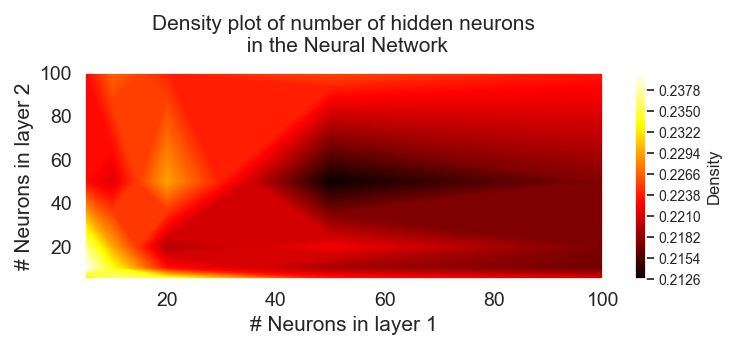

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
x = [5,10,20,50,100]
y = [5,10,20,50,100]
z = matrix_MAPE
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(1, 1)
# fig = plt.figure(figsize=(4,4))


plt.contourf(x,y,z,300,cmap='hot')
cb = plt.colorbar(label="Density");
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_title('Density plot of number of hidden neurons\n in the Neural Network', size=15, pad=15) 
ax.set_xlabel('# Neurons in layer 1', size=15) 
ax.set_ylabel('# Neurons in layer 2', size=15) 
cb.ax.tick_params(labelsize=10)

plt.show()